In [1]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', 60)

# Matplotlib for visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Set default font size
plt.rcParams['font.size'] = 24

from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)

# Imputing missing values and scaling values
from sklearn.preprocessing import Imputer, MinMaxScaler

# Machine Learning Models
from sklearn.linear_model import LinearRegression , Ridge, Lasso , RidgeCV, LassoCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVR,NuSVR,SVR

# Machine Learning Metrics
from sklearn import metrics

# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV


from pyforest import *


import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)

In [2]:
# Read in data into dataframes 
train_features = pd.read_csv(r'C:\Users\mehdi\OneDrive\Documents\OpenClassRooms\Projet 3\training_features_GHGEmIn.csv')
test_features = pd.read_csv(r'C:\Users\mehdi\OneDrive\Documents\OpenClassRooms\Projet 3\testing_features_GHGEmIn.csv')
train_labels = pd.read_csv(r'C:\Users\mehdi\OneDrive\Documents\OpenClassRooms\Projet 3\training_labels_GHGEmIn.csv')
test_labels = pd.read_csv(r'C:\Users\mehdi\OneDrive\Documents\OpenClassRooms\Projet 3\testing_labels_GHGEmIn.csv')

# Display sizes of data
print('Training Feature Size: ', train_features.shape)
print('Testing Feature Size:  ', test_features.shape)
print('Training Labels Size:  ', train_labels.shape)
print('Testing Labels Size:   ', test_labels.shape)

Training Feature Size:  (4687, 7)
Testing Feature Size:   (2010, 7)
Training Labels Size:   (4687, 1)
Testing Labels Size:    (2010, 1)


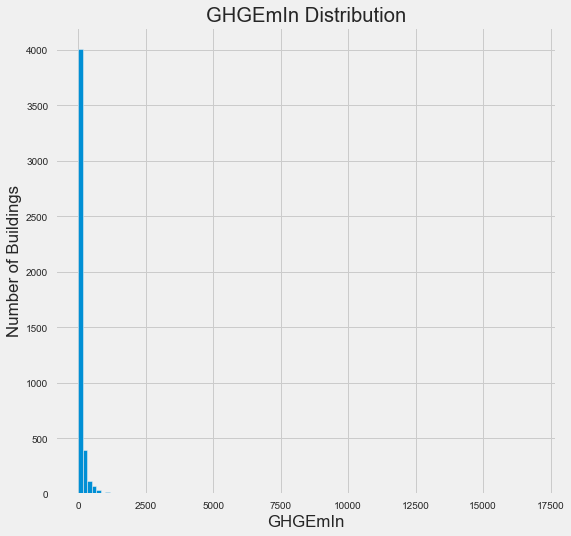

In [3]:
figsize(8, 8)

# Histogram of the Energy Star Score
plt.style.use('fivethirtyeight')
plt.hist(train_labels['GHGEmIn'].dropna(), bins = 100);
plt.xlabel('GHGEmIn'); plt.ylabel('Number of Buildings'); 
plt.title('GHGEmIn Distribution');

In [4]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)
X_train=imp.fit_transform(train_features)
X_test = imp.transform(test_features)
X_train

array([[ 1.90900000e+03,  1.00000000e+00,  3.00000000e+00, ...,
         0.00000000e+00,  4.76129400e+01, -1.22346380e+02],
       [ 2.00500000e+03,  1.00000000e+00,  1.00000000e+00, ...,
         0.00000000e+00,  4.75213174e+01, -1.22366897e+02],
       [ 1.95800000e+03,  1.00000000e+00,  1.00000000e+00, ...,
         0.00000000e+00,  4.76949700e+01, -1.22387040e+02],
       ...,
       [ 1.93100000e+03,  1.00000000e+00,  1.00000000e+00, ...,
         0.00000000e+00,  4.76303400e+01, -1.22374120e+02],
       [ 2.00500000e+03,  1.00000000e+00,  5.00000000e+00, ...,
         0.00000000e+00,  4.76185600e+01, -1.22321940e+02],
       [ 2.00700000e+03,  1.00000000e+00,  4.00000000e+00, ...,
         0.00000000e+00,  4.76602669e+01, -1.22398534e+02]])

# Create an imputer object with a median filling strategy
imputer = SimpleImputer(strategy='median')

# Transform both training data and testing data
X_train = imputer.fit_transform(train_features)
#DATA LEAKAGE !!! X_test = imputer.fit_transform(test_features)
X_test = imputer.transform(test_features)

In [5]:
print('Missing values in training features: ', np.sum(np.isnan(X_train)))
print('Missing values in testing features:  ', np.sum(np.isnan(X_test)))

Missing values in training features:  0
Missing values in testing features:   0


In [6]:
# Make sure all values are finite
print(np.where(~np.isfinite(X_train)))
print(np.where(~np.isfinite(X_test)))

(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))


In [7]:
# Create the scaler object with a range of 0-1
#scaler = MinMaxScaler(feature_range=(0, 1))
scaler = StandardScaler()

# Transform both the training and testing data
X_train = scaler.fit_transform(X_train)
#DATA LEAKAGE !!! X_test = scaler.fit_transform(X_test)
X_test = scaler.transform(X_test)

In [8]:
# Convert y to one-dimensional array (vector)
y_train = np.array(train_labels).reshape((-1, ))
y_test = np.array(test_labels).reshape((-1, ))

In [9]:
#transforming the X_train and y_train back to a dataframe with imputed values for Hyperparameter Tuner
train_df = train_features.copy()
train_df
#yearbuilt= train_df['YearBuilt']
#latitude= train_df['Latitude']
#longitude= train_df['Longitude']
#train_df.drop(['YearBuilt','Latitude','Longitude'],axis=1)
from sklearn_pandas import DataFrameMapper

mapper = DataFrameMapper([(train_df.columns, IterativeImputer(max_iter=10, random_state=0))])
imputed_features = mapper.fit_transform(train_df.copy(), 8)
imputed_features_df = pd.DataFrame(imputed_features, index=train_df.index, columns=train_df.columns)
mapper = DataFrameMapper([(imputed_features_df.columns, StandardScaler())])
scaled_features = mapper.fit_transform(imputed_features_df.copy(), 8)
scaled_features_df = pd.DataFrame(scaled_features, index=imputed_features_df.index, columns=imputed_features_df.columns)
scaled_features_df['target']=train_labels
#scaled_features_df['YearBuilt']=yearbuilt
#scaled_features_df['Latitude']=latitude
#scaled_features_df['Longitude']=longitude

scaled_features_df

YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
0     -1.796585          -0.043087       -0.307405         -0.312127   
1      1.129074          -0.043087       -0.669725         -0.334884   
2     -0.303280          -0.043087       -0.669725         -0.265158   
3     -1.857536          -0.043087        0.417235          0.345872   
4     -1.796585          -0.043087       -0.307405         -0.217900   
...         ...                ...             ...               ...   
4682  -1.461353          -0.043087       -0.307405          0.392506   
4683  -0.364231           0.494007       -0.488565         -0.357682   
4684  -1.126122          -0.043087       -0.669725         -0.345077   
4685   1.129074          -0.043087        0.054915         -0.233474   
4686   1.190025          -0.043087       -0.126245         -0.279754   

      PropertyGFAParking  Latitude  Longitude  target  
0              -0.276174 -0.228699  -0.420157    0.00  
1              -0.276174 -2.132992  -1.169324   28.39  
2              -0.276174  1.476221  -1.904806   50.22  
3              -0.276174 -0.527805   0.105720  124.66  
4              -0.276174 -0.552307   0.365254    9.23  
...                  ...       ...        ...     ...  
4682            1.623451  0.148325   0.270684  406.02  
4683           -0.276174 -1.930916   2.380448   60.50  
4684           -0.276174  0.132944  -1.433048   22.29  
4685           -0.276174 -0.111892   0.472239   45.58  
4686           -0.276174  0.754947  -2.324498    8.37  

[4687 rows x 8 columns]

In [10]:
# Function to calculate mean absolute error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))


# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model, ridgelasso=True):
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions and evaluate
    model_pred = model.predict(X_test)
    model_mae = mae(y_test, model_pred)
    model_mse = metrics.mean_squared_error(y_test, model_pred)
    model_rmse = np.sqrt(metrics.mean_squared_error(y_test, model_pred))
    model_r2 = metrics.r2_score(y_test, model_pred)
        
    #Ridge and lasso regressor parameters and GridSearchCV
    if ridgelasso:
        parameters = {'alpha' : [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}
        model_regressor = GridSearchCV(model, parameters, scoring = 'neg_mean_absolute_error',cv = 10)
        model_regressor_fitted = model_regressor.fit(X_train,y_train)
        model_best_params = model_regressor_fitted.best_params_
        model_best_score = model_regressor_fitted.best_score_
        # Return the performance metrics for Ridge Lasso
        return (model_mae, model_mse, model_rmse, model_r2, model_best_params, model_best_score)
    else :
        # Return the performance metrics for other models
        return (model_mae, model_mse, model_rmse, model_r2)    

In [15]:
lr = LinearRegression(fit_intercept=False,normalize=False,n_jobs=-1)
lr_mae, lr_mse, lr_rmse, lr_r2 = fit_and_evaluate(lr,ridgelasso=False)

print('Linear Regression Performance on the test set: Mean Absolute Error: %.4f' % lr_mae)
print('Linear Regression Performance on the test set: Mean Squared Error: %.4f' % lr_mse)
print('Linear Regression Performance on the test set: Root Mean Squared Error: %.4f' % lr_rmse)
print('Linear Regression Performance on the test set: R^2: %.4f' % lr_r2)

Linear Regression Performance on the test set: Mean Absolute Error: 143.7720
Linear Regression Performance on the test set: Mean Squared Error: 189398.7032
Linear Regression Performance on the test set: Root Mean Squared Error: 435.1996
Linear Regression Performance on the test set: R^2: 0.2560


In [16]:
ridge = Ridge()
ridge_mae, ridge_mse, ridge_rmse, ridge_r2, ridge_best_params, ridge_best_score = fit_and_evaluate(ridge)

print('Ridge Regression Performance on the test set: Mean Absolute Error: %.4f' % ridge_mae)
print('Ridge Regression Performance on the test set: Mean Squared Error: %.4f ' % ridge_mse)
print('Ridge Regression Performance on the test set: Root Mean Squared Error: %.4f' % ridge_rmse)
print('Ridge Regression Performance on the test set: R^2: %.4f' % ridge_r2)
print('Ridge Regression Performance on the test set: Best Parameter: ',ridge_best_params)
print('Ridge Regression Performance on the test set: Best Score: %.4f' %ridge_best_score)

Ridge Regression Performance on the test set: Mean Absolute Error: 103.8999
Ridge Regression Performance on the test set: Mean Squared Error: 177263.2896 
Ridge Regression Performance on the test set: Root Mean Squared Error: 421.0265
Ridge Regression Performance on the test set: R^2: 0.3037
Ridge Regression Performance on the test set: Best Parameter:  {'alpha': 20}
Ridge Regression Performance on the test set: Best Score: -100.3621


In [17]:
lasso = Lasso(max_iter=100000)
lasso_mae, lasso_mse, lasso_rmse, lasso_r2, lasso_best_params, lasso_best_score = fit_and_evaluate(lasso)

print('Lasso Regression Performance on the test set: Mean Absolute Error: %.4f' % lasso_mae)
print('Lasso Regression Performance on the test set: Mean Squared Error: %.4f ' % lasso_mse)
print('Lasso Regression Performance on the test set: Root Mean Squared Error: %.4f' % lasso_rmse)
print('Lasso Regression Performance on the test set: R^2: %.4f' % lasso_r2)
print('Lasso Regression Performance on the test set: Best Parameter: ',lasso_best_params)
print('Lasso Regression Performance on the test set: Best Score: %.4f' %lasso_best_score)

Lasso Regression Performance on the test set: Mean Absolute Error: 103.6042
Lasso Regression Performance on the test set: Mean Squared Error: 178007.2597 
Lasso Regression Performance on the test set: Root Mean Squared Error: 421.9091
Lasso Regression Performance on the test set: R^2: 0.3007
Lasso Regression Performance on the test set: Best Parameter:  {'alpha': 20}
Lasso Regression Performance on the test set: Best Score: -98.3436


In [18]:
svm = LinearSVR(C = 2.0,loss='squared_epsilon_insensitive',max_iter=100000)
svm_mae, svm_mse, svm_rmse, svm_r2 = fit_and_evaluate(svm,ridgelasso=False)

print('Support Vector Machine Regression Performance on the test set: Mean Absolute Error %0.4f' % svm_mae)
print('Support Vector Machine Regression Performance on the test set: Mean Squared Error %.4f' % svm_mse)
print('Support Vector Machine Regression Performance on the test set: Root Mean Squared Error %.4f' %  svm_rmse)
print('Support Vector Machine Regression Performance on the test set: R^2 %.4f' % svm_r2)

Support Vector Machine Regression Performance on the test set: Mean Absolute Error 103.9028
Support Vector Machine Regression Performance on the test set: Mean Squared Error 177256.1100
Support Vector Machine Regression Performance on the test set: Root Mean Squared Error 421.0179
Support Vector Machine Regression Performance on the test set: R^2 0.3037


In [19]:
random_forest = RandomForestRegressor(random_state=60, n_estimators=125,max_depth=5,max_features=5,min_samples_split=2,min_samples_leaf=1)

#random_state=60, n_estimators=100

#- max_depth=5
#- max_features=7
#- min_samples_split=31
#- min_samples_leaf=6


rf_mae, rf_mse, rf_rmse, rf_r2 = fit_and_evaluate(random_forest,ridgelasso=False)

print('Random Forest Regression Performance on the test set: Mean Absolute Error:  %0.4f' % rf_mae)
print('Random Forest Regression Performance on the test set: Mean Squared Error: %.4f' % rf_mse)
print('Random Forest Regression Performance on the test set: Root Mean Squared Error: %.4f' % rf_rmse)
print('Random Forest Regression Performance on the test set: R^2: %.4f' % rf_r2)

Random Forest Regression Performance on the test set: Mean Absolute Error:  88.9545
Random Forest Regression Performance on the test set: Mean Squared Error: 115512.5078
Random Forest Regression Performance on the test set: Root Mean Squared Error: 339.8713
Random Forest Regression Performance on the test set: R^2: 0.5462


In [11]:
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.model_selection import cross_val_score

n_features = X_train.shape[1]

# gradient boosted trees tend to do well on problems like this
#reg = GradientBoostingRegressor(n_estimators=50, random_state=0)
reg = RandomForestRegressor(n_estimators=125, random_state=0)


from skopt.space import Real, Integer
from skopt.utils import use_named_args


# The list of hyper-parameters we want to optimize. For each one we define the bounds,
# the corresponding scikit-learn parameter name, as well as how to sample values
# from that dimension (`'log-uniform'` for the learning rate)
space  = [Integer(1, 5, name='max_depth'),
          Integer(1, n_features, name='max_features'),
          Integer(2, 100, name='min_samples_split'),
          Integer(1, 100, name='min_samples_leaf')]

# this decorator allows your objective function to receive a the parameters as
# keyword arguments. This is particularly convenient when you want to set scikit-learn
# estimator parameters
@use_named_args(space)
def objective(**params):
    reg.set_params(**params)

    return -np.mean(cross_val_score(reg, X_train, y_train, cv=5, n_jobs=-1,
                                    scoring="neg_mean_absolute_error"))

from skopt import gp_minimize
res_gp = gp_minimize(objective, space, n_calls=50, random_state=0)

"Best score=%.4f" % res_gp.fun

print("""Best parameters:
- max_depth=%d
- max_features=%d
- min_samples_split=%d
- min_samples_leaf=%d""" % (res_gp.x[0],  
                            res_gp.x[1], res_gp.x[2], 
                            res_gp.x[3]))

Best parameters:
- max_depth=5
- max_features=5
- min_samples_split=2
- min_samples_leaf=1


In [23]:
gradient_boosted = GradientBoostingRegressor(n_estimators=1000,random_state=0,max_depth=5,learning_rate=0.141890,max_features=2
                                             ,min_samples_split=2,min_samples_leaf=1)
gb_mae , gb_mse, gb_rmse, gb_r2 = fit_and_evaluate(gradient_boosted,ridgelasso=False)



#- max_depth=5
#- learning_rate=0.270406
#- max_features=7
#- min_samples_split=2
#- min_samples_leaf=1

#- max_depth=5
#- learning_rate=0.103690
#- max_features=3
#- min_samples_split=2
#- min_samples_leaf=1

#- max_depth=5
#- learning_rate=0.241932
#- max_features=1
#- min_samples_split=2
#- min_samples_leaf=1

#Best parameters for gbrt_minimize function with GradientBoostRegressor with 50 estimators and random state 0 with skopt:
#- max_depth=5
#- learning_rate=0.310147
#- max_features=3
#- min_samples_split=2
#- min_samples_leaf=1

#Best parameters for forest_minimize function with GradientBoostRegressor with 50 estimators and random state 0 with skopt:
#- max_depth=5
#- learning_rate=0.174495
#- max_features=7
#- min_samples_split=45
#- min_samples_leaf=87

print('Gradient Boosted Regression Performance on the test set: Mean Absolute Error:  %0.4f' % gb_mae)
print('Gradient Boosted Regression Performance on the test set: Mean Squared Error: %.4f ' % gb_mse)
print('Gradient Boosted Regression Performance on the test set: Root Mean Squared Error: %.4f' % gb_rmse)
print('Gradient Boosted Regression Performance on the test set: R^2: %.4f' % gb_r2)

Gradient Boosted Regression Performance on the test set: Mean Absolute Error:  63.2492
Gradient Boosted Regression Performance on the test set: Mean Squared Error: 84851.7511 
Gradient Boosted Regression Performance on the test set: Root Mean Squared Error: 291.2932
Gradient Boosted Regression Performance on the test set: R^2: 0.6667


In [39]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

n_features = X_train.shape[1]

# gradient boosted trees tend to do well on problems like this
reg = GradientBoostingRegressor(n_estimators=1000, random_state=0)


from skopt.space import Real, Integer
from skopt.utils import use_named_args


# The list of hyper-parameters we want to optimize. For each one we define the bounds,
# the corresponding scikit-learn parameter name, as well as how to sample values
# from that dimension (`'log-uniform'` for the learning rate)
space  = [Integer(1, 5, name='max_depth'),
          Real(10**-5, 10**0, "log-uniform", name='learning_rate'),
          Integer(1, n_features, name='max_features'),
          Integer(2, 100, name='min_samples_split'),
          Integer(1, 100, name='min_samples_leaf')]



# this decorator allows your objective function to receive a the parameters as
# keyword arguments. This is particularly convenient when you want to set scikit-learn
# estimator parameters
@use_named_args(space)
def objective(**params):
    reg.set_params(**params)

    return -np.mean(cross_val_score(reg, X_train, y_train, cv=5, n_jobs=-1,
                                    scoring="neg_mean_absolute_error"))

from skopt import gp_minimize,gbrt_minimize,forest_minimize
res_gp = gp_minimize(objective, space, n_calls=50, random_state=0)

"Best score=%.4f" % res_gp.fun

print("""Best parameters:
- max_depth=%d
- learning_rate=%.6f
- max_features=%d
- min_samples_split=%d
- min_samples_leaf=%d""" % (res_gp.x[0], res_gp.x[1], 
                            res_gp.x[2], res_gp.x[3], 
                            res_gp.x[4]))

Best parameters:
- max_depth=5
- learning_rate=0.141890
- max_features=2
- min_samples_split=2
- min_samples_leaf=1


In [25]:
knn = KNeighborsRegressor(n_neighbors=10)
knn_mae, knn_mse, knn_rmse, knn_r2 = fit_and_evaluate(knn,ridgelasso=False)

print('K-Nearest Neighbors Regression Performance on the test set: Mean Absolute Error: %0.4f' % knn_mae)
print('K-Nearest Neighbors Regression Performance on the test set: Mean Squared Error: %.4f' % knn_mse)
print('K-Nearest Neighbors Regression Performance on the test set: Root Mean Squared Error: %.4f'% knn_rmse)
print('K-Nearest Neighbors Regression Performance on the test set: R^2: %.4f' % knn_r2)

K-Nearest Neighbors Regression Performance on the test set: Mean Absolute Error: 89.0685
K-Nearest Neighbors Regression Performance on the test set: Mean Squared Error: 155757.6285
K-Nearest Neighbors Regression Performance on the test set: Root Mean Squared Error: 394.6614
K-Nearest Neighbors Regression Performance on the test set: R^2: 0.3881


In [158]:
from hpsklearn import HyperoptEstimator, any_regressor, ada_boost_regression, random_forest_regression,xgboost_regression, standard_scaler,gradient_boosting_regression, any_preprocessing
from hyperopt import tpe
from sklearn.preprocessing import StandardScaler
import sklearn.preprocessing

estim = HyperoptEstimator(regressor=gradient_boosting_regression('gbr'),
                          algo=tpe.suggest,
                          max_evals=100,
                          trial_timeout=120,preprocessing=any_preprocessing('my_pre'))#any_preprocessing('my_pre')

estim.fit(X_train, y_train)

print(estim.score(X_test, y_test))

print(estim.best_model())

100%|█████████████████████████████████████████████████████| 1/1 [00:10<00:00, 10.09s/it, best loss: 0.3071435137495664]
0.4983064351831129
{'learner': GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.012435185752872259, loss='lad',
             max_depth=None, max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=331,
             n_iter_no_change=None, presort='auto', random_state=0,
             subsample=0.9999637160598029, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False), 'preprocs': (), 'ex_preprocs': ()}


In [12]:
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials

space ={
        'max_depth': hp.choice('max_depth', np.arange(5, 30, dtype=int)),
        'min_child_weight': hp.quniform ('min_child_weight', 1, 10, 1),
        'subsample': hp.uniform ('subsample', 0.8, 1),
        'eval_metric': 'rmse',
        'num_leaves': hp.choice('num_leaves', [15, 31, 63, 127]),
        'learning_rate': hp.uniform('learning_rate',0.01,0.05),
        'objective' : 'reg:squarederror',
        'colsample_bytree': hp.uniform('colsample_bytree', 0.6, 1.0),
        'colsample_bylevel': hp.uniform('colsample_bylevel', 0.6, 1.0),
        'colsample_bynode': hp.uniform('colsample_bynode', 0.6, 1.0),
        'reg_alpha' : hp.choice('reg_alpha', np.arange(1, 30, dtype=int)),
        'reg_lambda' : hp.choice('reg_lambda', np.arange(1, 30, dtype=int)),
          
    } 


def objective(space):

    reg = xgb.XGBRegressor(n_estimators = 1000,
                            max_depth = space['max_depth'],
                            min_child_weight = space['min_child_weight'],
                            subsample = space['subsample'], 
                            eval_metric=space['eval_metric'],
                            learning_rate=space['learning_rate'],
                            objective=space['objective'],
                            num_leaves = space['num_leaves'],
                            colsample_bytree = space['colsample_bytree'],
                            colsample_bylevel = space['colsample_bylevel'],
                            colsample_bynode = space['colsample_bynode'], 
                            reg_alpha = space['reg_alpha'],
                            reg_lambda = space['reg_lambda']
                            )

    eval_set  = [(X_train, y_train),(X_test,y_test)]

    reg.fit(X_train, y_train, eval_set=eval_set, early_stopping_rounds=30)

    pred = reg.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    print ("SCORE:", mse)

    return{'loss': mse, 'status': STATUS_OK }


trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=100,
            trials=trials)

print(best)

[0]	validation_0-rmse:480.09	validation_1-rmse:516.153                                                                 

Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.                           


Will train until validation_1-rmse hasn't improved in 30 rounds.                                                       

[1]	validation_0-rmse:479.424	validation_1-rmse:515.583                                                                

[2]	validation_0-rmse:478.267	validation_1-rmse:514.637                                                                

[3]	validation_0-rmse:477.063	validation_1-rmse:513.677                                                                

[4]	validation_0-rmse:476.091	validation_1-rmse:512.923                                                                

[5]	validation_0-rmse:474.962	validation_1-rmse:511.89                                                                 

[6]	validation_0-rmse:473.472	v

[65]	validation_0-rmse:424.628	validation_1-rmse:470.907                                                               

[66]	validation_0-rmse:423.968	validation_1-rmse:470.473                                                               

[67]	validation_0-rmse:423.622	validation_1-rmse:470.119                                                               

[68]	validation_0-rmse:422.87	validation_1-rmse:469.413                                                                

[69]	validation_0-rmse:422.334	validation_1-rmse:468.721                                                               

[70]	validation_0-rmse:421.964	validation_1-rmse:468.619                                                               

[71]	validation_0-rmse:421.609	validation_1-rmse:468.299                                                               

[72]	validation_0-rmse:420.98	validation_1-rmse:467.748                                                                

[73]	validation_0-rmse:420.58	va

[132]	validation_0-rmse:391.017	validation_1-rmse:444.41                                                               

[133]	validation_0-rmse:390.764	validation_1-rmse:444.366                                                              

[134]	validation_0-rmse:390.22	validation_1-rmse:443.83                                                                

[135]	validation_0-rmse:389.791	validation_1-rmse:443.555                                                              

[136]	validation_0-rmse:389.413	validation_1-rmse:443.147                                                              

[137]	validation_0-rmse:389.071	validation_1-rmse:443.1                                                                

[138]	validation_0-rmse:388.57	validation_1-rmse:442.583                                                               

[139]	validation_0-rmse:388.092	validation_1-rmse:442.361                                                              

[140]	validation_0-rmse:387.523	

[199]	validation_0-rmse:366.522	validation_1-rmse:424.787                                                              

[200]	validation_0-rmse:366.258	validation_1-rmse:424.388                                                              

[201]	validation_0-rmse:365.908	validation_1-rmse:424.143                                                              

[202]	validation_0-rmse:365.577	validation_1-rmse:423.732                                                              

[203]	validation_0-rmse:365.339	validation_1-rmse:423.6                                                                

[204]	validation_0-rmse:364.793	validation_1-rmse:422.92                                                               

[205]	validation_0-rmse:364.305	validation_1-rmse:422.459                                                              

[206]	validation_0-rmse:364.039	validation_1-rmse:422.244                                                              

[207]	validation_0-rmse:363.723	

[266]	validation_0-rmse:345.484	validation_1-rmse:410.068                                                              

[267]	validation_0-rmse:345.29	validation_1-rmse:410.036                                                               

[268]	validation_0-rmse:344.945	validation_1-rmse:409.613                                                              

[269]	validation_0-rmse:344.675	validation_1-rmse:409.461                                                              

[270]	validation_0-rmse:344.472	validation_1-rmse:409.447                                                              

[271]	validation_0-rmse:344.249	validation_1-rmse:409.41                                                               

[272]	validation_0-rmse:343.955	validation_1-rmse:409.157                                                              

[273]	validation_0-rmse:343.527	validation_1-rmse:408.599                                                              

[274]	validation_0-rmse:343.366	

[333]	validation_0-rmse:329.155	validation_1-rmse:398.431                                                              

[334]	validation_0-rmse:328.945	validation_1-rmse:398.37                                                               

[335]	validation_0-rmse:328.829	validation_1-rmse:398.327                                                              

[336]	validation_0-rmse:328.615	validation_1-rmse:398.277                                                              

[337]	validation_0-rmse:328.474	validation_1-rmse:398.205                                                              

[338]	validation_0-rmse:328.241	validation_1-rmse:398.052                                                              

[339]	validation_0-rmse:327.807	validation_1-rmse:397.664                                                              

[340]	validation_0-rmse:327.589	validation_1-rmse:397.476                                                              

[341]	validation_0-rmse:327.393	

[400]	validation_0-rmse:314.486	validation_1-rmse:389.718                                                              

[401]	validation_0-rmse:314.3	validation_1-rmse:389.656                                                                

[402]	validation_0-rmse:314.196	validation_1-rmse:389.51                                                               

[403]	validation_0-rmse:313.888	validation_1-rmse:389.222                                                              

[404]	validation_0-rmse:313.767	validation_1-rmse:389.172                                                              

[405]	validation_0-rmse:313.414	validation_1-rmse:388.69                                                               

[406]	validation_0-rmse:313.216	validation_1-rmse:388.663                                                              

[407]	validation_0-rmse:312.923	validation_1-rmse:388.457                                                              

[408]	validation_0-rmse:312.768	

[467]	validation_0-rmse:302.848	validation_1-rmse:383.312                                                              

[468]	validation_0-rmse:302.691	validation_1-rmse:383.381                                                              

[469]	validation_0-rmse:302.502	validation_1-rmse:383.226                                                              

[470]	validation_0-rmse:302.385	validation_1-rmse:383.191                                                              

[471]	validation_0-rmse:302.361	validation_1-rmse:383.168                                                              

[472]	validation_0-rmse:302.268	validation_1-rmse:383.162                                                              

[473]	validation_0-rmse:302.008	validation_1-rmse:383.022                                                              

[474]	validation_0-rmse:301.862	validation_1-rmse:382.791                                                              

[475]	validation_0-rmse:301.654	

[534]	validation_0-rmse:291.867	validation_1-rmse:377.309                                                              

[535]	validation_0-rmse:291.776	validation_1-rmse:377.285                                                              

[536]	validation_0-rmse:291.714	validation_1-rmse:377.264                                                              

[537]	validation_0-rmse:291.586	validation_1-rmse:377.251                                                              

[538]	validation_0-rmse:291.495	validation_1-rmse:377.199                                                              

[539]	validation_0-rmse:291.256	validation_1-rmse:376.828                                                              

[540]	validation_0-rmse:291.168	validation_1-rmse:376.74                                                               

[541]	validation_0-rmse:291.002	validation_1-rmse:376.715                                                              

[542]	validation_0-rmse:290.844	

[601]	validation_0-rmse:282.814	validation_1-rmse:373.136                                                              

[602]	validation_0-rmse:282.714	validation_1-rmse:373.144                                                              

[603]	validation_0-rmse:282.454	validation_1-rmse:372.9                                                                

[604]	validation_0-rmse:282.367	validation_1-rmse:372.91                                                               

[605]	validation_0-rmse:282.235	validation_1-rmse:372.937                                                              

[606]	validation_0-rmse:282.199	validation_1-rmse:372.867                                                              

[607]	validation_0-rmse:282.15	validation_1-rmse:372.807                                                               

[608]	validation_0-rmse:281.992	validation_1-rmse:372.646                                                              

[609]	validation_0-rmse:281.88	v

[668]	validation_0-rmse:273.418	validation_1-rmse:368.114                                                              

[669]	validation_0-rmse:273.249	validation_1-rmse:368.138                                                              

[670]	validation_0-rmse:273.075	validation_1-rmse:367.94                                                               

[671]	validation_0-rmse:272.942	validation_1-rmse:367.85                                                               

[672]	validation_0-rmse:272.853	validation_1-rmse:367.828                                                              

[673]	validation_0-rmse:272.669	validation_1-rmse:367.787                                                              

[674]	validation_0-rmse:272.559	validation_1-rmse:367.726                                                              

[675]	validation_0-rmse:272.428	validation_1-rmse:367.643                                                              

[676]	validation_0-rmse:272.306	

[735]	validation_0-rmse:265.141	validation_1-rmse:366.599                                                              

[736]	validation_0-rmse:265.014	validation_1-rmse:366.5                                                                

[737]	validation_0-rmse:264.88	validation_1-rmse:366.347                                                               

[738]	validation_0-rmse:264.786	validation_1-rmse:366.343                                                              

[739]	validation_0-rmse:264.651	validation_1-rmse:366.224                                                              

[740]	validation_0-rmse:264.577	validation_1-rmse:366.289                                                              

[741]	validation_0-rmse:264.439	validation_1-rmse:366.097                                                              

[742]	validation_0-rmse:264.292	validation_1-rmse:366.139                                                              

[743]	validation_0-rmse:264.118	

[802]	validation_0-rmse:257.437	validation_1-rmse:363.539                                                              

[803]	validation_0-rmse:257.389	validation_1-rmse:363.532                                                              

[804]	validation_0-rmse:257.271	validation_1-rmse:363.468                                                              

[805]	validation_0-rmse:257.167	validation_1-rmse:363.474                                                              

[806]	validation_0-rmse:257.095	validation_1-rmse:363.453                                                              

[807]	validation_0-rmse:256.984	validation_1-rmse:363.48                                                               

[808]	validation_0-rmse:256.85	validation_1-rmse:363.451                                                               

[809]	validation_0-rmse:256.819	validation_1-rmse:363.536                                                              

[810]	validation_0-rmse:256.713	

[869]	validation_0-rmse:250.425	validation_1-rmse:362.273                                                              

[870]	validation_0-rmse:250.392	validation_1-rmse:362.238                                                              

[871]	validation_0-rmse:250.311	validation_1-rmse:362.282                                                              

[872]	validation_0-rmse:250.141	validation_1-rmse:362.057                                                              

[873]	validation_0-rmse:250.064	validation_1-rmse:362.115                                                              

[874]	validation_0-rmse:249.917	validation_1-rmse:362.041                                                              

[875]	validation_0-rmse:249.875	validation_1-rmse:362.005                                                              

[876]	validation_0-rmse:249.849	validation_1-rmse:362.01                                                               

[877]	validation_0-rmse:249.768	

[936]	validation_0-rmse:244.306	validation_1-rmse:359.64                                                               

[937]	validation_0-rmse:244.126	validation_1-rmse:359.482                                                              

[938]	validation_0-rmse:244.009	validation_1-rmse:359.518                                                              

[939]	validation_0-rmse:243.912	validation_1-rmse:359.369                                                              

[940]	validation_0-rmse:243.824	validation_1-rmse:359.412                                                              

[941]	validation_0-rmse:243.761	validation_1-rmse:359.344                                                              

[942]	validation_0-rmse:243.655	validation_1-rmse:359.324                                                              

[943]	validation_0-rmse:243.579	validation_1-rmse:359.304                                                              

[944]	validation_0-rmse:243.49	v

Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.                           


Will train until validation_1-rmse hasn't improved in 30 rounds.                                                       

[1]	validation_0-rmse:473.725	validation_1-rmse:512.166                                                                

[2]	validation_0-rmse:469.921	validation_1-rmse:509.065                                                                

[3]	validation_0-rmse:466.073	validation_1-rmse:505.966                                                                

[4]	validation_0-rmse:463.046	validation_1-rmse:503.654                                                                

[5]	validation_0-rmse:459.471	validation_1-rmse:500.407                                                                

[6]	validation_0-rmse:454.87	validation_1-rmse:496.895                                                                 

[7]	validation_0-rmse:450.805	v

[66]	validation_0-rmse:346.505	validation_1-rmse:410.79                                                                

[67]	validation_0-rmse:345.705	validation_1-rmse:410.733                                                               

[68]	validation_0-rmse:344.585	validation_1-rmse:409.77                                                                

[69]	validation_0-rmse:343.931	validation_1-rmse:409.633                                                               

[70]	validation_0-rmse:342.971	validation_1-rmse:409.657                                                               

[71]	validation_0-rmse:341.94	validation_1-rmse:408.972                                                                

[72]	validation_0-rmse:341.18	validation_1-rmse:409.064                                                                

[73]	validation_0-rmse:340.085	validation_1-rmse:408.948                                                               

[74]	validation_0-rmse:339.036	v

[133]	validation_0-rmse:287.348	validation_1-rmse:378.54                                                               

[134]	validation_0-rmse:286.64	validation_1-rmse:378.185                                                               

[135]	validation_0-rmse:285.998	validation_1-rmse:377.974                                                              

[136]	validation_0-rmse:285.354	validation_1-rmse:377.648                                                              

[137]	validation_0-rmse:284.648	validation_1-rmse:377.032                                                              

[138]	validation_0-rmse:283.604	validation_1-rmse:377.129                                                              

[139]	validation_0-rmse:282.982	validation_1-rmse:376.888                                                              

[140]	validation_0-rmse:282.099	validation_1-rmse:375.774                                                              

[141]	validation_0-rmse:281.365	

[200]	validation_0-rmse:247.001	validation_1-rmse:359.324                                                              

[201]	validation_0-rmse:246.488	validation_1-rmse:358.94                                                               

[202]	validation_0-rmse:246.012	validation_1-rmse:358.422                                                              

[203]	validation_0-rmse:245.611	validation_1-rmse:358.352                                                              

[204]	validation_0-rmse:244.969	validation_1-rmse:357.366                                                              

[205]	validation_0-rmse:244.503	validation_1-rmse:357.008                                                              

[206]	validation_0-rmse:243.959	validation_1-rmse:356.626                                                              

[207]	validation_0-rmse:243.581	validation_1-rmse:356.758                                                              

[208]	validation_0-rmse:242.906	

[267]	validation_0-rmse:214.507	validation_1-rmse:346.413                                                              

[268]	validation_0-rmse:214.083	validation_1-rmse:346.347                                                              

[269]	validation_0-rmse:213.674	validation_1-rmse:346.142                                                              

[270]	validation_0-rmse:213.32	validation_1-rmse:346.097                                                               

[271]	validation_0-rmse:212.933	validation_1-rmse:346.106                                                              

[272]	validation_0-rmse:212.456	validation_1-rmse:345.919                                                              

[273]	validation_0-rmse:211.928	validation_1-rmse:345.303                                                              

[274]	validation_0-rmse:211.714	validation_1-rmse:345.27                                                               

[275]	validation_0-rmse:211.262	

[334]	validation_0-rmse:188.866	validation_1-rmse:337.662                                                              

[335]	validation_0-rmse:188.523	validation_1-rmse:337.619                                                              

[336]	validation_0-rmse:188.21	validation_1-rmse:337.488                                                               

[337]	validation_0-rmse:187.915	validation_1-rmse:337.522                                                              

[338]	validation_0-rmse:187.489	validation_1-rmse:337.262                                                              

[339]	validation_0-rmse:186.843	validation_1-rmse:336.733                                                              

[340]	validation_0-rmse:186.457	validation_1-rmse:336.768                                                              

[341]	validation_0-rmse:186.061	validation_1-rmse:336.802                                                              

[342]	validation_0-rmse:185.668	

[401]	validation_0-rmse:167.401	validation_1-rmse:328.184                                                              

[402]	validation_0-rmse:167.262	validation_1-rmse:328.136                                                              

[403]	validation_0-rmse:166.853	validation_1-rmse:328.193                                                              

[404]	validation_0-rmse:166.572	validation_1-rmse:328.257                                                              

[405]	validation_0-rmse:166.206	validation_1-rmse:327.674                                                              

[406]	validation_0-rmse:165.819	validation_1-rmse:327.499                                                              

[407]	validation_0-rmse:165.509	validation_1-rmse:327.725                                                              

[408]	validation_0-rmse:165.288	validation_1-rmse:327.761                                                              

[409]	validation_0-rmse:165.073	

[468]	validation_0-rmse:150.803	validation_1-rmse:322.862                                                              

[469]	validation_0-rmse:150.548	validation_1-rmse:322.65                                                               

[470]	validation_0-rmse:150.318	validation_1-rmse:322.646                                                              

[471]	validation_0-rmse:150.15	validation_1-rmse:322.631                                                               

[472]	validation_0-rmse:149.968	validation_1-rmse:322.615                                                              

[473]	validation_0-rmse:149.683	validation_1-rmse:322.425                                                              

[474]	validation_0-rmse:149.555	validation_1-rmse:322.017                                                              

[475]	validation_0-rmse:149.284	validation_1-rmse:322.107                                                              

[476]	validation_0-rmse:149.057	

[535]	validation_0-rmse:135.587	validation_1-rmse:317.482                                                              

[536]	validation_0-rmse:135.379	validation_1-rmse:317.462                                                              

[537]	validation_0-rmse:135.119	validation_1-rmse:317.318                                                              

[538]	validation_0-rmse:135.015	validation_1-rmse:317.275                                                              

[539]	validation_0-rmse:134.824	validation_1-rmse:317.07                                                               

[540]	validation_0-rmse:134.655	validation_1-rmse:317.074                                                              

[541]	validation_0-rmse:134.45	validation_1-rmse:317.098                                                               

[542]	validation_0-rmse:134.282	validation_1-rmse:317.135                                                              

[543]	validation_0-rmse:134.063	

[602]	validation_0-rmse:122.804	validation_1-rmse:316.22                                                               

[603]	validation_0-rmse:122.563	validation_1-rmse:316.463                                                              

[604]	validation_0-rmse:122.407	validation_1-rmse:316.404                                                              

[605]	validation_0-rmse:122.232	validation_1-rmse:316.448                                                              

[606]	validation_0-rmse:122.198	validation_1-rmse:316.46                                                               

[607]	validation_0-rmse:122.155	validation_1-rmse:316.464                                                              

[608]	validation_0-rmse:121.951	validation_1-rmse:316.442                                                              

[609]	validation_0-rmse:121.799	validation_1-rmse:316.445                                                              

[610]	validation_0-rmse:121.587	

[4]	validation_0-rmse:471.549	validation_1-rmse:509.129                                                                

[5]	validation_0-rmse:469.538	validation_1-rmse:507.292                                                                

[6]	validation_0-rmse:467.075	validation_1-rmse:505.312                                                                

[7]	validation_0-rmse:464.733	validation_1-rmse:502.763                                                                

[8]	validation_0-rmse:463.705	validation_1-rmse:501.899                                                                

[9]	validation_0-rmse:461.945	validation_1-rmse:500.961                                                                

[10]	validation_0-rmse:460.104	validation_1-rmse:499.263                                                               

[11]	validation_0-rmse:459.182	validation_1-rmse:498.438                                                               

[12]	validation_0-rmse:457.286	v

[71]	validation_0-rmse:392.088	validation_1-rmse:444.569                                                               

[72]	validation_0-rmse:391.362	validation_1-rmse:443.998                                                               

[73]	validation_0-rmse:390.898	validation_1-rmse:443.894                                                               

[74]	validation_0-rmse:389.942	validation_1-rmse:443.516                                                               

[75]	validation_0-rmse:389.408	validation_1-rmse:443.062                                                               

[76]	validation_0-rmse:388.676	validation_1-rmse:442.404                                                               

[77]	validation_0-rmse:387.938	validation_1-rmse:441.621                                                               

[78]	validation_0-rmse:387.078	validation_1-rmse:441.553                                                               

[79]	validation_0-rmse:386.359	v

[138]	validation_0-rmse:354.719	validation_1-rmse:416.72                                                               

[139]	validation_0-rmse:354.114	validation_1-rmse:416.241                                                              

[140]	validation_0-rmse:353.619	validation_1-rmse:415.681                                                              

[141]	validation_0-rmse:353.15	validation_1-rmse:415.66                                                                

[142]	validation_0-rmse:352.797	validation_1-rmse:415.316                                                              

[143]	validation_0-rmse:352.173	validation_1-rmse:414.505                                                              

[144]	validation_0-rmse:351.682	validation_1-rmse:413.892                                                              

[145]	validation_0-rmse:351.322	validation_1-rmse:413.888                                                              

[146]	validation_0-rmse:351.09	v

[205]	validation_0-rmse:330.555	validation_1-rmse:398.48                                                               

[206]	validation_0-rmse:330.393	validation_1-rmse:398.413                                                              

[207]	validation_0-rmse:329.927	validation_1-rmse:397.956                                                              

[208]	validation_0-rmse:329.679	validation_1-rmse:397.742                                                              

[209]	validation_0-rmse:329.208	validation_1-rmse:397.219                                                              

[210]	validation_0-rmse:328.885	validation_1-rmse:396.794                                                              

[211]	validation_0-rmse:328.612	validation_1-rmse:396.752                                                              

[212]	validation_0-rmse:328.388	validation_1-rmse:396.77                                                               

[213]	validation_0-rmse:327.968	

[272]	validation_0-rmse:312.46	validation_1-rmse:388.134                                                               

[273]	validation_0-rmse:312.245	validation_1-rmse:387.82                                                               

[274]	validation_0-rmse:312.086	validation_1-rmse:387.692                                                              

[275]	validation_0-rmse:311.717	validation_1-rmse:387.42                                                               

[276]	validation_0-rmse:311.514	validation_1-rmse:387.106                                                              

[277]	validation_0-rmse:311.479	validation_1-rmse:387.105                                                              

[278]	validation_0-rmse:311.257	validation_1-rmse:386.872                                                              

[279]	validation_0-rmse:310.986	validation_1-rmse:386.388                                                              

[280]	validation_0-rmse:310.726	

[339]	validation_0-rmse:297.882	validation_1-rmse:378.671                                                              

[340]	validation_0-rmse:297.614	validation_1-rmse:378.53                                                               

[341]	validation_0-rmse:297.398	validation_1-rmse:378.546                                                              

[342]	validation_0-rmse:297.275	validation_1-rmse:378.443                                                              

[343]	validation_0-rmse:296.825	validation_1-rmse:377.792                                                              

[344]	validation_0-rmse:296.73	validation_1-rmse:377.632                                                               

[345]	validation_0-rmse:296.612	validation_1-rmse:377.671                                                              

[346]	validation_0-rmse:296.237	validation_1-rmse:377.151                                                              

[347]	validation_0-rmse:296.081	

[406]	validation_0-rmse:284.734	validation_1-rmse:371.55                                                               

[407]	validation_0-rmse:284.45	validation_1-rmse:371.417                                                               

[408]	validation_0-rmse:284.269	validation_1-rmse:371.462                                                              

[409]	validation_0-rmse:283.989	validation_1-rmse:371.192                                                              

[410]	validation_0-rmse:283.773	validation_1-rmse:371.286                                                              

[411]	validation_0-rmse:283.64	validation_1-rmse:371.071                                                               

[412]	validation_0-rmse:283.502	validation_1-rmse:371.063                                                              

[413]	validation_0-rmse:283.215	validation_1-rmse:370.865                                                              

[414]	validation_0-rmse:283.032	

[473]	validation_0-rmse:274.525	validation_1-rmse:367.266                                                              

[474]	validation_0-rmse:274.402	validation_1-rmse:367.126                                                              

[475]	validation_0-rmse:274.247	validation_1-rmse:367.033                                                              

[476]	validation_0-rmse:274.048	validation_1-rmse:367.059                                                              

[477]	validation_0-rmse:273.861	validation_1-rmse:366.912                                                              

[478]	validation_0-rmse:273.704	validation_1-rmse:366.854                                                              

[479]	validation_0-rmse:273.469	validation_1-rmse:366.881                                                              

[480]	validation_0-rmse:273.399	validation_1-rmse:366.808                                                              

[481]	validation_0-rmse:273.206	

[540]	validation_0-rmse:264.599	validation_1-rmse:363.855                                                              

[541]	validation_0-rmse:264.503	validation_1-rmse:363.79                                                               

[542]	validation_0-rmse:264.409	validation_1-rmse:363.793                                                              

[543]	validation_0-rmse:264.313	validation_1-rmse:363.768                                                              

[544]	validation_0-rmse:264.028	validation_1-rmse:363.324                                                              

[545]	validation_0-rmse:263.829	validation_1-rmse:363.323                                                              

[546]	validation_0-rmse:263.791	validation_1-rmse:363.332                                                              

[547]	validation_0-rmse:263.636	validation_1-rmse:363.33                                                               

[548]	validation_0-rmse:263.523	

[607]	validation_0-rmse:256.783	validation_1-rmse:361.577                                                              

[608]	validation_0-rmse:256.692	validation_1-rmse:361.562                                                              

[609]	validation_0-rmse:256.61	validation_1-rmse:361.483                                                               

[610]	validation_0-rmse:256.525	validation_1-rmse:361.395                                                              

[611]	validation_0-rmse:256.428	validation_1-rmse:361.377                                                              

[612]	validation_0-rmse:256.355	validation_1-rmse:361.385                                                              

[613]	validation_0-rmse:256.197	validation_1-rmse:361.277                                                              

[614]	validation_0-rmse:256.053	validation_1-rmse:360.987                                                              

[615]	validation_0-rmse:255.96	v

[674]	validation_0-rmse:248.872	validation_1-rmse:359.029                                                              

Stopping. Best iteration:                                                                                              
[644]	validation_0-rmse:252.134	validation_1-rmse:358.921


SCORE:                                                                                                                 
128824.15486684459                                                                                                     
[0]	validation_0-rmse:476.965	validation_1-rmse:511.769                                                                

Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.                           


Will train until validation_1-rmse hasn't improved in 30 rounds.                                                       

[1]	validation_0-rmse:474.451	validation_1-rmse:509.503                                        

[61]	validation_0-rmse:353.96	validation_1-rmse:419.642                                                                

[62]	validation_0-rmse:352.969	validation_1-rmse:419.046                                                               

[63]	validation_0-rmse:351.625	validation_1-rmse:417.575                                                               

[64]	validation_0-rmse:349.816	validation_1-rmse:415.399                                                               

[65]	validation_0-rmse:348.866	validation_1-rmse:415.098                                                               

[66]	validation_0-rmse:347.455	validation_1-rmse:414.879                                                               

[67]	validation_0-rmse:346.639	validation_1-rmse:414.635                                                               

[68]	validation_0-rmse:344.943	validation_1-rmse:414.564                                                               

[69]	validation_0-rmse:343.768	v

[128]	validation_0-rmse:286.979	validation_1-rmse:380.134                                                              

[129]	validation_0-rmse:285.92	validation_1-rmse:379.31                                                                

[130]	validation_0-rmse:284.987	validation_1-rmse:378.491                                                              

[131]	validation_0-rmse:284.357	validation_1-rmse:378.647                                                              

[132]	validation_0-rmse:283.406	validation_1-rmse:377.872                                                              

[133]	validation_0-rmse:282.571	validation_1-rmse:377.223                                                              

[134]	validation_0-rmse:282.074	validation_1-rmse:377.082                                                              

[135]	validation_0-rmse:281.226	validation_1-rmse:375.837                                                              

[136]	validation_0-rmse:280.787	

[195]	validation_0-rmse:244.109	validation_1-rmse:360.928                                                              

[196]	validation_0-rmse:243.625	validation_1-rmse:360.896                                                              

[197]	validation_0-rmse:242.846	validation_1-rmse:360.159                                                              

[198]	validation_0-rmse:242.09	validation_1-rmse:359.465                                                               

[199]	validation_0-rmse:241.664	validation_1-rmse:359.406                                                              

[200]	validation_0-rmse:241.095	validation_1-rmse:359.044                                                              

[201]	validation_0-rmse:240.359	validation_1-rmse:358.981                                                              

[202]	validation_0-rmse:239.92	validation_1-rmse:358.367                                                               

[203]	validation_0-rmse:239.561	

[262]	validation_0-rmse:212.923	validation_1-rmse:346.725                                                              

[263]	validation_0-rmse:212.416	validation_1-rmse:346.261                                                              

[264]	validation_0-rmse:212.087	validation_1-rmse:346.111                                                              

[265]	validation_0-rmse:211.388	validation_1-rmse:345.548                                                              

[266]	validation_0-rmse:210.909	validation_1-rmse:345.22                                                               

[267]	validation_0-rmse:210.452	validation_1-rmse:344.556                                                              

[268]	validation_0-rmse:209.84	validation_1-rmse:343.715                                                               

[269]	validation_0-rmse:209.286	validation_1-rmse:343.377                                                              

[270]	validation_0-rmse:208.962	

[329]	validation_0-rmse:188.787	validation_1-rmse:338.409                                                              

[330]	validation_0-rmse:188.253	validation_1-rmse:338.617                                                              

[331]	validation_0-rmse:187.825	validation_1-rmse:338.967                                                              

[332]	validation_0-rmse:187.615	validation_1-rmse:338.912                                                              

[333]	validation_0-rmse:187.386	validation_1-rmse:338.893                                                              

[334]	validation_0-rmse:187.134	validation_1-rmse:338.843                                                              

[335]	validation_0-rmse:186.859	validation_1-rmse:338.834                                                              

[336]	validation_0-rmse:186.657	validation_1-rmse:339.07                                                               

[337]	validation_0-rmse:186.406	

[396]	validation_0-rmse:168.338	validation_1-rmse:333.884                                                              

[397]	validation_0-rmse:167.988	validation_1-rmse:333.989                                                              

[398]	validation_0-rmse:167.702	validation_1-rmse:334.059                                                              

[399]	validation_0-rmse:167.372	validation_1-rmse:333.726                                                              

[400]	validation_0-rmse:167.052	validation_1-rmse:333.545                                                              

[401]	validation_0-rmse:166.76	validation_1-rmse:333.307                                                               

[402]	validation_0-rmse:166.622	validation_1-rmse:333.293                                                              

[403]	validation_0-rmse:166.304	validation_1-rmse:333.022                                                              

[404]	validation_0-rmse:166.012	

[463]	validation_0-rmse:151.834	validation_1-rmse:330.945                                                              

[464]	validation_0-rmse:151.668	validation_1-rmse:330.962                                                              

[465]	validation_0-rmse:151.31	validation_1-rmse:331.023                                                               

[466]	validation_0-rmse:150.974	validation_1-rmse:331.069                                                              

[467]	validation_0-rmse:150.668	validation_1-rmse:330.689                                                              

[468]	validation_0-rmse:150.412	validation_1-rmse:330.613                                                              

[469]	validation_0-rmse:150.042	validation_1-rmse:330.465                                                              

[470]	validation_0-rmse:149.765	validation_1-rmse:330.104                                                              

[471]	validation_0-rmse:149.475	

[530]	validation_0-rmse:136.557	validation_1-rmse:326.265                                                              

[531]	validation_0-rmse:136.322	validation_1-rmse:325.975                                                              

[532]	validation_0-rmse:136.125	validation_1-rmse:326.011                                                              

[533]	validation_0-rmse:135.869	validation_1-rmse:326.095                                                              

[534]	validation_0-rmse:135.685	validation_1-rmse:326.095                                                              

[535]	validation_0-rmse:135.525	validation_1-rmse:326.092                                                              

[536]	validation_0-rmse:135.303	validation_1-rmse:326.162                                                              

[537]	validation_0-rmse:135.115	validation_1-rmse:326.084                                                              

[538]	validation_0-rmse:135.013	

[597]	validation_0-rmse:123.782	validation_1-rmse:324.119                                                              

[598]	validation_0-rmse:123.589	validation_1-rmse:323.877                                                              

[599]	validation_0-rmse:123.562	validation_1-rmse:323.963                                                              

[600]	validation_0-rmse:123.381	validation_1-rmse:323.926                                                              

[601]	validation_0-rmse:123.236	validation_1-rmse:323.968                                                              

[602]	validation_0-rmse:123.062	validation_1-rmse:323.992                                                              

[603]	validation_0-rmse:122.862	validation_1-rmse:324.077                                                              

[604]	validation_0-rmse:122.656	validation_1-rmse:324.057                                                              

[605]	validation_0-rmse:122.501	

[664]	validation_0-rmse:112.762	validation_1-rmse:323.848                                                              

[665]	validation_0-rmse:112.623	validation_1-rmse:323.857                                                              

[666]	validation_0-rmse:112.456	validation_1-rmse:323.838                                                              

[667]	validation_0-rmse:112.26	validation_1-rmse:323.978                                                               

[668]	validation_0-rmse:112.058	validation_1-rmse:324.014                                                              

[669]	validation_0-rmse:111.818	validation_1-rmse:324.15                                                               

[670]	validation_0-rmse:111.645	validation_1-rmse:324.129                                                              

[671]	validation_0-rmse:111.457	validation_1-rmse:324.203                                                              

[672]	validation_0-rmse:111.269	

[50]	validation_0-rmse:375.743	validation_1-rmse:445.91                                                                

[51]	validation_0-rmse:374.123	validation_1-rmse:445.22                                                                

[52]	validation_0-rmse:373.03	validation_1-rmse:445.02                                                                 

[53]	validation_0-rmse:371.752	validation_1-rmse:443.804                                                               

[54]	validation_0-rmse:370.485	validation_1-rmse:442.917                                                               

[55]	validation_0-rmse:368.696	validation_1-rmse:441.634                                                               

[56]	validation_0-rmse:366.987	validation_1-rmse:439.554                                                               

[57]	validation_0-rmse:366.346	validation_1-rmse:439.082                                                               

[58]	validation_0-rmse:365.672	v

[117]	validation_0-rmse:306.183	validation_1-rmse:403.87                                                               

[118]	validation_0-rmse:305.022	validation_1-rmse:403.093                                                              

[119]	validation_0-rmse:304.009	validation_1-rmse:402.842                                                              

[120]	validation_0-rmse:303.08	validation_1-rmse:402.83                                                                

[121]	validation_0-rmse:302.276	validation_1-rmse:402.457                                                              

[122]	validation_0-rmse:301.158	validation_1-rmse:402.367                                                              

[123]	validation_0-rmse:300.639	validation_1-rmse:401.497                                                              

[124]	validation_0-rmse:300.108	validation_1-rmse:401.3                                                                

[125]	validation_0-rmse:298.626	

[184]	validation_0-rmse:254.658	validation_1-rmse:376.172                                                              

[185]	validation_0-rmse:254.123	validation_1-rmse:376.138                                                              

[186]	validation_0-rmse:253.509	validation_1-rmse:375.825                                                              

[187]	validation_0-rmse:252.997	validation_1-rmse:375.633                                                              

[188]	validation_0-rmse:252.386	validation_1-rmse:375.214                                                              

[189]	validation_0-rmse:251.613	validation_1-rmse:374.72                                                               

[190]	validation_0-rmse:250.981	validation_1-rmse:374.806                                                              

[191]	validation_0-rmse:250.396	validation_1-rmse:374.2                                                                

[192]	validation_0-rmse:249.774	

[251]	validation_0-rmse:216.286	validation_1-rmse:363.324                                                              

[252]	validation_0-rmse:215.863	validation_1-rmse:363.388                                                              

[253]	validation_0-rmse:215.244	validation_1-rmse:363.303                                                              

[254]	validation_0-rmse:214.971	validation_1-rmse:363.278                                                              

[255]	validation_0-rmse:214.839	validation_1-rmse:363.316                                                              

[256]	validation_0-rmse:214.337	validation_1-rmse:362.916                                                              

[257]	validation_0-rmse:213.914	validation_1-rmse:362.433                                                              

[258]	validation_0-rmse:213.431	validation_1-rmse:362.576                                                              

[259]	validation_0-rmse:212.969	

[318]	validation_0-rmse:189.645	validation_1-rmse:356.488                                                              

[319]	validation_0-rmse:189.23	validation_1-rmse:356.464                                                               

[320]	validation_0-rmse:188.885	validation_1-rmse:356.625                                                              

[321]	validation_0-rmse:188.56	validation_1-rmse:356.627                                                               

[322]	validation_0-rmse:188.228	validation_1-rmse:356.478                                                              

[323]	validation_0-rmse:187.746	validation_1-rmse:356.042                                                              

[324]	validation_0-rmse:187.416	validation_1-rmse:356.109                                                              

[325]	validation_0-rmse:187.027	validation_1-rmse:355.882                                                              

[326]	validation_0-rmse:186.685	

[385]	validation_0-rmse:166.686	validation_1-rmse:349.322                                                              

[386]	validation_0-rmse:166.4	validation_1-rmse:348.862                                                                

[387]	validation_0-rmse:166.122	validation_1-rmse:348.861                                                              

[388]	validation_0-rmse:165.928	validation_1-rmse:348.854                                                              

[389]	validation_0-rmse:165.605	validation_1-rmse:348.748                                                              

[390]	validation_0-rmse:165.384	validation_1-rmse:348.748                                                              

[391]	validation_0-rmse:164.942	validation_1-rmse:348.768                                                              

[392]	validation_0-rmse:164.83	validation_1-rmse:348.701                                                               

[393]	validation_0-rmse:164.674	

[452]	validation_0-rmse:149.545	validation_1-rmse:345.341                                                              

[453]	validation_0-rmse:149.299	validation_1-rmse:345.304                                                              

[454]	validation_0-rmse:149.008	validation_1-rmse:345.371                                                              

[455]	validation_0-rmse:148.608	validation_1-rmse:344.765                                                              

[456]	validation_0-rmse:148.325	validation_1-rmse:344.543                                                              

[457]	validation_0-rmse:148.269	validation_1-rmse:344.501                                                              

[458]	validation_0-rmse:147.978	validation_1-rmse:344.486                                                              

[459]	validation_0-rmse:147.738	validation_1-rmse:344.443                                                              

[460]	validation_0-rmse:147.488	

[519]	validation_0-rmse:133.295	validation_1-rmse:340.295                                                              

[520]	validation_0-rmse:132.998	validation_1-rmse:339.788                                                              

[521]	validation_0-rmse:132.657	validation_1-rmse:339.416                                                              

[522]	validation_0-rmse:132.365	validation_1-rmse:339.439                                                              

[523]	validation_0-rmse:132.031	validation_1-rmse:339.124                                                              

[524]	validation_0-rmse:131.779	validation_1-rmse:339.159                                                              

[525]	validation_0-rmse:131.511	validation_1-rmse:338.878                                                              

[526]	validation_0-rmse:131.303	validation_1-rmse:338.499                                                              

[527]	validation_0-rmse:131.096	

[586]	validation_0-rmse:119.349	validation_1-rmse:336.867                                                              

[587]	validation_0-rmse:119.124	validation_1-rmse:336.855                                                              

[588]	validation_0-rmse:118.932	validation_1-rmse:336.839                                                              

[589]	validation_0-rmse:118.609	validation_1-rmse:336.641                                                              

[590]	validation_0-rmse:118.403	validation_1-rmse:336.653                                                              

[591]	validation_0-rmse:118.161	validation_1-rmse:336.717                                                              

[592]	validation_0-rmse:117.911	validation_1-rmse:336.826                                                              

[593]	validation_0-rmse:117.669	validation_1-rmse:336.703                                                              

[594]	validation_0-rmse:117.426	

[653]	validation_0-rmse:107.217	validation_1-rmse:335.687                                                              

[654]	validation_0-rmse:107.031	validation_1-rmse:335.674                                                              

[655]	validation_0-rmse:106.859	validation_1-rmse:335.718                                                              

[656]	validation_0-rmse:106.671	validation_1-rmse:335.531                                                              

[657]	validation_0-rmse:106.497	validation_1-rmse:335.505                                                              

[658]	validation_0-rmse:106.325	validation_1-rmse:335.512                                                              

[659]	validation_0-rmse:106.161	validation_1-rmse:335.519                                                              

[660]	validation_0-rmse:106.093	validation_1-rmse:335.548                                                              

[661]	validation_0-rmse:105.851	

[720]	validation_0-rmse:95.9562	validation_1-rmse:334.089                                                              

[721]	validation_0-rmse:95.7881	validation_1-rmse:334.08                                                               

[722]	validation_0-rmse:95.5929	validation_1-rmse:334.096                                                              

[723]	validation_0-rmse:95.4922	validation_1-rmse:334.058                                                              

[724]	validation_0-rmse:95.3674	validation_1-rmse:334.06                                                               

[725]	validation_0-rmse:95.2059	validation_1-rmse:333.782                                                              

[726]	validation_0-rmse:94.9283	validation_1-rmse:333.794                                                              

[727]	validation_0-rmse:94.794	validation_1-rmse:333.771                                                               

[728]	validation_0-rmse:94.6473	

[787]	validation_0-rmse:86.8212	validation_1-rmse:333.506                                                              

[788]	validation_0-rmse:86.6526	validation_1-rmse:333.569                                                              

[789]	validation_0-rmse:86.5161	validation_1-rmse:333.575                                                              

[790]	validation_0-rmse:86.4263	validation_1-rmse:333.592                                                              

[791]	validation_0-rmse:86.2889	validation_1-rmse:333.62                                                               

[792]	validation_0-rmse:86.1653	validation_1-rmse:333.626                                                              

[793]	validation_0-rmse:86.0112	validation_1-rmse:333.638                                                              

[794]	validation_0-rmse:85.9083	validation_1-rmse:333.642                                                              

Stopping. Best iteration:       

[54]	validation_0-rmse:390.329	validation_1-rmse:437.586                                                               

[55]	validation_0-rmse:388.726	validation_1-rmse:435.617                                                               

[56]	validation_0-rmse:387.955	validation_1-rmse:435.028                                                               

[57]	validation_0-rmse:386.862	validation_1-rmse:433.471                                                               

[58]	validation_0-rmse:386.36	validation_1-rmse:433.261                                                                

[59]	validation_0-rmse:385.574	validation_1-rmse:432.645                                                               

[60]	validation_0-rmse:384.814	validation_1-rmse:432.231                                                               

[61]	validation_0-rmse:384.015	validation_1-rmse:431.613                                                               

[62]	validation_0-rmse:383.564	v

[121]	validation_0-rmse:338.412	validation_1-rmse:396.041                                                              

[122]	validation_0-rmse:337.754	validation_1-rmse:395.448                                                              

[123]	validation_0-rmse:337.281	validation_1-rmse:394.712                                                              

[124]	validation_0-rmse:336.86	validation_1-rmse:394.415                                                               

[125]	validation_0-rmse:336.012	validation_1-rmse:393.904                                                              

[126]	validation_0-rmse:335.721	validation_1-rmse:393.823                                                              

[127]	validation_0-rmse:335.218	validation_1-rmse:393.688                                                              

[128]	validation_0-rmse:334.848	validation_1-rmse:393.511                                                              

[129]	validation_0-rmse:334.32	v

[188]	validation_0-rmse:306.909	validation_1-rmse:380.343                                                              

[189]	validation_0-rmse:306.6	validation_1-rmse:380.052                                                                

[190]	validation_0-rmse:305.834	validation_1-rmse:379.103                                                              

[191]	validation_0-rmse:305.468	validation_1-rmse:378.505                                                              

[192]	validation_0-rmse:305.126	validation_1-rmse:378.504                                                              

[193]	validation_0-rmse:304.922	validation_1-rmse:378.507                                                              

[194]	validation_0-rmse:304.485	validation_1-rmse:378.445                                                              

[195]	validation_0-rmse:304.293	validation_1-rmse:378.472                                                              

[196]	validation_0-rmse:304.042	

[255]	validation_0-rmse:286.871	validation_1-rmse:369.944                                                              

[256]	validation_0-rmse:286.648	validation_1-rmse:369.951                                                              

[257]	validation_0-rmse:286.427	validation_1-rmse:369.864                                                              

[258]	validation_0-rmse:286.239	validation_1-rmse:369.893                                                              

[259]	validation_0-rmse:285.868	validation_1-rmse:369.705                                                              

[260]	validation_0-rmse:285.569	validation_1-rmse:369.411                                                              

[261]	validation_0-rmse:285.344	validation_1-rmse:369.461                                                              

[262]	validation_0-rmse:285.246	validation_1-rmse:369.381                                                              

[263]	validation_0-rmse:285.159	

[322]	validation_0-rmse:272.007	validation_1-rmse:365.469                                                              

[323]	validation_0-rmse:271.873	validation_1-rmse:365.33                                                               

[324]	validation_0-rmse:271.664	validation_1-rmse:365.235                                                              

[325]	validation_0-rmse:271.515	validation_1-rmse:365.259                                                              

[326]	validation_0-rmse:271.273	validation_1-rmse:365.11                                                               

[327]	validation_0-rmse:271.048	validation_1-rmse:364.885                                                              

[328]	validation_0-rmse:270.906	validation_1-rmse:364.874                                                              

[329]	validation_0-rmse:270.526	validation_1-rmse:364.912                                                              

[330]	validation_0-rmse:270.462	

[389]	validation_0-rmse:259.589	validation_1-rmse:360.719                                                              

[390]	validation_0-rmse:259.566	validation_1-rmse:360.716                                                              

[391]	validation_0-rmse:259.356	validation_1-rmse:360.685                                                              

[392]	validation_0-rmse:259.254	validation_1-rmse:360.679                                                              

[393]	validation_0-rmse:259.034	validation_1-rmse:360.734                                                              

[394]	validation_0-rmse:258.751	validation_1-rmse:360.919                                                              

[395]	validation_0-rmse:258.681	validation_1-rmse:360.918                                                              

[396]	validation_0-rmse:258.496	validation_1-rmse:360.935                                                              

[397]	validation_0-rmse:258.277	

[456]	validation_0-rmse:249.14	validation_1-rmse:358.562                                                               

[457]	validation_0-rmse:249.072	validation_1-rmse:358.498                                                              

[458]	validation_0-rmse:248.977	validation_1-rmse:358.527                                                              

[459]	validation_0-rmse:248.794	validation_1-rmse:358.373                                                              

[460]	validation_0-rmse:248.694	validation_1-rmse:358.384                                                              

[461]	validation_0-rmse:248.567	validation_1-rmse:358.304                                                              

[462]	validation_0-rmse:248.488	validation_1-rmse:358.308                                                              

[463]	validation_0-rmse:248.244	validation_1-rmse:358.404                                                              

[464]	validation_0-rmse:248.089	

[523]	validation_0-rmse:240.004	validation_1-rmse:357.258                                                              

[524]	validation_0-rmse:239.925	validation_1-rmse:357.258                                                              

[525]	validation_0-rmse:239.733	validation_1-rmse:357.295                                                              

[526]	validation_0-rmse:239.638	validation_1-rmse:357.277                                                              

[527]	validation_0-rmse:239.536	validation_1-rmse:357.295                                                              

[528]	validation_0-rmse:239.435	validation_1-rmse:357.276                                                              

[529]	validation_0-rmse:239.348	validation_1-rmse:357.302                                                              

[530]	validation_0-rmse:238.957	validation_1-rmse:356.743                                                              

[531]	validation_0-rmse:238.808	

[590]	validation_0-rmse:231.784	validation_1-rmse:355.088                                                              

[591]	validation_0-rmse:231.654	validation_1-rmse:355.139                                                              

[592]	validation_0-rmse:231.511	validation_1-rmse:355.045                                                              

[593]	validation_0-rmse:231.432	validation_1-rmse:355.078                                                              

[594]	validation_0-rmse:231.319	validation_1-rmse:355.039                                                              

[595]	validation_0-rmse:231.214	validation_1-rmse:355.112                                                              

[596]	validation_0-rmse:231.063	validation_1-rmse:355.151                                                              

[597]	validation_0-rmse:230.961	validation_1-rmse:355.219                                                              

[598]	validation_0-rmse:230.867	

[657]	validation_0-rmse:223.992	validation_1-rmse:353.273                                                              

[658]	validation_0-rmse:223.879	validation_1-rmse:353.234                                                              

[659]	validation_0-rmse:223.8	validation_1-rmse:353.25                                                                 

[660]	validation_0-rmse:223.685	validation_1-rmse:353.277                                                              

[661]	validation_0-rmse:223.518	validation_1-rmse:353.302                                                              

[662]	validation_0-rmse:223.374	validation_1-rmse:353.327                                                              

[663]	validation_0-rmse:223.274	validation_1-rmse:353.243                                                              

[664]	validation_0-rmse:223.191	validation_1-rmse:353.145                                                              

[665]	validation_0-rmse:223.13	v

[4]	validation_0-rmse:471.471	validation_1-rmse:507.821                                                                

[5]	validation_0-rmse:469.923	validation_1-rmse:506.972                                                                

[6]	validation_0-rmse:467.942	validation_1-rmse:505.188                                                                

[7]	validation_0-rmse:465.783	validation_1-rmse:504.086                                                                

[8]	validation_0-rmse:464.093	validation_1-rmse:502.777                                                                

[9]	validation_0-rmse:462.949	validation_1-rmse:502.21                                                                 

[10]	validation_0-rmse:460.888	validation_1-rmse:501.186                                                               

[11]	validation_0-rmse:460.03	validation_1-rmse:500.53                                                                 

[12]	validation_0-rmse:458.849	v

[71]	validation_0-rmse:390.822	validation_1-rmse:455.924                                                               

[72]	validation_0-rmse:390.219	validation_1-rmse:455.571                                                               

[73]	validation_0-rmse:389.171	validation_1-rmse:455.444                                                               

[74]	validation_0-rmse:388.021	validation_1-rmse:455.126                                                               

[75]	validation_0-rmse:387.504	validation_1-rmse:455.003                                                               

[76]	validation_0-rmse:386.457	validation_1-rmse:453.931                                                               

[77]	validation_0-rmse:385.035	validation_1-rmse:452.262                                                               

[78]	validation_0-rmse:384.381	validation_1-rmse:452.155                                                               

[79]	validation_0-rmse:383.812	v

[138]	validation_0-rmse:340.145	validation_1-rmse:425.52                                                               

[139]	validation_0-rmse:339.572	validation_1-rmse:425.521                                                              

[140]	validation_0-rmse:338.611	validation_1-rmse:425.55                                                               

[141]	validation_0-rmse:337.935	validation_1-rmse:424.892                                                              

[142]	validation_0-rmse:337.084	validation_1-rmse:424.431                                                              

[143]	validation_0-rmse:336.524	validation_1-rmse:424.412                                                              

[144]	validation_0-rmse:335.785	validation_1-rmse:423.978                                                              

[145]	validation_0-rmse:335.167	validation_1-rmse:423.865                                                              

[146]	validation_0-rmse:334.621	

[205]	validation_0-rmse:304.615	validation_1-rmse:408.646                                                              

[206]	validation_0-rmse:304.145	validation_1-rmse:408.63                                                               

[207]	validation_0-rmse:303.871	validation_1-rmse:408.534                                                              

[208]	validation_0-rmse:303.264	validation_1-rmse:408.579                                                              

[209]	validation_0-rmse:302.935	validation_1-rmse:408.54                                                               

[210]	validation_0-rmse:302.168	validation_1-rmse:407.653                                                              

[211]	validation_0-rmse:301.862	validation_1-rmse:407.464                                                              

[212]	validation_0-rmse:301.298	validation_1-rmse:407.548                                                              

[213]	validation_0-rmse:300.856	

[272]	validation_0-rmse:278.705	validation_1-rmse:397.581                                                              

[273]	validation_0-rmse:278.309	validation_1-rmse:397.472                                                              

[274]	validation_0-rmse:278.102	validation_1-rmse:397.311                                                              

[275]	validation_0-rmse:277.872	validation_1-rmse:397.289                                                              

[276]	validation_0-rmse:277.646	validation_1-rmse:397.258                                                              

[277]	validation_0-rmse:277.351	validation_1-rmse:397.157                                                              

[278]	validation_0-rmse:277.016	validation_1-rmse:396.909                                                              

[279]	validation_0-rmse:276.694	validation_1-rmse:396.833                                                              

[280]	validation_0-rmse:276.54	v

[339]	validation_0-rmse:260.408	validation_1-rmse:389.808                                                              

[340]	validation_0-rmse:259.973	validation_1-rmse:389.568                                                              

[341]	validation_0-rmse:259.639	validation_1-rmse:389.337                                                              

[342]	validation_0-rmse:259.415	validation_1-rmse:389.294                                                              

[343]	validation_0-rmse:259.104	validation_1-rmse:389.34                                                               

[344]	validation_0-rmse:258.929	validation_1-rmse:389.34                                                               

[345]	validation_0-rmse:258.752	validation_1-rmse:389.295                                                              

[346]	validation_0-rmse:258.391	validation_1-rmse:388.984                                                              

[347]	validation_0-rmse:258.139	

[406]	validation_0-rmse:242.996	validation_1-rmse:385.981                                                              

[407]	validation_0-rmse:242.824	validation_1-rmse:385.95                                                               

[408]	validation_0-rmse:242.751	validation_1-rmse:385.988                                                              

[409]	validation_0-rmse:242.403	validation_1-rmse:385.778                                                              

[410]	validation_0-rmse:242.156	validation_1-rmse:385.78                                                               

[411]	validation_0-rmse:242.009	validation_1-rmse:385.825                                                              

[412]	validation_0-rmse:241.644	validation_1-rmse:385.298                                                              

[413]	validation_0-rmse:241.398	validation_1-rmse:385.287                                                              

[414]	validation_0-rmse:241.136	

[473]	validation_0-rmse:230.123	validation_1-rmse:383.091                                                              

[474]	validation_0-rmse:229.953	validation_1-rmse:383.1                                                                

[475]	validation_0-rmse:229.682	validation_1-rmse:383.091                                                              

[476]	validation_0-rmse:229.567	validation_1-rmse:383.078                                                              

[477]	validation_0-rmse:229.472	validation_1-rmse:383.016                                                              

[478]	validation_0-rmse:229.351	validation_1-rmse:383.046                                                              

[479]	validation_0-rmse:229.227	validation_1-rmse:383.058                                                              

[480]	validation_0-rmse:229.043	validation_1-rmse:383.1                                                                

[481]	validation_0-rmse:228.908	

[44]	validation_0-rmse:432.448	validation_1-rmse:478.246                                                               

[45]	validation_0-rmse:432.016	validation_1-rmse:478.047                                                               

[46]	validation_0-rmse:431.217	validation_1-rmse:477.387                                                               

[47]	validation_0-rmse:430.318	validation_1-rmse:476.537                                                               

[48]	validation_0-rmse:429.219	validation_1-rmse:475.431                                                               

[49]	validation_0-rmse:428.079	validation_1-rmse:474.127                                                               

[50]	validation_0-rmse:427.541	validation_1-rmse:473.761                                                               

[51]	validation_0-rmse:426.605	validation_1-rmse:473.364                                                               

[52]	validation_0-rmse:426.092	v

[111]	validation_0-rmse:390.328	validation_1-rmse:444.838                                                              

[112]	validation_0-rmse:390.057	validation_1-rmse:444.706                                                              

[113]	validation_0-rmse:389.086	validation_1-rmse:444.668                                                              

[114]	validation_0-rmse:388.561	validation_1-rmse:443.929                                                              

[115]	validation_0-rmse:387.971	validation_1-rmse:443.646                                                              

[116]	validation_0-rmse:387.338	validation_1-rmse:443.645                                                              

[117]	validation_0-rmse:386.758	validation_1-rmse:443.384                                                              

[118]	validation_0-rmse:386.156	validation_1-rmse:443.009                                                              

[119]	validation_0-rmse:385.543	

[178]	validation_0-rmse:357.401	validation_1-rmse:421.046                                                              

[179]	validation_0-rmse:356.933	validation_1-rmse:420.399                                                              

[180]	validation_0-rmse:356.654	validation_1-rmse:420.088                                                              

[181]	validation_0-rmse:356.368	validation_1-rmse:419.956                                                              

[182]	validation_0-rmse:355.833	validation_1-rmse:419.573                                                              

[183]	validation_0-rmse:355.544	validation_1-rmse:419.5                                                                

[184]	validation_0-rmse:355.115	validation_1-rmse:419.417                                                              

[185]	validation_0-rmse:354.781	validation_1-rmse:419.402                                                              

[186]	validation_0-rmse:354.39	v

[245]	validation_0-rmse:334.051	validation_1-rmse:405.043                                                              

[246]	validation_0-rmse:333.844	validation_1-rmse:404.916                                                              

[247]	validation_0-rmse:333.512	validation_1-rmse:404.747                                                              

[248]	validation_0-rmse:333.097	validation_1-rmse:404.467                                                              

[249]	validation_0-rmse:332.859	validation_1-rmse:404.405                                                              

[250]	validation_0-rmse:332.507	validation_1-rmse:404.116                                                              

[251]	validation_0-rmse:332.231	validation_1-rmse:403.922                                                              

[252]	validation_0-rmse:331.962	validation_1-rmse:403.575                                                              

[253]	validation_0-rmse:331.551	

[312]	validation_0-rmse:316.149	validation_1-rmse:395.291                                                              

[313]	validation_0-rmse:316.029	validation_1-rmse:395.176                                                              

[314]	validation_0-rmse:315.895	validation_1-rmse:395.132                                                              

[315]	validation_0-rmse:315.685	validation_1-rmse:394.955                                                              

[316]	validation_0-rmse:315.509	validation_1-rmse:394.929                                                              

[317]	validation_0-rmse:315.298	validation_1-rmse:394.864                                                              

[318]	validation_0-rmse:315.12	validation_1-rmse:394.833                                                               

[319]	validation_0-rmse:314.911	validation_1-rmse:394.819                                                              

[320]	validation_0-rmse:314.607	

[379]	validation_0-rmse:301.471	validation_1-rmse:387.475                                                              

[380]	validation_0-rmse:301.118	validation_1-rmse:387.377                                                              

[381]	validation_0-rmse:300.759	validation_1-rmse:387.205                                                              

[382]	validation_0-rmse:300.405	validation_1-rmse:386.745                                                              

[383]	validation_0-rmse:300.148	validation_1-rmse:386.738                                                              

[384]	validation_0-rmse:299.878	validation_1-rmse:386.391                                                              

[385]	validation_0-rmse:299.744	validation_1-rmse:386.444                                                              

[386]	validation_0-rmse:299.575	validation_1-rmse:386.605                                                              

[387]	validation_0-rmse:299.41	v

[446]	validation_0-rmse:288.233	validation_1-rmse:382.084                                                              

[447]	validation_0-rmse:288.003	validation_1-rmse:382.216                                                              

[448]	validation_0-rmse:287.833	validation_1-rmse:382.068                                                              

[449]	validation_0-rmse:287.654	validation_1-rmse:381.95                                                               

[450]	validation_0-rmse:287.539	validation_1-rmse:381.979                                                              

[451]	validation_0-rmse:287.326	validation_1-rmse:381.649                                                              

[452]	validation_0-rmse:287.086	validation_1-rmse:381.411                                                              

[453]	validation_0-rmse:286.869	validation_1-rmse:381.383                                                              

[454]	validation_0-rmse:286.642	

[513]	validation_0-rmse:276.173	validation_1-rmse:376.807                                                              

[514]	validation_0-rmse:276.076	validation_1-rmse:376.832                                                              

[515]	validation_0-rmse:275.772	validation_1-rmse:376.423                                                              

[516]	validation_0-rmse:275.626	validation_1-rmse:376.318                                                              

[517]	validation_0-rmse:275.485	validation_1-rmse:376.394                                                              

[518]	validation_0-rmse:275.283	validation_1-rmse:376.281                                                              

[519]	validation_0-rmse:274.998	validation_1-rmse:375.885                                                              

[520]	validation_0-rmse:274.841	validation_1-rmse:375.805                                                              

[521]	validation_0-rmse:274.52	v

[580]	validation_0-rmse:265.102	validation_1-rmse:371.594                                                              

[581]	validation_0-rmse:264.975	validation_1-rmse:371.652                                                              

[582]	validation_0-rmse:264.821	validation_1-rmse:371.526                                                              

[583]	validation_0-rmse:264.647	validation_1-rmse:371.461                                                              

[584]	validation_0-rmse:264.518	validation_1-rmse:371.503                                                              

[585]	validation_0-rmse:264.46	validation_1-rmse:371.517                                                               

[586]	validation_0-rmse:264.26	validation_1-rmse:371.468                                                               

[587]	validation_0-rmse:264.133	validation_1-rmse:371.465                                                              

[588]	validation_0-rmse:263.902	

[647]	validation_0-rmse:255.067	validation_1-rmse:367.996                                                              

[648]	validation_0-rmse:254.893	validation_1-rmse:367.975                                                              

[649]	validation_0-rmse:254.783	validation_1-rmse:367.88                                                               

[650]	validation_0-rmse:254.599	validation_1-rmse:367.895                                                              

[651]	validation_0-rmse:254.455	validation_1-rmse:367.756                                                              

[652]	validation_0-rmse:254.251	validation_1-rmse:367.691                                                              

[653]	validation_0-rmse:254.133	validation_1-rmse:367.595                                                              

[654]	validation_0-rmse:253.977	validation_1-rmse:367.61                                                               

[655]	validation_0-rmse:253.901	

[714]	validation_0-rmse:245.249	validation_1-rmse:363.904                                                              

[715]	validation_0-rmse:245.102	validation_1-rmse:363.89                                                               

[716]	validation_0-rmse:244.984	validation_1-rmse:363.912                                                              

[717]	validation_0-rmse:244.857	validation_1-rmse:363.859                                                              

[718]	validation_0-rmse:244.699	validation_1-rmse:363.748                                                              

[719]	validation_0-rmse:244.557	validation_1-rmse:363.768                                                              

[720]	validation_0-rmse:244.442	validation_1-rmse:363.756                                                              

[721]	validation_0-rmse:244.306	validation_1-rmse:363.764                                                              

[722]	validation_0-rmse:244.234	

[781]	validation_0-rmse:236.5	validation_1-rmse:361.094                                                                

[782]	validation_0-rmse:236.369	validation_1-rmse:360.849                                                              

[783]	validation_0-rmse:236.257	validation_1-rmse:360.812                                                              

[784]	validation_0-rmse:236.136	validation_1-rmse:360.705                                                              

[785]	validation_0-rmse:235.931	validation_1-rmse:360.693                                                              

[786]	validation_0-rmse:235.779	validation_1-rmse:360.639                                                              

[787]	validation_0-rmse:235.65	validation_1-rmse:360.675                                                               

[788]	validation_0-rmse:235.487	validation_1-rmse:360.593                                                              

[789]	validation_0-rmse:235.28	v

[848]	validation_0-rmse:228.083	validation_1-rmse:358.693                                                              

[849]	validation_0-rmse:227.937	validation_1-rmse:358.734                                                              

[850]	validation_0-rmse:227.825	validation_1-rmse:358.66                                                               

[851]	validation_0-rmse:227.69	validation_1-rmse:358.567                                                               

[852]	validation_0-rmse:227.575	validation_1-rmse:358.517                                                              

[853]	validation_0-rmse:227.463	validation_1-rmse:358.545                                                              

[854]	validation_0-rmse:227.339	validation_1-rmse:358.485                                                              

[855]	validation_0-rmse:227.227	validation_1-rmse:358.393                                                              

[856]	validation_0-rmse:227.06	v

[915]	validation_0-rmse:220.427	validation_1-rmse:356.181                                                              

[916]	validation_0-rmse:220.309	validation_1-rmse:356.145                                                              

[917]	validation_0-rmse:220.205	validation_1-rmse:356.128                                                              

[918]	validation_0-rmse:220.11	validation_1-rmse:355.944                                                               

[919]	validation_0-rmse:220.014	validation_1-rmse:355.957                                                              

[920]	validation_0-rmse:219.931	validation_1-rmse:355.961                                                              

[921]	validation_0-rmse:219.844	validation_1-rmse:355.954                                                              

[922]	validation_0-rmse:219.737	validation_1-rmse:355.941                                                              

[923]	validation_0-rmse:219.646	

[982]	validation_0-rmse:213.319	validation_1-rmse:353.387                                                              

[983]	validation_0-rmse:213.224	validation_1-rmse:353.247                                                              

[984]	validation_0-rmse:213.119	validation_1-rmse:353.233                                                              

[985]	validation_0-rmse:212.948	validation_1-rmse:352.963                                                              

[986]	validation_0-rmse:212.833	validation_1-rmse:352.883                                                              

[987]	validation_0-rmse:212.796	validation_1-rmse:352.887                                                              

[988]	validation_0-rmse:212.638	validation_1-rmse:352.792                                                              

[989]	validation_0-rmse:212.532	validation_1-rmse:352.772                                                              

[990]	validation_0-rmse:212.438	

[45]	validation_0-rmse:314.015	validation_1-rmse:388.432                                                               

[46]	validation_0-rmse:311.588	validation_1-rmse:385.872                                                               

[47]	validation_0-rmse:309.382	validation_1-rmse:385.305                                                               

[48]	validation_0-rmse:307.137	validation_1-rmse:383.77                                                                

[49]	validation_0-rmse:305.07	validation_1-rmse:381.625                                                                

[50]	validation_0-rmse:302.526	validation_1-rmse:380.254                                                               

[51]	validation_0-rmse:300.374	validation_1-rmse:379.772                                                               

[52]	validation_0-rmse:298.894	validation_1-rmse:379.338                                                               

[53]	validation_0-rmse:296.38	va

[112]	validation_0-rmse:218.294	validation_1-rmse:341.187                                                              

[113]	validation_0-rmse:217.169	validation_1-rmse:340.152                                                              

[114]	validation_0-rmse:216.11	validation_1-rmse:339.294                                                               

[115]	validation_0-rmse:215.284	validation_1-rmse:338.81                                                               

[116]	validation_0-rmse:214.233	validation_1-rmse:339.102                                                              

[117]	validation_0-rmse:213.246	validation_1-rmse:339.759                                                              

[118]	validation_0-rmse:212.283	validation_1-rmse:339.759                                                              

[119]	validation_0-rmse:211.226	validation_1-rmse:338.919                                                              

[120]	validation_0-rmse:210.273	

[179]	validation_0-rmse:166.532	validation_1-rmse:327.684                                                              

[180]	validation_0-rmse:166.335	validation_1-rmse:327.897                                                              

[181]	validation_0-rmse:165.798	validation_1-rmse:327.888                                                              

[182]	validation_0-rmse:165.289	validation_1-rmse:328.057                                                              

[183]	validation_0-rmse:164.69	validation_1-rmse:328.283                                                               

[184]	validation_0-rmse:164.163	validation_1-rmse:328.21                                                               

[185]	validation_0-rmse:163.632	validation_1-rmse:328.176                                                              

[186]	validation_0-rmse:163.057	validation_1-rmse:327.466                                                              

[187]	validation_0-rmse:162.557	

[48]	validation_0-rmse:441.02	validation_1-rmse:486.538                                                                

[49]	validation_0-rmse:440.58	validation_1-rmse:486.19                                                                 

[50]	validation_0-rmse:440.084	validation_1-rmse:485.98                                                                

[51]	validation_0-rmse:439.274	validation_1-rmse:485.236                                                               

[52]	validation_0-rmse:438.749	validation_1-rmse:484.839                                                               

[53]	validation_0-rmse:438.035	validation_1-rmse:484.165                                                               

[54]	validation_0-rmse:437.065	validation_1-rmse:483.557                                                               

[55]	validation_0-rmse:436.27	validation_1-rmse:482.946                                                                

[56]	validation_0-rmse:435.266	v

[115]	validation_0-rmse:404.708	validation_1-rmse:461.038                                                              

[116]	validation_0-rmse:404.158	validation_1-rmse:460.474                                                              

[117]	validation_0-rmse:403.574	validation_1-rmse:460.322                                                              

[118]	validation_0-rmse:403.147	validation_1-rmse:459.953                                                              

[119]	validation_0-rmse:402.592	validation_1-rmse:459.422                                                              

[120]	validation_0-rmse:402.054	validation_1-rmse:458.889                                                              

[121]	validation_0-rmse:401.618	validation_1-rmse:458.49                                                               

[122]	validation_0-rmse:401.102	validation_1-rmse:458.156                                                              

[123]	validation_0-rmse:400.799	

[182]	validation_0-rmse:374.437	validation_1-rmse:440.802                                                              

[183]	validation_0-rmse:374.129	validation_1-rmse:440.737                                                              

[184]	validation_0-rmse:373.646	validation_1-rmse:440.593                                                              

[185]	validation_0-rmse:373.348	validation_1-rmse:440.331                                                              

[186]	validation_0-rmse:372.916	validation_1-rmse:440.036                                                              

[187]	validation_0-rmse:372.605	validation_1-rmse:439.968                                                              

[188]	validation_0-rmse:372.209	validation_1-rmse:439.626                                                              

[189]	validation_0-rmse:371.956	validation_1-rmse:439.474                                                              

[190]	validation_0-rmse:371.653	

[249]	validation_0-rmse:351.013	validation_1-rmse:427.109                                                              

[250]	validation_0-rmse:350.66	validation_1-rmse:426.802                                                               

[251]	validation_0-rmse:350.12	validation_1-rmse:426.13                                                                

[252]	validation_0-rmse:349.728	validation_1-rmse:425.764                                                              

[253]	validation_0-rmse:349.378	validation_1-rmse:425.7                                                                

[254]	validation_0-rmse:349.077	validation_1-rmse:425.448                                                              

[255]	validation_0-rmse:348.919	validation_1-rmse:425.422                                                              

[256]	validation_0-rmse:348.504	validation_1-rmse:425                                                                  

[257]	validation_0-rmse:348.23	v

[316]	validation_0-rmse:331.902	validation_1-rmse:414.877                                                              

[317]	validation_0-rmse:331.451	validation_1-rmse:414.914                                                              

[318]	validation_0-rmse:331.241	validation_1-rmse:414.835                                                              

[319]	validation_0-rmse:331.009	validation_1-rmse:414.613                                                              

[320]	validation_0-rmse:330.537	validation_1-rmse:414.221                                                              

[321]	validation_0-rmse:330.273	validation_1-rmse:414.278                                                              

[322]	validation_0-rmse:330.075	validation_1-rmse:414.153                                                              

[323]	validation_0-rmse:329.87	validation_1-rmse:413.972                                                               

[324]	validation_0-rmse:329.614	

[383]	validation_0-rmse:314.399	validation_1-rmse:404.841                                                              

[384]	validation_0-rmse:314.228	validation_1-rmse:404.761                                                              

[385]	validation_0-rmse:313.946	validation_1-rmse:404.861                                                              

[386]	validation_0-rmse:313.747	validation_1-rmse:404.767                                                              

[387]	validation_0-rmse:313.607	validation_1-rmse:404.669                                                              

[388]	validation_0-rmse:313.442	validation_1-rmse:404.65                                                               

[389]	validation_0-rmse:313.225	validation_1-rmse:404.669                                                              

[390]	validation_0-rmse:313.062	validation_1-rmse:404.619                                                              

[391]	validation_0-rmse:312.854	

[450]	validation_0-rmse:301.516	validation_1-rmse:399.255                                                              

[451]	validation_0-rmse:301.22	validation_1-rmse:399.22                                                                

[452]	validation_0-rmse:301.009	validation_1-rmse:399.204                                                              

[453]	validation_0-rmse:300.844	validation_1-rmse:399.19                                                               

[454]	validation_0-rmse:300.666	validation_1-rmse:399.103                                                              

[455]	validation_0-rmse:300.321	validation_1-rmse:398.674                                                              

[456]	validation_0-rmse:300.048	validation_1-rmse:398.556                                                              

[457]	validation_0-rmse:299.966	validation_1-rmse:398.546                                                              

[458]	validation_0-rmse:299.773	

[517]	validation_0-rmse:288.208	validation_1-rmse:393.713                                                              

[518]	validation_0-rmse:287.81	validation_1-rmse:393.218                                                               

[519]	validation_0-rmse:287.504	validation_1-rmse:392.998                                                              

[520]	validation_0-rmse:287.247	validation_1-rmse:392.741                                                              

[521]	validation_0-rmse:286.903	validation_1-rmse:392.798                                                              

[522]	validation_0-rmse:286.726	validation_1-rmse:392.802                                                              

[523]	validation_0-rmse:286.461	validation_1-rmse:392.611                                                              

[524]	validation_0-rmse:286.276	validation_1-rmse:392.606                                                              

[525]	validation_0-rmse:286.037	

[584]	validation_0-rmse:275.645	validation_1-rmse:388.796                                                              

[585]	validation_0-rmse:275.564	validation_1-rmse:388.784                                                              

[586]	validation_0-rmse:275.392	validation_1-rmse:388.764                                                              

[587]	validation_0-rmse:275.271	validation_1-rmse:388.739                                                              

[588]	validation_0-rmse:275.009	validation_1-rmse:388.616                                                              

[589]	validation_0-rmse:274.783	validation_1-rmse:388.608                                                              

[590]	validation_0-rmse:274.63	validation_1-rmse:388.555                                                               

[591]	validation_0-rmse:274.394	validation_1-rmse:388.214                                                              

[592]	validation_0-rmse:274.151	

[651]	validation_0-rmse:264.384	validation_1-rmse:384.085                                                              

[652]	validation_0-rmse:264.204	validation_1-rmse:384.1                                                                

[653]	validation_0-rmse:264.034	validation_1-rmse:383.862                                                              

[654]	validation_0-rmse:263.867	validation_1-rmse:383.883                                                              

[655]	validation_0-rmse:263.76	validation_1-rmse:383.887                                                               

[656]	validation_0-rmse:263.516	validation_1-rmse:383.867                                                              

[657]	validation_0-rmse:263.337	validation_1-rmse:383.735                                                              

[658]	validation_0-rmse:263.104	validation_1-rmse:383.645                                                              

[659]	validation_0-rmse:262.965	

[718]	validation_0-rmse:253.447	validation_1-rmse:381.456                                                              

[719]	validation_0-rmse:253.345	validation_1-rmse:381.446                                                              

[720]	validation_0-rmse:253.191	validation_1-rmse:381.32                                                               

[721]	validation_0-rmse:253.075	validation_1-rmse:381.314                                                              

[722]	validation_0-rmse:252.977	validation_1-rmse:381.293                                                              

[723]	validation_0-rmse:252.834	validation_1-rmse:381.346                                                              

[724]	validation_0-rmse:252.684	validation_1-rmse:381.237                                                              

[725]	validation_0-rmse:252.47	validation_1-rmse:381.21                                                                

[726]	validation_0-rmse:252.325	

[785]	validation_0-rmse:244.409	validation_1-rmse:378.454                                                              

[786]	validation_0-rmse:244.21	validation_1-rmse:378.299                                                               

[787]	validation_0-rmse:244.01	validation_1-rmse:378.108                                                               

[788]	validation_0-rmse:243.81	validation_1-rmse:378.003                                                               

[789]	validation_0-rmse:243.649	validation_1-rmse:378.036                                                              

[790]	validation_0-rmse:243.559	validation_1-rmse:378.022                                                              

[791]	validation_0-rmse:243.391	validation_1-rmse:377.915                                                              

[792]	validation_0-rmse:243.306	validation_1-rmse:377.913                                                              

[793]	validation_0-rmse:243.243	

[852]	validation_0-rmse:235.253	validation_1-rmse:375.679                                                              

[853]	validation_0-rmse:235.203	validation_1-rmse:375.665                                                              

[854]	validation_0-rmse:235.1	validation_1-rmse:375.626                                                                

[855]	validation_0-rmse:234.966	validation_1-rmse:375.634                                                              

[856]	validation_0-rmse:234.87	validation_1-rmse:375.663                                                               

[857]	validation_0-rmse:234.748	validation_1-rmse:375.677                                                              

[858]	validation_0-rmse:234.627	validation_1-rmse:375.659                                                              

[859]	validation_0-rmse:234.488	validation_1-rmse:375.578                                                              

[860]	validation_0-rmse:234.365	

[919]	validation_0-rmse:227.294	validation_1-rmse:373.597                                                              

[920]	validation_0-rmse:227.204	validation_1-rmse:373.599                                                              

[921]	validation_0-rmse:227.108	validation_1-rmse:373.583                                                              

[922]	validation_0-rmse:227.015	validation_1-rmse:373.539                                                              

[923]	validation_0-rmse:226.922	validation_1-rmse:373.543                                                              

[924]	validation_0-rmse:226.835	validation_1-rmse:373.542                                                              

[925]	validation_0-rmse:226.69	validation_1-rmse:373.59                                                                

[926]	validation_0-rmse:226.598	validation_1-rmse:373.588                                                              

[927]	validation_0-rmse:226.489	

[986]	validation_0-rmse:219.914	validation_1-rmse:371.182                                                              

[987]	validation_0-rmse:219.851	validation_1-rmse:371.148                                                              

[988]	validation_0-rmse:219.695	validation_1-rmse:370.938                                                              

[989]	validation_0-rmse:219.555	validation_1-rmse:370.878                                                              

[990]	validation_0-rmse:219.366	validation_1-rmse:370.703                                                              

[991]	validation_0-rmse:219.299	validation_1-rmse:370.699                                                              

[992]	validation_0-rmse:219.151	validation_1-rmse:370.709                                                              

[993]	validation_0-rmse:219.074	validation_1-rmse:370.717                                                              

[994]	validation_0-rmse:218.966	

[49]	validation_0-rmse:403.349	validation_1-rmse:458.724                                                               

[50]	validation_0-rmse:402.482	validation_1-rmse:458.148                                                               

[51]	validation_0-rmse:400.835	validation_1-rmse:456.855                                                               

[52]	validation_0-rmse:399.835	validation_1-rmse:456.497                                                               

[53]	validation_0-rmse:398.163	validation_1-rmse:454.966                                                               

[54]	validation_0-rmse:396.56	validation_1-rmse:454.537                                                                

[55]	validation_0-rmse:395.428	validation_1-rmse:453.666                                                               

[56]	validation_0-rmse:394.162	validation_1-rmse:452.757                                                               

[57]	validation_0-rmse:392.631	v

[116]	validation_0-rmse:332.656	validation_1-rmse:413.13                                                               

[117]	validation_0-rmse:331.56	validation_1-rmse:412.863                                                               

[118]	validation_0-rmse:330.371	validation_1-rmse:411.868                                                              

[119]	validation_0-rmse:329.447	validation_1-rmse:411.44                                                               

[120]	validation_0-rmse:328.556	validation_1-rmse:411.231                                                              

[121]	validation_0-rmse:327.666	validation_1-rmse:411.162                                                              

[122]	validation_0-rmse:326.706	validation_1-rmse:411.05                                                               

[123]	validation_0-rmse:325.8	validation_1-rmse:410.857                                                                

[124]	validation_0-rmse:325.34	v

[183]	validation_0-rmse:283.156	validation_1-rmse:384.958                                                              

[184]	validation_0-rmse:282.553	validation_1-rmse:384.959                                                              

[185]	validation_0-rmse:282.193	validation_1-rmse:384.861                                                              

[186]	validation_0-rmse:281.552	validation_1-rmse:384.269                                                              

[187]	validation_0-rmse:281.161	validation_1-rmse:384.157                                                              

[188]	validation_0-rmse:280.41	validation_1-rmse:383.989                                                               

[189]	validation_0-rmse:279.745	validation_1-rmse:383.559                                                              

[190]	validation_0-rmse:279.2	validation_1-rmse:383.196                                                                

[191]	validation_0-rmse:278.474	

[250]	validation_0-rmse:250.252	validation_1-rmse:369.692                                                              

[251]	validation_0-rmse:249.815	validation_1-rmse:369.244                                                              

[252]	validation_0-rmse:249.437	validation_1-rmse:369.286                                                              

[253]	validation_0-rmse:248.982	validation_1-rmse:368.863                                                              

[254]	validation_0-rmse:248.585	validation_1-rmse:368.522                                                              

[255]	validation_0-rmse:248.226	validation_1-rmse:368.421                                                              

[256]	validation_0-rmse:247.65	validation_1-rmse:368.01                                                                

[257]	validation_0-rmse:247.318	validation_1-rmse:368.026                                                              

[258]	validation_0-rmse:246.807	

[317]	validation_0-rmse:225.993	validation_1-rmse:361.918                                                              

[318]	validation_0-rmse:225.718	validation_1-rmse:361.913                                                              

[319]	validation_0-rmse:225.564	validation_1-rmse:361.906                                                              

[320]	validation_0-rmse:225.194	validation_1-rmse:361.736                                                              

[321]	validation_0-rmse:224.876	validation_1-rmse:361.779                                                              

[322]	validation_0-rmse:224.632	validation_1-rmse:361.711                                                              

[323]	validation_0-rmse:224.359	validation_1-rmse:361.772                                                              

[324]	validation_0-rmse:224.035	validation_1-rmse:361.551                                                              

[325]	validation_0-rmse:223.737	

[384]	validation_0-rmse:206.832	validation_1-rmse:355.612                                                              

[385]	validation_0-rmse:206.654	validation_1-rmse:355.566                                                              

[386]	validation_0-rmse:206.474	validation_1-rmse:355.495                                                              

[387]	validation_0-rmse:206.3	validation_1-rmse:355.524                                                                

[388]	validation_0-rmse:206.078	validation_1-rmse:355.492                                                              

[389]	validation_0-rmse:205.801	validation_1-rmse:355.378                                                              

[390]	validation_0-rmse:205.657	validation_1-rmse:355.366                                                              

[391]	validation_0-rmse:205.473	validation_1-rmse:355.368                                                              

[392]	validation_0-rmse:205.223	

[451]	validation_0-rmse:191.072	validation_1-rmse:351.422                                                              

[452]	validation_0-rmse:190.797	validation_1-rmse:351.56                                                               

[453]	validation_0-rmse:190.597	validation_1-rmse:351.602                                                              

[454]	validation_0-rmse:190.45	validation_1-rmse:351.65                                                                

[455]	validation_0-rmse:190.172	validation_1-rmse:351.696                                                              

[456]	validation_0-rmse:189.888	validation_1-rmse:351.418                                                              

[457]	validation_0-rmse:189.756	validation_1-rmse:351.426                                                              

[458]	validation_0-rmse:189.63	validation_1-rmse:351.433                                                               

[459]	validation_0-rmse:189.387	

[518]	validation_0-rmse:177.221	validation_1-rmse:347.832                                                              

[519]	validation_0-rmse:177	validation_1-rmse:347.69                                                                   

[520]	validation_0-rmse:176.808	validation_1-rmse:347.69                                                               

[521]	validation_0-rmse:176.607	validation_1-rmse:347.729                                                              

[522]	validation_0-rmse:176.42	validation_1-rmse:347.739                                                               

[523]	validation_0-rmse:176.161	validation_1-rmse:347.83                                                               

[524]	validation_0-rmse:176.02	validation_1-rmse:347.864                                                               

[525]	validation_0-rmse:175.82	validation_1-rmse:347.844                                                               

[526]	validation_0-rmse:175.663	

[585]	validation_0-rmse:166.389	validation_1-rmse:347.835                                                              

Stopping. Best iteration:                                                                                              
[555]	validation_0-rmse:170.91	validation_1-rmse:346.816


SCORE:                                                                                                                 
120281.55268795979                                                                                                     
[0]	validation_0-rmse:475.049	validation_1-rmse:512.602                                                                

Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.                           


Will train until validation_1-rmse hasn't improved in 30 rounds.                                                       

[1]	validation_0-rmse:469.245	validation_1-rmse:506.137                                         

[61]	validation_0-rmse:323.366	validation_1-rmse:393.665                                                               

[62]	validation_0-rmse:322.443	validation_1-rmse:393.315                                                               

[63]	validation_0-rmse:321.253	validation_1-rmse:391.742                                                               

[64]	validation_0-rmse:319.665	validation_1-rmse:391.327                                                               

[65]	validation_0-rmse:318.477	validation_1-rmse:391.193                                                               

[66]	validation_0-rmse:317.505	validation_1-rmse:390.235                                                               

[67]	validation_0-rmse:316.578	validation_1-rmse:390.214                                                               

[68]	validation_0-rmse:315.339	validation_1-rmse:390.041                                                               

[69]	validation_0-rmse:314.297	v

[128]	validation_0-rmse:258.695	validation_1-rmse:359.832                                                              

[129]	validation_0-rmse:257.782	validation_1-rmse:359.153                                                              

[130]	validation_0-rmse:256.884	validation_1-rmse:358.767                                                              

[131]	validation_0-rmse:256.467	validation_1-rmse:358.681                                                              

[132]	validation_0-rmse:255.799	validation_1-rmse:359.273                                                              

[133]	validation_0-rmse:254.904	validation_1-rmse:358.584                                                              

[134]	validation_0-rmse:254.256	validation_1-rmse:358.594                                                              

[135]	validation_0-rmse:253.36	validation_1-rmse:358.229                                                               

[136]	validation_0-rmse:252.927	

[195]	validation_0-rmse:216.807	validation_1-rmse:351.414                                                              

[196]	validation_0-rmse:216.316	validation_1-rmse:351.165                                                              

[197]	validation_0-rmse:215.878	validation_1-rmse:351.39                                                               

[198]	validation_0-rmse:215.209	validation_1-rmse:351.072                                                              

[199]	validation_0-rmse:214.513	validation_1-rmse:351.312                                                              

[200]	validation_0-rmse:213.885	validation_1-rmse:350.707                                                              

[201]	validation_0-rmse:213.346	validation_1-rmse:350.254                                                              

[202]	validation_0-rmse:212.953	validation_1-rmse:349.497                                                              

[203]	validation_0-rmse:212.489	

[262]	validation_0-rmse:185.383	validation_1-rmse:343.562                                                              

[263]	validation_0-rmse:184.979	validation_1-rmse:343.721                                                              

[264]	validation_0-rmse:184.667	validation_1-rmse:343.524                                                              

[265]	validation_0-rmse:184.171	validation_1-rmse:343.203                                                              

[266]	validation_0-rmse:183.718	validation_1-rmse:342.877                                                              

[267]	validation_0-rmse:183.328	validation_1-rmse:342.541                                                              

[268]	validation_0-rmse:182.952	validation_1-rmse:342.144                                                              

[269]	validation_0-rmse:182.553	validation_1-rmse:341.731                                                              

[270]	validation_0-rmse:182.176	

[329]	validation_0-rmse:161.687	validation_1-rmse:336.622                                                              

[330]	validation_0-rmse:161.299	validation_1-rmse:336.329                                                              

[331]	validation_0-rmse:160.864	validation_1-rmse:336.489                                                              

[332]	validation_0-rmse:160.648	validation_1-rmse:336.455                                                              

[333]	validation_0-rmse:160.348	validation_1-rmse:336.443                                                              

[334]	validation_0-rmse:159.983	validation_1-rmse:336.489                                                              

[335]	validation_0-rmse:159.682	validation_1-rmse:336.486                                                              

[336]	validation_0-rmse:159.384	validation_1-rmse:336.292                                                              

[337]	validation_0-rmse:158.846	

[396]	validation_0-rmse:140.967	validation_1-rmse:331.858                                                              

[397]	validation_0-rmse:140.672	validation_1-rmse:331.953                                                              

[398]	validation_0-rmse:140.355	validation_1-rmse:331.907                                                              

[399]	validation_0-rmse:140.092	validation_1-rmse:331.43                                                               

[400]	validation_0-rmse:139.865	validation_1-rmse:331.441                                                              

[401]	validation_0-rmse:139.568	validation_1-rmse:331.425                                                              

[402]	validation_0-rmse:139.461	validation_1-rmse:331.263                                                              

[403]	validation_0-rmse:139.196	validation_1-rmse:331.496                                                              

[404]	validation_0-rmse:138.906	

[47]	validation_0-rmse:422.045	validation_1-rmse:473.471                                                               

[48]	validation_0-rmse:421.432	validation_1-rmse:473.155                                                               

[49]	validation_0-rmse:420.889	validation_1-rmse:472.755                                                               

[50]	validation_0-rmse:420.421	validation_1-rmse:472.626                                                               

[51]	validation_0-rmse:419.328	validation_1-rmse:471.61                                                                

[52]	validation_0-rmse:418.662	validation_1-rmse:471.151                                                               

[53]	validation_0-rmse:417.637	validation_1-rmse:470.185                                                               

[54]	validation_0-rmse:416.358	validation_1-rmse:469.506                                                               

[55]	validation_0-rmse:415.347	v

[114]	validation_0-rmse:375.818	validation_1-rmse:441.429                                                              

[115]	validation_0-rmse:375.299	validation_1-rmse:441.36                                                               

[116]	validation_0-rmse:374.694	validation_1-rmse:441.023                                                              

[117]	validation_0-rmse:373.863	validation_1-rmse:440.892                                                              

[118]	validation_0-rmse:373.339	validation_1-rmse:440.521                                                              

[119]	validation_0-rmse:372.691	validation_1-rmse:440.007                                                              

[120]	validation_0-rmse:372.174	validation_1-rmse:439.458                                                              

[121]	validation_0-rmse:371.699	validation_1-rmse:439.03                                                               

[122]	validation_0-rmse:371.089	

[181]	validation_0-rmse:338.437	validation_1-rmse:421.552                                                              

[182]	validation_0-rmse:338.05	validation_1-rmse:421.412                                                               

[183]	validation_0-rmse:337.654	validation_1-rmse:421.37                                                               

[184]	validation_0-rmse:337.094	validation_1-rmse:421.253                                                              

[185]	validation_0-rmse:336.717	validation_1-rmse:421.198                                                              

[186]	validation_0-rmse:336.174	validation_1-rmse:420.871                                                              

[187]	validation_0-rmse:335.786	validation_1-rmse:420.83                                                               

[188]	validation_0-rmse:335.335	validation_1-rmse:420.47                                                               

[189]	validation_0-rmse:334.993	

[248]	validation_0-rmse:311.017	validation_1-rmse:408.502                                                              

[249]	validation_0-rmse:310.566	validation_1-rmse:408.082                                                              

[250]	validation_0-rmse:310.048	validation_1-rmse:407.932                                                              

[251]	validation_0-rmse:309.44	validation_1-rmse:407.111                                                               

[252]	validation_0-rmse:308.977	validation_1-rmse:406.701                                                              

[253]	validation_0-rmse:308.551	validation_1-rmse:406.626                                                              

[254]	validation_0-rmse:308.197	validation_1-rmse:406.329                                                              

[255]	validation_0-rmse:308.017	validation_1-rmse:406.332                                                              

[256]	validation_0-rmse:307.549	

[315]	validation_0-rmse:288.531	validation_1-rmse:397.435                                                              

[316]	validation_0-rmse:288.282	validation_1-rmse:397.332                                                              

[317]	validation_0-rmse:287.853	validation_1-rmse:397.112                                                              

[318]	validation_0-rmse:287.579	validation_1-rmse:397.022                                                              

[319]	validation_0-rmse:287.304	validation_1-rmse:396.762                                                              

[320]	validation_0-rmse:286.888	validation_1-rmse:396.472                                                              

[321]	validation_0-rmse:286.606	validation_1-rmse:396.511                                                              

[322]	validation_0-rmse:286.389	validation_1-rmse:396.36                                                               

[323]	validation_0-rmse:286.148	

[382]	validation_0-rmse:268.456	validation_1-rmse:387.401                                                              

[383]	validation_0-rmse:268.186	validation_1-rmse:387.36                                                               

[384]	validation_0-rmse:267.972	validation_1-rmse:387.271                                                              

[385]	validation_0-rmse:267.71	validation_1-rmse:387.417                                                               

[386]	validation_0-rmse:267.503	validation_1-rmse:387.35                                                               

[387]	validation_0-rmse:267.327	validation_1-rmse:387.24                                                               

[388]	validation_0-rmse:267.158	validation_1-rmse:387.232                                                              

[389]	validation_0-rmse:266.94	validation_1-rmse:387.256                                                               

[390]	validation_0-rmse:266.733	

[449]	validation_0-rmse:253.716	validation_1-rmse:382.549                                                              

[450]	validation_0-rmse:253.564	validation_1-rmse:382.542                                                              

[451]	validation_0-rmse:253.231	validation_1-rmse:382.249                                                              

[452]	validation_0-rmse:252.987	validation_1-rmse:382.227                                                              

[453]	validation_0-rmse:252.789	validation_1-rmse:382.214                                                              

[454]	validation_0-rmse:252.536	validation_1-rmse:382.224                                                              

[455]	validation_0-rmse:252.186	validation_1-rmse:382.026                                                              

[456]	validation_0-rmse:251.876	validation_1-rmse:381.851                                                              

[457]	validation_0-rmse:251.687	

[516]	validation_0-rmse:238.961	validation_1-rmse:378.173                                                              

[517]	validation_0-rmse:238.758	validation_1-rmse:378.147                                                              

[518]	validation_0-rmse:238.357	validation_1-rmse:377.613                                                              

[519]	validation_0-rmse:238.047	validation_1-rmse:377.37                                                               

[520]	validation_0-rmse:237.703	validation_1-rmse:376.852                                                              

[521]	validation_0-rmse:237.325	validation_1-rmse:376.935                                                              

[522]	validation_0-rmse:237.13	validation_1-rmse:376.931                                                               

[523]	validation_0-rmse:236.767	validation_1-rmse:376.973                                                              

[524]	validation_0-rmse:236.558	

[583]	validation_0-rmse:224.965	validation_1-rmse:374.445                                                              

[584]	validation_0-rmse:224.756	validation_1-rmse:374.429                                                              

[585]	validation_0-rmse:224.686	validation_1-rmse:374.412                                                              

[586]	validation_0-rmse:224.49	validation_1-rmse:374.408                                                               

[587]	validation_0-rmse:224.333	validation_1-rmse:374.379                                                              

[588]	validation_0-rmse:224.079	validation_1-rmse:374.255                                                              

[589]	validation_0-rmse:223.863	validation_1-rmse:374.281                                                              

[590]	validation_0-rmse:223.685	validation_1-rmse:374.298                                                              

[591]	validation_0-rmse:223.287	

[650]	validation_0-rmse:212.35	validation_1-rmse:369.886                                                               

[651]	validation_0-rmse:212.189	validation_1-rmse:369.856                                                              

[652]	validation_0-rmse:211.968	validation_1-rmse:369.882                                                              

[653]	validation_0-rmse:211.827	validation_1-rmse:369.661                                                              

[654]	validation_0-rmse:211.683	validation_1-rmse:369.603                                                              

[655]	validation_0-rmse:211.549	validation_1-rmse:369.608                                                              

[656]	validation_0-rmse:211.338	validation_1-rmse:369.627                                                              

[657]	validation_0-rmse:211.167	validation_1-rmse:369.466                                                              

[658]	validation_0-rmse:210.891	

[717]	validation_0-rmse:200.346	validation_1-rmse:366.732                                                              

[718]	validation_0-rmse:200.147	validation_1-rmse:366.698                                                              

[719]	validation_0-rmse:199.982	validation_1-rmse:366.584                                                              

[720]	validation_0-rmse:199.818	validation_1-rmse:366.485                                                              

[721]	validation_0-rmse:199.656	validation_1-rmse:366.471                                                              

[722]	validation_0-rmse:199.547	validation_1-rmse:366.615                                                              

[723]	validation_0-rmse:199.422	validation_1-rmse:366.63                                                               

[724]	validation_0-rmse:199.264	validation_1-rmse:366.494                                                              

[725]	validation_0-rmse:199.032	

[784]	validation_0-rmse:190.386	validation_1-rmse:364.096                                                              

[785]	validation_0-rmse:190.078	validation_1-rmse:364.1                                                                

[786]	validation_0-rmse:189.856	validation_1-rmse:363.826                                                              

[787]	validation_0-rmse:189.657	validation_1-rmse:363.65                                                               

[788]	validation_0-rmse:189.369	validation_1-rmse:363.384                                                              

[789]	validation_0-rmse:189.187	validation_1-rmse:363.29                                                               

[790]	validation_0-rmse:189.056	validation_1-rmse:363.284                                                              

[791]	validation_0-rmse:188.904	validation_1-rmse:363.307                                                              

[792]	validation_0-rmse:188.802	

[851]	validation_0-rmse:180.549	validation_1-rmse:361.25                                                               

[852]	validation_0-rmse:180.452	validation_1-rmse:361.239                                                              

[853]	validation_0-rmse:180.383	validation_1-rmse:361.242                                                              

[854]	validation_0-rmse:180.272	validation_1-rmse:361.227                                                              

[855]	validation_0-rmse:180.143	validation_1-rmse:361.235                                                              

[856]	validation_0-rmse:180.027	validation_1-rmse:361.297                                                              

[857]	validation_0-rmse:179.903	validation_1-rmse:361.321                                                              

[858]	validation_0-rmse:179.765	validation_1-rmse:361.315                                                              

[859]	validation_0-rmse:179.586	

[918]	validation_0-rmse:171.999	validation_1-rmse:359.804                                                              

[919]	validation_0-rmse:171.888	validation_1-rmse:359.785                                                              

[920]	validation_0-rmse:171.791	validation_1-rmse:359.76                                                               

[921]	validation_0-rmse:171.682	validation_1-rmse:359.721                                                              

[922]	validation_0-rmse:171.56	validation_1-rmse:359.77                                                                

[923]	validation_0-rmse:171.46	validation_1-rmse:359.787                                                               

[924]	validation_0-rmse:171.356	validation_1-rmse:359.783                                                              

[925]	validation_0-rmse:171.216	validation_1-rmse:359.83                                                               

[926]	validation_0-rmse:171.104	

[985]	validation_0-rmse:164.279	validation_1-rmse:358.018                                                              

[986]	validation_0-rmse:164.174	validation_1-rmse:358.049                                                              

[987]	validation_0-rmse:164.117	validation_1-rmse:357.918                                                              

[988]	validation_0-rmse:163.968	validation_1-rmse:357.707                                                              

[989]	validation_0-rmse:163.826	validation_1-rmse:357.678                                                              

[990]	validation_0-rmse:163.644	validation_1-rmse:357.52                                                               

[991]	validation_0-rmse:163.594	validation_1-rmse:357.514                                                              

[992]	validation_0-rmse:163.398	validation_1-rmse:357.529                                                              

[993]	validation_0-rmse:163.342	

[48]	validation_0-rmse:410.034	validation_1-rmse:462.029                                                               

[49]	validation_0-rmse:408.589	validation_1-rmse:460.95                                                                

[50]	validation_0-rmse:407.145	validation_1-rmse:459.853                                                               

[51]	validation_0-rmse:405.925	validation_1-rmse:458.877                                                               

[52]	validation_0-rmse:405.154	validation_1-rmse:458.341                                                               

[53]	validation_0-rmse:403.768	validation_1-rmse:456.809                                                               

[54]	validation_0-rmse:402.564	validation_1-rmse:455.888                                                               

[55]	validation_0-rmse:401.275	validation_1-rmse:454.422                                                               

[56]	validation_0-rmse:399.924	v

[115]	validation_0-rmse:344.772	validation_1-rmse:413.492                                                              

[116]	validation_0-rmse:343.973	validation_1-rmse:413.38                                                               

[117]	validation_0-rmse:343.026	validation_1-rmse:413.116                                                              

[118]	validation_0-rmse:342.031	validation_1-rmse:412.371                                                              

[119]	validation_0-rmse:341.07	validation_1-rmse:411.293                                                               

[120]	validation_0-rmse:340.299	validation_1-rmse:410.684                                                              

[121]	validation_0-rmse:339.342	validation_1-rmse:409.558                                                              

[122]	validation_0-rmse:338.404	validation_1-rmse:408.843                                                              

[123]	validation_0-rmse:337.696	

[182]	validation_0-rmse:299.078	validation_1-rmse:385.906                                                              

[183]	validation_0-rmse:298.612	validation_1-rmse:385.569                                                              

[184]	validation_0-rmse:298.095	validation_1-rmse:385.418                                                              

[185]	validation_0-rmse:297.665	validation_1-rmse:385.361                                                              

[186]	validation_0-rmse:297.006	validation_1-rmse:384.826                                                              

[187]	validation_0-rmse:296.594	validation_1-rmse:384.552                                                              

[188]	validation_0-rmse:296.023	validation_1-rmse:384.242                                                              

[189]	validation_0-rmse:295.382	validation_1-rmse:384.214                                                              

[190]	validation_0-rmse:294.747	

[249]	validation_0-rmse:265.665	validation_1-rmse:367.579                                                              

[250]	validation_0-rmse:265.278	validation_1-rmse:367.463                                                              

[251]	validation_0-rmse:264.765	validation_1-rmse:367.434                                                              

[252]	validation_0-rmse:264.255	validation_1-rmse:366.838                                                              

[253]	validation_0-rmse:263.728	validation_1-rmse:366.418                                                              

[254]	validation_0-rmse:263.384	validation_1-rmse:366.201                                                              

[255]	validation_0-rmse:263.09	validation_1-rmse:366.122                                                               

[256]	validation_0-rmse:262.596	validation_1-rmse:365.717                                                              

[257]	validation_0-rmse:262.261	

[316]	validation_0-rmse:238.441	validation_1-rmse:354.823                                                              

[317]	validation_0-rmse:238.065	validation_1-rmse:354.846                                                              

[318]	validation_0-rmse:237.8	validation_1-rmse:354.778                                                                

[319]	validation_0-rmse:237.518	validation_1-rmse:354.72                                                               

[320]	validation_0-rmse:237.056	validation_1-rmse:354.363                                                              

[321]	validation_0-rmse:236.616	validation_1-rmse:353.906                                                              

[322]	validation_0-rmse:236.31	validation_1-rmse:353.614                                                               

[323]	validation_0-rmse:235.995	validation_1-rmse:353.565                                                              

[324]	validation_0-rmse:235.594	

[383]	validation_0-rmse:215.286	validation_1-rmse:346.207                                                              

[384]	validation_0-rmse:214.908	validation_1-rmse:345.872                                                              

[385]	validation_0-rmse:214.579	validation_1-rmse:345.501                                                              

[386]	validation_0-rmse:214.299	validation_1-rmse:345.41                                                               

[387]	validation_0-rmse:214.009	validation_1-rmse:345.473                                                              

[388]	validation_0-rmse:213.815	validation_1-rmse:345.483                                                              

[389]	validation_0-rmse:213.498	validation_1-rmse:345.43                                                               

[390]	validation_0-rmse:213.254	validation_1-rmse:345.44                                                               

[391]	validation_0-rmse:212.881	

[450]	validation_0-rmse:196.905	validation_1-rmse:338.72                                                               

[451]	validation_0-rmse:196.556	validation_1-rmse:338.787                                                              

[452]	validation_0-rmse:196.297	validation_1-rmse:338.573                                                              

[453]	validation_0-rmse:196.076	validation_1-rmse:338.548                                                              

[454]	validation_0-rmse:195.729	validation_1-rmse:338.561                                                              

[455]	validation_0-rmse:195.389	validation_1-rmse:338.62                                                               

[456]	validation_0-rmse:195.089	validation_1-rmse:338.335                                                              

[457]	validation_0-rmse:194.919	validation_1-rmse:338.261                                                              

[458]	validation_0-rmse:194.704	

[517]	validation_0-rmse:180.369	validation_1-rmse:331.364                                                              

[518]	validation_0-rmse:180.066	validation_1-rmse:331.058                                                              

[519]	validation_0-rmse:179.715	validation_1-rmse:330.831                                                              

[520]	validation_0-rmse:179.419	validation_1-rmse:330.899                                                              

[521]	validation_0-rmse:179.159	validation_1-rmse:330.665                                                              

[522]	validation_0-rmse:178.851	validation_1-rmse:330.431                                                              

[523]	validation_0-rmse:178.544	validation_1-rmse:330.362                                                              

[524]	validation_0-rmse:178.379	validation_1-rmse:330.317                                                              

[525]	validation_0-rmse:178.095	

[584]	validation_0-rmse:165.769	validation_1-rmse:323.996                                                              

[585]	validation_0-rmse:165.681	validation_1-rmse:324.004                                                              

[586]	validation_0-rmse:165.448	validation_1-rmse:323.647                                                              

[587]	validation_0-rmse:165.264	validation_1-rmse:323.657                                                              

[588]	validation_0-rmse:165.103	validation_1-rmse:323.605                                                              

[589]	validation_0-rmse:164.86	validation_1-rmse:323.633                                                               

[590]	validation_0-rmse:164.695	validation_1-rmse:323.641                                                              

[591]	validation_0-rmse:164.437	validation_1-rmse:323.597                                                              

[592]	validation_0-rmse:164.225	

[651]	validation_0-rmse:153.276	validation_1-rmse:320.157                                                              

[652]	validation_0-rmse:153.134	validation_1-rmse:319.962                                                              

[653]	validation_0-rmse:152.973	validation_1-rmse:319.983                                                              

[654]	validation_0-rmse:152.751	validation_1-rmse:319.953                                                              

[655]	validation_0-rmse:152.601	validation_1-rmse:319.967                                                              

[656]	validation_0-rmse:152.365	validation_1-rmse:319.788                                                              

[657]	validation_0-rmse:152.13	validation_1-rmse:319.601                                                               

[658]	validation_0-rmse:151.943	validation_1-rmse:319.417                                                              

[659]	validation_0-rmse:151.792	

[718]	validation_0-rmse:142.182	validation_1-rmse:314.996                                                              

[719]	validation_0-rmse:141.995	validation_1-rmse:315.017                                                              

[720]	validation_0-rmse:141.851	validation_1-rmse:315.037                                                              

[721]	validation_0-rmse:141.652	validation_1-rmse:314.965                                                              

[722]	validation_0-rmse:141.54	validation_1-rmse:314.916                                                               

[723]	validation_0-rmse:141.445	validation_1-rmse:314.901                                                              

[724]	validation_0-rmse:141.348	validation_1-rmse:314.897                                                              

[725]	validation_0-rmse:141.171	validation_1-rmse:314.701                                                              

[726]	validation_0-rmse:140.989	

[785]	validation_0-rmse:132.441	validation_1-rmse:310.96                                                               

[786]	validation_0-rmse:132.305	validation_1-rmse:310.954                                                              

[787]	validation_0-rmse:132.146	validation_1-rmse:310.799                                                              

[788]	validation_0-rmse:132.018	validation_1-rmse:310.765                                                              

[789]	validation_0-rmse:131.902	validation_1-rmse:310.67                                                               

[790]	validation_0-rmse:131.733	validation_1-rmse:310.681                                                              

[791]	validation_0-rmse:131.598	validation_1-rmse:310.635                                                              

[792]	validation_0-rmse:131.466	validation_1-rmse:310.544                                                              

[793]	validation_0-rmse:131.351	

[852]	validation_0-rmse:123.683	validation_1-rmse:307.269                                                              

[853]	validation_0-rmse:123.572	validation_1-rmse:307.252                                                              

[854]	validation_0-rmse:123.495	validation_1-rmse:307.216                                                              

[855]	validation_0-rmse:123.31	validation_1-rmse:307.051                                                               

[856]	validation_0-rmse:123.229	validation_1-rmse:307.075                                                              

[857]	validation_0-rmse:123.087	validation_1-rmse:306.912                                                              

[858]	validation_0-rmse:122.969	validation_1-rmse:306.929                                                              

[859]	validation_0-rmse:122.833	validation_1-rmse:306.777                                                              

[860]	validation_0-rmse:122.73	v

[919]	validation_0-rmse:116.165	validation_1-rmse:304.779                                                              

[920]	validation_0-rmse:116.037	validation_1-rmse:304.632                                                              

[921]	validation_0-rmse:115.934	validation_1-rmse:304.619                                                              

[922]	validation_0-rmse:115.83	validation_1-rmse:304.616                                                               

[923]	validation_0-rmse:115.735	validation_1-rmse:304.636                                                              

[924]	validation_0-rmse:115.603	validation_1-rmse:304.674                                                              

[925]	validation_0-rmse:115.507	validation_1-rmse:304.69                                                               

[926]	validation_0-rmse:115.38	validation_1-rmse:304.665                                                               

[927]	validation_0-rmse:115.278	

[986]	validation_0-rmse:109.297	validation_1-rmse:303.051                                                              

[987]	validation_0-rmse:109.25	validation_1-rmse:303.039                                                               

[988]	validation_0-rmse:109.14	validation_1-rmse:302.92                                                                

[989]	validation_0-rmse:109.045	validation_1-rmse:302.923                                                              

[990]	validation_0-rmse:108.958	validation_1-rmse:302.927                                                              

[991]	validation_0-rmse:108.91	validation_1-rmse:302.924                                                               

[992]	validation_0-rmse:108.837	validation_1-rmse:302.915                                                              

[993]	validation_0-rmse:108.742	validation_1-rmse:302.813                                                              

[994]	validation_0-rmse:108.627	

[49]	validation_0-rmse:384.336	validation_1-rmse:440.997                                                               

[50]	validation_0-rmse:382.786	validation_1-rmse:439.096                                                               

[51]	validation_0-rmse:381.603	validation_1-rmse:438.966                                                               

[52]	validation_0-rmse:380.837	validation_1-rmse:438.818                                                               

[53]	validation_0-rmse:379.531	validation_1-rmse:437.137                                                               

[54]	validation_0-rmse:378.031	validation_1-rmse:436.437                                                               

[55]	validation_0-rmse:376.555	validation_1-rmse:435.755                                                               

[56]	validation_0-rmse:375.203	validation_1-rmse:434.688                                                               

[57]	validation_0-rmse:374.533	v

[116]	validation_0-rmse:324.696	validation_1-rmse:402.936                                                              

[117]	validation_0-rmse:323.827	validation_1-rmse:401.91                                                               

[118]	validation_0-rmse:323.101	validation_1-rmse:401.141                                                              

[119]	validation_0-rmse:322.185	validation_1-rmse:399.938                                                              

[120]	validation_0-rmse:321.561	validation_1-rmse:398.987                                                              

[121]	validation_0-rmse:320.863	validation_1-rmse:397.949                                                              

[122]	validation_0-rmse:320.296	validation_1-rmse:397.484                                                              

[123]	validation_0-rmse:319.941	validation_1-rmse:397.37                                                               

[124]	validation_0-rmse:319.423	

[183]	validation_0-rmse:284.707	validation_1-rmse:378.323                                                              

[184]	validation_0-rmse:284.219	validation_1-rmse:378.248                                                              

[185]	validation_0-rmse:283.834	validation_1-rmse:378.249                                                              

[186]	validation_0-rmse:283.237	validation_1-rmse:377.85                                                               

[187]	validation_0-rmse:282.78	validation_1-rmse:377.682                                                               

[188]	validation_0-rmse:282.108	validation_1-rmse:376.935                                                              

[189]	validation_0-rmse:281.762	validation_1-rmse:376.796                                                              

[190]	validation_0-rmse:281.018	validation_1-rmse:376.173                                                              

[191]	validation_0-rmse:280.604	

[250]	validation_0-rmse:254.629	validation_1-rmse:363.16                                                               

[251]	validation_0-rmse:254.15	validation_1-rmse:362.416                                                               

[252]	validation_0-rmse:253.722	validation_1-rmse:362.061                                                              

[253]	validation_0-rmse:253.17	validation_1-rmse:361.64                                                                

[254]	validation_0-rmse:252.844	validation_1-rmse:361.635                                                              

[255]	validation_0-rmse:252.597	validation_1-rmse:361.623                                                              

[256]	validation_0-rmse:252.065	validation_1-rmse:361.297                                                              

[257]	validation_0-rmse:251.755	validation_1-rmse:360.885                                                              

[258]	validation_0-rmse:251.219	

[317]	validation_0-rmse:230.666	validation_1-rmse:350.127                                                              

[318]	validation_0-rmse:230.385	validation_1-rmse:350.143                                                              

[319]	validation_0-rmse:230.092	validation_1-rmse:350.067                                                              

[320]	validation_0-rmse:229.563	validation_1-rmse:350.073                                                              

[321]	validation_0-rmse:229.179	validation_1-rmse:349.517                                                              

[322]	validation_0-rmse:228.907	validation_1-rmse:348.973                                                              

[323]	validation_0-rmse:228.599	validation_1-rmse:348.844                                                              

[324]	validation_0-rmse:228.24	validation_1-rmse:348.914                                                               

[325]	validation_0-rmse:227.931	

[384]	validation_0-rmse:209.302	validation_1-rmse:338.949                                                              

[385]	validation_0-rmse:208.976	validation_1-rmse:338.519                                                              

[386]	validation_0-rmse:208.739	validation_1-rmse:338.725                                                              

[387]	validation_0-rmse:208.397	validation_1-rmse:338.697                                                              

[388]	validation_0-rmse:208.242	validation_1-rmse:338.466                                                              

[389]	validation_0-rmse:207.88	validation_1-rmse:338.585                                                               

[390]	validation_0-rmse:207.681	validation_1-rmse:338.627                                                              

[391]	validation_0-rmse:207.358	validation_1-rmse:338.386                                                              

[392]	validation_0-rmse:207.244	

[451]	validation_0-rmse:193.031	validation_1-rmse:331.946                                                              

[452]	validation_0-rmse:192.652	validation_1-rmse:332.081                                                              

[453]	validation_0-rmse:192.468	validation_1-rmse:331.976                                                              

[454]	validation_0-rmse:192.282	validation_1-rmse:331.672                                                              

[455]	validation_0-rmse:192.04	validation_1-rmse:331.454                                                               

[456]	validation_0-rmse:191.778	validation_1-rmse:331.002                                                              

[457]	validation_0-rmse:191.603	validation_1-rmse:330.998                                                              

[458]	validation_0-rmse:191.38	validation_1-rmse:330.98                                                                

[459]	validation_0-rmse:191.111	

[518]	validation_0-rmse:178.287	validation_1-rmse:325.439                                                              

[519]	validation_0-rmse:177.887	validation_1-rmse:325.197                                                              

[520]	validation_0-rmse:177.716	validation_1-rmse:325.225                                                              

[521]	validation_0-rmse:177.511	validation_1-rmse:325.325                                                              

[522]	validation_0-rmse:177.213	validation_1-rmse:324.995                                                              

[523]	validation_0-rmse:176.894	validation_1-rmse:324.72                                                               

[524]	validation_0-rmse:176.708	validation_1-rmse:324.687                                                              

[525]	validation_0-rmse:176.493	validation_1-rmse:324.648                                                              

[526]	validation_0-rmse:176.232	

[585]	validation_0-rmse:165.414	validation_1-rmse:321.202                                                              

[586]	validation_0-rmse:165.221	validation_1-rmse:321.129                                                              

[587]	validation_0-rmse:165.031	validation_1-rmse:321.129                                                              

[588]	validation_0-rmse:164.895	validation_1-rmse:321.18                                                               

[589]	validation_0-rmse:164.664	validation_1-rmse:321.322                                                              

[590]	validation_0-rmse:164.506	validation_1-rmse:321.287                                                              

[591]	validation_0-rmse:164.257	validation_1-rmse:321.22                                                               

[592]	validation_0-rmse:164.05	validation_1-rmse:321.291                                                               

[593]	validation_0-rmse:163.855	

[652]	validation_0-rmse:153.941	validation_1-rmse:320.127                                                              

[653]	validation_0-rmse:153.882	validation_1-rmse:320.112                                                              

[654]	validation_0-rmse:153.74	validation_1-rmse:320.121                                                               

[655]	validation_0-rmse:153.546	validation_1-rmse:320.079                                                              

[656]	validation_0-rmse:153.36	validation_1-rmse:320.333                                                               

[657]	validation_0-rmse:153.202	validation_1-rmse:319.981                                                              

[658]	validation_0-rmse:153.09	validation_1-rmse:320.026                                                               

[659]	validation_0-rmse:152.923	validation_1-rmse:319.996                                                              

[660]	validation_0-rmse:152.827	

[719]	validation_0-rmse:143.588	validation_1-rmse:319.617                                                              

[720]	validation_0-rmse:143.335	validation_1-rmse:319.682                                                              

[721]	validation_0-rmse:143.183	validation_1-rmse:319.481                                                              

[722]	validation_0-rmse:143.073	validation_1-rmse:319.415                                                              

[723]	validation_0-rmse:142.894	validation_1-rmse:319.451                                                              

[724]	validation_0-rmse:142.786	validation_1-rmse:319.421                                                              

[725]	validation_0-rmse:142.608	validation_1-rmse:319.22                                                               

[726]	validation_0-rmse:142.39	validation_1-rmse:318.925                                                               

[727]	validation_0-rmse:142.186	

[9]	validation_0-rmse:466.885	validation_1-rmse:503.858                                                                

[10]	validation_0-rmse:464.894	validation_1-rmse:502.392                                                               

[11]	validation_0-rmse:463.821	validation_1-rmse:501.276                                                               

[12]	validation_0-rmse:462.895	validation_1-rmse:500.521                                                               

[13]	validation_0-rmse:460.929	validation_1-rmse:498.733                                                               

[14]	validation_0-rmse:459.114	validation_1-rmse:497.008                                                               

[15]	validation_0-rmse:458.319	validation_1-rmse:496.423                                                               

[16]	validation_0-rmse:457.563	validation_1-rmse:495.938                                                               

[17]	validation_0-rmse:456.779	v

[76]	validation_0-rmse:411.268	validation_1-rmse:460.855                                                               

[77]	validation_0-rmse:410.418	validation_1-rmse:460.074                                                               

[78]	validation_0-rmse:410.143	validation_1-rmse:460.046                                                               

[79]	validation_0-rmse:409.626	validation_1-rmse:459.96                                                                

[80]	validation_0-rmse:409.334	validation_1-rmse:459.864                                                               

[81]	validation_0-rmse:408.744	validation_1-rmse:459.079                                                               

[82]	validation_0-rmse:408.334	validation_1-rmse:458.84                                                                

[83]	validation_0-rmse:407.939	validation_1-rmse:458.454                                                               

[84]	validation_0-rmse:407.292	v

[143]	validation_0-rmse:376.054	validation_1-rmse:434.805                                                              

[144]	validation_0-rmse:375.447	validation_1-rmse:434.737                                                              

[145]	validation_0-rmse:374.89	validation_1-rmse:434.12                                                                

[146]	validation_0-rmse:374.511	validation_1-rmse:433.799                                                              

[147]	validation_0-rmse:374.206	validation_1-rmse:433.777                                                              

[148]	validation_0-rmse:373.164	validation_1-rmse:432.488                                                              

[149]	validation_0-rmse:372.843	validation_1-rmse:432.49                                                               

[150]	validation_0-rmse:371.919	validation_1-rmse:431.333                                                              

[151]	validation_0-rmse:371.483	

[210]	validation_0-rmse:351.469	validation_1-rmse:417.764                                                              

[211]	validation_0-rmse:351.25	validation_1-rmse:417.691                                                               

[212]	validation_0-rmse:350.809	validation_1-rmse:417.723                                                              

[213]	validation_0-rmse:350.503	validation_1-rmse:417.547                                                              

[214]	validation_0-rmse:350.238	validation_1-rmse:417.349                                                              

[215]	validation_0-rmse:349.885	validation_1-rmse:416.909                                                              

[216]	validation_0-rmse:349.662	validation_1-rmse:416.712                                                              

[217]	validation_0-rmse:349.305	validation_1-rmse:416.601                                                              

[218]	validation_0-rmse:348.947	

[277]	validation_0-rmse:329.656	validation_1-rmse:404.292                                                              

[278]	validation_0-rmse:329.31	validation_1-rmse:404.025                                                               

[279]	validation_0-rmse:329.064	validation_1-rmse:403.937                                                              

[280]	validation_0-rmse:328.834	validation_1-rmse:403.871                                                              

[281]	validation_0-rmse:328.504	validation_1-rmse:403.893                                                              

[282]	validation_0-rmse:328.259	validation_1-rmse:403.789                                                              

[283]	validation_0-rmse:328.089	validation_1-rmse:403.716                                                              

[284]	validation_0-rmse:327.842	validation_1-rmse:403.673                                                              

[285]	validation_0-rmse:327.617	

[344]	validation_0-rmse:314.667	validation_1-rmse:397.097                                                              

[345]	validation_0-rmse:314.602	validation_1-rmse:396.95                                                               

[346]	validation_0-rmse:314.481	validation_1-rmse:396.87                                                               

[347]	validation_0-rmse:314.294	validation_1-rmse:396.784                                                              

[348]	validation_0-rmse:313.956	validation_1-rmse:396.716                                                              

[349]	validation_0-rmse:313.903	validation_1-rmse:396.676                                                              

[350]	validation_0-rmse:313.641	validation_1-rmse:396.384                                                              

[351]	validation_0-rmse:313.493	validation_1-rmse:396.381                                                              

[352]	validation_0-rmse:313.294	

[411]	validation_0-rmse:299.508	validation_1-rmse:387.432                                                              

[412]	validation_0-rmse:299.476	validation_1-rmse:387.412                                                              

[413]	validation_0-rmse:299.35	validation_1-rmse:387.273                                                               

[414]	validation_0-rmse:299.051	validation_1-rmse:387.089                                                              

[415]	validation_0-rmse:298.637	validation_1-rmse:386.521                                                              

[416]	validation_0-rmse:298.468	validation_1-rmse:386.418                                                              

[417]	validation_0-rmse:298.343	validation_1-rmse:386.404                                                              

[418]	validation_0-rmse:298.111	validation_1-rmse:386.384                                                              

[419]	validation_0-rmse:298.006	

[478]	validation_0-rmse:287.434	validation_1-rmse:381.588                                                              

[479]	validation_0-rmse:287.254	validation_1-rmse:381.594                                                              

[480]	validation_0-rmse:287.07	validation_1-rmse:381.597                                                               

[481]	validation_0-rmse:286.976	validation_1-rmse:381.608                                                              

[482]	validation_0-rmse:286.859	validation_1-rmse:381.661                                                              

[483]	validation_0-rmse:286.736	validation_1-rmse:381.685                                                              

[484]	validation_0-rmse:286.71	validation_1-rmse:381.722                                                               

[485]	validation_0-rmse:286.468	validation_1-rmse:381.828                                                              

[486]	validation_0-rmse:286.257	

[545]	validation_0-rmse:275.982	validation_1-rmse:377.096                                                              

[546]	validation_0-rmse:275.863	validation_1-rmse:377.063                                                              

[547]	validation_0-rmse:275.65	validation_1-rmse:377.029                                                               

[548]	validation_0-rmse:275.593	validation_1-rmse:377.07                                                               

[549]	validation_0-rmse:275.353	validation_1-rmse:377.097                                                              

[550]	validation_0-rmse:275.176	validation_1-rmse:376.961                                                              

[551]	validation_0-rmse:275.014	validation_1-rmse:376.83                                                               

[552]	validation_0-rmse:274.914	validation_1-rmse:376.723                                                              

[553]	validation_0-rmse:274.635	

[612]	validation_0-rmse:266.117	validation_1-rmse:373.799                                                              

[613]	validation_0-rmse:265.844	validation_1-rmse:373.644                                                              

[614]	validation_0-rmse:265.788	validation_1-rmse:373.56                                                               

[615]	validation_0-rmse:265.645	validation_1-rmse:373.524                                                              

[616]	validation_0-rmse:265.565	validation_1-rmse:373.504                                                              

[617]	validation_0-rmse:265.117	validation_1-rmse:372.87                                                               

[618]	validation_0-rmse:264.818	validation_1-rmse:372.636                                                              

[619]	validation_0-rmse:264.492	validation_1-rmse:372.138                                                              

[620]	validation_0-rmse:264.331	

[679]	validation_0-rmse:255.095	validation_1-rmse:368.788                                                              

[680]	validation_0-rmse:254.918	validation_1-rmse:368.789                                                              

[681]	validation_0-rmse:254.731	validation_1-rmse:368.641                                                              

[682]	validation_0-rmse:254.711	validation_1-rmse:368.677                                                              

[683]	validation_0-rmse:254.646	validation_1-rmse:368.666                                                              

[684]	validation_0-rmse:254.59	validation_1-rmse:368.621                                                               

[685]	validation_0-rmse:254.43	validation_1-rmse:368.56                                                                

[686]	validation_0-rmse:254.387	validation_1-rmse:368.506                                                              

[687]	validation_0-rmse:254.145	

[746]	validation_0-rmse:245.4	validation_1-rmse:365.804                                                                

[747]	validation_0-rmse:245.381	validation_1-rmse:365.808                                                              

[748]	validation_0-rmse:245.297	validation_1-rmse:365.722                                                              

[749]	validation_0-rmse:245.152	validation_1-rmse:365.726                                                              

[750]	validation_0-rmse:245.075	validation_1-rmse:365.689                                                              

[751]	validation_0-rmse:245.058	validation_1-rmse:365.688                                                              

[752]	validation_0-rmse:244.995	validation_1-rmse:365.699                                                              

[753]	validation_0-rmse:244.929	validation_1-rmse:365.629                                                              

[754]	validation_0-rmse:244.634	

[813]	validation_0-rmse:238.076	validation_1-rmse:362.743                                                              

[814]	validation_0-rmse:237.865	validation_1-rmse:362.414                                                              

[815]	validation_0-rmse:237.71	validation_1-rmse:362.467                                                               

[816]	validation_0-rmse:237.516	validation_1-rmse:362.408                                                              

[817]	validation_0-rmse:237.421	validation_1-rmse:362.435                                                              

[818]	validation_0-rmse:237.318	validation_1-rmse:362.342                                                              

[819]	validation_0-rmse:237.159	validation_1-rmse:362.345                                                              

[820]	validation_0-rmse:237.002	validation_1-rmse:362.372                                                              

[821]	validation_0-rmse:236.89	v

[880]	validation_0-rmse:229.176	validation_1-rmse:360.456                                                              

[881]	validation_0-rmse:229.022	validation_1-rmse:360.386                                                              

[882]	validation_0-rmse:228.884	validation_1-rmse:360.357                                                              

[883]	validation_0-rmse:228.825	validation_1-rmse:360.304                                                              

[884]	validation_0-rmse:228.714	validation_1-rmse:360.286                                                              

[885]	validation_0-rmse:228.562	validation_1-rmse:360.237                                                              

[886]	validation_0-rmse:228.536	validation_1-rmse:360.268                                                              

[887]	validation_0-rmse:228.517	validation_1-rmse:360.298                                                              

[888]	validation_0-rmse:228.397	

[947]	validation_0-rmse:222.415	validation_1-rmse:358.962                                                              

[948]	validation_0-rmse:222.352	validation_1-rmse:358.956                                                              

[949]	validation_0-rmse:222.279	validation_1-rmse:358.942                                                              

[950]	validation_0-rmse:222.053	validation_1-rmse:358.777                                                              

[951]	validation_0-rmse:221.9	validation_1-rmse:358.778                                                                

[952]	validation_0-rmse:221.86	validation_1-rmse:358.767                                                               

[953]	validation_0-rmse:221.771	validation_1-rmse:358.741                                                              

[954]	validation_0-rmse:221.65	validation_1-rmse:358.759                                                               

[955]	validation_0-rmse:221.557	

[10]	validation_0-rmse:458.137	validation_1-rmse:497.113                                                               

[11]	validation_0-rmse:456.747	validation_1-rmse:495.674                                                               

[12]	validation_0-rmse:455.454	validation_1-rmse:494.741                                                               

[13]	validation_0-rmse:452.889	validation_1-rmse:492.306                                                               

[14]	validation_0-rmse:450.748	validation_1-rmse:490.282                                                               

[15]	validation_0-rmse:449.717	validation_1-rmse:489.564                                                               

[16]	validation_0-rmse:448.684	validation_1-rmse:488.887                                                               

[17]	validation_0-rmse:447.367	validation_1-rmse:487.638                                                               

[18]	validation_0-rmse:446.459	v

[77]	validation_0-rmse:383.469	validation_1-rmse:448.921                                                               

[78]	validation_0-rmse:382.84	validation_1-rmse:448.898                                                                

[79]	validation_0-rmse:382.247	validation_1-rmse:448.352                                                               

[80]	validation_0-rmse:381.894	validation_1-rmse:448.309                                                               

[81]	validation_0-rmse:381.332	validation_1-rmse:447.811                                                               

[82]	validation_0-rmse:381.133	validation_1-rmse:447.752                                                               

[83]	validation_0-rmse:380.404	validation_1-rmse:447.767                                                               

[84]	validation_0-rmse:379.68	validation_1-rmse:447.432                                                                

[85]	validation_0-rmse:379.174	v

[144]	validation_0-rmse:337.088	validation_1-rmse:420.453                                                              

[145]	validation_0-rmse:336.509	validation_1-rmse:419.758                                                              

[146]	validation_0-rmse:336.009	validation_1-rmse:419.245                                                              

[147]	validation_0-rmse:335.626	validation_1-rmse:419.201                                                              

[148]	validation_0-rmse:334.721	validation_1-rmse:418.078                                                              

[149]	validation_0-rmse:334.28	validation_1-rmse:417.763                                                               

[150]	validation_0-rmse:333.408	validation_1-rmse:417.029                                                              

[151]	validation_0-rmse:332.582	validation_1-rmse:416.349                                                              

[152]	validation_0-rmse:331.59	v

[211]	validation_0-rmse:305.954	validation_1-rmse:400.971                                                              

[212]	validation_0-rmse:305.466	validation_1-rmse:400.485                                                              

[213]	validation_0-rmse:304.47	validation_1-rmse:399.068                                                               

[214]	validation_0-rmse:304.17	validation_1-rmse:398.882                                                               

[215]	validation_0-rmse:303.803	validation_1-rmse:398.951                                                              

[216]	validation_0-rmse:303.561	validation_1-rmse:398.733                                                              

[217]	validation_0-rmse:303.164	validation_1-rmse:398.686                                                              

[218]	validation_0-rmse:302.673	validation_1-rmse:398.646                                                              

[219]	validation_0-rmse:302.206	

[278]	validation_0-rmse:280.955	validation_1-rmse:387.18                                                               

[279]	validation_0-rmse:280.708	validation_1-rmse:386.934                                                              

[280]	validation_0-rmse:280.398	validation_1-rmse:386.932                                                              

[281]	validation_0-rmse:280.159	validation_1-rmse:386.902                                                              

[282]	validation_0-rmse:279.865	validation_1-rmse:386.796                                                              

[283]	validation_0-rmse:279.672	validation_1-rmse:386.765                                                              

[284]	validation_0-rmse:279.404	validation_1-rmse:386.858                                                              

[285]	validation_0-rmse:278.908	validation_1-rmse:386.185                                                              

[286]	validation_0-rmse:278.698	

[345]	validation_0-rmse:263.431	validation_1-rmse:381.125                                                              

[346]	validation_0-rmse:263.265	validation_1-rmse:380.967                                                              

[347]	validation_0-rmse:262.92	validation_1-rmse:381.129                                                               

[348]	validation_0-rmse:262.486	validation_1-rmse:381.032                                                              

[349]	validation_0-rmse:262.409	validation_1-rmse:380.976                                                              

[350]	validation_0-rmse:261.995	validation_1-rmse:380.69                                                               

[351]	validation_0-rmse:261.817	validation_1-rmse:380.663                                                              

[352]	validation_0-rmse:261.572	validation_1-rmse:380.792                                                              

[353]	validation_0-rmse:261.502	

[412]	validation_0-rmse:246.301	validation_1-rmse:374.698                                                              

[413]	validation_0-rmse:246.145	validation_1-rmse:374.542                                                              

[414]	validation_0-rmse:245.799	validation_1-rmse:374.556                                                              

[415]	validation_0-rmse:245.351	validation_1-rmse:374.091                                                              

[416]	validation_0-rmse:245.247	validation_1-rmse:374.008                                                              

[417]	validation_0-rmse:245.057	validation_1-rmse:374.07                                                               

[418]	validation_0-rmse:244.74	validation_1-rmse:374.024                                                               

[419]	validation_0-rmse:244.626	validation_1-rmse:374.051                                                              

[420]	validation_0-rmse:244.58	v

[479]	validation_0-rmse:233.503	validation_1-rmse:371.913                                                              

[480]	validation_0-rmse:233.34	validation_1-rmse:371.957                                                               

[481]	validation_0-rmse:233.14	validation_1-rmse:371.907                                                               

[482]	validation_0-rmse:232.917	validation_1-rmse:371.879                                                              

[483]	validation_0-rmse:232.811	validation_1-rmse:371.908                                                              

[484]	validation_0-rmse:232.708	validation_1-rmse:371.685                                                              

[485]	validation_0-rmse:232.357	validation_1-rmse:371.805                                                              

[486]	validation_0-rmse:232.163	validation_1-rmse:371.818                                                              

[487]	validation_0-rmse:231.951	

[546]	validation_0-rmse:220.309	validation_1-rmse:368.678                                                              

[547]	validation_0-rmse:220.083	validation_1-rmse:368.442                                                              

[548]	validation_0-rmse:220.015	validation_1-rmse:368.529                                                              

[549]	validation_0-rmse:219.752	validation_1-rmse:368.487                                                              

[550]	validation_0-rmse:219.699	validation_1-rmse:368.484                                                              

[551]	validation_0-rmse:219.624	validation_1-rmse:368.477                                                              

[552]	validation_0-rmse:219.543	validation_1-rmse:368.43                                                               

[553]	validation_0-rmse:219.121	validation_1-rmse:368.406                                                              

[554]	validation_0-rmse:218.829	

[1]	validation_0-rmse:473.748	validation_1-rmse:509.977                                                                

[2]	validation_0-rmse:468.183	validation_1-rmse:503.727                                                                

[3]	validation_0-rmse:464.118	validation_1-rmse:499.882                                                                

[4]	validation_0-rmse:459.151	validation_1-rmse:496.736                                                                

[5]	validation_0-rmse:456.025	validation_1-rmse:495.421                                                                

[6]	validation_0-rmse:452.272	validation_1-rmse:491.674                                                                

[7]	validation_0-rmse:447.711	validation_1-rmse:488.92                                                                 

[8]	validation_0-rmse:444.845	validation_1-rmse:486.645                                                                

[9]	validation_0-rmse:443.119	va

[68]	validation_0-rmse:345.946	validation_1-rmse:426.848                                                               

[69]	validation_0-rmse:345.043	validation_1-rmse:426.299                                                               

[70]	validation_0-rmse:343.676	validation_1-rmse:426.299                                                               

[71]	validation_0-rmse:343.176	validation_1-rmse:426.101                                                               

[72]	validation_0-rmse:342.474	validation_1-rmse:425.873                                                               

[73]	validation_0-rmse:341.018	validation_1-rmse:424.833                                                               

[74]	validation_0-rmse:339.907	validation_1-rmse:424.785                                                               

[75]	validation_0-rmse:339.291	validation_1-rmse:424.723                                                               

[76]	validation_0-rmse:337.261	v

[135]	validation_0-rmse:289.232	validation_1-rmse:398.199                                                              

[136]	validation_0-rmse:288.719	validation_1-rmse:397.696                                                              

[137]	validation_0-rmse:287.897	validation_1-rmse:396.926                                                              

[138]	validation_0-rmse:286.905	validation_1-rmse:396.187                                                              

[139]	validation_0-rmse:286.345	validation_1-rmse:396.384                                                              

[140]	validation_0-rmse:285.619	validation_1-rmse:395.447                                                              

[141]	validation_0-rmse:284.451	validation_1-rmse:394.33                                                               

[142]	validation_0-rmse:283.764	validation_1-rmse:393.869                                                              

[143]	validation_0-rmse:283.198	

[202]	validation_0-rmse:249.899	validation_1-rmse:380.096                                                              

[203]	validation_0-rmse:249.442	validation_1-rmse:380.137                                                              

[204]	validation_0-rmse:248.913	validation_1-rmse:380.057                                                              

[205]	validation_0-rmse:248.41	validation_1-rmse:379.979                                                               

[206]	validation_0-rmse:247.77	validation_1-rmse:379.993                                                               

[207]	validation_0-rmse:247.413	validation_1-rmse:379.983                                                              

[208]	validation_0-rmse:246.667	validation_1-rmse:380.269                                                              

[209]	validation_0-rmse:246.286	validation_1-rmse:380.204                                                              

[210]	validation_0-rmse:245.625	

[269]	validation_0-rmse:220.56	validation_1-rmse:372.068                                                               

[270]	validation_0-rmse:220.271	validation_1-rmse:371.973                                                              

[271]	validation_0-rmse:219.894	validation_1-rmse:371.956                                                              

[272]	validation_0-rmse:219.374	validation_1-rmse:371.726                                                              

[273]	validation_0-rmse:218.979	validation_1-rmse:371.419                                                              

[274]	validation_0-rmse:218.808	validation_1-rmse:371.403                                                              

[275]	validation_0-rmse:218.478	validation_1-rmse:371.375                                                              

[276]	validation_0-rmse:218.213	validation_1-rmse:371.351                                                              

[277]	validation_0-rmse:217.831	

[336]	validation_0-rmse:199.015	validation_1-rmse:367.032                                                              

[337]	validation_0-rmse:198.781	validation_1-rmse:366.863                                                              

[338]	validation_0-rmse:198.225	validation_1-rmse:366.09                                                               

[339]	validation_0-rmse:197.832	validation_1-rmse:366.046                                                              

[340]	validation_0-rmse:197.55	validation_1-rmse:366.201                                                               

[341]	validation_0-rmse:197.22	validation_1-rmse:365.992                                                               

[342]	validation_0-rmse:196.961	validation_1-rmse:365.97                                                               

[343]	validation_0-rmse:196.619	validation_1-rmse:366.12                                                               

[344]	validation_0-rmse:196.378	

[403]	validation_0-rmse:178.657	validation_1-rmse:360.352                                                              

[404]	validation_0-rmse:178.545	validation_1-rmse:360.392                                                              

[405]	validation_0-rmse:178.308	validation_1-rmse:360.413                                                              

[406]	validation_0-rmse:178.028	validation_1-rmse:360.403                                                              

[407]	validation_0-rmse:177.852	validation_1-rmse:360.375                                                              

[408]	validation_0-rmse:177.681	validation_1-rmse:360.395                                                              

[409]	validation_0-rmse:177.487	validation_1-rmse:360.179                                                              

[410]	validation_0-rmse:177.091	validation_1-rmse:360.07                                                               

[411]	validation_0-rmse:176.884	

[470]	validation_0-rmse:163.321	validation_1-rmse:357.769                                                              

[471]	validation_0-rmse:163.15	validation_1-rmse:357.786                                                               

[472]	validation_0-rmse:162.908	validation_1-rmse:357.854                                                              

[473]	validation_0-rmse:162.63	validation_1-rmse:357.989                                                               

[474]	validation_0-rmse:162.413	validation_1-rmse:357.789                                                              

[475]	validation_0-rmse:161.977	validation_1-rmse:357.997                                                              

[476]	validation_0-rmse:161.837	validation_1-rmse:358.064                                                              

[477]	validation_0-rmse:161.726	validation_1-rmse:357.968                                                              

[478]	validation_0-rmse:161.512	

[39]	validation_0-rmse:444.551	validation_1-rmse:487.701                                                               

[40]	validation_0-rmse:443.929	validation_1-rmse:487.244                                                               

[41]	validation_0-rmse:443.452	validation_1-rmse:486.763                                                               

[42]	validation_0-rmse:442.275	validation_1-rmse:486.223                                                               

[43]	validation_0-rmse:441.163	validation_1-rmse:484.977                                                               

[44]	validation_0-rmse:440.301	validation_1-rmse:484.184                                                               

[45]	validation_0-rmse:439.721	validation_1-rmse:483.635                                                               

[46]	validation_0-rmse:438.897	validation_1-rmse:482.939                                                               

[47]	validation_0-rmse:437.975	v

[106]	validation_0-rmse:399.922	validation_1-rmse:454.953                                                              

[107]	validation_0-rmse:399.555	validation_1-rmse:454.735                                                              

[108]	validation_0-rmse:398.763	validation_1-rmse:454.062                                                              

[109]	validation_0-rmse:398.211	validation_1-rmse:453.864                                                              

[110]	validation_0-rmse:397.707	validation_1-rmse:453.73                                                               

[111]	validation_0-rmse:397.01	validation_1-rmse:453.188                                                               

[112]	validation_0-rmse:396.639	validation_1-rmse:453.046                                                              

[113]	validation_0-rmse:395.764	validation_1-rmse:452.918                                                              

[114]	validation_0-rmse:395.309	

[173]	validation_0-rmse:363.817	validation_1-rmse:431.983                                                              

[174]	validation_0-rmse:363.302	validation_1-rmse:431.958                                                              

[175]	validation_0-rmse:362.936	validation_1-rmse:431.809                                                              

[176]	validation_0-rmse:362.159	validation_1-rmse:431.233                                                              

[177]	validation_0-rmse:361.548	validation_1-rmse:430.476                                                              

[178]	validation_0-rmse:361.282	validation_1-rmse:430.335                                                              

[179]	validation_0-rmse:360.597	validation_1-rmse:429.547                                                              

[180]	validation_0-rmse:360.205	validation_1-rmse:429.279                                                              

[181]	validation_0-rmse:359.86	v

[240]	validation_0-rmse:337.126	validation_1-rmse:417.532                                                              

[241]	validation_0-rmse:336.651	validation_1-rmse:417.463                                                              

[242]	validation_0-rmse:336.123	validation_1-rmse:417.026                                                              

[243]	validation_0-rmse:335.819	validation_1-rmse:416.73                                                               

[244]	validation_0-rmse:335.638	validation_1-rmse:416.621                                                              

[245]	validation_0-rmse:335.298	validation_1-rmse:416.365                                                              

[246]	validation_0-rmse:335.114	validation_1-rmse:416.199                                                              

[247]	validation_0-rmse:334.721	validation_1-rmse:415.952                                                              

[248]	validation_0-rmse:334.26	v

[307]	validation_0-rmse:314.439	validation_1-rmse:405.473                                                              

[308]	validation_0-rmse:314.15	validation_1-rmse:405.226                                                               

[309]	validation_0-rmse:313.851	validation_1-rmse:405.123                                                              

[310]	validation_0-rmse:313.666	validation_1-rmse:405.103                                                              

[311]	validation_0-rmse:313.297	validation_1-rmse:404.945                                                              

[312]	validation_0-rmse:312.952	validation_1-rmse:404.648                                                              

[313]	validation_0-rmse:312.769	validation_1-rmse:404.518                                                              

[314]	validation_0-rmse:312.594	validation_1-rmse:404.469                                                              

[315]	validation_0-rmse:312.345	

[374]	validation_0-rmse:296.743	validation_1-rmse:397.478                                                              

[375]	validation_0-rmse:296.431	validation_1-rmse:397.199                                                              

[376]	validation_0-rmse:296.195	validation_1-rmse:397.173                                                              

[377]	validation_0-rmse:295.768	validation_1-rmse:396.812                                                              

[378]	validation_0-rmse:295.477	validation_1-rmse:396.576                                                              

[379]	validation_0-rmse:295.263	validation_1-rmse:396.492                                                              

[380]	validation_0-rmse:294.94	validation_1-rmse:396.466                                                               

[381]	validation_0-rmse:294.563	validation_1-rmse:396.253                                                              

[382]	validation_0-rmse:294.247	

[441]	validation_0-rmse:279.696	validation_1-rmse:388.682                                                              

[442]	validation_0-rmse:279.408	validation_1-rmse:388.542                                                              

[443]	validation_0-rmse:279.169	validation_1-rmse:388.433                                                              

[444]	validation_0-rmse:279.038	validation_1-rmse:388.396                                                              

[445]	validation_0-rmse:278.772	validation_1-rmse:388.166                                                              

[446]	validation_0-rmse:278.458	validation_1-rmse:388.081                                                              

[447]	validation_0-rmse:278.275	validation_1-rmse:387.989                                                              

[448]	validation_0-rmse:278.055	validation_1-rmse:387.815                                                              

[449]	validation_0-rmse:277.881	

[508]	validation_0-rmse:265.447	validation_1-rmse:381.838                                                              

[509]	validation_0-rmse:265.285	validation_1-rmse:381.768                                                              

[510]	validation_0-rmse:265.043	validation_1-rmse:381.58                                                               

[511]	validation_0-rmse:264.911	validation_1-rmse:381.557                                                              

[512]	validation_0-rmse:264.649	validation_1-rmse:381.223                                                              

[513]	validation_0-rmse:264.454	validation_1-rmse:381.173                                                              

[514]	validation_0-rmse:264.292	validation_1-rmse:381.082                                                              

[515]	validation_0-rmse:264.071	validation_1-rmse:380.817                                                              

[516]	validation_0-rmse:263.941	

[575]	validation_0-rmse:252.647	validation_1-rmse:375.38                                                               

[576]	validation_0-rmse:252.433	validation_1-rmse:375.285                                                              

[577]	validation_0-rmse:252.287	validation_1-rmse:375.292                                                              

[578]	validation_0-rmse:252.176	validation_1-rmse:375.274                                                              

[579]	validation_0-rmse:251.995	validation_1-rmse:375.282                                                              

[580]	validation_0-rmse:251.848	validation_1-rmse:375.271                                                              

[581]	validation_0-rmse:251.661	validation_1-rmse:375.248                                                              

[582]	validation_0-rmse:251.48	validation_1-rmse:375.231                                                               

[583]	validation_0-rmse:251.251	

[642]	validation_0-rmse:240.627	validation_1-rmse:371.04                                                               

[643]	validation_0-rmse:240.478	validation_1-rmse:370.975                                                              

[644]	validation_0-rmse:240.327	validation_1-rmse:370.97                                                               

[645]	validation_0-rmse:240.054	validation_1-rmse:370.732                                                              

[646]	validation_0-rmse:239.891	validation_1-rmse:370.755                                                              

[647]	validation_0-rmse:239.726	validation_1-rmse:370.745                                                              

[648]	validation_0-rmse:239.515	validation_1-rmse:370.726                                                              

[649]	validation_0-rmse:239.386	validation_1-rmse:370.629                                                              

[650]	validation_0-rmse:239.217	

[709]	validation_0-rmse:229.385	validation_1-rmse:367.281                                                              

[710]	validation_0-rmse:229.182	validation_1-rmse:367.255                                                              

[711]	validation_0-rmse:229	validation_1-rmse:367.264                                                                  

[712]	validation_0-rmse:228.74	validation_1-rmse:367.037                                                               

[713]	validation_0-rmse:228.554	validation_1-rmse:367.032                                                              

[714]	validation_0-rmse:228.379	validation_1-rmse:366.898                                                              

[715]	validation_0-rmse:228.213	validation_1-rmse:366.772                                                              

[716]	validation_0-rmse:228.028	validation_1-rmse:366.742                                                              

[717]	validation_0-rmse:227.892	

[776]	validation_0-rmse:218.941	validation_1-rmse:363.914                                                              

[777]	validation_0-rmse:218.743	validation_1-rmse:363.716                                                              

[778]	validation_0-rmse:218.601	validation_1-rmse:363.622                                                              

[779]	validation_0-rmse:218.449	validation_1-rmse:363.498                                                              

[780]	validation_0-rmse:218.296	validation_1-rmse:363.538                                                              

[781]	validation_0-rmse:218.212	validation_1-rmse:363.561                                                              

[782]	validation_0-rmse:218.037	validation_1-rmse:363.572                                                              

[783]	validation_0-rmse:217.902	validation_1-rmse:363.553                                                              

[784]	validation_0-rmse:217.768	

[843]	validation_0-rmse:208.876	validation_1-rmse:360.024                                                              

[844]	validation_0-rmse:208.744	validation_1-rmse:359.858                                                              

[845]	validation_0-rmse:208.61	validation_1-rmse:359.788                                                               

[846]	validation_0-rmse:208.435	validation_1-rmse:359.787                                                              

[847]	validation_0-rmse:208.315	validation_1-rmse:359.73                                                               

[848]	validation_0-rmse:208.215	validation_1-rmse:359.743                                                              

[849]	validation_0-rmse:208.065	validation_1-rmse:359.762                                                              

[850]	validation_0-rmse:207.995	validation_1-rmse:359.687                                                              

[851]	validation_0-rmse:207.867	

[910]	validation_0-rmse:199.825	validation_1-rmse:357.338                                                              

[911]	validation_0-rmse:199.644	validation_1-rmse:357.345                                                              

[912]	validation_0-rmse:199.529	validation_1-rmse:357.245                                                              

[913]	validation_0-rmse:199.38	validation_1-rmse:357.275                                                               

[914]	validation_0-rmse:199.277	validation_1-rmse:357.271                                                              

[915]	validation_0-rmse:199.161	validation_1-rmse:357.275                                                              

[916]	validation_0-rmse:198.956	validation_1-rmse:357.256                                                              

[917]	validation_0-rmse:198.833	validation_1-rmse:357.281                                                              

[918]	validation_0-rmse:198.72	v

[977]	validation_0-rmse:192.079	validation_1-rmse:355.271                                                              

[978]	validation_0-rmse:191.963	validation_1-rmse:355.263                                                              

[979]	validation_0-rmse:191.835	validation_1-rmse:355.301                                                              

[980]	validation_0-rmse:191.634	validation_1-rmse:355.146                                                              

[981]	validation_0-rmse:191.494	validation_1-rmse:355.194                                                              

[982]	validation_0-rmse:191.389	validation_1-rmse:355.187                                                              

[983]	validation_0-rmse:191.307	validation_1-rmse:355.14                                                               

[984]	validation_0-rmse:191.196	validation_1-rmse:355.127                                                              

[985]	validation_0-rmse:191.059	

[40]	validation_0-rmse:401.569	validation_1-rmse:458.615                                                               

[41]	validation_0-rmse:400.851	validation_1-rmse:457.88                                                                

[42]	validation_0-rmse:398.857	validation_1-rmse:455.824                                                               

[43]	validation_0-rmse:397.508	validation_1-rmse:454.965                                                               

[44]	validation_0-rmse:395.455	validation_1-rmse:454.59                                                                

[45]	validation_0-rmse:394.433	validation_1-rmse:454.379                                                               

[46]	validation_0-rmse:393.004	validation_1-rmse:452.974                                                               

[47]	validation_0-rmse:392.366	validation_1-rmse:452.398                                                               

[48]	validation_0-rmse:391.734	v

[107]	validation_0-rmse:330.913	validation_1-rmse:412.459                                                              

[108]	validation_0-rmse:329.575	validation_1-rmse:410.776                                                              

[109]	validation_0-rmse:328.211	validation_1-rmse:409.476                                                              

[110]	validation_0-rmse:326.675	validation_1-rmse:409.36                                                               

[111]	validation_0-rmse:325.726	validation_1-rmse:409.353                                                              

[112]	validation_0-rmse:325.294	validation_1-rmse:409.37                                                               

[113]	validation_0-rmse:324.309	validation_1-rmse:409.308                                                              

[114]	validation_0-rmse:323.981	validation_1-rmse:409.359                                                              

[115]	validation_0-rmse:323.15	v

[174]	validation_0-rmse:280.802	validation_1-rmse:387.905                                                              

[175]	validation_0-rmse:280.343	validation_1-rmse:387.696                                                              

[176]	validation_0-rmse:279.666	validation_1-rmse:387.672                                                              

[177]	validation_0-rmse:278.878	validation_1-rmse:386.802                                                              

[178]	validation_0-rmse:278.669	validation_1-rmse:386.693                                                              

[179]	validation_0-rmse:278.201	validation_1-rmse:386.968                                                              

[180]	validation_0-rmse:277.921	validation_1-rmse:386.949                                                              

[181]	validation_0-rmse:277.311	validation_1-rmse:386.906                                                              

[182]	validation_0-rmse:276.956	

[241]	validation_0-rmse:250.191	validation_1-rmse:376.875                                                              

[242]	validation_0-rmse:249.504	validation_1-rmse:376.992                                                              

[243]	validation_0-rmse:249.06	validation_1-rmse:376.703                                                               

[244]	validation_0-rmse:248.647	validation_1-rmse:376.646                                                              

[245]	validation_0-rmse:247.888	validation_1-rmse:376.883                                                              

[246]	validation_0-rmse:247.607	validation_1-rmse:376.776                                                              

[247]	validation_0-rmse:247.456	validation_1-rmse:376.654                                                              

[248]	validation_0-rmse:246.764	validation_1-rmse:376.797                                                              

[249]	validation_0-rmse:246.605	

[308]	validation_0-rmse:224.584	validation_1-rmse:371.395                                                              

[309]	validation_0-rmse:224.326	validation_1-rmse:371.412                                                              

[310]	validation_0-rmse:223.972	validation_1-rmse:371.409                                                              

[311]	validation_0-rmse:223.896	validation_1-rmse:371.428                                                              

[312]	validation_0-rmse:223.522	validation_1-rmse:371.339                                                              

[313]	validation_0-rmse:223.297	validation_1-rmse:371.321                                                              

[314]	validation_0-rmse:223.238	validation_1-rmse:371.292                                                              

[315]	validation_0-rmse:222.871	validation_1-rmse:371.229                                                              

[316]	validation_0-rmse:222.402	

[375]	validation_0-rmse:204.596	validation_1-rmse:369.793                                                              

[376]	validation_0-rmse:204.299	validation_1-rmse:369.854                                                              

[377]	validation_0-rmse:203.969	validation_1-rmse:369.14                                                               

[378]	validation_0-rmse:203.631	validation_1-rmse:368.83                                                               

[379]	validation_0-rmse:203.361	validation_1-rmse:368.617                                                              

[380]	validation_0-rmse:203.16	validation_1-rmse:368.641                                                               

[381]	validation_0-rmse:202.662	validation_1-rmse:368.596                                                              

[382]	validation_0-rmse:201.924	validation_1-rmse:367.946                                                              

[383]	validation_0-rmse:201.712	

[442]	validation_0-rmse:186.873	validation_1-rmse:364.923                                                              

[443]	validation_0-rmse:186.845	validation_1-rmse:364.942                                                              

[444]	validation_0-rmse:186.814	validation_1-rmse:364.884                                                              

[445]	validation_0-rmse:186.423	validation_1-rmse:364.898                                                              

[446]	validation_0-rmse:186.145	validation_1-rmse:364.895                                                              

[447]	validation_0-rmse:186.109	validation_1-rmse:364.929                                                              

[448]	validation_0-rmse:185.948	validation_1-rmse:364.992                                                              

[449]	validation_0-rmse:185.602	validation_1-rmse:364.578                                                              

[450]	validation_0-rmse:185.482	

[20]	validation_0-rmse:420.958	validation_1-rmse:475.292                                                               

[21]	validation_0-rmse:419.343	validation_1-rmse:474.19                                                                

[22]	validation_0-rmse:417.371	validation_1-rmse:472.098                                                               

[23]	validation_0-rmse:415.219	validation_1-rmse:470.654                                                               

[24]	validation_0-rmse:413.584	validation_1-rmse:468.652                                                               

[25]	validation_0-rmse:411.516	validation_1-rmse:467.923                                                               

[26]	validation_0-rmse:409.433	validation_1-rmse:466.164                                                               

[27]	validation_0-rmse:407.815	validation_1-rmse:464.553                                                               

[28]	validation_0-rmse:406.481	v

[87]	validation_0-rmse:326.304	validation_1-rmse:411.3                                                                 

[88]	validation_0-rmse:325.268	validation_1-rmse:410.996                                                               

[89]	validation_0-rmse:324.7	validation_1-rmse:410.893                                                                 

[90]	validation_0-rmse:324.208	validation_1-rmse:410.609                                                               

[91]	validation_0-rmse:323.356	validation_1-rmse:409.585                                                               

[92]	validation_0-rmse:322.885	validation_1-rmse:409.283                                                               

[93]	validation_0-rmse:322.206	validation_1-rmse:408.677                                                               

[94]	validation_0-rmse:321.251	validation_1-rmse:407.936                                                               

[95]	validation_0-rmse:320.482	v

[154]	validation_0-rmse:271.743	validation_1-rmse:378.865                                                              

[155]	validation_0-rmse:271.044	validation_1-rmse:378.737                                                              

[156]	validation_0-rmse:270.14	validation_1-rmse:377.888                                                               

[157]	validation_0-rmse:269.443	validation_1-rmse:377.688                                                              

[158]	validation_0-rmse:268.885	validation_1-rmse:377.659                                                              

[159]	validation_0-rmse:268.356	validation_1-rmse:377.121                                                              

[160]	validation_0-rmse:267.349	validation_1-rmse:377.181                                                              

[161]	validation_0-rmse:266.711	validation_1-rmse:376.421                                                              

[162]	validation_0-rmse:266.187	

[221]	validation_0-rmse:232.53	validation_1-rmse:362.311                                                               

[222]	validation_0-rmse:232.137	validation_1-rmse:362.092                                                              

[223]	validation_0-rmse:231.577	validation_1-rmse:361.884                                                              

[224]	validation_0-rmse:231.088	validation_1-rmse:361.843                                                              

[225]	validation_0-rmse:230.586	validation_1-rmse:361.941                                                              

[226]	validation_0-rmse:229.795	validation_1-rmse:361.886                                                              

[227]	validation_0-rmse:229.464	validation_1-rmse:361.89                                                               

[228]	validation_0-rmse:228.931	validation_1-rmse:361.984                                                              

[229]	validation_0-rmse:228.426	

[288]	validation_0-rmse:200.285	validation_1-rmse:351.752                                                              

[289]	validation_0-rmse:199.928	validation_1-rmse:351.785                                                              

[290]	validation_0-rmse:199.698	validation_1-rmse:351.826                                                              

[291]	validation_0-rmse:199.132	validation_1-rmse:351.777                                                              

[292]	validation_0-rmse:198.756	validation_1-rmse:351.686                                                              

[293]	validation_0-rmse:198.4	validation_1-rmse:351.753                                                                

[294]	validation_0-rmse:197.77	validation_1-rmse:351.191                                                               

[295]	validation_0-rmse:197.552	validation_1-rmse:351.14                                                               

[296]	validation_0-rmse:196.882	

[355]	validation_0-rmse:175.054	validation_1-rmse:340.511                                                              

[356]	validation_0-rmse:174.713	validation_1-rmse:340.404                                                              

[357]	validation_0-rmse:174.377	validation_1-rmse:340.396                                                              

[358]	validation_0-rmse:174.019	validation_1-rmse:340.21                                                               

[359]	validation_0-rmse:173.88	validation_1-rmse:340.34                                                                

[360]	validation_0-rmse:173.58	validation_1-rmse:340.208                                                               

[361]	validation_0-rmse:173.242	validation_1-rmse:340.181                                                              

[362]	validation_0-rmse:172.673	validation_1-rmse:339.643                                                              

[363]	validation_0-rmse:172.403	

[422]	validation_0-rmse:153.45	validation_1-rmse:333.864                                                               

[423]	validation_0-rmse:153.048	validation_1-rmse:333.487                                                              

[424]	validation_0-rmse:152.808	validation_1-rmse:333.477                                                              

[425]	validation_0-rmse:152.728	validation_1-rmse:333.479                                                              

[426]	validation_0-rmse:152.266	validation_1-rmse:333.099                                                              

[427]	validation_0-rmse:152.129	validation_1-rmse:332.962                                                              

[428]	validation_0-rmse:151.914	validation_1-rmse:332.942                                                              

[429]	validation_0-rmse:151.83	validation_1-rmse:332.901                                                               

[430]	validation_0-rmse:151.388	

[489]	validation_0-rmse:137.139	validation_1-rmse:329.315                                                              

[490]	validation_0-rmse:137.089	validation_1-rmse:329.342                                                              

[491]	validation_0-rmse:136.766	validation_1-rmse:329.05                                                               

[492]	validation_0-rmse:136.57	validation_1-rmse:329.018                                                               

[493]	validation_0-rmse:136.209	validation_1-rmse:328.711                                                              

[494]	validation_0-rmse:135.998	validation_1-rmse:328.878                                                              

[495]	validation_0-rmse:135.61	validation_1-rmse:328.59                                                                

[496]	validation_0-rmse:135.354	validation_1-rmse:328.622                                                              

[497]	validation_0-rmse:135.051	

[556]	validation_0-rmse:121.207	validation_1-rmse:325.716                                                              

[557]	validation_0-rmse:120.958	validation_1-rmse:325.452                                                              

[558]	validation_0-rmse:120.778	validation_1-rmse:325.472                                                              

[559]	validation_0-rmse:120.691	validation_1-rmse:325.484                                                              

[560]	validation_0-rmse:120.6	validation_1-rmse:325.482                                                                

[561]	validation_0-rmse:120.516	validation_1-rmse:325.464                                                              

[562]	validation_0-rmse:120.292	validation_1-rmse:325.459                                                              

[563]	validation_0-rmse:120.091	validation_1-rmse:325.553                                                              

[564]	validation_0-rmse:119.838	

[623]	validation_0-rmse:109.098	validation_1-rmse:323.021                                                              

[624]	validation_0-rmse:108.917	validation_1-rmse:323.041                                                              

[625]	validation_0-rmse:108.705	validation_1-rmse:323.083                                                              

[626]	validation_0-rmse:108.487	validation_1-rmse:323.105                                                              

[627]	validation_0-rmse:108.215	validation_1-rmse:323.035                                                              

[628]	validation_0-rmse:108.026	validation_1-rmse:322.637                                                              

[629]	validation_0-rmse:107.842	validation_1-rmse:322.563                                                              

[630]	validation_0-rmse:107.644	validation_1-rmse:322.569                                                              

[631]	validation_0-rmse:107.453	

[690]	validation_0-rmse:97.7193	validation_1-rmse:321.047                                                              

[691]	validation_0-rmse:97.5262	validation_1-rmse:321.039                                                              

[692]	validation_0-rmse:97.3931	validation_1-rmse:321.03                                                               

[693]	validation_0-rmse:97.2381	validation_1-rmse:321.042                                                              

[694]	validation_0-rmse:97.1813	validation_1-rmse:321.064                                                              

[695]	validation_0-rmse:97.0123	validation_1-rmse:321.077                                                              

[696]	validation_0-rmse:96.8445	validation_1-rmse:321.08                                                               

[697]	validation_0-rmse:96.7808	validation_1-rmse:321.08                                                               

[698]	validation_0-rmse:96.635	v

[29]	validation_0-rmse:265.249	validation_1-rmse:374.151                                                               

[30]	validation_0-rmse:259.006	validation_1-rmse:368.699                                                               

[31]	validation_0-rmse:255.646	validation_1-rmse:367.304                                                               

[32]	validation_0-rmse:249.661	validation_1-rmse:362.191                                                               

[33]	validation_0-rmse:244.915	validation_1-rmse:356.869                                                               

[34]	validation_0-rmse:239.882	validation_1-rmse:352.575                                                               

[35]	validation_0-rmse:234.527	validation_1-rmse:347.35                                                                

[36]	validation_0-rmse:229.01	validation_1-rmse:341.335                                                                

[37]	validation_0-rmse:224.933	v

[96]	validation_0-rmse:97.4832	validation_1-rmse:295.455                                                               

[97]	validation_0-rmse:95.9741	validation_1-rmse:295.245                                                               

[98]	validation_0-rmse:94.3981	validation_1-rmse:295.366                                                               

[99]	validation_0-rmse:93.8689	validation_1-rmse:295.353                                                               

[100]	validation_0-rmse:93.1353	validation_1-rmse:295.52                                                               

[101]	validation_0-rmse:91.7293	validation_1-rmse:295.47                                                               

[102]	validation_0-rmse:91.0786	validation_1-rmse:295.309                                                              

[103]	validation_0-rmse:89.6463	validation_1-rmse:295.275                                                              

[104]	validation_0-rmse:88.9149	

[7]	validation_0-rmse:395.882	validation_1-rmse:441.83                                                                 

[8]	validation_0-rmse:387.634	validation_1-rmse:438.841                                                                

[9]	validation_0-rmse:382.327	validation_1-rmse:437.402                                                                

[10]	validation_0-rmse:374.938	validation_1-rmse:430.589                                                               

[11]	validation_0-rmse:367.277	validation_1-rmse:426.898                                                               

[12]	validation_0-rmse:357.972	validation_1-rmse:418.381                                                               

[13]	validation_0-rmse:350.435	validation_1-rmse:413.613                                                               

[14]	validation_0-rmse:341.835	validation_1-rmse:412.158                                                               

[15]	validation_0-rmse:332.089	v

[74]	validation_0-rmse:126.39	validation_1-rmse:302.59                                                                 

[75]	validation_0-rmse:124.781	validation_1-rmse:302.698                                                               

[76]	validation_0-rmse:123.235	validation_1-rmse:302.702                                                               

[77]	validation_0-rmse:121.183	validation_1-rmse:302.401                                                               

[78]	validation_0-rmse:119.434	validation_1-rmse:302.77                                                                

[79]	validation_0-rmse:118.445	validation_1-rmse:302.559                                                               

[80]	validation_0-rmse:116.428	validation_1-rmse:302.259                                                               

[81]	validation_0-rmse:115.699	validation_1-rmse:302.094                                                               

[82]	validation_0-rmse:114.778	v

[141]	validation_0-rmse:52.6568	validation_1-rmse:297.309                                                              

[142]	validation_0-rmse:51.8299	validation_1-rmse:297.146                                                              

[143]	validation_0-rmse:51.1765	validation_1-rmse:297.218                                                              

[144]	validation_0-rmse:50.404	validation_1-rmse:297.313                                                               

[145]	validation_0-rmse:49.6496	validation_1-rmse:297.402                                                              

[146]	validation_0-rmse:48.8829	validation_1-rmse:297.57                                                               

[147]	validation_0-rmse:48.1315	validation_1-rmse:297.61                                                               

[148]	validation_0-rmse:47.8247	validation_1-rmse:297.142                                                              

[149]	validation_0-rmse:47.0954	

[23]	validation_0-rmse:288.682	validation_1-rmse:383.692                                                               

[24]	validation_0-rmse:285.233	validation_1-rmse:381.254                                                               

[25]	validation_0-rmse:280.019	validation_1-rmse:380.564                                                               

[26]	validation_0-rmse:275.702	validation_1-rmse:376.009                                                               

[27]	validation_0-rmse:271.668	validation_1-rmse:373.733                                                               

[28]	validation_0-rmse:266.966	validation_1-rmse:371.895                                                               

[29]	validation_0-rmse:260.504	validation_1-rmse:366.081                                                               

[30]	validation_0-rmse:256.482	validation_1-rmse:365.988                                                               

[31]	validation_0-rmse:253.086	v

[90]	validation_0-rmse:102.683	validation_1-rmse:299.504                                                               

[91]	validation_0-rmse:101.821	validation_1-rmse:299.444                                                               

[92]	validation_0-rmse:101.507	validation_1-rmse:299.641                                                               

[93]	validation_0-rmse:100.921	validation_1-rmse:299.606                                                               

[94]	validation_0-rmse:98.9961	validation_1-rmse:300.014                                                               

[95]	validation_0-rmse:97.4878	validation_1-rmse:300.073                                                               

[96]	validation_0-rmse:96.7717	validation_1-rmse:300.29                                                                

[97]	validation_0-rmse:95.2923	validation_1-rmse:300.377                                                               

[98]	validation_0-rmse:93.6718	v

[157]	validation_0-rmse:42.0538	validation_1-rmse:295.502                                                              

[158]	validation_0-rmse:41.4509	validation_1-rmse:295.546                                                              

[159]	validation_0-rmse:41.1743	validation_1-rmse:295.541                                                              

[160]	validation_0-rmse:40.5375	validation_1-rmse:295.43                                                               

[161]	validation_0-rmse:40.2773	validation_1-rmse:295.547                                                              

[162]	validation_0-rmse:39.8283	validation_1-rmse:295.533                                                              

[163]	validation_0-rmse:39.5974	validation_1-rmse:295.696                                                              

[164]	validation_0-rmse:38.9536	validation_1-rmse:295.623                                                              

[165]	validation_0-rmse:38.3568	

[40]	validation_0-rmse:223.748	validation_1-rmse:349.766                                                               

[41]	validation_0-rmse:222.19	validation_1-rmse:349.171                                                                

[42]	validation_0-rmse:219.265	validation_1-rmse:348.896                                                               

[43]	validation_0-rmse:214.738	validation_1-rmse:348.063                                                               

[44]	validation_0-rmse:212.815	validation_1-rmse:346.56                                                                

[45]	validation_0-rmse:211.503	validation_1-rmse:345.285                                                               

[46]	validation_0-rmse:207.309	validation_1-rmse:344.131                                                               

[47]	validation_0-rmse:203.379	validation_1-rmse:339.794                                                               

[48]	validation_0-rmse:201.014	v

[107]	validation_0-rmse:115.022	validation_1-rmse:313.896                                                              

[108]	validation_0-rmse:113.865	validation_1-rmse:313.219                                                              

[109]	validation_0-rmse:112.867	validation_1-rmse:313.711                                                              

[110]	validation_0-rmse:111.678	validation_1-rmse:313.741                                                              

[111]	validation_0-rmse:110.686	validation_1-rmse:313.81                                                               

[112]	validation_0-rmse:109.928	validation_1-rmse:313.998                                                              

[113]	validation_0-rmse:108.77	validation_1-rmse:313.299                                                               

[114]	validation_0-rmse:108.17	validation_1-rmse:313.431                                                               

[115]	validation_0-rmse:107.319	

[0]	validation_0-rmse:470.46	validation_1-rmse:512.645                                                                 

Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.                           


Will train until validation_1-rmse hasn't improved in 30 rounds.                                                       

[1]	validation_0-rmse:460.614	validation_1-rmse:509.425                                                                

[2]	validation_0-rmse:450.808	validation_1-rmse:499.328                                                                

[3]	validation_0-rmse:443.679	validation_1-rmse:494.201                                                                

[4]	validation_0-rmse:434.527	validation_1-rmse:486.045                                                                

[5]	validation_0-rmse:424.735	validation_1-rmse:479.362                                                                

[6]	validation_0-rmse:413.449	v

[65]	validation_0-rmse:152.46	validation_1-rmse:323.561                                                                

[66]	validation_0-rmse:151.275	validation_1-rmse:323.387                                                               

[67]	validation_0-rmse:148.857	validation_1-rmse:322.903                                                               

[68]	validation_0-rmse:145.956	validation_1-rmse:323.316                                                               

[69]	validation_0-rmse:144.994	validation_1-rmse:322.715                                                               

[70]	validation_0-rmse:141.948	validation_1-rmse:322.729                                                               

[71]	validation_0-rmse:139.747	validation_1-rmse:322.229                                                               

[72]	validation_0-rmse:138.282	validation_1-rmse:322.404                                                               

[73]	validation_0-rmse:135.906	v

[132]	validation_0-rmse:60.8378	validation_1-rmse:312.549                                                              

[133]	validation_0-rmse:59.8474	validation_1-rmse:311.538                                                              

[134]	validation_0-rmse:58.9312	validation_1-rmse:311.535                                                              

[135]	validation_0-rmse:58.6075	validation_1-rmse:311.461                                                              

[136]	validation_0-rmse:58.2493	validation_1-rmse:311.47                                                               

[137]	validation_0-rmse:57.2771	validation_1-rmse:311.483                                                              

[138]	validation_0-rmse:56.3479	validation_1-rmse:311.208                                                              

[139]	validation_0-rmse:55.5445	validation_1-rmse:311.102                                                              

[140]	validation_0-rmse:54.661	v

[17]	validation_0-rmse:427.463	validation_1-rmse:476.551                                                               

[18]	validation_0-rmse:425.903	validation_1-rmse:475.945                                                               

[19]	validation_0-rmse:423.337	validation_1-rmse:473.621                                                               

[20]	validation_0-rmse:421.668	validation_1-rmse:472.478                                                               

[21]	validation_0-rmse:420.098	validation_1-rmse:471.366                                                               

[22]	validation_0-rmse:418.513	validation_1-rmse:469.868                                                               

[23]	validation_0-rmse:416.598	validation_1-rmse:467.549                                                               

[24]	validation_0-rmse:415.241	validation_1-rmse:465.726                                                               

[25]	validation_0-rmse:413.367	v

[84]	validation_0-rmse:329.925	validation_1-rmse:404.3                                                                 

[85]	validation_0-rmse:329.124	validation_1-rmse:404.086                                                               

[86]	validation_0-rmse:328.17	validation_1-rmse:404.1                                                                  

[87]	validation_0-rmse:327.063	validation_1-rmse:403.626                                                               

[88]	validation_0-rmse:326.14	validation_1-rmse:403.557                                                                

[89]	validation_0-rmse:325.706	validation_1-rmse:403.264                                                               

[90]	validation_0-rmse:325.191	validation_1-rmse:402.982                                                               

[91]	validation_0-rmse:324.579	validation_1-rmse:403.021                                                               

[92]	validation_0-rmse:324.029	v

[151]	validation_0-rmse:278.674	validation_1-rmse:377.338                                                              

[152]	validation_0-rmse:278.127	validation_1-rmse:377.289                                                              

[153]	validation_0-rmse:277.493	validation_1-rmse:376.963                                                              

[154]	validation_0-rmse:276.655	validation_1-rmse:375.632                                                              

[155]	validation_0-rmse:276.167	validation_1-rmse:375.371                                                              

[156]	validation_0-rmse:275.544	validation_1-rmse:375.057                                                              

[157]	validation_0-rmse:274.878	validation_1-rmse:375.013                                                              

[158]	validation_0-rmse:274.419	validation_1-rmse:374.96                                                               

[159]	validation_0-rmse:273.861	

[218]	validation_0-rmse:241.983	validation_1-rmse:359.512                                                              

[219]	validation_0-rmse:241.437	validation_1-rmse:358.687                                                              

[220]	validation_0-rmse:240.757	validation_1-rmse:357.646                                                              

[221]	validation_0-rmse:240.442	validation_1-rmse:357.005                                                              

[222]	validation_0-rmse:239.793	validation_1-rmse:356.507                                                              

[223]	validation_0-rmse:239.433	validation_1-rmse:356.166                                                              

[224]	validation_0-rmse:238.891	validation_1-rmse:355.963                                                              

[225]	validation_0-rmse:238.462	validation_1-rmse:356.095                                                              

[226]	validation_0-rmse:238.041	

[285]	validation_0-rmse:210.505	validation_1-rmse:345.516                                                              

[286]	validation_0-rmse:210.129	validation_1-rmse:345.509                                                              

[287]	validation_0-rmse:209.878	validation_1-rmse:345.187                                                              

[288]	validation_0-rmse:209.372	validation_1-rmse:345.243                                                              

[289]	validation_0-rmse:208.973	validation_1-rmse:345.063                                                              

[290]	validation_0-rmse:208.71	validation_1-rmse:344.357                                                               

[291]	validation_0-rmse:208.28	validation_1-rmse:344.34                                                                

[292]	validation_0-rmse:207.929	validation_1-rmse:344.208                                                              

[293]	validation_0-rmse:207.61	v

[352]	validation_0-rmse:187.453	validation_1-rmse:335.579                                                              

[353]	validation_0-rmse:187.205	validation_1-rmse:335.51                                                               

[354]	validation_0-rmse:186.79	validation_1-rmse:335.243                                                               

[355]	validation_0-rmse:186.47	validation_1-rmse:335.23                                                                

[356]	validation_0-rmse:186.095	validation_1-rmse:335.029                                                              

[357]	validation_0-rmse:185.674	validation_1-rmse:334.793                                                              

[358]	validation_0-rmse:185.351	validation_1-rmse:334.633                                                              

[359]	validation_0-rmse:185.215	validation_1-rmse:334.651                                                              

[360]	validation_0-rmse:184.743	

[419]	validation_0-rmse:166.956	validation_1-rmse:325.491                                                              

[420]	validation_0-rmse:166.679	validation_1-rmse:325.418                                                              

[421]	validation_0-rmse:166.535	validation_1-rmse:325.43                                                               

[422]	validation_0-rmse:166.406	validation_1-rmse:325.337                                                              

[423]	validation_0-rmse:166.104	validation_1-rmse:324.948                                                              

[424]	validation_0-rmse:165.895	validation_1-rmse:324.979                                                              

[425]	validation_0-rmse:165.801	validation_1-rmse:325.107                                                              

[426]	validation_0-rmse:165.429	validation_1-rmse:324.778                                                              

[427]	validation_0-rmse:165.309	

[486]	validation_0-rmse:152.027	validation_1-rmse:322.45                                                               

[487]	validation_0-rmse:151.791	validation_1-rmse:322.51                                                               

[488]	validation_0-rmse:151.505	validation_1-rmse:322.522                                                              

[489]	validation_0-rmse:151.298	validation_1-rmse:322.558                                                              

[490]	validation_0-rmse:151.256	validation_1-rmse:322.588                                                              

[491]	validation_0-rmse:150.941	validation_1-rmse:322.342                                                              

[492]	validation_0-rmse:150.583	validation_1-rmse:322.425                                                              

[493]	validation_0-rmse:150.326	validation_1-rmse:322.532                                                              

[494]	validation_0-rmse:150.056	

[553]	validation_0-rmse:137.177	validation_1-rmse:320.557                                                              

[554]	validation_0-rmse:136.975	validation_1-rmse:320.541                                                              

[555]	validation_0-rmse:136.819	validation_1-rmse:320.569                                                              

[556]	validation_0-rmse:136.545	validation_1-rmse:320.348                                                              

[557]	validation_0-rmse:136.338	validation_1-rmse:320.33                                                               

[558]	validation_0-rmse:136.151	validation_1-rmse:320.482                                                              

[559]	validation_0-rmse:135.956	validation_1-rmse:320.551                                                              

[560]	validation_0-rmse:135.861	validation_1-rmse:320.571                                                              

[561]	validation_0-rmse:135.695	

[620]	validation_0-rmse:125.591	validation_1-rmse:319.589                                                              

[621]	validation_0-rmse:125.289	validation_1-rmse:319.603                                                              

[622]	validation_0-rmse:125.202	validation_1-rmse:319.633                                                              

[623]	validation_0-rmse:125.047	validation_1-rmse:319.655                                                              

[624]	validation_0-rmse:124.838	validation_1-rmse:319.602                                                              

[625]	validation_0-rmse:124.618	validation_1-rmse:319.343                                                              

[626]	validation_0-rmse:124.423	validation_1-rmse:319.37                                                               

[627]	validation_0-rmse:124.178	validation_1-rmse:319.293                                                              

[628]	validation_0-rmse:124.024	

[687]	validation_0-rmse:114.872	validation_1-rmse:318.353                                                              

[688]	validation_0-rmse:114.727	validation_1-rmse:318.349                                                              

[689]	validation_0-rmse:114.584	validation_1-rmse:318.321                                                              

[690]	validation_0-rmse:114.435	validation_1-rmse:318.348                                                              

Stopping. Best iteration:                                                                                              
[660]	validation_0-rmse:118.845	validation_1-rmse:318.236


SCORE:                                                                                                                 
101274.13234321267                                                                                                     
[0]	validation_0-rmse:476.683	validation_1-rmse:514.856                                         

[58]	validation_0-rmse:350.334	validation_1-rmse:421.79                                                                

[59]	validation_0-rmse:349.041	validation_1-rmse:420.82                                                                

[60]	validation_0-rmse:347.642	validation_1-rmse:420.181                                                               

[61]	validation_0-rmse:345.916	validation_1-rmse:417.971                                                               

[62]	validation_0-rmse:344.915	validation_1-rmse:417.786                                                               

[63]	validation_0-rmse:343.277	validation_1-rmse:417.308                                                               

[64]	validation_0-rmse:341.925	validation_1-rmse:416.093                                                               

[65]	validation_0-rmse:340.514	validation_1-rmse:414.911                                                               

[66]	validation_0-rmse:339.545	v

[125]	validation_0-rmse:289.063	validation_1-rmse:390.117                                                              

[126]	validation_0-rmse:288.504	validation_1-rmse:390.043                                                              

[127]	validation_0-rmse:287.777	validation_1-rmse:389.436                                                              

[128]	validation_0-rmse:286.965	validation_1-rmse:388.182                                                              

[129]	validation_0-rmse:285.805	validation_1-rmse:388.086                                                              

[130]	validation_0-rmse:285.19	validation_1-rmse:388.06                                                                

[131]	validation_0-rmse:284.837	validation_1-rmse:387.779                                                              

[132]	validation_0-rmse:283.839	validation_1-rmse:386.85                                                               

[133]	validation_0-rmse:283.2	va

[192]	validation_0-rmse:245.938	validation_1-rmse:370.992                                                              

[193]	validation_0-rmse:245.438	validation_1-rmse:371.001                                                              

[194]	validation_0-rmse:244.763	validation_1-rmse:370.639                                                              

[195]	validation_0-rmse:244.469	validation_1-rmse:370.556                                                              

[196]	validation_0-rmse:244.158	validation_1-rmse:370.505                                                              

[197]	validation_0-rmse:243.742	validation_1-rmse:370.336                                                              

[198]	validation_0-rmse:243.086	validation_1-rmse:369.684                                                              

[199]	validation_0-rmse:242.581	validation_1-rmse:369.011                                                              

[200]	validation_0-rmse:242.385	

[259]	validation_0-rmse:212.135	validation_1-rmse:354.297                                                              

[260]	validation_0-rmse:211.842	validation_1-rmse:353.609                                                              

[261]	validation_0-rmse:211.347	validation_1-rmse:353.18                                                               

[262]	validation_0-rmse:211.169	validation_1-rmse:353.031                                                              

[263]	validation_0-rmse:210.773	validation_1-rmse:352.921                                                              

[264]	validation_0-rmse:210.488	validation_1-rmse:352.854                                                              

[265]	validation_0-rmse:210.029	validation_1-rmse:352.968                                                              

[266]	validation_0-rmse:209.466	validation_1-rmse:353.026                                                              

[267]	validation_0-rmse:208.955	

[326]	validation_0-rmse:185.746	validation_1-rmse:342.041                                                              

[327]	validation_0-rmse:185.441	validation_1-rmse:341.91                                                               

[328]	validation_0-rmse:185.115	validation_1-rmse:341.887                                                              

[329]	validation_0-rmse:184.865	validation_1-rmse:342.026                                                              

[330]	validation_0-rmse:184.371	validation_1-rmse:341.986                                                              

[331]	validation_0-rmse:183.778	validation_1-rmse:341.586                                                              

[332]	validation_0-rmse:183.535	validation_1-rmse:341.52                                                               

[333]	validation_0-rmse:183.412	validation_1-rmse:341.524                                                              

[334]	validation_0-rmse:182.921	

[393]	validation_0-rmse:163.274	validation_1-rmse:332.621                                                              

[394]	validation_0-rmse:162.849	validation_1-rmse:332.381                                                              

[395]	validation_0-rmse:162.665	validation_1-rmse:332.4                                                                

[396]	validation_0-rmse:162.317	validation_1-rmse:332.43                                                               

[397]	validation_0-rmse:161.858	validation_1-rmse:331.991                                                              

[398]	validation_0-rmse:161.558	validation_1-rmse:331.949                                                              

[399]	validation_0-rmse:161.273	validation_1-rmse:331.744                                                              

[400]	validation_0-rmse:161.135	validation_1-rmse:331.598                                                              

[401]	validation_0-rmse:160.623	

[460]	validation_0-rmse:147.254	validation_1-rmse:327.013                                                              

[461]	validation_0-rmse:147.138	validation_1-rmse:326.995                                                              

[462]	validation_0-rmse:147.024	validation_1-rmse:327.054                                                              

[463]	validation_0-rmse:146.701	validation_1-rmse:326.751                                                              

[464]	validation_0-rmse:146.462	validation_1-rmse:326.804                                                              

[465]	validation_0-rmse:146.204	validation_1-rmse:326.793                                                              

[466]	validation_0-rmse:145.912	validation_1-rmse:326.954                                                              

[467]	validation_0-rmse:145.606	validation_1-rmse:326.869                                                              

[468]	validation_0-rmse:145.391	

[527]	validation_0-rmse:132.488	validation_1-rmse:324.247                                                              

[528]	validation_0-rmse:132.325	validation_1-rmse:324.351                                                              

[529]	validation_0-rmse:132.213	validation_1-rmse:324.388                                                              

[530]	validation_0-rmse:132.012	validation_1-rmse:324.436                                                              

[531]	validation_0-rmse:131.708	validation_1-rmse:324.121                                                              

[532]	validation_0-rmse:131.386	validation_1-rmse:323.761                                                              

[533]	validation_0-rmse:131.084	validation_1-rmse:323.63                                                               

[534]	validation_0-rmse:130.779	validation_1-rmse:323.326                                                              

[535]	validation_0-rmse:130.578	

[594]	validation_0-rmse:120.327	validation_1-rmse:321.158                                                              

[595]	validation_0-rmse:120.17	validation_1-rmse:320.848                                                               

[596]	validation_0-rmse:119.945	validation_1-rmse:320.841                                                              

[597]	validation_0-rmse:119.81	validation_1-rmse:320.851                                                               

[598]	validation_0-rmse:119.585	validation_1-rmse:321.03                                                               

[599]	validation_0-rmse:119.515	validation_1-rmse:321.055                                                              

[600]	validation_0-rmse:119.434	validation_1-rmse:321.083                                                              

[601]	validation_0-rmse:119.218	validation_1-rmse:321.048                                                              

[602]	validation_0-rmse:119.077	

[661]	validation_0-rmse:109.666	validation_1-rmse:319.03                                                               

[662]	validation_0-rmse:109.519	validation_1-rmse:319.043                                                              

[663]	validation_0-rmse:109.365	validation_1-rmse:318.963                                                              

[664]	validation_0-rmse:109.283	validation_1-rmse:318.864                                                              

[665]	validation_0-rmse:109.209	validation_1-rmse:318.877                                                              

[666]	validation_0-rmse:109.033	validation_1-rmse:318.956                                                              

[667]	validation_0-rmse:108.837	validation_1-rmse:319.044                                                              

[668]	validation_0-rmse:108.698	validation_1-rmse:319.042                                                              

[669]	validation_0-rmse:108.546	

Stopping. Best iteration:                                                                                              
[697]	validation_0-rmse:104.885	validation_1-rmse:318.205


SCORE:                                                                                                                 
101254.24944452288                                                                                                     
[0]	validation_0-rmse:474.808	validation_1-rmse:514.878                                                                

Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.                           


Will train until validation_1-rmse hasn't improved in 30 rounds.                                                       

[1]	validation_0-rmse:468.275	validation_1-rmse:507.506                                                                

[2]	validation_0-rmse:462.7	validation_1-rmse:503.621                                          

[62]	validation_0-rmse:280.323	validation_1-rmse:375.247                                                               

[63]	validation_0-rmse:277.757	validation_1-rmse:373.005                                                               

[64]	validation_0-rmse:275.4	validation_1-rmse:370.915                                                                 

[65]	validation_0-rmse:273.893	validation_1-rmse:370.525                                                               

[66]	validation_0-rmse:272.867	validation_1-rmse:369.28                                                                

[67]	validation_0-rmse:271.505	validation_1-rmse:368.669                                                               

[68]	validation_0-rmse:269.785	validation_1-rmse:368.167                                                               

[69]	validation_0-rmse:268.688	validation_1-rmse:367.971                                                               

[70]	validation_0-rmse:266.801	v

[129]	validation_0-rmse:196.581	validation_1-rmse:333.284                                                              

[130]	validation_0-rmse:195.337	validation_1-rmse:332.375                                                              

[131]	validation_0-rmse:194.994	validation_1-rmse:332.2                                                                

[132]	validation_0-rmse:193.595	validation_1-rmse:331.174                                                              

[133]	validation_0-rmse:192.314	validation_1-rmse:330.291                                                              

[134]	validation_0-rmse:191.487	validation_1-rmse:330.177                                                              

[135]	validation_0-rmse:191.076	validation_1-rmse:329.72                                                               

[136]	validation_0-rmse:190.63	validation_1-rmse:329.463                                                               

[137]	validation_0-rmse:189.789	

[196]	validation_0-rmse:144	validation_1-rmse:315.713                                                                  

[197]	validation_0-rmse:143.129	validation_1-rmse:314.922                                                              

[198]	validation_0-rmse:142.532	validation_1-rmse:314.803                                                              

[199]	validation_0-rmse:142.04	validation_1-rmse:314.541                                                               

[200]	validation_0-rmse:141.819	validation_1-rmse:314.613                                                              

[201]	validation_0-rmse:141.18	validation_1-rmse:314.644                                                               

[202]	validation_0-rmse:140.713	validation_1-rmse:314.468                                                              

[203]	validation_0-rmse:140.056	validation_1-rmse:314.492                                                              

[204]	validation_0-rmse:139.451	

[263]	validation_0-rmse:110.304	validation_1-rmse:309.824                                                              

[264]	validation_0-rmse:109.861	validation_1-rmse:309.899                                                              

[265]	validation_0-rmse:109.406	validation_1-rmse:309.963                                                              

[266]	validation_0-rmse:108.84	validation_1-rmse:310.067                                                               

[267]	validation_0-rmse:108.299	validation_1-rmse:310.165                                                              

[268]	validation_0-rmse:107.838	validation_1-rmse:310.233                                                              

[269]	validation_0-rmse:107.414	validation_1-rmse:310.302                                                              

[270]	validation_0-rmse:106.907	validation_1-rmse:310.328                                                              

[271]	validation_0-rmse:106.478	

[36]	validation_0-rmse:325.957	validation_1-rmse:408.926                                                               

[37]	validation_0-rmse:323.157	validation_1-rmse:408.781                                                               

[38]	validation_0-rmse:321.091	validation_1-rmse:408.418                                                               

[39]	validation_0-rmse:319.359	validation_1-rmse:407.474                                                               

[40]	validation_0-rmse:317.147	validation_1-rmse:406.843                                                               

[41]	validation_0-rmse:315.955	validation_1-rmse:405.513                                                               

[42]	validation_0-rmse:313.241	validation_1-rmse:403.55                                                                

[43]	validation_0-rmse:309.903	validation_1-rmse:400.937                                                               

[44]	validation_0-rmse:307.856	v

[103]	validation_0-rmse:216.455	validation_1-rmse:360.173                                                              

[104]	validation_0-rmse:215.912	validation_1-rmse:360.154                                                              

[105]	validation_0-rmse:215.009	validation_1-rmse:359.938                                                              

[106]	validation_0-rmse:213.817	validation_1-rmse:360.224                                                              

[107]	validation_0-rmse:212.839	validation_1-rmse:360.139                                                              

[108]	validation_0-rmse:211.41	validation_1-rmse:359.166                                                               

[109]	validation_0-rmse:210.228	validation_1-rmse:359.137                                                              

[110]	validation_0-rmse:209.011	validation_1-rmse:359.647                                                              

[111]	validation_0-rmse:207.97	v

[170]	validation_0-rmse:154.842	validation_1-rmse:345.06                                                               

[171]	validation_0-rmse:154.029	validation_1-rmse:344.655                                                              

[172]	validation_0-rmse:153.105	validation_1-rmse:344.364                                                              

[173]	validation_0-rmse:152.512	validation_1-rmse:343.83                                                               

[174]	validation_0-rmse:151.701	validation_1-rmse:343.021                                                              

[175]	validation_0-rmse:150.96	validation_1-rmse:343.17                                                                

[176]	validation_0-rmse:150.329	validation_1-rmse:343.415                                                              

[177]	validation_0-rmse:149.702	validation_1-rmse:343.011                                                              

[178]	validation_0-rmse:149.109	

[237]	validation_0-rmse:117.424	validation_1-rmse:337.763                                                              

[238]	validation_0-rmse:116.817	validation_1-rmse:337.731                                                              

[239]	validation_0-rmse:116.26	validation_1-rmse:337.972                                                               

[240]	validation_0-rmse:115.968	validation_1-rmse:337.88                                                               

[241]	validation_0-rmse:115.464	validation_1-rmse:337.978                                                              

[242]	validation_0-rmse:115.148	validation_1-rmse:337.628                                                              

[243]	validation_0-rmse:114.552	validation_1-rmse:337.357                                                              

[244]	validation_0-rmse:114.32	validation_1-rmse:337.329                                                               

[245]	validation_0-rmse:113.752	

[304]	validation_0-rmse:92.6433	validation_1-rmse:335.568                                                              

[305]	validation_0-rmse:92.3455	validation_1-rmse:335.478                                                              

[306]	validation_0-rmse:91.998	validation_1-rmse:335.405                                                               

[307]	validation_0-rmse:91.5444	validation_1-rmse:335.612                                                              

[308]	validation_0-rmse:91.2863	validation_1-rmse:335.531                                                              

Stopping. Best iteration:                                                                                              
[278]	validation_0-rmse:100.506	validation_1-rmse:334.377


SCORE:                                                                                                                 
111807.81276188549                                                                             

[57]	validation_0-rmse:339.944	validation_1-rmse:413.971                                                               

[58]	validation_0-rmse:339.214	validation_1-rmse:413.766                                                               

[59]	validation_0-rmse:337.71	validation_1-rmse:412.365                                                                

[60]	validation_0-rmse:336.153	validation_1-rmse:411.701                                                               

[61]	validation_0-rmse:334.303	validation_1-rmse:409.239                                                               

[62]	validation_0-rmse:333.319	validation_1-rmse:409.13                                                                

[63]	validation_0-rmse:331.566	validation_1-rmse:408.492                                                               

[64]	validation_0-rmse:330.017	validation_1-rmse:408.386                                                               

[65]	validation_0-rmse:328.406	v

[124]	validation_0-rmse:276.275	validation_1-rmse:386.026                                                              

[125]	validation_0-rmse:275.096	validation_1-rmse:384.876                                                              

[126]	validation_0-rmse:274.575	validation_1-rmse:384.837                                                              

[127]	validation_0-rmse:273.898	validation_1-rmse:384.76                                                               

[128]	validation_0-rmse:273.133	validation_1-rmse:383.391                                                              

[129]	validation_0-rmse:271.954	validation_1-rmse:383.307                                                              

[130]	validation_0-rmse:271.324	validation_1-rmse:383.177                                                              

[131]	validation_0-rmse:271.004	validation_1-rmse:382.994                                                              

[132]	validation_0-rmse:269.92	v

[191]	validation_0-rmse:231.788	validation_1-rmse:367.732                                                              

[192]	validation_0-rmse:231.263	validation_1-rmse:367.708                                                              

[193]	validation_0-rmse:230.701	validation_1-rmse:367.729                                                              

[194]	validation_0-rmse:230.162	validation_1-rmse:367.936                                                              

[195]	validation_0-rmse:229.846	validation_1-rmse:367.876                                                              

[196]	validation_0-rmse:229.519	validation_1-rmse:367.915                                                              

[197]	validation_0-rmse:229.002	validation_1-rmse:367.699                                                              

[198]	validation_0-rmse:228.495	validation_1-rmse:367.645                                                              

[199]	validation_0-rmse:228.113	

[258]	validation_0-rmse:199.671	validation_1-rmse:353.493                                                              

[259]	validation_0-rmse:198.94	validation_1-rmse:353.492                                                               

[260]	validation_0-rmse:198.727	validation_1-rmse:352.881                                                              

[261]	validation_0-rmse:198.428	validation_1-rmse:352.893                                                              

[262]	validation_0-rmse:198.249	validation_1-rmse:352.713                                                              

[263]	validation_0-rmse:197.86	validation_1-rmse:352.69                                                                

[264]	validation_0-rmse:197.546	validation_1-rmse:352.468                                                              

[265]	validation_0-rmse:197.082	validation_1-rmse:352.631                                                              

[266]	validation_0-rmse:196.438	

[325]	validation_0-rmse:175.567	validation_1-rmse:344.262                                                              

[326]	validation_0-rmse:175.166	validation_1-rmse:344.311                                                              

[327]	validation_0-rmse:174.882	validation_1-rmse:344.369                                                              

[328]	validation_0-rmse:174.621	validation_1-rmse:344.317                                                              

[329]	validation_0-rmse:174.379	validation_1-rmse:344.361                                                              

[330]	validation_0-rmse:173.871	validation_1-rmse:344.462                                                              

[331]	validation_0-rmse:173.289	validation_1-rmse:343.899                                                              

[332]	validation_0-rmse:173.064	validation_1-rmse:343.773                                                              

[333]	validation_0-rmse:172.981	

[392]	validation_0-rmse:155.072	validation_1-rmse:336.552                                                              

[393]	validation_0-rmse:154.9	validation_1-rmse:336.554                                                                

[394]	validation_0-rmse:154.519	validation_1-rmse:336.349                                                              

[395]	validation_0-rmse:154.339	validation_1-rmse:336.062                                                              

[396]	validation_0-rmse:154.098	validation_1-rmse:336.103                                                              

[397]	validation_0-rmse:153.844	validation_1-rmse:335.902                                                              

[398]	validation_0-rmse:153.699	validation_1-rmse:335.897                                                              

[399]	validation_0-rmse:153.47	validation_1-rmse:335.678                                                               

[400]	validation_0-rmse:153.332	

[459]	validation_0-rmse:140.973	validation_1-rmse:332.152                                                              

[460]	validation_0-rmse:140.79	validation_1-rmse:332.066                                                               

[461]	validation_0-rmse:140.682	validation_1-rmse:332.093                                                              

[462]	validation_0-rmse:140.572	validation_1-rmse:332.1                                                                

[463]	validation_0-rmse:140.386	validation_1-rmse:331.995                                                              

[464]	validation_0-rmse:140.154	validation_1-rmse:332.011                                                              

[465]	validation_0-rmse:139.968	validation_1-rmse:331.94                                                               

[466]	validation_0-rmse:139.683	validation_1-rmse:332.082                                                              

[467]	validation_0-rmse:139.338	

[16]	validation_0-rmse:415.074	validation_1-rmse:464.705                                                               

[17]	validation_0-rmse:412.472	validation_1-rmse:462.783                                                               

[18]	validation_0-rmse:410.43	validation_1-rmse:462.13                                                                 

[19]	validation_0-rmse:407.269	validation_1-rmse:459.916                                                               

[20]	validation_0-rmse:405.243	validation_1-rmse:458.429                                                               

[21]	validation_0-rmse:403.306	validation_1-rmse:457.265                                                               

[22]	validation_0-rmse:401.125	validation_1-rmse:456.191                                                               

[23]	validation_0-rmse:398.617	validation_1-rmse:452.624                                                               

[24]	validation_0-rmse:396.714	v

[83]	validation_0-rmse:303.073	validation_1-rmse:378.992                                                               

[84]	validation_0-rmse:302.222	validation_1-rmse:378.292                                                               

[85]	validation_0-rmse:301.286	validation_1-rmse:378.406                                                               

[86]	validation_0-rmse:300.428	validation_1-rmse:378.442                                                               

[87]	validation_0-rmse:299.293	validation_1-rmse:378.633                                                               

[88]	validation_0-rmse:298.371	validation_1-rmse:378.617                                                               

[89]	validation_0-rmse:298.027	validation_1-rmse:378.478                                                               

[90]	validation_0-rmse:297.476	validation_1-rmse:377.992                                                               

[91]	validation_0-rmse:296.996	v

[150]	validation_0-rmse:254.877	validation_1-rmse:359.73                                                               

[151]	validation_0-rmse:254.271	validation_1-rmse:360.174                                                              

[152]	validation_0-rmse:253.809	validation_1-rmse:360.184                                                              

[153]	validation_0-rmse:253.463	validation_1-rmse:360.251                                                              

[154]	validation_0-rmse:252.729	validation_1-rmse:359.228                                                              

[155]	validation_0-rmse:252.245	validation_1-rmse:359.28                                                               

[156]	validation_0-rmse:251.813	validation_1-rmse:359.082                                                              

[157]	validation_0-rmse:251	validation_1-rmse:359.058                                                                  

[158]	validation_0-rmse:250.539	

[217]	validation_0-rmse:221.864	validation_1-rmse:347.206                                                              

[218]	validation_0-rmse:221.398	validation_1-rmse:347.373                                                              

[219]	validation_0-rmse:220.839	validation_1-rmse:346.528                                                              

[220]	validation_0-rmse:220.309	validation_1-rmse:346.12                                                               

[221]	validation_0-rmse:220.058	validation_1-rmse:346.268                                                              

[222]	validation_0-rmse:219.748	validation_1-rmse:346.691                                                              

[223]	validation_0-rmse:219.312	validation_1-rmse:346.732                                                              

[224]	validation_0-rmse:218.928	validation_1-rmse:346.779                                                              

[225]	validation_0-rmse:218.516	

[28]	validation_0-rmse:407.985	validation_1-rmse:461.381                                                               

[29]	validation_0-rmse:405.456	validation_1-rmse:458.44                                                                

[30]	validation_0-rmse:403.992	validation_1-rmse:457.498                                                               

[31]	validation_0-rmse:402.345	validation_1-rmse:457.195                                                               

[32]	validation_0-rmse:400.728	validation_1-rmse:456.539                                                               

[33]	validation_0-rmse:398.859	validation_1-rmse:454.785                                                               

[34]	validation_0-rmse:396.889	validation_1-rmse:453.238                                                               

[35]	validation_0-rmse:395.056	validation_1-rmse:451.593                                                               

[36]	validation_0-rmse:392.711	v

[95]	validation_0-rmse:321.43	validation_1-rmse:399.425                                                                

[96]	validation_0-rmse:319.954	validation_1-rmse:399.257                                                               

[97]	validation_0-rmse:318.726	validation_1-rmse:398.971                                                               

[98]	validation_0-rmse:317.502	validation_1-rmse:397.921                                                               

[99]	validation_0-rmse:316.796	validation_1-rmse:397.278                                                               

[100]	validation_0-rmse:316.228	validation_1-rmse:396.542                                                              

[101]	validation_0-rmse:315.447	validation_1-rmse:396.005                                                              

[102]	validation_0-rmse:314.929	validation_1-rmse:395.761                                                              

[103]	validation_0-rmse:314.132	

[162]	validation_0-rmse:267.12	validation_1-rmse:373.283                                                               

[163]	validation_0-rmse:266.585	validation_1-rmse:373.16                                                               

[164]	validation_0-rmse:266.003	validation_1-rmse:372.913                                                              

[165]	validation_0-rmse:265.3	validation_1-rmse:372.393                                                                

[166]	validation_0-rmse:264.776	validation_1-rmse:371.917                                                              

[167]	validation_0-rmse:264.245	validation_1-rmse:371.717                                                              

[168]	validation_0-rmse:263.635	validation_1-rmse:371.42                                                               

[169]	validation_0-rmse:263.07	validation_1-rmse:370.858                                                               

[170]	validation_0-rmse:262.53	v

[229]	validation_0-rmse:230.516	validation_1-rmse:355.098                                                              

[230]	validation_0-rmse:230.073	validation_1-rmse:355.091                                                              

[231]	validation_0-rmse:229.599	validation_1-rmse:354.809                                                              

[232]	validation_0-rmse:228.893	validation_1-rmse:354.144                                                              

[233]	validation_0-rmse:228.146	validation_1-rmse:354.215                                                              

[234]	validation_0-rmse:227.753	validation_1-rmse:354.1                                                                

[235]	validation_0-rmse:227.355	validation_1-rmse:353.972                                                              

[236]	validation_0-rmse:226.946	validation_1-rmse:353.808                                                              

[237]	validation_0-rmse:226.487	

[296]	validation_0-rmse:200.112	validation_1-rmse:340.899                                                              

[297]	validation_0-rmse:199.721	validation_1-rmse:340.918                                                              

[298]	validation_0-rmse:199.333	validation_1-rmse:340.671                                                              

[299]	validation_0-rmse:199.015	validation_1-rmse:340.65                                                               

[300]	validation_0-rmse:198.66	validation_1-rmse:340.709                                                               

[301]	validation_0-rmse:198.427	validation_1-rmse:340.37                                                               

[302]	validation_0-rmse:198.075	validation_1-rmse:340.259                                                              

[303]	validation_0-rmse:197.708	validation_1-rmse:340.173                                                              

[304]	validation_0-rmse:197.528	

[363]	validation_0-rmse:175.836	validation_1-rmse:334.315                                                              

[364]	validation_0-rmse:175.514	validation_1-rmse:334.41                                                               

[365]	validation_0-rmse:175.257	validation_1-rmse:334.42                                                               

[366]	validation_0-rmse:174.779	validation_1-rmse:334.492                                                              

[367]	validation_0-rmse:174.49	validation_1-rmse:334.259                                                               

[368]	validation_0-rmse:174.182	validation_1-rmse:334.203                                                              

[369]	validation_0-rmse:173.688	validation_1-rmse:334.146                                                              

[370]	validation_0-rmse:173.544	validation_1-rmse:334.166                                                              

[371]	validation_0-rmse:173.189	

[430]	validation_0-rmse:156.011	validation_1-rmse:328.531                                                              

[431]	validation_0-rmse:155.768	validation_1-rmse:328.508                                                              

[432]	validation_0-rmse:155.722	validation_1-rmse:328.497                                                              

[433]	validation_0-rmse:155.591	validation_1-rmse:328.566                                                              

[434]	validation_0-rmse:155.355	validation_1-rmse:328.549                                                              

[435]	validation_0-rmse:155.13	validation_1-rmse:328.604                                                               

[436]	validation_0-rmse:154.997	validation_1-rmse:328.394                                                              

[437]	validation_0-rmse:154.883	validation_1-rmse:328.431                                                              

[438]	validation_0-rmse:154.807	

[497]	validation_0-rmse:139.475	validation_1-rmse:322.845                                                              

[498]	validation_0-rmse:139.22	validation_1-rmse:322.836                                                               

[499]	validation_0-rmse:139.01	validation_1-rmse:322.859                                                               

[500]	validation_0-rmse:138.787	validation_1-rmse:322.834                                                              

[501]	validation_0-rmse:138.546	validation_1-rmse:322.843                                                              

[502]	validation_0-rmse:138.315	validation_1-rmse:322.799                                                              

[503]	validation_0-rmse:138.095	validation_1-rmse:322.691                                                              

[504]	validation_0-rmse:137.843	validation_1-rmse:322.663                                                              

[505]	validation_0-rmse:137.634	

[564]	validation_0-rmse:124.277	validation_1-rmse:319.887                                                              

[565]	validation_0-rmse:124.069	validation_1-rmse:319.807                                                              

[566]	validation_0-rmse:123.926	validation_1-rmse:319.773                                                              

[567]	validation_0-rmse:123.674	validation_1-rmse:319.756                                                              

[568]	validation_0-rmse:123.519	validation_1-rmse:319.775                                                              

[569]	validation_0-rmse:123.314	validation_1-rmse:319.748                                                              

[570]	validation_0-rmse:123.081	validation_1-rmse:319.506                                                              

[571]	validation_0-rmse:122.873	validation_1-rmse:319.506                                                              

[572]	validation_0-rmse:122.697	

[631]	validation_0-rmse:111.932	validation_1-rmse:317.201                                                              

[632]	validation_0-rmse:111.771	validation_1-rmse:317.148                                                              

[633]	validation_0-rmse:111.587	validation_1-rmse:317.097                                                              

[634]	validation_0-rmse:111.456	validation_1-rmse:316.95                                                               

[635]	validation_0-rmse:111.29	validation_1-rmse:316.995                                                               

[636]	validation_0-rmse:111.088	validation_1-rmse:316.994                                                              

[637]	validation_0-rmse:110.914	validation_1-rmse:316.962                                                              

[638]	validation_0-rmse:110.746	validation_1-rmse:316.972                                                              

[639]	validation_0-rmse:110.558	

[698]	validation_0-rmse:100.913	validation_1-rmse:314.63                                                               

[699]	validation_0-rmse:100.71	validation_1-rmse:314.462                                                               

[700]	validation_0-rmse:100.585	validation_1-rmse:314.466                                                              

[701]	validation_0-rmse:100.431	validation_1-rmse:314.452                                                              

[702]	validation_0-rmse:100.244	validation_1-rmse:314.46                                                               

[703]	validation_0-rmse:100.099	validation_1-rmse:314.422                                                              

[704]	validation_0-rmse:99.9316	validation_1-rmse:314.425                                                              

[705]	validation_0-rmse:99.7017	validation_1-rmse:314.214                                                              

[706]	validation_0-rmse:99.4935	

[765]	validation_0-rmse:90.7728	validation_1-rmse:312.469                                                              

[766]	validation_0-rmse:90.6418	validation_1-rmse:312.442                                                              

[767]	validation_0-rmse:90.5184	validation_1-rmse:312.454                                                              

[768]	validation_0-rmse:90.3716	validation_1-rmse:312.472                                                              

[769]	validation_0-rmse:90.2226	validation_1-rmse:312.54                                                               

[770]	validation_0-rmse:90.077	validation_1-rmse:312.549                                                               

[771]	validation_0-rmse:89.9474	validation_1-rmse:312.595                                                              

[772]	validation_0-rmse:89.8099	validation_1-rmse:312.595                                                              

[773]	validation_0-rmse:89.6342	

[832]	validation_0-rmse:82.0163	validation_1-rmse:311.352                                                              

[833]	validation_0-rmse:81.8198	validation_1-rmse:311.375                                                              

[834]	validation_0-rmse:81.6883	validation_1-rmse:311.371                                                              

[835]	validation_0-rmse:81.5616	validation_1-rmse:311.358                                                              

[836]	validation_0-rmse:81.438	validation_1-rmse:311.37                                                                

[837]	validation_0-rmse:81.2966	validation_1-rmse:311.381                                                              

[838]	validation_0-rmse:81.1653	validation_1-rmse:311.377                                                              

[839]	validation_0-rmse:81.0469	validation_1-rmse:311.347                                                              

[840]	validation_0-rmse:81.0031	

[24]	validation_0-rmse:413.939	validation_1-rmse:460.166                                                               

[25]	validation_0-rmse:409.83	validation_1-rmse:457.933                                                                

[26]	validation_0-rmse:408.739	validation_1-rmse:456.907                                                               

[27]	validation_0-rmse:406.236	validation_1-rmse:454.559                                                               

[28]	validation_0-rmse:405.287	validation_1-rmse:454.355                                                               

[29]	validation_0-rmse:403.77	validation_1-rmse:453.741                                                                

[30]	validation_0-rmse:400.913	validation_1-rmse:451.814                                                               

[31]	validation_0-rmse:398.935	validation_1-rmse:450.507                                                               

[32]	validation_0-rmse:398.214	v

[91]	validation_0-rmse:331.347	validation_1-rmse:406.382                                                               

[92]	validation_0-rmse:331.089	validation_1-rmse:406.217                                                               

[93]	validation_0-rmse:330.56	validation_1-rmse:405.85                                                                 

[94]	validation_0-rmse:329.782	validation_1-rmse:405.975                                                               

[95]	validation_0-rmse:329.714	validation_1-rmse:405.98                                                                

[96]	validation_0-rmse:328.747	validation_1-rmse:405.447                                                               

[97]	validation_0-rmse:327.836	validation_1-rmse:404.481                                                               

[98]	validation_0-rmse:326.851	validation_1-rmse:403.259                                                               

[99]	validation_0-rmse:326.422	v

[158]	validation_0-rmse:284.181	validation_1-rmse:381.108                                                              

[159]	validation_0-rmse:284.029	validation_1-rmse:381.135                                                              

[160]	validation_0-rmse:283.027	validation_1-rmse:379.597                                                              

[161]	validation_0-rmse:282.389	validation_1-rmse:379.511                                                              

[162]	validation_0-rmse:281.78	validation_1-rmse:379.461                                                               

[163]	validation_0-rmse:281.618	validation_1-rmse:379.42                                                               

[164]	validation_0-rmse:281.362	validation_1-rmse:379.392                                                              

[165]	validation_0-rmse:280.263	validation_1-rmse:377.6                                                                

[166]	validation_0-rmse:280.152	

[225]	validation_0-rmse:256.199	validation_1-rmse:363.955                                                              

[226]	validation_0-rmse:255.964	validation_1-rmse:363.709                                                              

[227]	validation_0-rmse:255.16	validation_1-rmse:363.891                                                               

[228]	validation_0-rmse:254.075	validation_1-rmse:362.528                                                              

[229]	validation_0-rmse:253.694	validation_1-rmse:362.504                                                              

[230]	validation_0-rmse:253.516	validation_1-rmse:362.464                                                              

[231]	validation_0-rmse:253.136	validation_1-rmse:362.001                                                              

[232]	validation_0-rmse:252.883	validation_1-rmse:362.054                                                              

[233]	validation_0-rmse:252.703	

[292]	validation_0-rmse:231.865	validation_1-rmse:353.12                                                               

[293]	validation_0-rmse:230.932	validation_1-rmse:352.167                                                              

[294]	validation_0-rmse:230.846	validation_1-rmse:352.223                                                              

[295]	validation_0-rmse:230.684	validation_1-rmse:352.304                                                              

[296]	validation_0-rmse:230.072	validation_1-rmse:352.302                                                              

[297]	validation_0-rmse:229.96	validation_1-rmse:352.297                                                               

[298]	validation_0-rmse:229.806	validation_1-rmse:352.478                                                              

[299]	validation_0-rmse:229.734	validation_1-rmse:352.519                                                              

[300]	validation_0-rmse:229.004	

[30]	validation_0-rmse:402.124	validation_1-rmse:458.113                                                               

[31]	validation_0-rmse:400.101	validation_1-rmse:456.783                                                               

[32]	validation_0-rmse:398.645	validation_1-rmse:456.583                                                               

[33]	validation_0-rmse:395.95	validation_1-rmse:456.275                                                                

[34]	validation_0-rmse:393.641	validation_1-rmse:454.521                                                               

[35]	validation_0-rmse:391.482	validation_1-rmse:452.703                                                               

[36]	validation_0-rmse:388.393	validation_1-rmse:449.235                                                               

[37]	validation_0-rmse:386.169	validation_1-rmse:448.768                                                               

[38]	validation_0-rmse:385.175	v

[97]	validation_0-rmse:317.648	validation_1-rmse:407.728                                                               

[98]	validation_0-rmse:315.713	validation_1-rmse:406.216                                                               

[99]	validation_0-rmse:315.371	validation_1-rmse:405.923                                                               

[100]	validation_0-rmse:314.486	validation_1-rmse:404.901                                                              

[101]	validation_0-rmse:313.885	validation_1-rmse:404.555                                                              

[102]	validation_0-rmse:313.493	validation_1-rmse:404.348                                                              

[103]	validation_0-rmse:312.852	validation_1-rmse:404.178                                                              

[104]	validation_0-rmse:312.318	validation_1-rmse:404.116                                                              

[105]	validation_0-rmse:311.828	

[164]	validation_0-rmse:268.904	validation_1-rmse:384.658                                                              

[165]	validation_0-rmse:268.285	validation_1-rmse:385.037                                                              

[166]	validation_0-rmse:267.835	validation_1-rmse:384.861                                                              

[167]	validation_0-rmse:267.294	validation_1-rmse:384.703                                                              

[168]	validation_0-rmse:266.693	validation_1-rmse:384.709                                                              

[169]	validation_0-rmse:266.178	validation_1-rmse:385.02                                                               

[170]	validation_0-rmse:265.761	validation_1-rmse:384.996                                                              

[171]	validation_0-rmse:264.99	validation_1-rmse:385.281                                                               

[172]	validation_0-rmse:264.345	

[231]	validation_0-rmse:234.475	validation_1-rmse:373.957                                                              

[232]	validation_0-rmse:234.008	validation_1-rmse:373.854                                                              

[233]	validation_0-rmse:233.533	validation_1-rmse:373.899                                                              

[234]	validation_0-rmse:232.971	validation_1-rmse:374.076                                                              

[235]	validation_0-rmse:232.592	validation_1-rmse:373.977                                                              

[236]	validation_0-rmse:232.155	validation_1-rmse:373.867                                                              

[237]	validation_0-rmse:231.726	validation_1-rmse:373.677                                                              

[238]	validation_0-rmse:231.384	validation_1-rmse:373.717                                                              

[239]	validation_0-rmse:230.97	v

[298]	validation_0-rmse:207.136	validation_1-rmse:369.774                                                              

[299]	validation_0-rmse:206.707	validation_1-rmse:369.747                                                              

[300]	validation_0-rmse:206.499	validation_1-rmse:369.856                                                              

[301]	validation_0-rmse:206.234	validation_1-rmse:370.018                                                              

[302]	validation_0-rmse:205.917	validation_1-rmse:369.739                                                              

[303]	validation_0-rmse:205.547	validation_1-rmse:369.619                                                              

[304]	validation_0-rmse:205.373	validation_1-rmse:369.912                                                              

[305]	validation_0-rmse:204.964	validation_1-rmse:369.906                                                              

[306]	validation_0-rmse:204.581	

[18]	validation_0-rmse:434.626	validation_1-rmse:479.319                                                               

[19]	validation_0-rmse:432.189	validation_1-rmse:477.919                                                               

[20]	validation_0-rmse:430.75	validation_1-rmse:476.967                                                                

[21]	validation_0-rmse:429.156	validation_1-rmse:475.799                                                               

[22]	validation_0-rmse:427.35	validation_1-rmse:474.517                                                                

[23]	validation_0-rmse:425.885	validation_1-rmse:474.049                                                               

[24]	validation_0-rmse:424.622	validation_1-rmse:473.361                                                               

[25]	validation_0-rmse:422.602	validation_1-rmse:472.214                                                               

[26]	validation_0-rmse:421.047	v

[85]	validation_0-rmse:343.478	validation_1-rmse:414.901                                                               

[86]	validation_0-rmse:342.68	validation_1-rmse:414.706                                                                

[87]	validation_0-rmse:341.373	validation_1-rmse:413.344                                                               

[88]	validation_0-rmse:340.102	validation_1-rmse:412.075                                                               

[89]	validation_0-rmse:339.67	validation_1-rmse:411.824                                                                

[90]	validation_0-rmse:339.157	validation_1-rmse:411.233                                                               

[91]	validation_0-rmse:338.447	validation_1-rmse:410.625                                                               

[92]	validation_0-rmse:337.937	validation_1-rmse:410.107                                                               

[93]	validation_0-rmse:337.279	v

[152]	validation_0-rmse:289.538	validation_1-rmse:382.285                                                              

[153]	validation_0-rmse:288.982	validation_1-rmse:382.19                                                               

[154]	validation_0-rmse:288.418	validation_1-rmse:382.035                                                              

[155]	validation_0-rmse:287.962	validation_1-rmse:381.953                                                              

[156]	validation_0-rmse:287.351	validation_1-rmse:381.451                                                              

[157]	validation_0-rmse:286.838	validation_1-rmse:381.095                                                              

[158]	validation_0-rmse:286.279	validation_1-rmse:381.019                                                              

[159]	validation_0-rmse:285.671	validation_1-rmse:380.541                                                              

[160]	validation_0-rmse:285.029	

[219]	validation_0-rmse:252.238	validation_1-rmse:364.361                                                              

[220]	validation_0-rmse:251.744	validation_1-rmse:364.117                                                              

[221]	validation_0-rmse:251.347	validation_1-rmse:363.916                                                              

[222]	validation_0-rmse:250.901	validation_1-rmse:363.876                                                              

[223]	validation_0-rmse:250.451	validation_1-rmse:363.713                                                              

[224]	validation_0-rmse:249.76	validation_1-rmse:363.073                                                               

[225]	validation_0-rmse:249.273	validation_1-rmse:363.048                                                              

[226]	validation_0-rmse:248.776	validation_1-rmse:363.003                                                              

[227]	validation_0-rmse:248.419	

[286]	validation_0-rmse:223.205	validation_1-rmse:356.856                                                              

[287]	validation_0-rmse:222.786	validation_1-rmse:356.986                                                              

[288]	validation_0-rmse:222.295	validation_1-rmse:356.511                                                              

[289]	validation_0-rmse:221.745	validation_1-rmse:355.67                                                               

[290]	validation_0-rmse:221.401	validation_1-rmse:355.213                                                              

[291]	validation_0-rmse:220.956	validation_1-rmse:355.168                                                              

[292]	validation_0-rmse:220.587	validation_1-rmse:355.18                                                               

[293]	validation_0-rmse:219.982	validation_1-rmse:355.276                                                              

[294]	validation_0-rmse:219.532	

[353]	validation_0-rmse:198.432	validation_1-rmse:349.998                                                              

[354]	validation_0-rmse:198.076	validation_1-rmse:349.719                                                              

[355]	validation_0-rmse:197.666	validation_1-rmse:349.372                                                              

[356]	validation_0-rmse:197.055	validation_1-rmse:348.829                                                              

[357]	validation_0-rmse:196.777	validation_1-rmse:348.822                                                              

[358]	validation_0-rmse:196.411	validation_1-rmse:348.523                                                              

[359]	validation_0-rmse:196.171	validation_1-rmse:348.676                                                              

[360]	validation_0-rmse:195.88	validation_1-rmse:348.685                                                               

[361]	validation_0-rmse:195.413	

[420]	validation_0-rmse:177.656	validation_1-rmse:344.81                                                               

[421]	validation_0-rmse:177.494	validation_1-rmse:344.712                                                              

[422]	validation_0-rmse:177.246	validation_1-rmse:344.481                                                              

[423]	validation_0-rmse:176.986	validation_1-rmse:344.484                                                              

[424]	validation_0-rmse:176.744	validation_1-rmse:344.518                                                              

[425]	validation_0-rmse:176.644	validation_1-rmse:344.598                                                              

[426]	validation_0-rmse:176.238	validation_1-rmse:344.215                                                              

[427]	validation_0-rmse:176.102	validation_1-rmse:344.251                                                              

[428]	validation_0-rmse:175.832	

[487]	validation_0-rmse:160.907	validation_1-rmse:340.195                                                              

[488]	validation_0-rmse:160.667	validation_1-rmse:340.357                                                              

[489]	validation_0-rmse:160.273	validation_1-rmse:340.377                                                              

[490]	validation_0-rmse:160.18	validation_1-rmse:340.408                                                               

[491]	validation_0-rmse:159.903	validation_1-rmse:340.019                                                              

[492]	validation_0-rmse:159.587	validation_1-rmse:339.729                                                              

[493]	validation_0-rmse:159.331	validation_1-rmse:339.735                                                              

[494]	validation_0-rmse:159.003	validation_1-rmse:339.394                                                              

[495]	validation_0-rmse:158.669	

[554]	validation_0-rmse:146.112	validation_1-rmse:337.066                                                              

[555]	validation_0-rmse:145.803	validation_1-rmse:337.066                                                              

[556]	validation_0-rmse:145.55	validation_1-rmse:336.775                                                               

[557]	validation_0-rmse:145.314	validation_1-rmse:336.678                                                              

[558]	validation_0-rmse:145.111	validation_1-rmse:336.425                                                              

[559]	validation_0-rmse:144.826	validation_1-rmse:336.427                                                              

[560]	validation_0-rmse:144.723	validation_1-rmse:336.429                                                              

[561]	validation_0-rmse:144.478	validation_1-rmse:336.325                                                              

[562]	validation_0-rmse:144.212	

[621]	validation_0-rmse:133.772	validation_1-rmse:335.126                                                              

[622]	validation_0-rmse:133.594	validation_1-rmse:334.938                                                              

[623]	validation_0-rmse:133.395	validation_1-rmse:334.891                                                              

[624]	validation_0-rmse:133.231	validation_1-rmse:334.946                                                              

[625]	validation_0-rmse:133.059	validation_1-rmse:335.012                                                              

[626]	validation_0-rmse:132.844	validation_1-rmse:335.042                                                              

[627]	validation_0-rmse:132.615	validation_1-rmse:334.83                                                               

[628]	validation_0-rmse:132.481	validation_1-rmse:334.76                                                               

[629]	validation_0-rmse:132.271	

[688]	validation_0-rmse:121.492	validation_1-rmse:333.181                                                              

[689]	validation_0-rmse:121.351	validation_1-rmse:333.196                                                              

[690]	validation_0-rmse:121.179	validation_1-rmse:333.197                                                              

[691]	validation_0-rmse:120.981	validation_1-rmse:333.144                                                              

[692]	validation_0-rmse:120.853	validation_1-rmse:333.15                                                               

[693]	validation_0-rmse:120.738	validation_1-rmse:333.17                                                               

[694]	validation_0-rmse:120.696	validation_1-rmse:333.117                                                              

[695]	validation_0-rmse:120.508	validation_1-rmse:333.142                                                              

[696]	validation_0-rmse:120.333	

[755]	validation_0-rmse:111.228	validation_1-rmse:331.446                                                              

[756]	validation_0-rmse:111.047	validation_1-rmse:331.316                                                              

[757]	validation_0-rmse:110.923	validation_1-rmse:331.296                                                              

[758]	validation_0-rmse:110.801	validation_1-rmse:331.303                                                              

[759]	validation_0-rmse:110.694	validation_1-rmse:331.289                                                              

[760]	validation_0-rmse:110.55	validation_1-rmse:331.402                                                               

[761]	validation_0-rmse:110.366	validation_1-rmse:331.465                                                              

[762]	validation_0-rmse:110.197	validation_1-rmse:331.559                                                              

[763]	validation_0-rmse:110.129	

[6]	validation_0-rmse:459.157	validation_1-rmse:498.307                                                                

[7]	validation_0-rmse:455.677	validation_1-rmse:496.666                                                                

[8]	validation_0-rmse:454.15	validation_1-rmse:495.343                                                                 

[9]	validation_0-rmse:452.662	validation_1-rmse:494.485                                                                

[10]	validation_0-rmse:449.035	validation_1-rmse:490.745                                                               

[11]	validation_0-rmse:447.215	validation_1-rmse:489.021                                                               

[12]	validation_0-rmse:445.601	validation_1-rmse:487.455                                                               

[13]	validation_0-rmse:443.254	validation_1-rmse:485.273                                                               

[14]	validation_0-rmse:440.563	v

[73]	validation_0-rmse:357.743	validation_1-rmse:430.288                                                               

[74]	validation_0-rmse:356.87	validation_1-rmse:429.981                                                                

[75]	validation_0-rmse:356.357	validation_1-rmse:429.96                                                                

[76]	validation_0-rmse:354.782	validation_1-rmse:428.094                                                               

[77]	validation_0-rmse:353.63	validation_1-rmse:427.912                                                                

[78]	validation_0-rmse:352.407	validation_1-rmse:427.554                                                               

[79]	validation_0-rmse:352.029	validation_1-rmse:427.389                                                               

[80]	validation_0-rmse:351.192	validation_1-rmse:426.904                                                               

[81]	validation_0-rmse:350.518	v

[140]	validation_0-rmse:308.707	validation_1-rmse:401.97                                                               

[141]	validation_0-rmse:307.906	validation_1-rmse:401.508                                                              

[142]	validation_0-rmse:306.883	validation_1-rmse:400.898                                                              

[143]	validation_0-rmse:306.359	validation_1-rmse:400.686                                                              

[144]	validation_0-rmse:305.305	validation_1-rmse:399.77                                                               

[145]	validation_0-rmse:304.872	validation_1-rmse:399.562                                                              

[146]	validation_0-rmse:304.301	validation_1-rmse:399.113                                                              

[147]	validation_0-rmse:303.742	validation_1-rmse:398.647                                                              

[148]	validation_0-rmse:303.089	

[207]	validation_0-rmse:271.65	validation_1-rmse:384.875                                                               

[208]	validation_0-rmse:271.032	validation_1-rmse:384.641                                                              

[209]	validation_0-rmse:270.708	validation_1-rmse:384.499                                                              

[210]	validation_0-rmse:270.306	validation_1-rmse:384.453                                                              

[211]	validation_0-rmse:269.905	validation_1-rmse:384.315                                                              

[212]	validation_0-rmse:269.276	validation_1-rmse:383.73                                                               

[213]	validation_0-rmse:269.008	validation_1-rmse:383.76                                                               

[214]	validation_0-rmse:268.159	validation_1-rmse:383.985                                                              

[215]	validation_0-rmse:267.724	

[274]	validation_0-rmse:242.268	validation_1-rmse:374.232                                                              

[275]	validation_0-rmse:241.769	validation_1-rmse:374.198                                                              

[276]	validation_0-rmse:241.514	validation_1-rmse:374.263                                                              

[277]	validation_0-rmse:241.134	validation_1-rmse:374.107                                                              

[278]	validation_0-rmse:240.616	validation_1-rmse:374.01                                                               

[279]	validation_0-rmse:240.299	validation_1-rmse:374.13                                                               

[280]	validation_0-rmse:239.721	validation_1-rmse:373.65                                                               

[281]	validation_0-rmse:239.359	validation_1-rmse:373.612                                                              

[282]	validation_0-rmse:239.164	

[341]	validation_0-rmse:219.082	validation_1-rmse:369.77                                                               

[342]	validation_0-rmse:218.676	validation_1-rmse:369.131                                                              

[343]	validation_0-rmse:218.436	validation_1-rmse:369.071                                                              

[344]	validation_0-rmse:218.104	validation_1-rmse:369.029                                                              

[345]	validation_0-rmse:217.986	validation_1-rmse:369.035                                                              

[346]	validation_0-rmse:217.606	validation_1-rmse:368.822                                                              

[347]	validation_0-rmse:217.34	validation_1-rmse:368.944                                                               

[348]	validation_0-rmse:217.105	validation_1-rmse:368.653                                                              

[349]	validation_0-rmse:216.929	

[408]	validation_0-rmse:200.02	validation_1-rmse:360.569                                                               

[409]	validation_0-rmse:199.835	validation_1-rmse:360.439                                                              

[410]	validation_0-rmse:199.657	validation_1-rmse:360.223                                                              

[411]	validation_0-rmse:199.453	validation_1-rmse:360.254                                                              

[412]	validation_0-rmse:199.244	validation_1-rmse:360.29                                                               

[413]	validation_0-rmse:199.022	validation_1-rmse:360.172                                                              

[414]	validation_0-rmse:198.623	validation_1-rmse:359.78                                                               

[415]	validation_0-rmse:198.373	validation_1-rmse:359.442                                                              

[416]	validation_0-rmse:198.165	

[475]	validation_0-rmse:184.218	validation_1-rmse:356.323                                                              

[476]	validation_0-rmse:184.022	validation_1-rmse:356.392                                                              

[477]	validation_0-rmse:183.918	validation_1-rmse:356.291                                                              

[478]	validation_0-rmse:183.722	validation_1-rmse:356.293                                                              

[479]	validation_0-rmse:183.458	validation_1-rmse:356.094                                                              

[480]	validation_0-rmse:183.126	validation_1-rmse:355.654                                                              

[481]	validation_0-rmse:182.907	validation_1-rmse:355.519                                                              

[482]	validation_0-rmse:182.723	validation_1-rmse:355.517                                                              

[483]	validation_0-rmse:182.551	

[542]	validation_0-rmse:169.366	validation_1-rmse:350.832                                                              

[543]	validation_0-rmse:169.191	validation_1-rmse:350.859                                                              

[544]	validation_0-rmse:168.977	validation_1-rmse:350.796                                                              

[545]	validation_0-rmse:168.776	validation_1-rmse:350.844                                                              

[546]	validation_0-rmse:168.595	validation_1-rmse:350.747                                                              

[547]	validation_0-rmse:168.362	validation_1-rmse:350.849                                                              

[548]	validation_0-rmse:168.112	validation_1-rmse:350.383                                                              

[549]	validation_0-rmse:167.934	validation_1-rmse:350.09                                                               

[550]	validation_0-rmse:167.692	

[609]	validation_0-rmse:156.095	validation_1-rmse:348.288                                                              

[610]	validation_0-rmse:155.865	validation_1-rmse:347.867                                                              

[611]	validation_0-rmse:155.705	validation_1-rmse:347.864                                                              

[612]	validation_0-rmse:155.489	validation_1-rmse:347.857                                                              

[613]	validation_0-rmse:155.162	validation_1-rmse:347.576                                                              

[614]	validation_0-rmse:155.079	validation_1-rmse:347.648                                                              

[615]	validation_0-rmse:154.929	validation_1-rmse:347.602                                                              

[616]	validation_0-rmse:154.833	validation_1-rmse:347.643                                                              

[617]	validation_0-rmse:154.646	

[27]	validation_0-rmse:409.995	validation_1-rmse:456.156                                                               

[28]	validation_0-rmse:409.04	validation_1-rmse:455.48                                                                 

[29]	validation_0-rmse:406.775	validation_1-rmse:452.821                                                               

[30]	validation_0-rmse:404.684	validation_1-rmse:450.424                                                               

[31]	validation_0-rmse:403.107	validation_1-rmse:449.361                                                               

[32]	validation_0-rmse:400.897	validation_1-rmse:446.706                                                               

[33]	validation_0-rmse:399.263	validation_1-rmse:444.392                                                               

[34]	validation_0-rmse:397.524	validation_1-rmse:443.177                                                               

[35]	validation_0-rmse:395.537	v

[94]	validation_0-rmse:339.062	validation_1-rmse:404.327                                                               

[95]	validation_0-rmse:338.413	validation_1-rmse:404.299                                                               

[96]	validation_0-rmse:337.818	validation_1-rmse:403.809                                                               

[97]	validation_0-rmse:337.079	validation_1-rmse:403.523                                                               

[98]	validation_0-rmse:336.213	validation_1-rmse:402.271                                                               

[99]	validation_0-rmse:335.791	validation_1-rmse:402.219                                                               

[100]	validation_0-rmse:335.366	validation_1-rmse:401.902                                                              

[101]	validation_0-rmse:334.907	validation_1-rmse:401.462                                                              

[102]	validation_0-rmse:334.487	

[161]	validation_0-rmse:300.342	validation_1-rmse:381.123                                                              

[162]	validation_0-rmse:300.105	validation_1-rmse:380.888                                                              

[163]	validation_0-rmse:299.747	validation_1-rmse:380.441                                                              

[164]	validation_0-rmse:299.172	validation_1-rmse:380.345                                                              

[165]	validation_0-rmse:298.56	validation_1-rmse:380.398                                                               

[166]	validation_0-rmse:298.235	validation_1-rmse:379.861                                                              

[167]	validation_0-rmse:297.687	validation_1-rmse:379.343                                                              

[168]	validation_0-rmse:297.247	validation_1-rmse:379.344                                                              

[169]	validation_0-rmse:296.627	

[228]	validation_0-rmse:271.48	validation_1-rmse:367.608                                                               

[229]	validation_0-rmse:271.228	validation_1-rmse:367.627                                                              

[230]	validation_0-rmse:270.995	validation_1-rmse:367.665                                                              

[231]	validation_0-rmse:270.692	validation_1-rmse:367.204                                                              

[232]	validation_0-rmse:269.887	validation_1-rmse:366.361                                                              

[233]	validation_0-rmse:269.452	validation_1-rmse:366.241                                                              

[234]	validation_0-rmse:268.917	validation_1-rmse:365.966                                                              

[235]	validation_0-rmse:268.544	validation_1-rmse:365.913                                                              

[236]	validation_0-rmse:268.046	

[295]	validation_0-rmse:246.439	validation_1-rmse:351.932                                                              

[296]	validation_0-rmse:246.036	validation_1-rmse:351.71                                                               

[297]	validation_0-rmse:245.677	validation_1-rmse:351.322                                                              

[298]	validation_0-rmse:245.446	validation_1-rmse:351.285                                                              

[299]	validation_0-rmse:245.214	validation_1-rmse:351.227                                                              

[300]	validation_0-rmse:244.964	validation_1-rmse:351.234                                                              

[301]	validation_0-rmse:244.726	validation_1-rmse:350.904                                                              

[302]	validation_0-rmse:244.362	validation_1-rmse:350.595                                                              

[303]	validation_0-rmse:244.15	v

[362]	validation_0-rmse:228.358	validation_1-rmse:344.268                                                              

[363]	validation_0-rmse:228.076	validation_1-rmse:344.219                                                              

[364]	validation_0-rmse:227.648	validation_1-rmse:344.44                                                               

[365]	validation_0-rmse:227.394	validation_1-rmse:344.37                                                               

[366]	validation_0-rmse:226.862	validation_1-rmse:344.021                                                              

[367]	validation_0-rmse:226.433	validation_1-rmse:343.547                                                              

[368]	validation_0-rmse:226.226	validation_1-rmse:343.57                                                               

[369]	validation_0-rmse:225.8	validation_1-rmse:343.815                                                                

[370]	validation_0-rmse:225.736	

[429]	validation_0-rmse:212.34	validation_1-rmse:336.694                                                               

[430]	validation_0-rmse:212.004	validation_1-rmse:336.135                                                              

[431]	validation_0-rmse:211.78	validation_1-rmse:336.108                                                               

[432]	validation_0-rmse:211.738	validation_1-rmse:336.153                                                              

[433]	validation_0-rmse:211.609	validation_1-rmse:336.034                                                              

[434]	validation_0-rmse:211.539	validation_1-rmse:336.086                                                              

[435]	validation_0-rmse:211.234	validation_1-rmse:336.116                                                              

[436]	validation_0-rmse:211.083	validation_1-rmse:336.191                                                              

[437]	validation_0-rmse:210.984	

[496]	validation_0-rmse:198.624	validation_1-rmse:331.669                                                              

[497]	validation_0-rmse:198.402	validation_1-rmse:331.618                                                              

[498]	validation_0-rmse:198.259	validation_1-rmse:331.594                                                              

[499]	validation_0-rmse:198.032	validation_1-rmse:331.561                                                              

[500]	validation_0-rmse:197.845	validation_1-rmse:331.639                                                              

[501]	validation_0-rmse:197.529	validation_1-rmse:331.475                                                              

[502]	validation_0-rmse:197.272	validation_1-rmse:331.441                                                              

[503]	validation_0-rmse:197.147	validation_1-rmse:331.535                                                              

[504]	validation_0-rmse:196.933	

[563]	validation_0-rmse:187.31	validation_1-rmse:328.256                                                               

[564]	validation_0-rmse:187.08	validation_1-rmse:328.209                                                               

[565]	validation_0-rmse:186.818	validation_1-rmse:328.128                                                              

[566]	validation_0-rmse:186.725	validation_1-rmse:328.118                                                              

[567]	validation_0-rmse:186.605	validation_1-rmse:328.171                                                              

[568]	validation_0-rmse:186.391	validation_1-rmse:328.266                                                              

[569]	validation_0-rmse:186.24	validation_1-rmse:328.27                                                                

[570]	validation_0-rmse:186.202	validation_1-rmse:328.38                                                               

[571]	validation_0-rmse:186.065	

[630]	validation_0-rmse:176.597	validation_1-rmse:327.476                                                              

[631]	validation_0-rmse:176.401	validation_1-rmse:327.825                                                              

[632]	validation_0-rmse:176.308	validation_1-rmse:327.812                                                              

[633]	validation_0-rmse:176.162	validation_1-rmse:327.728                                                              

[634]	validation_0-rmse:176.022	validation_1-rmse:327.63                                                               

[635]	validation_0-rmse:175.873	validation_1-rmse:327.769                                                              

[636]	validation_0-rmse:175.677	validation_1-rmse:327.966                                                              

[637]	validation_0-rmse:175.587	validation_1-rmse:328.027                                                              

[638]	validation_0-rmse:175.497	

[19]	validation_0-rmse:363.331	validation_1-rmse:432.302                                                               

[20]	validation_0-rmse:360.618	validation_1-rmse:430.708                                                               

[21]	validation_0-rmse:357.829	validation_1-rmse:429.77                                                                

[22]	validation_0-rmse:355.234	validation_1-rmse:429.271                                                               

[23]	validation_0-rmse:351.97	validation_1-rmse:426.178                                                                

[24]	validation_0-rmse:349.446	validation_1-rmse:423.675                                                               

[25]	validation_0-rmse:346.52	validation_1-rmse:422.122                                                                

[26]	validation_0-rmse:343.564	validation_1-rmse:419.516                                                               

[27]	validation_0-rmse:341.3	val

[86]	validation_0-rmse:246.251	validation_1-rmse:374.389                                                               

[87]	validation_0-rmse:245.121	validation_1-rmse:375.161                                                               

[88]	validation_0-rmse:243.559	validation_1-rmse:373.31                                                                

[89]	validation_0-rmse:242.971	validation_1-rmse:372.904                                                               

[90]	validation_0-rmse:242.43	validation_1-rmse:372.384                                                                

[91]	validation_0-rmse:242.132	validation_1-rmse:372.796                                                               

[92]	validation_0-rmse:241.874	validation_1-rmse:372.639                                                               

[93]	validation_0-rmse:241.551	validation_1-rmse:373.025                                                               

[94]	validation_0-rmse:240.186	v

[153]	validation_0-rmse:193.997	validation_1-rmse:366.131                                                              

[154]	validation_0-rmse:193.305	validation_1-rmse:366.992                                                              

[155]	validation_0-rmse:192.638	validation_1-rmse:368.047                                                              

[156]	validation_0-rmse:191.96	validation_1-rmse:367.872                                                               

[157]	validation_0-rmse:191.487	validation_1-rmse:367.752                                                              

[158]	validation_0-rmse:190.672	validation_1-rmse:367.525                                                              

[159]	validation_0-rmse:190.149	validation_1-rmse:367.743                                                              

[160]	validation_0-rmse:189.555	validation_1-rmse:367.775                                                              

[161]	validation_0-rmse:189.128	

[39]	validation_0-rmse:360.558	validation_1-rmse:428.619                                                               

[40]	validation_0-rmse:358.604	validation_1-rmse:427.694                                                               

[41]	validation_0-rmse:357.445	validation_1-rmse:426.857                                                               

[42]	validation_0-rmse:355.044	validation_1-rmse:426.371                                                               

[43]	validation_0-rmse:352.263	validation_1-rmse:423.036                                                               

[44]	validation_0-rmse:350.644	validation_1-rmse:421.43                                                                

[45]	validation_0-rmse:349.708	validation_1-rmse:420.294                                                               

[46]	validation_0-rmse:346.838	validation_1-rmse:416.863                                                               

[47]	validation_0-rmse:344.479	v

[106]	validation_0-rmse:257.888	validation_1-rmse:364.253                                                              

[107]	validation_0-rmse:256.775	validation_1-rmse:364.101                                                              

[108]	validation_0-rmse:255.16	validation_1-rmse:362.603                                                               

[109]	validation_0-rmse:253.991	validation_1-rmse:362.237                                                              

[110]	validation_0-rmse:252.773	validation_1-rmse:362.146                                                              

[111]	validation_0-rmse:251.678	validation_1-rmse:361.178                                                              

[112]	validation_0-rmse:250.272	validation_1-rmse:359.732                                                              

[113]	validation_0-rmse:248.611	validation_1-rmse:359.463                                                              

[114]	validation_0-rmse:247.703	

[173]	validation_0-rmse:193.033	validation_1-rmse:336.109                                                              

[174]	validation_0-rmse:192.036	validation_1-rmse:335.221                                                              

[175]	validation_0-rmse:191.057	validation_1-rmse:335.472                                                              

[176]	validation_0-rmse:190.397	validation_1-rmse:335.183                                                              

[177]	validation_0-rmse:189.405	validation_1-rmse:334.195                                                              

[178]	validation_0-rmse:188.84	validation_1-rmse:333.918                                                               

[179]	validation_0-rmse:188.061	validation_1-rmse:334.053                                                              

[180]	validation_0-rmse:187.801	validation_1-rmse:333.814                                                              

[181]	validation_0-rmse:187.054	

[240]	validation_0-rmse:152.541	validation_1-rmse:323.412                                                              

[241]	validation_0-rmse:152.08	validation_1-rmse:323.355                                                               

[242]	validation_0-rmse:151.506	validation_1-rmse:323.331                                                              

[243]	validation_0-rmse:151.029	validation_1-rmse:323.241                                                              

[244]	validation_0-rmse:150.828	validation_1-rmse:323.207                                                              

[245]	validation_0-rmse:150.324	validation_1-rmse:323.028                                                              

[246]	validation_0-rmse:149.838	validation_1-rmse:322.968                                                              

[247]	validation_0-rmse:149.442	validation_1-rmse:322.864                                                              

[248]	validation_0-rmse:148.876	

[307]	validation_0-rmse:124.781	validation_1-rmse:318.576                                                              

[308]	validation_0-rmse:124.442	validation_1-rmse:318.453                                                              

[309]	validation_0-rmse:124.079	validation_1-rmse:318.521                                                              

[310]	validation_0-rmse:123.71	validation_1-rmse:318.445                                                               

[311]	validation_0-rmse:123.496	validation_1-rmse:318.509                                                              

[312]	validation_0-rmse:123.164	validation_1-rmse:318.497                                                              

[313]	validation_0-rmse:123.027	validation_1-rmse:318.439                                                              

[314]	validation_0-rmse:122.862	validation_1-rmse:318.456                                                              

[315]	validation_0-rmse:122.46	v

[43]	validation_0-rmse:326.756	validation_1-rmse:433.265                                                               

[44]	validation_0-rmse:324.211	validation_1-rmse:432.529                                                               

[45]	validation_0-rmse:322.35	validation_1-rmse:431.521                                                                

[46]	validation_0-rmse:318.994	validation_1-rmse:429.851                                                               

[47]	validation_0-rmse:317.145	validation_1-rmse:429.863                                                               

[48]	validation_0-rmse:315.147	validation_1-rmse:429.256                                                               

[49]	validation_0-rmse:313.484	validation_1-rmse:429.161                                                               

[50]	validation_0-rmse:312.009	validation_1-rmse:429.174                                                               

[51]	validation_0-rmse:308.56	va

[110]	validation_0-rmse:214.318	validation_1-rmse:389.198                                                              

[111]	validation_0-rmse:212.65	validation_1-rmse:387.282                                                               

[112]	validation_0-rmse:211.523	validation_1-rmse:387.2                                                                

[113]	validation_0-rmse:210.227	validation_1-rmse:387.16                                                               

[114]	validation_0-rmse:209.082	validation_1-rmse:387.141                                                              

[115]	validation_0-rmse:208.071	validation_1-rmse:387.196                                                              

[116]	validation_0-rmse:206.984	validation_1-rmse:387.261                                                              

[117]	validation_0-rmse:205.199	validation_1-rmse:384.494                                                              

[118]	validation_0-rmse:203.872	

[177]	validation_0-rmse:151.88	validation_1-rmse:371.08                                                                

[178]	validation_0-rmse:151.251	validation_1-rmse:371.077                                                              

[179]	validation_0-rmse:150.712	validation_1-rmse:371.209                                                              

[180]	validation_0-rmse:150.266	validation_1-rmse:371.311                                                              

[181]	validation_0-rmse:149.549	validation_1-rmse:371.321                                                              

[182]	validation_0-rmse:149.032	validation_1-rmse:371.254                                                              

[183]	validation_0-rmse:148.287	validation_1-rmse:371.318                                                              

[184]	validation_0-rmse:147.596	validation_1-rmse:370.992                                                              

[185]	validation_0-rmse:147.059	

Will train until validation_1-rmse hasn't improved in 30 rounds.                                                       

[1]	validation_0-rmse:472.322	validation_1-rmse:509.638                                                                

[2]	validation_0-rmse:469.175	validation_1-rmse:507.767                                                                

[3]	validation_0-rmse:465.719	validation_1-rmse:504.981                                                                

[4]	validation_0-rmse:462.307	validation_1-rmse:502.274                                                                

[5]	validation_0-rmse:458.938	validation_1-rmse:499.567                                                                

[6]	validation_0-rmse:454.753	validation_1-rmse:496.387                                                                

[7]	validation_0-rmse:450.503	validation_1-rmse:494.945                                                                

[8]	validation_0-rmse:448.23	val

[67]	validation_0-rmse:345.113	validation_1-rmse:408.887                                                               

[68]	validation_0-rmse:343.574	validation_1-rmse:408.856                                                               

[69]	validation_0-rmse:342.92	validation_1-rmse:408.744                                                                

[70]	validation_0-rmse:342.111	validation_1-rmse:408.58                                                                

[71]	validation_0-rmse:341.436	validation_1-rmse:408.251                                                               

[72]	validation_0-rmse:340.387	validation_1-rmse:408.101                                                               

[73]	validation_0-rmse:339.448	validation_1-rmse:407.982                                                               

[74]	validation_0-rmse:338.339	validation_1-rmse:407.678                                                               

[75]	validation_0-rmse:337.222	v

[134]	validation_0-rmse:290.484	validation_1-rmse:381.148                                                              

[135]	validation_0-rmse:289.714	validation_1-rmse:381.36                                                               

[136]	validation_0-rmse:289.298	validation_1-rmse:381.197                                                              

[137]	validation_0-rmse:288.658	validation_1-rmse:380.493                                                              

[138]	validation_0-rmse:287.806	validation_1-rmse:379.808                                                              

[139]	validation_0-rmse:287.248	validation_1-rmse:379.12                                                               

[140]	validation_0-rmse:286.563	validation_1-rmse:378.275                                                              

[141]	validation_0-rmse:285.902	validation_1-rmse:377.669                                                              

[142]	validation_0-rmse:285.068	

[201]	validation_0-rmse:253.422	validation_1-rmse:364.693                                                              

[202]	validation_0-rmse:253.098	validation_1-rmse:364.491                                                              

[203]	validation_0-rmse:252.673	validation_1-rmse:364.457                                                              

[204]	validation_0-rmse:252.097	validation_1-rmse:363.574                                                              

[205]	validation_0-rmse:251.714	validation_1-rmse:363.516                                                              

[206]	validation_0-rmse:251.102	validation_1-rmse:362.613                                                              

[207]	validation_0-rmse:250.618	validation_1-rmse:361.926                                                              

[208]	validation_0-rmse:250.249	validation_1-rmse:362.048                                                              

[209]	validation_0-rmse:249.678	

[268]	validation_0-rmse:223.492	validation_1-rmse:353.768                                                              

[269]	validation_0-rmse:222.998	validation_1-rmse:353.029                                                              

[270]	validation_0-rmse:222.411	validation_1-rmse:352.409                                                              

[271]	validation_0-rmse:221.994	validation_1-rmse:352.423                                                              

[272]	validation_0-rmse:221.603	validation_1-rmse:351.808                                                              

[273]	validation_0-rmse:221.159	validation_1-rmse:351.133                                                              

[274]	validation_0-rmse:220.962	validation_1-rmse:351.274                                                              

[275]	validation_0-rmse:220.544	validation_1-rmse:350.96                                                               

[276]	validation_0-rmse:220.089	

[335]	validation_0-rmse:199.245	validation_1-rmse:343.045                                                              

[336]	validation_0-rmse:199.043	validation_1-rmse:342.81                                                               

[337]	validation_0-rmse:198.476	validation_1-rmse:342.235                                                              

[338]	validation_0-rmse:198.097	validation_1-rmse:342.054                                                              

[339]	validation_0-rmse:197.708	validation_1-rmse:341.602                                                              

[340]	validation_0-rmse:197.391	validation_1-rmse:341.531                                                              

[341]	validation_0-rmse:197.044	validation_1-rmse:341.52                                                               

[342]	validation_0-rmse:196.715	validation_1-rmse:341.531                                                              

[343]	validation_0-rmse:196.32	v

[402]	validation_0-rmse:178.549	validation_1-rmse:331.111                                                              

[403]	validation_0-rmse:178.084	validation_1-rmse:330.823                                                              

[404]	validation_0-rmse:177.79	validation_1-rmse:330.861                                                               

[405]	validation_0-rmse:177.465	validation_1-rmse:330.345                                                              

[406]	validation_0-rmse:177.181	validation_1-rmse:330.206                                                              

[407]	validation_0-rmse:176.872	validation_1-rmse:329.729                                                              

[408]	validation_0-rmse:176.613	validation_1-rmse:329.751                                                              

[409]	validation_0-rmse:176.424	validation_1-rmse:329.637                                                              

[410]	validation_0-rmse:176.114	

[469]	validation_0-rmse:162.244	validation_1-rmse:325.125                                                              

[470]	validation_0-rmse:161.991	validation_1-rmse:325.182                                                              

[471]	validation_0-rmse:161.771	validation_1-rmse:324.869                                                              

[472]	validation_0-rmse:161.524	validation_1-rmse:324.871                                                              

[473]	validation_0-rmse:161.268	validation_1-rmse:324.767                                                              

[474]	validation_0-rmse:161.167	validation_1-rmse:324.394                                                              

[475]	validation_0-rmse:160.994	validation_1-rmse:324.484                                                              

[476]	validation_0-rmse:160.72	validation_1-rmse:324.504                                                               

[477]	validation_0-rmse:160.66	v

[536]	validation_0-rmse:147.77	validation_1-rmse:320.268                                                               

[537]	validation_0-rmse:147.518	validation_1-rmse:320.131                                                              

[538]	validation_0-rmse:147.447	validation_1-rmse:320.091                                                              

[539]	validation_0-rmse:147.256	validation_1-rmse:319.75                                                               

[540]	validation_0-rmse:147.064	validation_1-rmse:319.759                                                              

[541]	validation_0-rmse:146.872	validation_1-rmse:319.802                                                              

[542]	validation_0-rmse:146.727	validation_1-rmse:319.86                                                               

[543]	validation_0-rmse:146.543	validation_1-rmse:319.775                                                              

[544]	validation_0-rmse:146.37	v

[2]	validation_0-rmse:463.801	validation_1-rmse:503.694                                                                

[3]	validation_0-rmse:460.254	validation_1-rmse:500.266                                                                

[4]	validation_0-rmse:454.214	validation_1-rmse:493.332                                                                

[5]	validation_0-rmse:449.653	validation_1-rmse:489.685                                                                

[6]	validation_0-rmse:444.459	validation_1-rmse:484.22                                                                 

[7]	validation_0-rmse:439.718	validation_1-rmse:480.706                                                                

[8]	validation_0-rmse:436.36	validation_1-rmse:477.781                                                                 

[9]	validation_0-rmse:433.124	validation_1-rmse:475.429                                                                

[10]	validation_0-rmse:429.508	v

[69]	validation_0-rmse:289.358	validation_1-rmse:383.697                                                               

[70]	validation_0-rmse:288.008	validation_1-rmse:382.046                                                               

[71]	validation_0-rmse:286.693	validation_1-rmse:381.873                                                               

[72]	validation_0-rmse:285.606	validation_1-rmse:380.105                                                               

[73]	validation_0-rmse:284.086	validation_1-rmse:380.07                                                                

[74]	validation_0-rmse:281.999	validation_1-rmse:377.769                                                               

[75]	validation_0-rmse:280.76	validation_1-rmse:377.611                                                                

[76]	validation_0-rmse:279.811	validation_1-rmse:377.45                                                                

[77]	validation_0-rmse:277.516	v

[136]	validation_0-rmse:214.483	validation_1-rmse:343.718                                                              

[137]	validation_0-rmse:213.606	validation_1-rmse:343.141                                                              

[138]	validation_0-rmse:212.151	validation_1-rmse:343.316                                                              

[139]	validation_0-rmse:211.736	validation_1-rmse:343.095                                                              

[140]	validation_0-rmse:211.041	validation_1-rmse:343.007                                                              

[141]	validation_0-rmse:210.353	validation_1-rmse:342.983                                                              

[142]	validation_0-rmse:208.865	validation_1-rmse:342.957                                                              

[143]	validation_0-rmse:208.121	validation_1-rmse:342.642                                                              

[144]	validation_0-rmse:207.267	

[203]	validation_0-rmse:164.375	validation_1-rmse:333.259                                                              

[204]	validation_0-rmse:163.532	validation_1-rmse:333.447                                                              

[205]	validation_0-rmse:163.129	validation_1-rmse:333.39                                                               

[206]	validation_0-rmse:162.295	validation_1-rmse:333.784                                                              

[207]	validation_0-rmse:161.304	validation_1-rmse:333.112                                                              

[208]	validation_0-rmse:160.464	validation_1-rmse:333.076                                                              

[209]	validation_0-rmse:159.757	validation_1-rmse:332.437                                                              

[210]	validation_0-rmse:159.13	validation_1-rmse:332.517                                                               

[211]	validation_0-rmse:158.683	

[270]	validation_0-rmse:129.515	validation_1-rmse:324.518                                                              

[271]	validation_0-rmse:129.076	validation_1-rmse:324.496                                                              

[272]	validation_0-rmse:128.58	validation_1-rmse:324.558                                                               

[273]	validation_0-rmse:128.1	validation_1-rmse:324.706                                                                

[274]	validation_0-rmse:128.041	validation_1-rmse:324.673                                                              

[275]	validation_0-rmse:127.495	validation_1-rmse:324.727                                                              

[276]	validation_0-rmse:127.011	validation_1-rmse:324.757                                                              

[277]	validation_0-rmse:126.472	validation_1-rmse:324.822                                                              

[278]	validation_0-rmse:125.849	

[337]	validation_0-rmse:106.132	validation_1-rmse:322.44                                                               

[338]	validation_0-rmse:105.801	validation_1-rmse:322.638                                                              

[339]	validation_0-rmse:105.508	validation_1-rmse:322.687                                                              

[340]	validation_0-rmse:105.376	validation_1-rmse:322.722                                                              

Stopping. Best iteration:                                                                                              
[310]	validation_0-rmse:114.599	validation_1-rmse:322.206


SCORE:                                                                                                                 
103817.11397930475                                                                                                     
[0]	validation_0-rmse:476.959	validation_1-rmse:512.961                                         

[58]	validation_0-rmse:337.131	validation_1-rmse:421.166                                                               

[59]	validation_0-rmse:335.906	validation_1-rmse:420.31                                                                

[60]	validation_0-rmse:333.868	validation_1-rmse:418.612                                                               

[61]	validation_0-rmse:332.256	validation_1-rmse:417.829                                                               

[62]	validation_0-rmse:331.315	validation_1-rmse:417.537                                                               

[63]	validation_0-rmse:329.998	validation_1-rmse:417.326                                                               

[64]	validation_0-rmse:328.681	validation_1-rmse:417.086                                                               

[65]	validation_0-rmse:327.577	validation_1-rmse:416.621                                                               

[66]	validation_0-rmse:326.076	v

[125]	validation_0-rmse:261.272	validation_1-rmse:378.124                                                              

[126]	validation_0-rmse:260.404	validation_1-rmse:378.195                                                              

[127]	validation_0-rmse:259.178	validation_1-rmse:378.28                                                               

[128]	validation_0-rmse:258.538	validation_1-rmse:378.014                                                              

[129]	validation_0-rmse:257.608	validation_1-rmse:377.084                                                              

[130]	validation_0-rmse:256.611	validation_1-rmse:376.984                                                              

[131]	validation_0-rmse:255.913	validation_1-rmse:376.731                                                              

[132]	validation_0-rmse:255.131	validation_1-rmse:376.691                                                              

[133]	validation_0-rmse:254.324	

[192]	validation_0-rmse:212.67	validation_1-rmse:360.238                                                               

[193]	validation_0-rmse:212.107	validation_1-rmse:360.156                                                              

[194]	validation_0-rmse:211.532	validation_1-rmse:360.05                                                               

[195]	validation_0-rmse:211.297	validation_1-rmse:360.032                                                              

[196]	validation_0-rmse:210.827	validation_1-rmse:360.013                                                              

[197]	validation_0-rmse:210.231	validation_1-rmse:359.867                                                              

[198]	validation_0-rmse:209.385	validation_1-rmse:359.111                                                              

[199]	validation_0-rmse:208.78	validation_1-rmse:359.158                                                               

[200]	validation_0-rmse:208.403	

[259]	validation_0-rmse:176.4	validation_1-rmse:348.032                                                                

[260]	validation_0-rmse:175.956	validation_1-rmse:347.804                                                              

[261]	validation_0-rmse:175.589	validation_1-rmse:347.781                                                              

[262]	validation_0-rmse:175.291	validation_1-rmse:347.734                                                              

[263]	validation_0-rmse:174.844	validation_1-rmse:347.366                                                              

[264]	validation_0-rmse:174.443	validation_1-rmse:347.317                                                              

[265]	validation_0-rmse:173.887	validation_1-rmse:347.176                                                              

[266]	validation_0-rmse:173.446	validation_1-rmse:347.2                                                                

[267]	validation_0-rmse:172.947	

[326]	validation_0-rmse:150.274	validation_1-rmse:344.718                                                              

[327]	validation_0-rmse:149.89	validation_1-rmse:344.329                                                               

[328]	validation_0-rmse:149.507	validation_1-rmse:344.295                                                              

[329]	validation_0-rmse:149.18	validation_1-rmse:344.384                                                               

[330]	validation_0-rmse:148.849	validation_1-rmse:344.514                                                              

[331]	validation_0-rmse:148.293	validation_1-rmse:344.477                                                              

[332]	validation_0-rmse:148.026	validation_1-rmse:344.461                                                              

[333]	validation_0-rmse:147.765	validation_1-rmse:344.426                                                              

[334]	validation_0-rmse:147.485	

[29]	validation_0-rmse:428.173	validation_1-rmse:469.076                                                               

[30]	validation_0-rmse:426.204	validation_1-rmse:466.803                                                               

[31]	validation_0-rmse:424.673	validation_1-rmse:465.688                                                               

[32]	validation_0-rmse:422.723	validation_1-rmse:463.383                                                               

[33]	validation_0-rmse:420.793	validation_1-rmse:461.139                                                               

[34]	validation_0-rmse:419.206	validation_1-rmse:460.16                                                                

[35]	validation_0-rmse:417.498	validation_1-rmse:458.175                                                               

[36]	validation_0-rmse:415.748	validation_1-rmse:456.225                                                               

[37]	validation_0-rmse:414.055	v

[96]	validation_0-rmse:356.681	validation_1-rmse:416.103                                                               

[97]	validation_0-rmse:355.814	validation_1-rmse:415.625                                                               

[98]	validation_0-rmse:354.814	validation_1-rmse:414.797                                                               

[99]	validation_0-rmse:354.345	validation_1-rmse:414.753                                                               

[100]	validation_0-rmse:353.82	validation_1-rmse:414.425                                                               

[101]	validation_0-rmse:353.207	validation_1-rmse:413.81                                                               

[102]	validation_0-rmse:352.787	validation_1-rmse:413.785                                                              

[103]	validation_0-rmse:352.251	validation_1-rmse:413.668                                                              

[104]	validation_0-rmse:351.483	

[163]	validation_0-rmse:314.119	validation_1-rmse:389.996                                                              

[164]	validation_0-rmse:313.6	validation_1-rmse:389.884                                                                

[165]	validation_0-rmse:313.004	validation_1-rmse:389.89                                                               

[166]	validation_0-rmse:312.573	validation_1-rmse:389.463                                                              

[167]	validation_0-rmse:312.105	validation_1-rmse:389.065                                                              

[168]	validation_0-rmse:311.691	validation_1-rmse:388.995                                                              

[169]	validation_0-rmse:311.286	validation_1-rmse:388.727                                                              

[170]	validation_0-rmse:310.9	validation_1-rmse:388.666                                                                

[171]	validation_0-rmse:310.339	

[230]	validation_0-rmse:284.382	validation_1-rmse:374.318                                                              

[231]	validation_0-rmse:284.07	validation_1-rmse:373.858                                                               

[232]	validation_0-rmse:283.33	validation_1-rmse:373.141                                                               

[233]	validation_0-rmse:282.82	validation_1-rmse:373.11                                                                

[234]	validation_0-rmse:282.441	validation_1-rmse:372.935                                                              

[235]	validation_0-rmse:282.114	validation_1-rmse:372.892                                                              

[236]	validation_0-rmse:281.626	validation_1-rmse:372.868                                                              

[237]	validation_0-rmse:281.105	validation_1-rmse:372.861                                                              

[238]	validation_0-rmse:280.717	

[297]	validation_0-rmse:259.841	validation_1-rmse:363.164                                                              

[298]	validation_0-rmse:259.642	validation_1-rmse:363.191                                                              

[299]	validation_0-rmse:259.406	validation_1-rmse:363.004                                                              

[300]	validation_0-rmse:259.246	validation_1-rmse:363.157                                                              

[301]	validation_0-rmse:258.971	validation_1-rmse:362.814                                                              

[302]	validation_0-rmse:258.721	validation_1-rmse:362.456                                                              

[303]	validation_0-rmse:258.47	validation_1-rmse:362.46                                                                

[304]	validation_0-rmse:258.208	validation_1-rmse:362.259                                                              

[305]	validation_0-rmse:257.919	

[364]	validation_0-rmse:241.645	validation_1-rmse:357.31                                                               

[365]	validation_0-rmse:241.369	validation_1-rmse:357.239                                                              

[366]	validation_0-rmse:241.04	validation_1-rmse:356.717                                                               

[367]	validation_0-rmse:240.75	validation_1-rmse:356.823                                                               

[368]	validation_0-rmse:240.486	validation_1-rmse:356.816                                                              

[369]	validation_0-rmse:240.216	validation_1-rmse:356.672                                                              

[370]	validation_0-rmse:240.05	validation_1-rmse:356.71                                                                

[371]	validation_0-rmse:239.844	validation_1-rmse:356.742                                                              

[372]	validation_0-rmse:239.541	

[431]	validation_0-rmse:225.112	validation_1-rmse:351.469                                                              

[432]	validation_0-rmse:225.035	validation_1-rmse:351.368                                                              

[433]	validation_0-rmse:224.82	validation_1-rmse:351.357                                                               

[434]	validation_0-rmse:224.601	validation_1-rmse:351.328                                                              

[435]	validation_0-rmse:224.327	validation_1-rmse:351.147                                                              

[436]	validation_0-rmse:224.196	validation_1-rmse:351.177                                                              

[437]	validation_0-rmse:224.088	validation_1-rmse:351.177                                                              

[438]	validation_0-rmse:224.023	validation_1-rmse:351.193                                                              

[439]	validation_0-rmse:223.838	

[498]	validation_0-rmse:210.869	validation_1-rmse:347.421                                                              

[499]	validation_0-rmse:210.656	validation_1-rmse:347.297                                                              

[500]	validation_0-rmse:210.443	validation_1-rmse:347.324                                                              

[501]	validation_0-rmse:210.066	validation_1-rmse:347.092                                                              

[502]	validation_0-rmse:209.845	validation_1-rmse:347.057                                                              

[503]	validation_0-rmse:209.696	validation_1-rmse:347.078                                                              

[504]	validation_0-rmse:209.578	validation_1-rmse:347.062                                                              

[505]	validation_0-rmse:209.299	validation_1-rmse:346.812                                                              

[506]	validation_0-rmse:209.102	

[565]	validation_0-rmse:197.253	validation_1-rmse:344.557                                                              

[566]	validation_0-rmse:197.139	validation_1-rmse:344.598                                                              

[567]	validation_0-rmse:196.949	validation_1-rmse:344.524                                                              

[568]	validation_0-rmse:196.761	validation_1-rmse:344.632                                                              

[569]	validation_0-rmse:196.512	validation_1-rmse:344.635                                                              

[570]	validation_0-rmse:196.344	validation_1-rmse:344.772                                                              

[571]	validation_0-rmse:196.195	validation_1-rmse:344.792                                                              

[572]	validation_0-rmse:195.994	validation_1-rmse:344.948                                                              

[573]	validation_0-rmse:195.871	

[39]	validation_0-rmse:180.81	validation_1-rmse:347.405                                                                

[40]	validation_0-rmse:176.697	validation_1-rmse:346.242                                                               

[41]	validation_0-rmse:174.075	validation_1-rmse:345.436                                                               

[42]	validation_0-rmse:169.657	validation_1-rmse:344.947                                                               

[43]	validation_0-rmse:165.364	validation_1-rmse:342.42                                                                

[44]	validation_0-rmse:162.862	validation_1-rmse:341.565                                                               

[45]	validation_0-rmse:161.246	validation_1-rmse:339.971                                                               

[46]	validation_0-rmse:157.498	validation_1-rmse:339.731                                                               

[47]	validation_0-rmse:153.864	v

[106]	validation_0-rmse:48.6692	validation_1-rmse:318.71                                                               

[107]	validation_0-rmse:47.6977	validation_1-rmse:318.708                                                              

[108]	validation_0-rmse:46.494	validation_1-rmse:317.785                                                               

[109]	validation_0-rmse:45.4538	validation_1-rmse:317.947                                                              

[110]	validation_0-rmse:44.3647	validation_1-rmse:317.985                                                              

[111]	validation_0-rmse:43.4068	validation_1-rmse:317.994                                                              

[112]	validation_0-rmse:42.7366	validation_1-rmse:318.1                                                                

[113]	validation_0-rmse:41.686	validation_1-rmse:318.334                                                               

[114]	validation_0-rmse:41.1333	

[4]	validation_0-rmse:467.152	validation_1-rmse:505.833                                                                

[5]	validation_0-rmse:464.667	validation_1-rmse:503.558                                                                

[6]	validation_0-rmse:461.705	validation_1-rmse:500.905                                                                

[7]	validation_0-rmse:459.235	validation_1-rmse:499.373                                                                

[8]	validation_0-rmse:457.09	validation_1-rmse:497.934                                                                 

[9]	validation_0-rmse:455.108	validation_1-rmse:496.572                                                                

[10]	validation_0-rmse:453.491	validation_1-rmse:495.221                                                               

[11]	validation_0-rmse:451.948	validation_1-rmse:493.833                                                               

[12]	validation_0-rmse:449.489	v

[71]	validation_0-rmse:372.428	validation_1-rmse:426.874                                                               

[72]	validation_0-rmse:371.622	validation_1-rmse:425.73                                                                

[73]	validation_0-rmse:370.384	validation_1-rmse:425.656                                                               

[74]	validation_0-rmse:369.363	validation_1-rmse:425.374                                                               

[75]	validation_0-rmse:368.634	validation_1-rmse:425.06                                                                

[76]	validation_0-rmse:367.845	validation_1-rmse:424.859                                                               

[77]	validation_0-rmse:366.86	validation_1-rmse:424.479                                                                

[78]	validation_0-rmse:366.116	validation_1-rmse:424.244                                                               

[79]	validation_0-rmse:365.53	va

[138]	validation_0-rmse:323.675	validation_1-rmse:392.153                                                              

[139]	validation_0-rmse:323.203	validation_1-rmse:391.662                                                              

[140]	validation_0-rmse:322.497	validation_1-rmse:391.289                                                              

[141]	validation_0-rmse:321.802	validation_1-rmse:391.013                                                              

[142]	validation_0-rmse:321.086	validation_1-rmse:390.139                                                              

[143]	validation_0-rmse:320.652	validation_1-rmse:389.906                                                              

[144]	validation_0-rmse:320.152	validation_1-rmse:389.59                                                               

[145]	validation_0-rmse:319.606	validation_1-rmse:389.079                                                              

[146]	validation_0-rmse:319.05	v

[205]	validation_0-rmse:290.177	validation_1-rmse:371.153                                                              

[206]	validation_0-rmse:289.527	validation_1-rmse:370.35                                                               

[207]	validation_0-rmse:289.093	validation_1-rmse:370.611                                                              

[208]	validation_0-rmse:288.602	validation_1-rmse:370.332                                                              

[209]	validation_0-rmse:288.121	validation_1-rmse:369.966                                                              

[210]	validation_0-rmse:287.846	validation_1-rmse:370.242                                                              

[211]	validation_0-rmse:287.28	validation_1-rmse:369.726                                                               

[212]	validation_0-rmse:286.858	validation_1-rmse:369.217                                                              

[213]	validation_0-rmse:286.568	

[272]	validation_0-rmse:262.835	validation_1-rmse:357.632                                                              

[273]	validation_0-rmse:262.273	validation_1-rmse:357.701                                                              

[274]	validation_0-rmse:262.085	validation_1-rmse:357.789                                                              

[275]	validation_0-rmse:261.642	validation_1-rmse:357.313                                                              

[276]	validation_0-rmse:261.266	validation_1-rmse:356.803                                                              

[277]	validation_0-rmse:260.92	validation_1-rmse:356.894                                                               

[278]	validation_0-rmse:260.523	validation_1-rmse:356.618                                                              

[279]	validation_0-rmse:260.095	validation_1-rmse:355.934                                                              

[280]	validation_0-rmse:259.797	

[339]	validation_0-rmse:240.711	validation_1-rmse:346.914                                                              

[340]	validation_0-rmse:240.304	validation_1-rmse:346.911                                                              

[341]	validation_0-rmse:239.98	validation_1-rmse:347.018                                                               

[342]	validation_0-rmse:239.691	validation_1-rmse:346.61                                                               

[343]	validation_0-rmse:239.31	validation_1-rmse:346.633                                                               

[344]	validation_0-rmse:238.877	validation_1-rmse:346.654                                                              

[345]	validation_0-rmse:238.729	validation_1-rmse:346.61                                                               

[346]	validation_0-rmse:238.402	validation_1-rmse:346.069                                                              

[347]	validation_0-rmse:238.163	

[406]	validation_0-rmse:221.079	validation_1-rmse:336.753                                                              

[407]	validation_0-rmse:220.821	validation_1-rmse:336.444                                                              

[408]	validation_0-rmse:220.656	validation_1-rmse:336.461                                                              

[409]	validation_0-rmse:220.437	validation_1-rmse:336.05                                                               

[410]	validation_0-rmse:220.264	validation_1-rmse:335.684                                                              

[411]	validation_0-rmse:219.942	validation_1-rmse:335.235                                                              

[412]	validation_0-rmse:219.691	validation_1-rmse:335.236                                                              

[413]	validation_0-rmse:219.484	validation_1-rmse:335.286                                                              

[414]	validation_0-rmse:219.271	

[473]	validation_0-rmse:206.506	validation_1-rmse:328.387                                                              

[474]	validation_0-rmse:206.389	validation_1-rmse:328.173                                                              

[475]	validation_0-rmse:206.207	validation_1-rmse:328.132                                                              

[476]	validation_0-rmse:205.935	validation_1-rmse:327.805                                                              

[477]	validation_0-rmse:205.825	validation_1-rmse:327.816                                                              

[478]	validation_0-rmse:205.635	validation_1-rmse:327.834                                                              

[479]	validation_0-rmse:205.376	validation_1-rmse:327.592                                                              

[480]	validation_0-rmse:205.098	validation_1-rmse:327.251                                                              

[481]	validation_0-rmse:204.747	

[540]	validation_0-rmse:192.156	validation_1-rmse:321.848                                                              

[541]	validation_0-rmse:191.933	validation_1-rmse:321.646                                                              

[542]	validation_0-rmse:191.775	validation_1-rmse:321.45                                                               

[543]	validation_0-rmse:191.591	validation_1-rmse:321.443                                                              

[544]	validation_0-rmse:191.37	validation_1-rmse:321.234                                                               

[545]	validation_0-rmse:191.236	validation_1-rmse:321.221                                                              

[546]	validation_0-rmse:191.064	validation_1-rmse:321.22                                                               

[547]	validation_0-rmse:190.911	validation_1-rmse:321.229                                                              

[548]	validation_0-rmse:190.712	

[607]	validation_0-rmse:179.964	validation_1-rmse:317.438                                                              

[608]	validation_0-rmse:179.817	validation_1-rmse:317.434                                                              

[609]	validation_0-rmse:179.786	validation_1-rmse:317.441                                                              

[610]	validation_0-rmse:179.649	validation_1-rmse:317.612                                                              

[611]	validation_0-rmse:179.502	validation_1-rmse:317.617                                                              

[612]	validation_0-rmse:179.315	validation_1-rmse:317.667                                                              

[613]	validation_0-rmse:179.092	validation_1-rmse:317.372                                                              

[614]	validation_0-rmse:178.985	validation_1-rmse:317.406                                                              

[615]	validation_0-rmse:178.917	

[674]	validation_0-rmse:168.713	validation_1-rmse:316.156                                                              

[675]	validation_0-rmse:168.58	validation_1-rmse:315.968                                                               

[676]	validation_0-rmse:168.361	validation_1-rmse:315.757                                                              

[677]	validation_0-rmse:168.21	validation_1-rmse:315.633                                                               

[678]	validation_0-rmse:168.022	validation_1-rmse:315.464                                                              

[679]	validation_0-rmse:168	validation_1-rmse:315.569                                                                  

[680]	validation_0-rmse:167.887	validation_1-rmse:315.699                                                              

[681]	validation_0-rmse:167.741	validation_1-rmse:315.714                                                              

[682]	validation_0-rmse:167.66	v

[741]	validation_0-rmse:158.65	validation_1-rmse:313.252                                                               

[742]	validation_0-rmse:158.507	validation_1-rmse:313.107                                                              

[743]	validation_0-rmse:158.327	validation_1-rmse:313.056                                                              

[744]	validation_0-rmse:158.21	validation_1-rmse:313.139                                                               

[745]	validation_0-rmse:158.116	validation_1-rmse:313.14                                                               

[746]	validation_0-rmse:157.958	validation_1-rmse:313.13                                                               

[747]	validation_0-rmse:157.718	validation_1-rmse:313.118                                                              

[748]	validation_0-rmse:157.507	validation_1-rmse:313.101                                                              

[749]	validation_0-rmse:157.289	

[808]	validation_0-rmse:148.807	validation_1-rmse:312.38                                                               

[809]	validation_0-rmse:148.687	validation_1-rmse:312.442                                                              

[810]	validation_0-rmse:148.586	validation_1-rmse:312.366                                                              

[811]	validation_0-rmse:148.527	validation_1-rmse:312.391                                                              

[812]	validation_0-rmse:148.414	validation_1-rmse:312.351                                                              

[813]	validation_0-rmse:148.241	validation_1-rmse:312.483                                                              

[814]	validation_0-rmse:148.102	validation_1-rmse:312.279                                                              

[815]	validation_0-rmse:147.943	validation_1-rmse:312.457                                                              

[816]	validation_0-rmse:147.816	

[50]	validation_0-rmse:308.444	validation_1-rmse:401.665                                                               

[51]	validation_0-rmse:305.939	validation_1-rmse:401.373                                                               

[52]	validation_0-rmse:304.409	validation_1-rmse:400.504                                                               

[53]	validation_0-rmse:301.383	validation_1-rmse:398.232                                                               

[54]	validation_0-rmse:299.032	validation_1-rmse:397.828                                                               

[55]	validation_0-rmse:296.946	validation_1-rmse:396.642                                                               

[56]	validation_0-rmse:294.772	validation_1-rmse:395.422                                                               

[57]	validation_0-rmse:292.977	validation_1-rmse:395.157                                                               

[58]	validation_0-rmse:291.801	v

[117]	validation_0-rmse:204.813	validation_1-rmse:354.244                                                              

[118]	validation_0-rmse:203.183	validation_1-rmse:354.23                                                               

[119]	validation_0-rmse:202.107	validation_1-rmse:354.054                                                              

[120]	validation_0-rmse:201.029	validation_1-rmse:354.183                                                              

[121]	validation_0-rmse:199.847	validation_1-rmse:354.145                                                              

[122]	validation_0-rmse:198.8	validation_1-rmse:354.326                                                                

[123]	validation_0-rmse:197.891	validation_1-rmse:354.254                                                              

[124]	validation_0-rmse:197.091	validation_1-rmse:354.152                                                              

[125]	validation_0-rmse:195.724	

[184]	validation_0-rmse:149.552	validation_1-rmse:335.515                                                              

[185]	validation_0-rmse:149.071	validation_1-rmse:335.526                                                              

[186]	validation_0-rmse:148.563	validation_1-rmse:335.177                                                              

[187]	validation_0-rmse:148.026	validation_1-rmse:335.195                                                              

[188]	validation_0-rmse:147.469	validation_1-rmse:335.114                                                              

[189]	validation_0-rmse:146.883	validation_1-rmse:335.262                                                              

[190]	validation_0-rmse:146.281	validation_1-rmse:335.158                                                              

[191]	validation_0-rmse:145.691	validation_1-rmse:334.719                                                              

[192]	validation_0-rmse:145.151	

[251]	validation_0-rmse:117.359	validation_1-rmse:325.515                                                              

[252]	validation_0-rmse:116.865	validation_1-rmse:324.945                                                              

[253]	validation_0-rmse:116.416	validation_1-rmse:324.941                                                              

[254]	validation_0-rmse:116.058	validation_1-rmse:324.886                                                              

[255]	validation_0-rmse:115.897	validation_1-rmse:324.986                                                              

[256]	validation_0-rmse:115.318	validation_1-rmse:324.533                                                              

[257]	validation_0-rmse:115.081	validation_1-rmse:324.585                                                              

[258]	validation_0-rmse:114.617	validation_1-rmse:324.358                                                              

[259]	validation_0-rmse:114.11	v

[9]	validation_0-rmse:412.837	validation_1-rmse:464.237                                                                

[10]	validation_0-rmse:407.046	validation_1-rmse:459.967                                                               

[11]	validation_0-rmse:402.578	validation_1-rmse:457.877                                                               

[12]	validation_0-rmse:396.605	validation_1-rmse:451.127                                                               

[13]	validation_0-rmse:390.091	validation_1-rmse:449.185                                                               

[14]	validation_0-rmse:384.277	validation_1-rmse:443.275                                                               

[15]	validation_0-rmse:378.558	validation_1-rmse:441.642                                                               

[16]	validation_0-rmse:373.135	validation_1-rmse:440.026                                                               

[17]	validation_0-rmse:369.418	v

[76]	validation_0-rmse:215.316	validation_1-rmse:353.11                                                                

[77]	validation_0-rmse:213.756	validation_1-rmse:353.455                                                               

[78]	validation_0-rmse:212.017	validation_1-rmse:353.543                                                               

[79]	validation_0-rmse:211.18	validation_1-rmse:353.522                                                                

[80]	validation_0-rmse:209.569	validation_1-rmse:353.596                                                               

[81]	validation_0-rmse:209.153	validation_1-rmse:353.955                                                               

[82]	validation_0-rmse:207.731	validation_1-rmse:352.274                                                               

[83]	validation_0-rmse:206.341	validation_1-rmse:352.102                                                               

[84]	validation_0-rmse:204.979	v

[143]	validation_0-rmse:150.481	validation_1-rmse:344.225                                                              

[144]	validation_0-rmse:149.367	validation_1-rmse:343.097                                                              

[145]	validation_0-rmse:148.642	validation_1-rmse:342.707                                                              

[146]	validation_0-rmse:148.011	validation_1-rmse:342.712                                                              

[147]	validation_0-rmse:147.18	validation_1-rmse:342.77                                                                

[148]	validation_0-rmse:146.305	validation_1-rmse:343.528                                                              

[149]	validation_0-rmse:145.384	validation_1-rmse:343.619                                                              

[150]	validation_0-rmse:144.653	validation_1-rmse:342.981                                                              

[151]	validation_0-rmse:143.673	

[210]	validation_0-rmse:106.312	validation_1-rmse:339.2                                                                

[211]	validation_0-rmse:106.048	validation_1-rmse:339.257                                                              

[212]	validation_0-rmse:105.49	validation_1-rmse:339.689                                                               

[213]	validation_0-rmse:105.409	validation_1-rmse:340.026                                                              

[214]	validation_0-rmse:104.874	validation_1-rmse:340.279                                                              

[215]	validation_0-rmse:104.617	validation_1-rmse:339.868                                                              

[216]	validation_0-rmse:104.536	validation_1-rmse:339.926                                                              

[217]	validation_0-rmse:104.089	validation_1-rmse:340.077                                                              

[218]	validation_0-rmse:103.801	

[31]	validation_0-rmse:340.423	validation_1-rmse:397.781                                                               

[32]	validation_0-rmse:336.848	validation_1-rmse:393.381                                                               

[33]	validation_0-rmse:334.888	validation_1-rmse:392.397                                                               

[34]	validation_0-rmse:332.398	validation_1-rmse:390.521                                                               

[35]	validation_0-rmse:329.873	validation_1-rmse:390.58                                                                

[36]	validation_0-rmse:327.092	validation_1-rmse:387.397                                                               

[37]	validation_0-rmse:323.993	validation_1-rmse:385.712                                                               

[38]	validation_0-rmse:321.046	validation_1-rmse:383.713                                                               

[39]	validation_0-rmse:319.595	v

[98]	validation_0-rmse:249.618	validation_1-rmse:360.736                                                               

[99]	validation_0-rmse:248.895	validation_1-rmse:360.748                                                               

[100]	validation_0-rmse:248.463	validation_1-rmse:360.496                                                              

[101]	validation_0-rmse:247.629	validation_1-rmse:360.977                                                              

[102]	validation_0-rmse:246.963	validation_1-rmse:360.362                                                              

Stopping. Best iteration:                                                                                              
[72]	validation_0-rmse:272.391	validation_1-rmse:355.458


SCORE:                                                                                                                 
126350.86227073203                                                                              

[57]	validation_0-rmse:333.086	validation_1-rmse:397.991                                                               

[58]	validation_0-rmse:332.129	validation_1-rmse:397.469                                                               

[59]	validation_0-rmse:330.563	validation_1-rmse:396.638                                                               

[60]	validation_0-rmse:329.293	validation_1-rmse:395.809                                                               

[61]	validation_0-rmse:327.946	validation_1-rmse:394.901                                                               

[62]	validation_0-rmse:327.004	validation_1-rmse:394.831                                                               

[63]	validation_0-rmse:325.472	validation_1-rmse:394.308                                                               

[64]	validation_0-rmse:323.764	validation_1-rmse:392.493                                                               

[65]	validation_0-rmse:322.846	v

[124]	validation_0-rmse:272.09	validation_1-rmse:362.236                                                               

[125]	validation_0-rmse:271.325	validation_1-rmse:361.545                                                              

[126]	validation_0-rmse:270.819	validation_1-rmse:361.385                                                              

[127]	validation_0-rmse:270.202	validation_1-rmse:360.709                                                              

[128]	validation_0-rmse:269.749	validation_1-rmse:360.118                                                              

[129]	validation_0-rmse:269.015	validation_1-rmse:359.337                                                              

[130]	validation_0-rmse:268.38	validation_1-rmse:358.699                                                               

[131]	validation_0-rmse:267.763	validation_1-rmse:357.889                                                              

[132]	validation_0-rmse:267.29	v

[191]	validation_0-rmse:235.397	validation_1-rmse:348.961                                                              

[192]	validation_0-rmse:234.865	validation_1-rmse:348.859                                                              

[193]	validation_0-rmse:234.444	validation_1-rmse:348.664                                                              

[194]	validation_0-rmse:234.088	validation_1-rmse:348.715                                                              

[195]	validation_0-rmse:233.726	validation_1-rmse:348.759                                                              

[196]	validation_0-rmse:233.279	validation_1-rmse:348.505                                                              

[197]	validation_0-rmse:232.843	validation_1-rmse:348.237                                                              

[198]	validation_0-rmse:232.379	validation_1-rmse:347.942                                                              

[199]	validation_0-rmse:231.964	

[258]	validation_0-rmse:209.277	validation_1-rmse:340.016                                                              

[259]	validation_0-rmse:208.842	validation_1-rmse:339.384                                                              

[260]	validation_0-rmse:208.433	validation_1-rmse:338.805                                                              

[261]	validation_0-rmse:207.95	validation_1-rmse:338.832                                                               

[262]	validation_0-rmse:207.627	validation_1-rmse:338.766                                                              

[263]	validation_0-rmse:207.167	validation_1-rmse:338.93                                                               

[264]	validation_0-rmse:206.867	validation_1-rmse:338.837                                                              

[265]	validation_0-rmse:206.524	validation_1-rmse:338.657                                                              

[266]	validation_0-rmse:206.121	

[325]	validation_0-rmse:187.326	validation_1-rmse:335.407                                                              

[326]	validation_0-rmse:187.029	validation_1-rmse:335.39                                                               

Stopping. Best iteration:                                                                                              
[296]	validation_0-rmse:195.739	validation_1-rmse:334.627


SCORE:                                                                                                                 
111975.54504238446                                                                                                     
[0]	validation_0-rmse:478.464	validation_1-rmse:513.759                                                                

Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.                           


Will train until validation_1-rmse hasn't improved in 30 rounds.                               

[60]	validation_0-rmse:393.022	validation_1-rmse:447.617                                                               

[61]	validation_0-rmse:391.76	validation_1-rmse:446.359                                                                

[62]	validation_0-rmse:391.139	validation_1-rmse:445.996                                                               

[63]	validation_0-rmse:390.197	validation_1-rmse:445.768                                                               

[64]	validation_0-rmse:389.167	validation_1-rmse:445.552                                                               

[65]	validation_0-rmse:388.54	validation_1-rmse:445.42                                                                 

[66]	validation_0-rmse:387.693	validation_1-rmse:444.619                                                               

[67]	validation_0-rmse:387.04	validation_1-rmse:444.02                                                                 

[68]	validation_0-rmse:386.264	v

[127]	validation_0-rmse:343.822	validation_1-rmse:416.848                                                              

[128]	validation_0-rmse:343.051	validation_1-rmse:415.735                                                              

[129]	validation_0-rmse:341.997	validation_1-rmse:414.924                                                              

[130]	validation_0-rmse:341.241	validation_1-rmse:413.885                                                              

[131]	validation_0-rmse:341.061	validation_1-rmse:413.644                                                              

[132]	validation_0-rmse:340.4	validation_1-rmse:412.907                                                                

[133]	validation_0-rmse:339.597	validation_1-rmse:412.32                                                               

[134]	validation_0-rmse:339.124	validation_1-rmse:411.976                                                              

[135]	validation_0-rmse:338.645	

[194]	validation_0-rmse:303.576	validation_1-rmse:388.172                                                              

[195]	validation_0-rmse:303.321	validation_1-rmse:388.082                                                              

[196]	validation_0-rmse:302.991	validation_1-rmse:387.946                                                              

[197]	validation_0-rmse:302.463	validation_1-rmse:387.546                                                              

[198]	validation_0-rmse:301.961	validation_1-rmse:386.718                                                              

[199]	validation_0-rmse:301.555	validation_1-rmse:386.228                                                              

[200]	validation_0-rmse:301.339	validation_1-rmse:386.187                                                              

[201]	validation_0-rmse:300.541	validation_1-rmse:385.101                                                              

[202]	validation_0-rmse:300.185	

[261]	validation_0-rmse:275.243	validation_1-rmse:374.587                                                              

[262]	validation_0-rmse:274.947	validation_1-rmse:374.612                                                              

[263]	validation_0-rmse:274.525	validation_1-rmse:374.646                                                              

[264]	validation_0-rmse:274.017	validation_1-rmse:374.667                                                              

[265]	validation_0-rmse:273.78	validation_1-rmse:374.568                                                               

[266]	validation_0-rmse:273.172	validation_1-rmse:374.566                                                              

[267]	validation_0-rmse:272.495	validation_1-rmse:373.964                                                              

[268]	validation_0-rmse:271.949	validation_1-rmse:373.67                                                               

[269]	validation_0-rmse:271.601	

[328]	validation_0-rmse:252.174	validation_1-rmse:365.739                                                              

[329]	validation_0-rmse:251.886	validation_1-rmse:365.855                                                              

[330]	validation_0-rmse:251.334	validation_1-rmse:365.882                                                              

[331]	validation_0-rmse:250.949	validation_1-rmse:365.939                                                              

[332]	validation_0-rmse:250.616	validation_1-rmse:365.92                                                               

[333]	validation_0-rmse:250.379	validation_1-rmse:365.876                                                              

[334]	validation_0-rmse:250.073	validation_1-rmse:365.75                                                               

[335]	validation_0-rmse:249.785	validation_1-rmse:365.692                                                              

[336]	validation_0-rmse:249.553	

[395]	validation_0-rmse:232.092	validation_1-rmse:359.543                                                              

[396]	validation_0-rmse:231.919	validation_1-rmse:359.457                                                              

[397]	validation_0-rmse:231.479	validation_1-rmse:359.073                                                              

[398]	validation_0-rmse:231.086	validation_1-rmse:359.176                                                              

[399]	validation_0-rmse:230.783	validation_1-rmse:359.127                                                              

[400]	validation_0-rmse:230.442	validation_1-rmse:358.801                                                              

[401]	validation_0-rmse:230.172	validation_1-rmse:358.671                                                              

[402]	validation_0-rmse:230.029	validation_1-rmse:358.469                                                              

[403]	validation_0-rmse:229.729	

[462]	validation_0-rmse:215.932	validation_1-rmse:352.391                                                              

[463]	validation_0-rmse:215.573	validation_1-rmse:352.083                                                              

[464]	validation_0-rmse:215.379	validation_1-rmse:352.082                                                              

[465]	validation_0-rmse:215.155	validation_1-rmse:352.098                                                              

[466]	validation_0-rmse:214.839	validation_1-rmse:352.056                                                              

[467]	validation_0-rmse:214.466	validation_1-rmse:351.786                                                              

[468]	validation_0-rmse:214.075	validation_1-rmse:351.787                                                              

[469]	validation_0-rmse:213.897	validation_1-rmse:351.562                                                              

[470]	validation_0-rmse:213.671	

[529]	validation_0-rmse:200.5	validation_1-rmse:346.917                                                                

[530]	validation_0-rmse:200.22	validation_1-rmse:346.847                                                               

[531]	validation_0-rmse:199.926	validation_1-rmse:346.742                                                              

[532]	validation_0-rmse:199.756	validation_1-rmse:346.735                                                              

[533]	validation_0-rmse:199.51	validation_1-rmse:346.494                                                               

[534]	validation_0-rmse:199.336	validation_1-rmse:346.525                                                              

[535]	validation_0-rmse:199.125	validation_1-rmse:346.527                                                              

[536]	validation_0-rmse:198.932	validation_1-rmse:346.527                                                              

[537]	validation_0-rmse:198.773	

[596]	validation_0-rmse:186.927	validation_1-rmse:343.262                                                              

[597]	validation_0-rmse:186.677	validation_1-rmse:343.245                                                              

[598]	validation_0-rmse:186.485	validation_1-rmse:343.288                                                              

[599]	validation_0-rmse:186.358	validation_1-rmse:343.124                                                              

[600]	validation_0-rmse:186.301	validation_1-rmse:343.132                                                              

[601]	validation_0-rmse:186.121	validation_1-rmse:343.16                                                               

[602]	validation_0-rmse:185.935	validation_1-rmse:343.149                                                              

[603]	validation_0-rmse:185.746	validation_1-rmse:343.16                                                               

[604]	validation_0-rmse:185.582	

[663]	validation_0-rmse:174.735	validation_1-rmse:339.408                                                              

[664]	validation_0-rmse:174.566	validation_1-rmse:339.431                                                              

[665]	validation_0-rmse:174.391	validation_1-rmse:339.445                                                              

[666]	validation_0-rmse:174.23	validation_1-rmse:339.437                                                               

[667]	validation_0-rmse:174	validation_1-rmse:339.247                                                                  

[668]	validation_0-rmse:173.713	validation_1-rmse:339.233                                                              

[669]	validation_0-rmse:173.523	validation_1-rmse:339.038                                                              

[670]	validation_0-rmse:173.368	validation_1-rmse:339.007                                                              

[671]	validation_0-rmse:173.182	

[730]	validation_0-rmse:162.79	validation_1-rmse:337.347                                                               

[731]	validation_0-rmse:162.639	validation_1-rmse:337.352                                                              

[732]	validation_0-rmse:162.49	validation_1-rmse:337.449                                                               

[733]	validation_0-rmse:162.321	validation_1-rmse:337.444                                                              

[734]	validation_0-rmse:162.148	validation_1-rmse:337.405                                                              

[735]	validation_0-rmse:162.027	validation_1-rmse:337.342                                                              

[736]	validation_0-rmse:161.736	validation_1-rmse:337.108                                                              

[737]	validation_0-rmse:161.591	validation_1-rmse:337.054                                                              

[738]	validation_0-rmse:161.43	v

[797]	validation_0-rmse:152.413	validation_1-rmse:334.99                                                               

[798]	validation_0-rmse:152.275	validation_1-rmse:334.989                                                              

[799]	validation_0-rmse:152.115	validation_1-rmse:334.886                                                              

[800]	validation_0-rmse:151.986	validation_1-rmse:334.863                                                              

[801]	validation_0-rmse:151.857	validation_1-rmse:334.85                                                               

[802]	validation_0-rmse:151.642	validation_1-rmse:334.864                                                              

[803]	validation_0-rmse:151.413	validation_1-rmse:334.654                                                              

[804]	validation_0-rmse:151.209	validation_1-rmse:334.3                                                                

[805]	validation_0-rmse:150.991	

[864]	validation_0-rmse:142.034	validation_1-rmse:332.883                                                              

[865]	validation_0-rmse:141.93	validation_1-rmse:332.9                                                                 

[866]	validation_0-rmse:141.768	validation_1-rmse:332.939                                                              

[867]	validation_0-rmse:141.648	validation_1-rmse:332.93                                                               

[868]	validation_0-rmse:141.503	validation_1-rmse:332.92                                                               

[869]	validation_0-rmse:141.327	validation_1-rmse:332.981                                                              

Stopping. Best iteration:                                                                                              
[839]	validation_0-rmse:145.404	validation_1-rmse:332.523


SCORE:                                                                                        

[56]	validation_0-rmse:333.377	validation_1-rmse:401.727                                                               

[57]	validation_0-rmse:332.021	validation_1-rmse:400.503                                                               

[58]	validation_0-rmse:331.094	validation_1-rmse:399.833                                                               

[59]	validation_0-rmse:329.827	validation_1-rmse:399.251                                                               

[60]	validation_0-rmse:328.779	validation_1-rmse:399.008                                                               

[61]	validation_0-rmse:327.711	validation_1-rmse:397.926                                                               

[62]	validation_0-rmse:326.922	validation_1-rmse:397.592                                                               

[63]	validation_0-rmse:325.624	validation_1-rmse:396.373                                                               

[64]	validation_0-rmse:323.751	v

[123]	validation_0-rmse:267.597	validation_1-rmse:361.636                                                              

[124]	validation_0-rmse:266.864	validation_1-rmse:361.556                                                              

[125]	validation_0-rmse:265.815	validation_1-rmse:361.102                                                              

[126]	validation_0-rmse:265.217	validation_1-rmse:361.213                                                              

[127]	validation_0-rmse:264.308	validation_1-rmse:360.942                                                              

[128]	validation_0-rmse:263.727	validation_1-rmse:360.548                                                              

[129]	validation_0-rmse:262.974	validation_1-rmse:359.721                                                              

[130]	validation_0-rmse:262.112	validation_1-rmse:359.608                                                              

[131]	validation_0-rmse:261.471	

[190]	validation_0-rmse:225.983	validation_1-rmse:347.899                                                              

[191]	validation_0-rmse:225.134	validation_1-rmse:347.893                                                              

[192]	validation_0-rmse:224.664	validation_1-rmse:347.876                                                              

[193]	validation_0-rmse:224.274	validation_1-rmse:347.682                                                              

[194]	validation_0-rmse:223.684	validation_1-rmse:347.603                                                              

[195]	validation_0-rmse:223.314	validation_1-rmse:347.586                                                              

[196]	validation_0-rmse:222.873	validation_1-rmse:347.354                                                              

[197]	validation_0-rmse:222.258	validation_1-rmse:346.762                                                              

[198]	validation_0-rmse:221.672	

[257]	validation_0-rmse:196.218	validation_1-rmse:337.699                                                              

[258]	validation_0-rmse:195.863	validation_1-rmse:337.69                                                               

[259]	validation_0-rmse:195.415	validation_1-rmse:337.593                                                              

[260]	validation_0-rmse:195.015	validation_1-rmse:337.343                                                              

[261]	validation_0-rmse:194.701	validation_1-rmse:337.401                                                              

[262]	validation_0-rmse:194.394	validation_1-rmse:337.545                                                              

[263]	validation_0-rmse:194.02	validation_1-rmse:337.738                                                               

[264]	validation_0-rmse:193.681	validation_1-rmse:337.517                                                              

[265]	validation_0-rmse:193.336	

[324]	validation_0-rmse:173.326	validation_1-rmse:329.443                                                              

[325]	validation_0-rmse:173.043	validation_1-rmse:329.412                                                              

[326]	validation_0-rmse:172.697	validation_1-rmse:328.909                                                              

[327]	validation_0-rmse:172.415	validation_1-rmse:328.609                                                              

[328]	validation_0-rmse:172.089	validation_1-rmse:328.579                                                              

[329]	validation_0-rmse:171.674	validation_1-rmse:328.574                                                              

[330]	validation_0-rmse:171.336	validation_1-rmse:328.312                                                              

[331]	validation_0-rmse:171.15	validation_1-rmse:328.318                                                               

[332]	validation_0-rmse:170.893	

[391]	validation_0-rmse:152.894	validation_1-rmse:322.541                                                              

[392]	validation_0-rmse:152.69	validation_1-rmse:322.664                                                               

[393]	validation_0-rmse:152.462	validation_1-rmse:322.659                                                              

[394]	validation_0-rmse:152.065	validation_1-rmse:322.858                                                              

[395]	validation_0-rmse:151.697	validation_1-rmse:322.841                                                              

[396]	validation_0-rmse:151.444	validation_1-rmse:323.069                                                              

[397]	validation_0-rmse:151.164	validation_1-rmse:323.037                                                              

[398]	validation_0-rmse:150.867	validation_1-rmse:322.984                                                              

[399]	validation_0-rmse:150.649	

[458]	validation_0-rmse:136.983	validation_1-rmse:322.656                                                              

[459]	validation_0-rmse:136.747	validation_1-rmse:322.372                                                              

[460]	validation_0-rmse:136.557	validation_1-rmse:322.391                                                              

[461]	validation_0-rmse:136.375	validation_1-rmse:322.516                                                              

[462]	validation_0-rmse:136.166	validation_1-rmse:322.573                                                              

[463]	validation_0-rmse:135.773	validation_1-rmse:322.781                                                              

[464]	validation_0-rmse:135.597	validation_1-rmse:322.66                                                               

[465]	validation_0-rmse:135.282	validation_1-rmse:322.859                                                              

[466]	validation_0-rmse:134.998	

[49]	validation_0-rmse:347.739	validation_1-rmse:417.554                                                               

[50]	validation_0-rmse:345.747	validation_1-rmse:415.064                                                               

[51]	validation_0-rmse:343.93	validation_1-rmse:414.637                                                                

[52]	validation_0-rmse:342.593	validation_1-rmse:414.39                                                                

[53]	validation_0-rmse:340.825	validation_1-rmse:412.695                                                               

[54]	validation_0-rmse:338.177	validation_1-rmse:410.267                                                               

[55]	validation_0-rmse:336.584	validation_1-rmse:409.236                                                               

[56]	validation_0-rmse:334.359	validation_1-rmse:407.29                                                                

[57]	validation_0-rmse:333.224	v

[116]	validation_0-rmse:261.482	validation_1-rmse:371.446                                                              

[117]	validation_0-rmse:260.315	validation_1-rmse:370.172                                                              

[118]	validation_0-rmse:259.197	validation_1-rmse:368.982                                                              

[119]	validation_0-rmse:257.97	validation_1-rmse:368.142                                                               

[120]	validation_0-rmse:256.95	validation_1-rmse:366.916                                                               

[121]	validation_0-rmse:256.129	validation_1-rmse:366.616                                                              

[122]	validation_0-rmse:255.418	validation_1-rmse:366.258                                                              

[123]	validation_0-rmse:254.762	validation_1-rmse:366.182                                                              

[124]	validation_0-rmse:254.133	

[183]	validation_0-rmse:211.949	validation_1-rmse:351.404                                                              

[184]	validation_0-rmse:211.28	validation_1-rmse:351.379                                                               

[185]	validation_0-rmse:210.645	validation_1-rmse:351.339                                                              

[186]	validation_0-rmse:209.989	validation_1-rmse:350.973                                                              

[187]	validation_0-rmse:209.474	validation_1-rmse:351.061                                                              

[188]	validation_0-rmse:208.856	validation_1-rmse:350.749                                                              

[189]	validation_0-rmse:208.313	validation_1-rmse:350.584                                                              

[190]	validation_0-rmse:207.631	validation_1-rmse:350.195                                                              

[191]	validation_0-rmse:207.127	

[250]	validation_0-rmse:178.945	validation_1-rmse:347.599                                                              

Stopping. Best iteration:                                                                                              
[220]	validation_0-rmse:192.256	validation_1-rmse:344.075


SCORE:                                                                                                                 
118387.45627293868                                                                                                     
[0]	validation_0-rmse:478.323	validation_1-rmse:514.11                                                                 

Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.                           


Will train until validation_1-rmse hasn't improved in 30 rounds.                                                       

[1]	validation_0-rmse:476.133	validation_1-rmse:512.7                                          

[61]	validation_0-rmse:363.265	validation_1-rmse:437.366                                                               

[62]	validation_0-rmse:362.32	validation_1-rmse:437.104                                                                

[63]	validation_0-rmse:361.292	validation_1-rmse:436.915                                                               

[64]	validation_0-rmse:360.255	validation_1-rmse:436.772                                                               

[65]	validation_0-rmse:359.389	validation_1-rmse:436.42                                                                

[66]	validation_0-rmse:358.231	validation_1-rmse:434.679                                                               

[67]	validation_0-rmse:357.233	validation_1-rmse:433.869                                                               

[68]	validation_0-rmse:355.109	validation_1-rmse:431.319                                                               

[69]	validation_0-rmse:354.477	v

[128]	validation_0-rmse:300.528	validation_1-rmse:401.18                                                               

[129]	validation_0-rmse:299.116	validation_1-rmse:399.527                                                              

[130]	validation_0-rmse:298.311	validation_1-rmse:399.569                                                              

[131]	validation_0-rmse:298.056	validation_1-rmse:399.406                                                              

[132]	validation_0-rmse:297.238	validation_1-rmse:399.106                                                              

[133]	validation_0-rmse:296.496	validation_1-rmse:398.638                                                              

[134]	validation_0-rmse:296.056	validation_1-rmse:398.435                                                              

[135]	validation_0-rmse:295.358	validation_1-rmse:397.558                                                              

[136]	validation_0-rmse:294.978	

[195]	validation_0-rmse:255.166	validation_1-rmse:379.234                                                              

[196]	validation_0-rmse:254.784	validation_1-rmse:379.203                                                              

[197]	validation_0-rmse:254.234	validation_1-rmse:379.151                                                              

[198]	validation_0-rmse:253.421	validation_1-rmse:379.173                                                              

[199]	validation_0-rmse:252.879	validation_1-rmse:379.212                                                              

[200]	validation_0-rmse:252.688	validation_1-rmse:379.291                                                              

[201]	validation_0-rmse:252.13	validation_1-rmse:378.661                                                               

[202]	validation_0-rmse:251.395	validation_1-rmse:378.514                                                              

[203]	validation_0-rmse:250.912	

[262]	validation_0-rmse:220.721	validation_1-rmse:367.893                                                              

[263]	validation_0-rmse:220.335	validation_1-rmse:367.692                                                              

[264]	validation_0-rmse:220.002	validation_1-rmse:367.626                                                              

[265]	validation_0-rmse:219.49	validation_1-rmse:367.523                                                               

[266]	validation_0-rmse:218.881	validation_1-rmse:367.323                                                              

[267]	validation_0-rmse:218.288	validation_1-rmse:366.823                                                              

[268]	validation_0-rmse:217.829	validation_1-rmse:366.065                                                              

[269]	validation_0-rmse:217.421	validation_1-rmse:365.881                                                              

[270]	validation_0-rmse:217.013	

[329]	validation_0-rmse:194.159	validation_1-rmse:360.355                                                              

[330]	validation_0-rmse:193.767	validation_1-rmse:360.155                                                              

[331]	validation_0-rmse:193.178	validation_1-rmse:360.127                                                              

[332]	validation_0-rmse:192.887	validation_1-rmse:360.11                                                               

[333]	validation_0-rmse:192.752	validation_1-rmse:360.058                                                              

[334]	validation_0-rmse:192.451	validation_1-rmse:360.045                                                              

[335]	validation_0-rmse:192.096	validation_1-rmse:360.071                                                              

[336]	validation_0-rmse:191.863	validation_1-rmse:359.828                                                              

[337]	validation_0-rmse:191.527	

[396]	validation_0-rmse:172.028	validation_1-rmse:351.897                                                              

[397]	validation_0-rmse:171.506	validation_1-rmse:351.382                                                              

[398]	validation_0-rmse:171.243	validation_1-rmse:351.349                                                              

[399]	validation_0-rmse:170.866	validation_1-rmse:351.059                                                              

[400]	validation_0-rmse:170.678	validation_1-rmse:350.804                                                              

[401]	validation_0-rmse:170.128	validation_1-rmse:350.275                                                              

[402]	validation_0-rmse:170.018	validation_1-rmse:350.444                                                              

[403]	validation_0-rmse:169.708	validation_1-rmse:350.47                                                               

[404]	validation_0-rmse:169.403	

[463]	validation_0-rmse:155.743	validation_1-rmse:348.777                                                              

[464]	validation_0-rmse:155.544	validation_1-rmse:348.786                                                              

[465]	validation_0-rmse:155.24	validation_1-rmse:348.88                                                                

[466]	validation_0-rmse:155.006	validation_1-rmse:348.744                                                              

[467]	validation_0-rmse:154.705	validation_1-rmse:348.672                                                              

[468]	validation_0-rmse:154.499	validation_1-rmse:348.698                                                              

[469]	validation_0-rmse:154.134	validation_1-rmse:348.833                                                              

[470]	validation_0-rmse:153.916	validation_1-rmse:348.907                                                              

[471]	validation_0-rmse:153.712	

[530]	validation_0-rmse:139.701	validation_1-rmse:344.035                                                              

[531]	validation_0-rmse:139.415	validation_1-rmse:344.031                                                              

[532]	validation_0-rmse:139.213	validation_1-rmse:343.999                                                              

[533]	validation_0-rmse:138.986	validation_1-rmse:344.033                                                              

[534]	validation_0-rmse:138.764	validation_1-rmse:344.082                                                              

[535]	validation_0-rmse:138.535	validation_1-rmse:344.123                                                              

[536]	validation_0-rmse:138.342	validation_1-rmse:344.122                                                              

[537]	validation_0-rmse:138.161	validation_1-rmse:344.15                                                               

[538]	validation_0-rmse:138.078	

[597]	validation_0-rmse:126.079	validation_1-rmse:341.545                                                              

[598]	validation_0-rmse:125.717	validation_1-rmse:341.198                                                              

[599]	validation_0-rmse:125.644	validation_1-rmse:341.219                                                              

[600]	validation_0-rmse:125.55	validation_1-rmse:341.185                                                               

[601]	validation_0-rmse:125.366	validation_1-rmse:341.224                                                              

[602]	validation_0-rmse:125.168	validation_1-rmse:341.21                                                               

[603]	validation_0-rmse:124.947	validation_1-rmse:341.176                                                              

[604]	validation_0-rmse:124.774	validation_1-rmse:341.16                                                               

[605]	validation_0-rmse:124.694	

[7]	validation_0-rmse:455.304	validation_1-rmse:496.331                                                                

[8]	validation_0-rmse:452.328	validation_1-rmse:493.708                                                                

[9]	validation_0-rmse:450.944	validation_1-rmse:492.871                                                                

[10]	validation_0-rmse:447.449	validation_1-rmse:491.471                                                               

[11]	validation_0-rmse:445.259	validation_1-rmse:490.143                                                               

[12]	validation_0-rmse:443.347	validation_1-rmse:488.793                                                               

[13]	validation_0-rmse:441.02	validation_1-rmse:486.777                                                                

[14]	validation_0-rmse:437.825	validation_1-rmse:483.567                                                               

[15]	validation_0-rmse:435.103	v

[74]	validation_0-rmse:341.042	validation_1-rmse:427.053                                                               

[75]	validation_0-rmse:340.218	validation_1-rmse:426.901                                                               

[76]	validation_0-rmse:338.089	validation_1-rmse:424.406                                                               

[77]	validation_0-rmse:336.585	validation_1-rmse:422.47                                                                

[78]	validation_0-rmse:335.632	validation_1-rmse:422.389                                                               

[79]	validation_0-rmse:335.058	validation_1-rmse:422.262                                                               

[80]	validation_0-rmse:333.964	validation_1-rmse:421.778                                                               

[81]	validation_0-rmse:333.256	validation_1-rmse:421.591                                                               

[82]	validation_0-rmse:332.341	v

[141]	validation_0-rmse:274.387	validation_1-rmse:392.947                                                              

[142]	validation_0-rmse:273.495	validation_1-rmse:391.796                                                              

[143]	validation_0-rmse:272.844	validation_1-rmse:391.445                                                              

[144]	validation_0-rmse:271.337	validation_1-rmse:389.493                                                              

[145]	validation_0-rmse:270.595	validation_1-rmse:389.483                                                              

[146]	validation_0-rmse:269.743	validation_1-rmse:388.824                                                              

[147]	validation_0-rmse:268.408	validation_1-rmse:388.621                                                              

[148]	validation_0-rmse:267.514	validation_1-rmse:387.817                                                              

[149]	validation_0-rmse:266.285	

[208]	validation_0-rmse:226.036	validation_1-rmse:369.385                                                              

[209]	validation_0-rmse:225.426	validation_1-rmse:369.483                                                              

[210]	validation_0-rmse:224.738	validation_1-rmse:368.941                                                              

[211]	validation_0-rmse:224.338	validation_1-rmse:368.87                                                               

[212]	validation_0-rmse:223.482	validation_1-rmse:368.958                                                              

[213]	validation_0-rmse:223.278	validation_1-rmse:368.953                                                              

[214]	validation_0-rmse:222.582	validation_1-rmse:368.927                                                              

[215]	validation_0-rmse:222.203	validation_1-rmse:368.098                                                              

[216]	validation_0-rmse:221.838	

[275]	validation_0-rmse:190.446	validation_1-rmse:353.061                                                              

[276]	validation_0-rmse:190.085	validation_1-rmse:353.029                                                              

[277]	validation_0-rmse:189.554	validation_1-rmse:353.058                                                              

[278]	validation_0-rmse:189.074	validation_1-rmse:352.738                                                              

[279]	validation_0-rmse:188.471	validation_1-rmse:352.711                                                              

[280]	validation_0-rmse:188.026	validation_1-rmse:352.747                                                              

[281]	validation_0-rmse:187.623	validation_1-rmse:352.709                                                              

[282]	validation_0-rmse:187.221	validation_1-rmse:352.689                                                              

[283]	validation_0-rmse:186.633	

[342]	validation_0-rmse:163.638	validation_1-rmse:348.34                                                               

[343]	validation_0-rmse:163.209	validation_1-rmse:348.346                                                              

[344]	validation_0-rmse:162.92	validation_1-rmse:348.283                                                               

[345]	validation_0-rmse:162.757	validation_1-rmse:348.209                                                              

[346]	validation_0-rmse:162.182	validation_1-rmse:347.634                                                              

[347]	validation_0-rmse:161.829	validation_1-rmse:347.66                                                               

[348]	validation_0-rmse:161.344	validation_1-rmse:347.671                                                              

[349]	validation_0-rmse:161.169	validation_1-rmse:347.709                                                              

[350]	validation_0-rmse:161.052	

[409]	validation_0-rmse:140.841	validation_1-rmse:342.977                                                              

[410]	validation_0-rmse:140.667	validation_1-rmse:343.038                                                              

[411]	validation_0-rmse:140.361	validation_1-rmse:342.977                                                              

[412]	validation_0-rmse:139.948	validation_1-rmse:343.031                                                              

[413]	validation_0-rmse:139.728	validation_1-rmse:342.951                                                              

[414]	validation_0-rmse:139.395	validation_1-rmse:342.918                                                              

[415]	validation_0-rmse:138.972	validation_1-rmse:342.464                                                              

[416]	validation_0-rmse:138.668	validation_1-rmse:342.361                                                              

[417]	validation_0-rmse:138.392	

[476]	validation_0-rmse:123.95	validation_1-rmse:337.887                                                               

[477]	validation_0-rmse:123.89	validation_1-rmse:337.932                                                               

[478]	validation_0-rmse:123.644	validation_1-rmse:337.92                                                               

[479]	validation_0-rmse:123.299	validation_1-rmse:337.935                                                              

[480]	validation_0-rmse:123.013	validation_1-rmse:337.738                                                              

[481]	validation_0-rmse:122.756	validation_1-rmse:337.723                                                              

[482]	validation_0-rmse:122.456	validation_1-rmse:337.78                                                               

[483]	validation_0-rmse:122.21	validation_1-rmse:337.763                                                               

[484]	validation_0-rmse:122.084	

[543]	validation_0-rmse:108.147	validation_1-rmse:334.951                                                              

[544]	validation_0-rmse:107.934	validation_1-rmse:334.952                                                              

[545]	validation_0-rmse:107.747	validation_1-rmse:334.922                                                              

[546]	validation_0-rmse:107.537	validation_1-rmse:334.917                                                              

[547]	validation_0-rmse:107.347	validation_1-rmse:334.919                                                              

[548]	validation_0-rmse:107.117	validation_1-rmse:334.916                                                              

[549]	validation_0-rmse:106.924	validation_1-rmse:334.892                                                              

[550]	validation_0-rmse:106.682	validation_1-rmse:334.872                                                              

[551]	validation_0-rmse:106.334	

[610]	validation_0-rmse:96.0627	validation_1-rmse:332.976                                                              

[611]	validation_0-rmse:95.8615	validation_1-rmse:332.96                                                               

[612]	validation_0-rmse:95.6489	validation_1-rmse:332.959                                                              

[613]	validation_0-rmse:95.443	validation_1-rmse:332.969                                                               

[614]	validation_0-rmse:95.341	validation_1-rmse:332.909                                                               

[615]	validation_0-rmse:95.2545	validation_1-rmse:332.842                                                              

[616]	validation_0-rmse:95.1787	validation_1-rmse:332.714                                                              

[617]	validation_0-rmse:94.9435	validation_1-rmse:332.695                                                              

[618]	validation_0-rmse:94.7734	

[677]	validation_0-rmse:84.8173	validation_1-rmse:331.189                                                              

[678]	validation_0-rmse:84.6394	validation_1-rmse:331.096                                                              

[679]	validation_0-rmse:84.5667	validation_1-rmse:331.073                                                              

[680]	validation_0-rmse:84.3664	validation_1-rmse:331.135                                                              

[681]	validation_0-rmse:84.2004	validation_1-rmse:331.153                                                              

[682]	validation_0-rmse:84.1283	validation_1-rmse:331.143                                                              

[683]	validation_0-rmse:83.9946	validation_1-rmse:331.171                                                              

[684]	validation_0-rmse:83.8294	validation_1-rmse:331.199                                                              

[685]	validation_0-rmse:83.6616	

[744]	validation_0-rmse:74.9519	validation_1-rmse:330.017                                                              

[745]	validation_0-rmse:74.7999	validation_1-rmse:329.992                                                              

[746]	validation_0-rmse:74.676	validation_1-rmse:330.004                                                               

[747]	validation_0-rmse:74.5355	validation_1-rmse:329.927                                                              

[748]	validation_0-rmse:74.3882	validation_1-rmse:329.93                                                               

[749]	validation_0-rmse:74.235	validation_1-rmse:329.938                                                               

[750]	validation_0-rmse:74.1254	validation_1-rmse:329.956                                                              

[751]	validation_0-rmse:73.933	validation_1-rmse:329.816                                                               

[752]	validation_0-rmse:73.8525	

[811]	validation_0-rmse:66.7582	validation_1-rmse:328.814                                                              

[812]	validation_0-rmse:66.6337	validation_1-rmse:328.81                                                               

[813]	validation_0-rmse:66.4663	validation_1-rmse:328.82                                                               

[814]	validation_0-rmse:66.3286	validation_1-rmse:328.742                                                              

[815]	validation_0-rmse:66.1983	validation_1-rmse:328.765                                                              

[816]	validation_0-rmse:66.0689	validation_1-rmse:328.731                                                              

[817]	validation_0-rmse:65.9877	validation_1-rmse:328.667                                                              

[818]	validation_0-rmse:65.8388	validation_1-rmse:328.611                                                              

[819]	validation_0-rmse:65.7014	

[878]	validation_0-rmse:59.5097	validation_1-rmse:327.823                                                              

[879]	validation_0-rmse:59.3928	validation_1-rmse:327.821                                                              

[880]	validation_0-rmse:59.2785	validation_1-rmse:327.711                                                              

[881]	validation_0-rmse:59.162	validation_1-rmse:327.707                                                               

[882]	validation_0-rmse:59.0689	validation_1-rmse:327.703                                                              

[883]	validation_0-rmse:59.0388	validation_1-rmse:327.713                                                              

[884]	validation_0-rmse:58.978	validation_1-rmse:327.715                                                               

[885]	validation_0-rmse:58.8688	validation_1-rmse:327.722                                                              

[886]	validation_0-rmse:58.8105	

[945]	validation_0-rmse:53.6087	validation_1-rmse:327.585                                                              

[946]	validation_0-rmse:53.5097	validation_1-rmse:327.584                                                              

[947]	validation_0-rmse:53.4345	validation_1-rmse:327.573                                                              

[948]	validation_0-rmse:53.3594	validation_1-rmse:327.575                                                              

[949]	validation_0-rmse:53.2666	validation_1-rmse:327.592                                                              

[950]	validation_0-rmse:53.1615	validation_1-rmse:327.605                                                              

[951]	validation_0-rmse:53.0854	validation_1-rmse:327.563                                                              

[952]	validation_0-rmse:53.0255	validation_1-rmse:327.56                                                               

[953]	validation_0-rmse:52.9348	

[8]	validation_0-rmse:449.823	validation_1-rmse:492.456                                                                

[9]	validation_0-rmse:448.217	validation_1-rmse:491.125                                                                

[10]	validation_0-rmse:444.358	validation_1-rmse:486.726                                                               

[11]	validation_0-rmse:442.282	validation_1-rmse:485.098                                                               

[12]	validation_0-rmse:440.498	validation_1-rmse:483.373                                                               

[13]	validation_0-rmse:437.788	validation_1-rmse:480.9                                                                 

[14]	validation_0-rmse:434.804	validation_1-rmse:479.676                                                               

[15]	validation_0-rmse:432.438	validation_1-rmse:478.972                                                               

[16]	validation_0-rmse:429.009	v

[75]	validation_0-rmse:335.389	validation_1-rmse:423.878                                                               

[76]	validation_0-rmse:333.461	validation_1-rmse:421.543                                                               

[77]	validation_0-rmse:331.933	validation_1-rmse:421.307                                                               

[78]	validation_0-rmse:330.563	validation_1-rmse:421.501                                                               

[79]	validation_0-rmse:329.693	validation_1-rmse:421.431                                                               

[80]	validation_0-rmse:328.713	validation_1-rmse:420.908                                                               

[81]	validation_0-rmse:327.856	validation_1-rmse:420.321                                                               

[82]	validation_0-rmse:327.046	validation_1-rmse:420.112                                                               

[83]	validation_0-rmse:326.233	v

[142]	validation_0-rmse:271.19	validation_1-rmse:388.081                                                               

[143]	validation_0-rmse:270.509	validation_1-rmse:387.792                                                              

[144]	validation_0-rmse:269.441	validation_1-rmse:387.805                                                              

[145]	validation_0-rmse:268.88	validation_1-rmse:387.672                                                               

[146]	validation_0-rmse:268.211	validation_1-rmse:387.089                                                              

[147]	validation_0-rmse:267.576	validation_1-rmse:387.198                                                              

[148]	validation_0-rmse:266.863	validation_1-rmse:387.136                                                              

[149]	validation_0-rmse:265.831	validation_1-rmse:387.052                                                              

[150]	validation_0-rmse:265.087	

[209]	validation_0-rmse:230.17	validation_1-rmse:374.008                                                               

[210]	validation_0-rmse:229.604	validation_1-rmse:373.655                                                              

[211]	validation_0-rmse:229.125	validation_1-rmse:373.673                                                              

[212]	validation_0-rmse:228.251	validation_1-rmse:372.901                                                              

[213]	validation_0-rmse:227.654	validation_1-rmse:372.333                                                              

[214]	validation_0-rmse:226.943	validation_1-rmse:372.474                                                              

[215]	validation_0-rmse:226.598	validation_1-rmse:371.947                                                              

[216]	validation_0-rmse:226.361	validation_1-rmse:372.176                                                              

[217]	validation_0-rmse:225.926	

[276]	validation_0-rmse:196.97	validation_1-rmse:363.263                                                               

[277]	validation_0-rmse:196.603	validation_1-rmse:363.202                                                              

[278]	validation_0-rmse:196.119	validation_1-rmse:363.135                                                              

[279]	validation_0-rmse:195.447	validation_1-rmse:363.187                                                              

[280]	validation_0-rmse:194.912	validation_1-rmse:362.822                                                              

[281]	validation_0-rmse:194.563	validation_1-rmse:362.81                                                               

[282]	validation_0-rmse:194.117	validation_1-rmse:362.781                                                              

[283]	validation_0-rmse:193.782	validation_1-rmse:362.782                                                              

[284]	validation_0-rmse:193.424	

[343]	validation_0-rmse:172.675	validation_1-rmse:358.824                                                              

[344]	validation_0-rmse:172.381	validation_1-rmse:358.9                                                                

[345]	validation_0-rmse:172.113	validation_1-rmse:358.897                                                              

[346]	validation_0-rmse:171.685	validation_1-rmse:358.893                                                              

[347]	validation_0-rmse:171.26	validation_1-rmse:358.823                                                               

[348]	validation_0-rmse:170.971	validation_1-rmse:358.81                                                               

[349]	validation_0-rmse:170.66	validation_1-rmse:358.557                                                               

[350]	validation_0-rmse:170.281	validation_1-rmse:358.642                                                              

[351]	validation_0-rmse:170.104	

[410]	validation_0-rmse:151.105	validation_1-rmse:353.362                                                              

[411]	validation_0-rmse:150.897	validation_1-rmse:353.362                                                              

[412]	validation_0-rmse:150.626	validation_1-rmse:353.432                                                              

[413]	validation_0-rmse:150.454	validation_1-rmse:353.398                                                              

[414]	validation_0-rmse:150.199	validation_1-rmse:353.474                                                              

[415]	validation_0-rmse:149.923	validation_1-rmse:353                                                                  

[416]	validation_0-rmse:149.695	validation_1-rmse:352.98                                                               

[417]	validation_0-rmse:149.555	validation_1-rmse:352.98                                                               

[418]	validation_0-rmse:149.271	

[477]	validation_0-rmse:134.264	validation_1-rmse:349.629                                                              

[478]	validation_0-rmse:134.044	validation_1-rmse:349.591                                                              

[479]	validation_0-rmse:133.818	validation_1-rmse:349.477                                                              

[480]	validation_0-rmse:133.508	validation_1-rmse:349.166                                                              

[481]	validation_0-rmse:133.32	validation_1-rmse:349.149                                                               

[482]	validation_0-rmse:133.124	validation_1-rmse:349.256                                                              

[483]	validation_0-rmse:132.945	validation_1-rmse:349.239                                                              

[484]	validation_0-rmse:132.867	validation_1-rmse:349.236                                                              

[485]	validation_0-rmse:132.639	

[544]	validation_0-rmse:120.055	validation_1-rmse:345.419                                                              

[545]	validation_0-rmse:119.9	validation_1-rmse:345.326                                                                

[546]	validation_0-rmse:119.763	validation_1-rmse:345.322                                                              

[547]	validation_0-rmse:119.522	validation_1-rmse:345.517                                                              

[548]	validation_0-rmse:119.335	validation_1-rmse:345.181                                                              

[549]	validation_0-rmse:119.148	validation_1-rmse:345.282                                                              

[550]	validation_0-rmse:118.939	validation_1-rmse:345.295                                                              

[551]	validation_0-rmse:118.684	validation_1-rmse:345.037                                                              

[552]	validation_0-rmse:118.48	v

[611]	validation_0-rmse:108.273	validation_1-rmse:342.41                                                               

[612]	validation_0-rmse:108.086	validation_1-rmse:342.402                                                              

[613]	validation_0-rmse:107.916	validation_1-rmse:342.36                                                               

[614]	validation_0-rmse:107.828	validation_1-rmse:342.361                                                              

[615]	validation_0-rmse:107.631	validation_1-rmse:342.387                                                              

[616]	validation_0-rmse:107.475	validation_1-rmse:342.427                                                              

[617]	validation_0-rmse:107.255	validation_1-rmse:342.291                                                              

[618]	validation_0-rmse:107.063	validation_1-rmse:342.09                                                               

[619]	validation_0-rmse:106.878	

[678]	validation_0-rmse:97.2018	validation_1-rmse:341.405                                                              

[679]	validation_0-rmse:97.1612	validation_1-rmse:341.402                                                              

[680]	validation_0-rmse:96.9858	validation_1-rmse:341.376                                                              

[681]	validation_0-rmse:96.7733	validation_1-rmse:341.454                                                              

[682]	validation_0-rmse:96.7237	validation_1-rmse:341.455                                                              

[683]	validation_0-rmse:96.5517	validation_1-rmse:341.397                                                              

[684]	validation_0-rmse:96.3816	validation_1-rmse:341.368                                                              

[685]	validation_0-rmse:96.1991	validation_1-rmse:341.33                                                               

[686]	validation_0-rmse:96.0912	

[46]	validation_0-rmse:349.44	validation_1-rmse:434.183                                                                

[47]	validation_0-rmse:348.377	validation_1-rmse:433.671                                                               

[48]	validation_0-rmse:347.356	validation_1-rmse:433.413                                                               

[49]	validation_0-rmse:346.202	validation_1-rmse:433.347                                                               

[50]	validation_0-rmse:345.218	validation_1-rmse:432.102                                                               

[51]	validation_0-rmse:343.444	validation_1-rmse:429.13                                                                

[52]	validation_0-rmse:342.21	validation_1-rmse:428.856                                                                

[53]	validation_0-rmse:341.074	validation_1-rmse:427.782                                                               

[54]	validation_0-rmse:338.616	v

[113]	validation_0-rmse:280.402	validation_1-rmse:394.368                                                              

[114]	validation_0-rmse:279.835	validation_1-rmse:394.394                                                              

[115]	validation_0-rmse:279.114	validation_1-rmse:394.047                                                              

[116]	validation_0-rmse:278.214	validation_1-rmse:394.592                                                              

[117]	validation_0-rmse:277.253	validation_1-rmse:394.426                                                              

[118]	validation_0-rmse:276.302	validation_1-rmse:394.01                                                               

[119]	validation_0-rmse:275.557	validation_1-rmse:393.408                                                              

[120]	validation_0-rmse:274.875	validation_1-rmse:393.392                                                              

[121]	validation_0-rmse:273.936	

[180]	validation_0-rmse:231.694	validation_1-rmse:376.584                                                              

[181]	validation_0-rmse:230.966	validation_1-rmse:376.563                                                              

[182]	validation_0-rmse:230.338	validation_1-rmse:376.343                                                              

[183]	validation_0-rmse:229.703	validation_1-rmse:375.895                                                              

[184]	validation_0-rmse:229.107	validation_1-rmse:375.772                                                              

[185]	validation_0-rmse:228.627	validation_1-rmse:375.885                                                              

[186]	validation_0-rmse:227.877	validation_1-rmse:376.318                                                              

[187]	validation_0-rmse:227.162	validation_1-rmse:376.195                                                              

[188]	validation_0-rmse:226.731	

[247]	validation_0-rmse:197.733	validation_1-rmse:368.988                                                              

[248]	validation_0-rmse:197.368	validation_1-rmse:369.085                                                              

[249]	validation_0-rmse:196.897	validation_1-rmse:369.017                                                              

[250]	validation_0-rmse:196.281	validation_1-rmse:368.96                                                               

[251]	validation_0-rmse:195.718	validation_1-rmse:368.513                                                              

[252]	validation_0-rmse:195.296	validation_1-rmse:368.367                                                              

[253]	validation_0-rmse:194.712	validation_1-rmse:368.372                                                              

[254]	validation_0-rmse:194.226	validation_1-rmse:368.409                                                              

[255]	validation_0-rmse:194.096	

[314]	validation_0-rmse:172.839	validation_1-rmse:368.403                                                              

[315]	validation_0-rmse:172.453	validation_1-rmse:368.502                                                              

[316]	validation_0-rmse:172.356	validation_1-rmse:368.513                                                              

[317]	validation_0-rmse:171.991	validation_1-rmse:368.326                                                              

[318]	validation_0-rmse:171.598	validation_1-rmse:368.254                                                              

[319]	validation_0-rmse:171.181	validation_1-rmse:368.235                                                              

[320]	validation_0-rmse:170.554	validation_1-rmse:368.73                                                               

[321]	validation_0-rmse:170.107	validation_1-rmse:368.463                                                              

[322]	validation_0-rmse:169.755	

[47]	validation_0-rmse:333.093	validation_1-rmse:409.654                                                               

[48]	validation_0-rmse:331.356	validation_1-rmse:409.386                                                               

[49]	validation_0-rmse:329.114	validation_1-rmse:407.671                                                               

[50]	validation_0-rmse:326.99	validation_1-rmse:405.959                                                                

[51]	validation_0-rmse:324.851	validation_1-rmse:404.29                                                                

[52]	validation_0-rmse:323.725	validation_1-rmse:403.772                                                               

[53]	validation_0-rmse:321.685	validation_1-rmse:401.284                                                               

[54]	validation_0-rmse:319.867	validation_1-rmse:401.122                                                               

[55]	validation_0-rmse:317.842	v

[114]	validation_0-rmse:248.814	validation_1-rmse:356.932                                                              

[115]	validation_0-rmse:247.788	validation_1-rmse:355.981                                                              

[116]	validation_0-rmse:246.813	validation_1-rmse:355.904                                                              

[117]	validation_0-rmse:245.805	validation_1-rmse:355.873                                                              

[118]	validation_0-rmse:244.806	validation_1-rmse:354.986                                                              

[119]	validation_0-rmse:243.751	validation_1-rmse:353.834                                                              

[120]	validation_0-rmse:243.013	validation_1-rmse:353.135                                                              

[121]	validation_0-rmse:241.957	validation_1-rmse:352.013                                                              

[122]	validation_0-rmse:240.938	

[181]	validation_0-rmse:198.53	validation_1-rmse:329.738                                                               

[182]	validation_0-rmse:197.962	validation_1-rmse:329.72                                                               

[183]	validation_0-rmse:197.467	validation_1-rmse:329.805                                                              

[184]	validation_0-rmse:196.992	validation_1-rmse:329.536                                                              

[185]	validation_0-rmse:196.625	validation_1-rmse:329.362                                                              

[186]	validation_0-rmse:195.908	validation_1-rmse:328.553                                                              

[187]	validation_0-rmse:195.532	validation_1-rmse:328.33                                                               

[188]	validation_0-rmse:194.917	validation_1-rmse:328.335                                                              

[189]	validation_0-rmse:194.247	

[248]	validation_0-rmse:166.06	validation_1-rmse:318.457                                                               

[249]	validation_0-rmse:165.585	validation_1-rmse:317.863                                                              

[250]	validation_0-rmse:165.294	validation_1-rmse:317.96                                                               

[251]	validation_0-rmse:164.937	validation_1-rmse:317.639                                                              

[252]	validation_0-rmse:164.421	validation_1-rmse:317.519                                                              

[253]	validation_0-rmse:163.956	validation_1-rmse:316.956                                                              

[254]	validation_0-rmse:163.684	validation_1-rmse:316.892                                                              

[255]	validation_0-rmse:163.358	validation_1-rmse:316.872                                                              

[256]	validation_0-rmse:162.947	

[315]	validation_0-rmse:143.517	validation_1-rmse:310.325                                                              

[316]	validation_0-rmse:143.189	validation_1-rmse:310.415                                                              

[317]	validation_0-rmse:142.909	validation_1-rmse:310.39                                                               

[318]	validation_0-rmse:142.688	validation_1-rmse:310.357                                                              

Stopping. Best iteration:                                                                                              
[288]	validation_0-rmse:151.035	validation_1-rmse:309.832


SCORE:                                                                                                                 
95996.24589708925                                                                                                      
[0]	validation_0-rmse:475.35	validation_1-rmse:514.496                                          

[58]	validation_0-rmse:322.082	validation_1-rmse:406.393                                                               

[59]	validation_0-rmse:320.48	validation_1-rmse:405.002                                                                

[60]	validation_0-rmse:318.954	validation_1-rmse:404.56                                                                

[61]	validation_0-rmse:316.931	validation_1-rmse:401.973                                                               

[62]	validation_0-rmse:315.749	validation_1-rmse:401.742                                                               

[63]	validation_0-rmse:313.877	validation_1-rmse:401.001                                                               

[64]	validation_0-rmse:311.952	validation_1-rmse:399.267                                                               

[65]	validation_0-rmse:310.246	validation_1-rmse:397.738                                                               

[66]	validation_0-rmse:309.243	v

[125]	validation_0-rmse:249.094	validation_1-rmse:375.25                                                               

[126]	validation_0-rmse:248.384	validation_1-rmse:375.134                                                              

[127]	validation_0-rmse:247.587	validation_1-rmse:374.595                                                              

[128]	validation_0-rmse:246.745	validation_1-rmse:373.158                                                              

[129]	validation_0-rmse:245.599	validation_1-rmse:373.103                                                              

[130]	validation_0-rmse:244.878	validation_1-rmse:373.024                                                              

[131]	validation_0-rmse:244.514	validation_1-rmse:372.879                                                              

[132]	validation_0-rmse:243.375	validation_1-rmse:371.885                                                              

[133]	validation_0-rmse:242.54	v

[192]	validation_0-rmse:199.587	validation_1-rmse:357.207                                                              

[193]	validation_0-rmse:199.049	validation_1-rmse:357.08                                                               

[194]	validation_0-rmse:198.425	validation_1-rmse:357.18                                                               

[195]	validation_0-rmse:198.135	validation_1-rmse:357.003                                                              

[196]	validation_0-rmse:197.74	validation_1-rmse:356.994                                                               

[197]	validation_0-rmse:197.16	validation_1-rmse:356.662                                                               

[198]	validation_0-rmse:196.664	validation_1-rmse:356.734                                                              

[199]	validation_0-rmse:196.043	validation_1-rmse:356.683                                                              

[200]	validation_0-rmse:195.888	

[259]	validation_0-rmse:163.431	validation_1-rmse:342.831                                                              

[260]	validation_0-rmse:163.239	validation_1-rmse:342.256                                                              

[261]	validation_0-rmse:162.578	validation_1-rmse:342.333                                                              

[262]	validation_0-rmse:162.287	validation_1-rmse:342.169                                                              

[263]	validation_0-rmse:161.608	validation_1-rmse:342.204                                                              

[264]	validation_0-rmse:161.223	validation_1-rmse:342.097                                                              

[265]	validation_0-rmse:160.749	validation_1-rmse:342.049                                                              

[266]	validation_0-rmse:160.267	validation_1-rmse:342.085                                                              

[267]	validation_0-rmse:159.772	

[326]	validation_0-rmse:137.013	validation_1-rmse:336.723                                                              

[327]	validation_0-rmse:136.734	validation_1-rmse:336.908                                                              

[328]	validation_0-rmse:136.382	validation_1-rmse:336.864                                                              

[329]	validation_0-rmse:136.1	validation_1-rmse:336.824                                                                

[330]	validation_0-rmse:135.739	validation_1-rmse:336.882                                                              

[331]	validation_0-rmse:135.114	validation_1-rmse:337.006                                                              

[332]	validation_0-rmse:134.879	validation_1-rmse:337.013                                                              

[333]	validation_0-rmse:134.766	validation_1-rmse:336.957                                                              

[334]	validation_0-rmse:134.416	

[393]	validation_0-rmse:116.684	validation_1-rmse:330.578                                                              

[394]	validation_0-rmse:116.307	validation_1-rmse:330.199                                                              

[395]	validation_0-rmse:116.158	validation_1-rmse:329.942                                                              

[396]	validation_0-rmse:115.943	validation_1-rmse:329.977                                                              

[397]	validation_0-rmse:115.587	validation_1-rmse:329.574                                                              

[398]	validation_0-rmse:115.27	validation_1-rmse:329.546                                                               

[399]	validation_0-rmse:114.953	validation_1-rmse:329.591                                                              

[400]	validation_0-rmse:114.657	validation_1-rmse:329.763                                                              

[401]	validation_0-rmse:114.331	

[460]	validation_0-rmse:102.19	validation_1-rmse:327.446                                                               

[461]	validation_0-rmse:102.082	validation_1-rmse:327.455                                                              

[462]	validation_0-rmse:101.972	validation_1-rmse:327.463                                                              

[463]	validation_0-rmse:101.687	validation_1-rmse:327.466                                                              

[464]	validation_0-rmse:101.434	validation_1-rmse:327.446                                                              

[465]	validation_0-rmse:101.253	validation_1-rmse:327.397                                                              

[466]	validation_0-rmse:100.978	validation_1-rmse:327.431                                                              

[467]	validation_0-rmse:100.66	validation_1-rmse:327.179                                                               

[468]	validation_0-rmse:100.455	

[527]	validation_0-rmse:88.5945	validation_1-rmse:326.295                                                              

[528]	validation_0-rmse:88.377	validation_1-rmse:326.296                                                               

[529]	validation_0-rmse:88.2846	validation_1-rmse:326.268                                                              

[530]	validation_0-rmse:88.0781	validation_1-rmse:326.267                                                              

[531]	validation_0-rmse:87.8524	validation_1-rmse:325.999                                                              

[532]	validation_0-rmse:87.6144	validation_1-rmse:325.689                                                              

[533]	validation_0-rmse:87.4022	validation_1-rmse:325.658                                                              

[534]	validation_0-rmse:87.1814	validation_1-rmse:325.385                                                              

[535]	validation_0-rmse:86.9689	

[594]	validation_0-rmse:76.8492	validation_1-rmse:324.332                                                              

[595]	validation_0-rmse:76.6614	validation_1-rmse:324.343                                                              

[596]	validation_0-rmse:76.4745	validation_1-rmse:324.327                                                              

[597]	validation_0-rmse:76.3488	validation_1-rmse:324.349                                                              

[598]	validation_0-rmse:76.149	validation_1-rmse:324.156                                                               

[599]	validation_0-rmse:76.089	validation_1-rmse:324.144                                                               

[600]	validation_0-rmse:76.0192	validation_1-rmse:324.147                                                              

[601]	validation_0-rmse:75.829	validation_1-rmse:324.175                                                               

[602]	validation_0-rmse:75.6736	

[22]	validation_0-rmse:436.343	validation_1-rmse:478.904                                                               

[23]	validation_0-rmse:434.883	validation_1-rmse:478.16                                                                

[24]	validation_0-rmse:433.568	validation_1-rmse:476.757                                                               

[25]	validation_0-rmse:432.028	validation_1-rmse:476.168                                                               

[26]	validation_0-rmse:430.498	validation_1-rmse:474.251                                                               

[27]	validation_0-rmse:428.952	validation_1-rmse:473.617                                                               

[28]	validation_0-rmse:427.9	validation_1-rmse:473.02                                                                  

[29]	validation_0-rmse:425.958	validation_1-rmse:470.835                                                               

[30]	validation_0-rmse:424.083	v

[89]	validation_0-rmse:353.156	validation_1-rmse:411.51                                                                

[90]	validation_0-rmse:352.5	validation_1-rmse:411.088                                                                 

[91]	validation_0-rmse:351.735	validation_1-rmse:411.034                                                               

[92]	validation_0-rmse:351.075	validation_1-rmse:410.735                                                               

[93]	validation_0-rmse:350.557	validation_1-rmse:410.479                                                               

[94]	validation_0-rmse:349.443	validation_1-rmse:409.351                                                               

[95]	validation_0-rmse:348.563	validation_1-rmse:408.218                                                               

[96]	validation_0-rmse:347.66	validation_1-rmse:408.039                                                                

[97]	validation_0-rmse:346.57	va

[156]	validation_0-rmse:302.555	validation_1-rmse:374.511                                                              

[157]	validation_0-rmse:302.012	validation_1-rmse:374.167                                                              

[158]	validation_0-rmse:301.514	validation_1-rmse:374.085                                                              

[159]	validation_0-rmse:300.914	validation_1-rmse:373.611                                                              

[160]	validation_0-rmse:300.251	validation_1-rmse:373.036                                                              

[161]	validation_0-rmse:299.541	validation_1-rmse:373.04                                                               

[162]	validation_0-rmse:298.982	validation_1-rmse:372.285                                                              

[163]	validation_0-rmse:298.483	validation_1-rmse:372.182                                                              

[164]	validation_0-rmse:297.632	

[223]	validation_0-rmse:265.974	validation_1-rmse:354.097                                                              

[224]	validation_0-rmse:265.318	validation_1-rmse:353.65                                                               

[225]	validation_0-rmse:264.758	validation_1-rmse:353.285                                                              

[226]	validation_0-rmse:264.319	validation_1-rmse:353.262                                                              

[227]	validation_0-rmse:264.018	validation_1-rmse:353.249                                                              

[228]	validation_0-rmse:263.466	validation_1-rmse:352.858                                                              

[229]	validation_0-rmse:263.073	validation_1-rmse:352.862                                                              

[230]	validation_0-rmse:262.697	validation_1-rmse:352.727                                                              

[231]	validation_0-rmse:262.168	

[290]	validation_0-rmse:238.083	validation_1-rmse:341.473                                                              

[291]	validation_0-rmse:237.835	validation_1-rmse:341.353                                                              

[292]	validation_0-rmse:237.494	validation_1-rmse:341.287                                                              

[293]	validation_0-rmse:237.107	validation_1-rmse:340.782                                                              

[294]	validation_0-rmse:236.691	validation_1-rmse:340.355                                                              

[295]	validation_0-rmse:236.574	validation_1-rmse:340.334                                                              

[296]	validation_0-rmse:236.133	validation_1-rmse:340.007                                                              

[297]	validation_0-rmse:235.663	validation_1-rmse:340.025                                                              

[298]	validation_0-rmse:235.347	

[357]	validation_0-rmse:217.517	validation_1-rmse:334.065                                                              

[358]	validation_0-rmse:217.189	validation_1-rmse:333.896                                                              

[359]	validation_0-rmse:217.015	validation_1-rmse:333.997                                                              

[360]	validation_0-rmse:216.666	validation_1-rmse:333.945                                                              

[361]	validation_0-rmse:216.399	validation_1-rmse:333.96                                                               

[362]	validation_0-rmse:216.071	validation_1-rmse:333.696                                                              

[363]	validation_0-rmse:215.764	validation_1-rmse:333.714                                                              

[364]	validation_0-rmse:215.437	validation_1-rmse:333.548                                                              

[365]	validation_0-rmse:215.182	

[424]	validation_0-rmse:199.656	validation_1-rmse:329.247                                                              

[425]	validation_0-rmse:199.532	validation_1-rmse:329.28                                                               

[426]	validation_0-rmse:199.225	validation_1-rmse:329.147                                                              

[427]	validation_0-rmse:199.143	validation_1-rmse:329.19                                                               

[428]	validation_0-rmse:198.929	validation_1-rmse:329.15                                                               

[429]	validation_0-rmse:198.812	validation_1-rmse:329.021                                                              

[430]	validation_0-rmse:198.539	validation_1-rmse:328.767                                                              

[431]	validation_0-rmse:198.323	validation_1-rmse:328.739                                                              

[432]	validation_0-rmse:198.238	

[491]	validation_0-rmse:185.471	validation_1-rmse:324.673                                                              

[492]	validation_0-rmse:185.218	validation_1-rmse:324.689                                                              

[493]	validation_0-rmse:185.002	validation_1-rmse:324.743                                                              

[494]	validation_0-rmse:184.789	validation_1-rmse:324.674                                                              

[495]	validation_0-rmse:184.518	validation_1-rmse:324.54                                                               

[496]	validation_0-rmse:184.312	validation_1-rmse:324.15                                                               

[497]	validation_0-rmse:184.103	validation_1-rmse:323.955                                                              

[498]	validation_0-rmse:183.88	validation_1-rmse:323.923                                                               

[499]	validation_0-rmse:183.74	v

[558]	validation_0-rmse:172.19	validation_1-rmse:322.241                                                               

[559]	validation_0-rmse:171.969	validation_1-rmse:322.233                                                              

[560]	validation_0-rmse:171.862	validation_1-rmse:322.094                                                              

[561]	validation_0-rmse:171.705	validation_1-rmse:322.093                                                              

[562]	validation_0-rmse:171.512	validation_1-rmse:322.099                                                              

[563]	validation_0-rmse:171.367	validation_1-rmse:322.173                                                              

[564]	validation_0-rmse:171.172	validation_1-rmse:322.158                                                              

[565]	validation_0-rmse:171.02	validation_1-rmse:321.907                                                               

[566]	validation_0-rmse:170.873	

[625]	validation_0-rmse:160.886	validation_1-rmse:322.369                                                              

[626]	validation_0-rmse:160.731	validation_1-rmse:322.283                                                              

[627]	validation_0-rmse:160.499	validation_1-rmse:322.274                                                              

[628]	validation_0-rmse:160.341	validation_1-rmse:322.004                                                              

[629]	validation_0-rmse:160.134	validation_1-rmse:321.992                                                              

[630]	validation_0-rmse:160.003	validation_1-rmse:322.018                                                              

[631]	validation_0-rmse:159.794	validation_1-rmse:322                                                                  

[632]	validation_0-rmse:159.659	validation_1-rmse:322.027                                                              

Stopping. Best iteration:       

[54]	validation_0-rmse:444.515	validation_1-rmse:488.367                                                               

[55]	validation_0-rmse:443.856	validation_1-rmse:487.857                                                               

[56]	validation_0-rmse:442.974	validation_1-rmse:487.197                                                               

[57]	validation_0-rmse:442.373	validation_1-rmse:486.654                                                               

[58]	validation_0-rmse:442.051	validation_1-rmse:486.473                                                               

[59]	validation_0-rmse:441.251	validation_1-rmse:485.743                                                               

[60]	validation_0-rmse:440.568	validation_1-rmse:485.134                                                               

[61]	validation_0-rmse:440.185	validation_1-rmse:484.817                                                               

[62]	validation_0-rmse:439.864	v

[121]	validation_0-rmse:412.217	validation_1-rmse:466.051                                                              

[122]	validation_0-rmse:411.768	validation_1-rmse:465.632                                                              

[123]	validation_0-rmse:411.439	validation_1-rmse:465.358                                                              

[124]	validation_0-rmse:411.15	validation_1-rmse:465.187                                                               

[125]	validation_0-rmse:410.698	validation_1-rmse:464.781                                                              

[126]	validation_0-rmse:410.444	validation_1-rmse:464.724                                                              

[127]	validation_0-rmse:410.052	validation_1-rmse:464.556                                                              

[128]	validation_0-rmse:409.556	validation_1-rmse:464.268                                                              

[129]	validation_0-rmse:409.008	

[188]	validation_0-rmse:386.28	validation_1-rmse:448.309                                                               

[189]	validation_0-rmse:386.083	validation_1-rmse:448.207                                                              

[190]	validation_0-rmse:385.798	validation_1-rmse:447.933                                                              

[191]	validation_0-rmse:385.627	validation_1-rmse:447.911                                                              

[192]	validation_0-rmse:385.311	validation_1-rmse:447.877                                                              

[193]	validation_0-rmse:385.04	validation_1-rmse:447.716                                                               

[194]	validation_0-rmse:384.528	validation_1-rmse:447.113                                                              

[195]	validation_0-rmse:384.305	validation_1-rmse:446.971                                                              

[196]	validation_0-rmse:384.084	

[255]	validation_0-rmse:365.242	validation_1-rmse:434.82                                                               

[256]	validation_0-rmse:364.896	validation_1-rmse:434.476                                                              

[257]	validation_0-rmse:364.602	validation_1-rmse:434.313                                                              

[258]	validation_0-rmse:364.175	validation_1-rmse:433.776                                                              

[259]	validation_0-rmse:363.754	validation_1-rmse:433.766                                                              

[260]	validation_0-rmse:363.59	validation_1-rmse:433.691                                                               

[261]	validation_0-rmse:363.262	validation_1-rmse:433.354                                                              

[262]	validation_0-rmse:363.005	validation_1-rmse:433.286                                                              

[263]	validation_0-rmse:362.696	

[322]	validation_0-rmse:348.333	validation_1-rmse:424.297                                                              

[323]	validation_0-rmse:348.098	validation_1-rmse:424.129                                                              

[324]	validation_0-rmse:347.839	validation_1-rmse:423.946                                                              

[325]	validation_0-rmse:347.644	validation_1-rmse:423.922                                                              

[326]	validation_0-rmse:347.481	validation_1-rmse:423.815                                                              

[327]	validation_0-rmse:347.179	validation_1-rmse:423.829                                                              

[328]	validation_0-rmse:346.973	validation_1-rmse:423.799                                                              

[329]	validation_0-rmse:346.758	validation_1-rmse:423.673                                                              

[330]	validation_0-rmse:346.377	

[389]	validation_0-rmse:332.708	validation_1-rmse:414.615                                                              

[390]	validation_0-rmse:332.567	validation_1-rmse:414.573                                                              

[391]	validation_0-rmse:332.387	validation_1-rmse:414.568                                                              

[392]	validation_0-rmse:332.196	validation_1-rmse:414.368                                                              

[393]	validation_0-rmse:331.998	validation_1-rmse:414.223                                                              

[394]	validation_0-rmse:331.761	validation_1-rmse:414.215                                                              

[395]	validation_0-rmse:331.604	validation_1-rmse:414.208                                                              

[396]	validation_0-rmse:331.468	validation_1-rmse:414.148                                                              

[397]	validation_0-rmse:331.216	

[456]	validation_0-rmse:320.405	validation_1-rmse:407.617                                                              

[457]	validation_0-rmse:320.28	validation_1-rmse:407.569                                                               

[458]	validation_0-rmse:320.117	validation_1-rmse:407.564                                                              

[459]	validation_0-rmse:319.967	validation_1-rmse:407.521                                                              

[460]	validation_0-rmse:319.817	validation_1-rmse:407.414                                                              

[461]	validation_0-rmse:319.573	validation_1-rmse:407.378                                                              

[462]	validation_0-rmse:319.373	validation_1-rmse:407.226                                                              

[463]	validation_0-rmse:319.276	validation_1-rmse:407.207                                                              

[464]	validation_0-rmse:319.146	

[523]	validation_0-rmse:307.833	validation_1-rmse:402.437                                                              

[524]	validation_0-rmse:307.682	validation_1-rmse:402.427                                                              

[525]	validation_0-rmse:307.435	validation_1-rmse:402.239                                                              

[526]	validation_0-rmse:307.189	validation_1-rmse:402.018                                                              

[527]	validation_0-rmse:307.048	validation_1-rmse:401.962                                                              

[528]	validation_0-rmse:306.927	validation_1-rmse:401.934                                                              

[529]	validation_0-rmse:306.797	validation_1-rmse:401.914                                                              

[530]	validation_0-rmse:306.549	validation_1-rmse:401.819                                                              

[531]	validation_0-rmse:306.345	

[590]	validation_0-rmse:296.846	validation_1-rmse:398.461                                                              

[591]	validation_0-rmse:296.627	validation_1-rmse:398.279                                                              

[592]	validation_0-rmse:296.406	validation_1-rmse:398.311                                                              

[593]	validation_0-rmse:296.255	validation_1-rmse:398.299                                                              

[594]	validation_0-rmse:296.023	validation_1-rmse:398.198                                                              

[595]	validation_0-rmse:295.902	validation_1-rmse:398.14                                                               

[596]	validation_0-rmse:295.784	validation_1-rmse:398.108                                                              

[597]	validation_0-rmse:295.593	validation_1-rmse:398.092                                                              

[598]	validation_0-rmse:295.372	

[657]	validation_0-rmse:285.73	validation_1-rmse:392.601                                                               

[658]	validation_0-rmse:285.535	validation_1-rmse:392.517                                                              

[659]	validation_0-rmse:285.404	validation_1-rmse:392.507                                                              

[660]	validation_0-rmse:285.318	validation_1-rmse:392.502                                                              

[661]	validation_0-rmse:285.076	validation_1-rmse:392.329                                                              

[662]	validation_0-rmse:284.896	validation_1-rmse:392.246                                                              

[663]	validation_0-rmse:284.798	validation_1-rmse:392.168                                                              

[664]	validation_0-rmse:284.673	validation_1-rmse:392.136                                                              

[665]	validation_0-rmse:284.524	

[724]	validation_0-rmse:275.66	validation_1-rmse:388.44                                                                

[725]	validation_0-rmse:275.421	validation_1-rmse:388.132                                                              

[726]	validation_0-rmse:275.246	validation_1-rmse:388.169                                                              

[727]	validation_0-rmse:275.015	validation_1-rmse:388.203                                                              

[728]	validation_0-rmse:274.925	validation_1-rmse:388.194                                                              

[729]	validation_0-rmse:274.815	validation_1-rmse:388.163                                                              

[730]	validation_0-rmse:274.73	validation_1-rmse:388.143                                                               

[731]	validation_0-rmse:274.631	validation_1-rmse:388.125                                                              

[732]	validation_0-rmse:274.504	

[791]	validation_0-rmse:266.576	validation_1-rmse:384.214                                                              

[792]	validation_0-rmse:266.497	validation_1-rmse:384.188                                                              

[793]	validation_0-rmse:266.387	validation_1-rmse:384.151                                                              

[794]	validation_0-rmse:266.214	validation_1-rmse:383.999                                                              

[795]	validation_0-rmse:266.034	validation_1-rmse:383.865                                                              

[796]	validation_0-rmse:265.922	validation_1-rmse:383.828                                                              

[797]	validation_0-rmse:265.826	validation_1-rmse:383.812                                                              

[798]	validation_0-rmse:265.719	validation_1-rmse:383.81                                                               

[799]	validation_0-rmse:265.59	v

[858]	validation_0-rmse:257.935	validation_1-rmse:381.21                                                               

[859]	validation_0-rmse:257.828	validation_1-rmse:381.145                                                              

[860]	validation_0-rmse:257.719	validation_1-rmse:381.126                                                              

[861]	validation_0-rmse:257.6	validation_1-rmse:381.099                                                                

[862]	validation_0-rmse:257.503	validation_1-rmse:380.942                                                              

[863]	validation_0-rmse:257.414	validation_1-rmse:380.937                                                              

[864]	validation_0-rmse:257.331	validation_1-rmse:380.906                                                              

[865]	validation_0-rmse:257.234	validation_1-rmse:380.901                                                              

[866]	validation_0-rmse:257.063	

[925]	validation_0-rmse:250.164	validation_1-rmse:379.336                                                              

[926]	validation_0-rmse:250.081	validation_1-rmse:379.345                                                              

[927]	validation_0-rmse:249.985	validation_1-rmse:379.347                                                              

[928]	validation_0-rmse:249.864	validation_1-rmse:379.34                                                               

[929]	validation_0-rmse:249.772	validation_1-rmse:379.337                                                              

[930]	validation_0-rmse:249.664	validation_1-rmse:379.331                                                              

[931]	validation_0-rmse:249.578	validation_1-rmse:379.28                                                               

[932]	validation_0-rmse:249.473	validation_1-rmse:379.288                                                              

[933]	validation_0-rmse:249.372	

[992]	validation_0-rmse:242.813	validation_1-rmse:376.871                                                              

[993]	validation_0-rmse:242.707	validation_1-rmse:376.874                                                              

[994]	validation_0-rmse:242.616	validation_1-rmse:376.877                                                              

[995]	validation_0-rmse:242.539	validation_1-rmse:376.853                                                              

[996]	validation_0-rmse:242.452	validation_1-rmse:376.807                                                              

[997]	validation_0-rmse:242.404	validation_1-rmse:376.812                                                              

[998]	validation_0-rmse:242.341	validation_1-rmse:376.8                                                                

[999]	validation_0-rmse:242.143	validation_1-rmse:376.637                                                              

SCORE:                          

[55]	validation_0-rmse:395.01	validation_1-rmse:452.114                                                                

[56]	validation_0-rmse:393.761	validation_1-rmse:450.832                                                               

[57]	validation_0-rmse:393.298	validation_1-rmse:450.433                                                               

[58]	validation_0-rmse:392.794	validation_1-rmse:450.358                                                               

[59]	validation_0-rmse:391.963	validation_1-rmse:449.892                                                               

[60]	validation_0-rmse:390.53	validation_1-rmse:448.392                                                                

[61]	validation_0-rmse:389.358	validation_1-rmse:447.379                                                               

[62]	validation_0-rmse:388.666	validation_1-rmse:446.965                                                               

[63]	validation_0-rmse:387.916	v

[122]	validation_0-rmse:345.141	validation_1-rmse:420.1                                                                

[123]	validation_0-rmse:344.801	validation_1-rmse:419.733                                                              

[124]	validation_0-rmse:344.293	validation_1-rmse:419.286                                                              

[125]	validation_0-rmse:343.409	validation_1-rmse:418.233                                                              

[126]	validation_0-rmse:342.828	validation_1-rmse:418.153                                                              

[127]	validation_0-rmse:341.823	validation_1-rmse:418.289                                                              

[128]	validation_0-rmse:341.199	validation_1-rmse:417.589                                                              

[129]	validation_0-rmse:340.327	validation_1-rmse:416.727                                                              

[130]	validation_0-rmse:339.655	

[189]	validation_0-rmse:308.246	validation_1-rmse:397.796                                                              

[190]	validation_0-rmse:307.773	validation_1-rmse:397.776                                                              

[191]	validation_0-rmse:307.445	validation_1-rmse:397.535                                                              

[192]	validation_0-rmse:307.025	validation_1-rmse:397.511                                                              

[193]	validation_0-rmse:306.625	validation_1-rmse:397.365                                                              

[194]	validation_0-rmse:306.076	validation_1-rmse:397.482                                                              

[195]	validation_0-rmse:305.866	validation_1-rmse:397.419                                                              

[196]	validation_0-rmse:305.613	validation_1-rmse:397.35                                                               

[197]	validation_0-rmse:305.18	v

[256]	validation_0-rmse:280.12	validation_1-rmse:383.61                                                                

[257]	validation_0-rmse:279.854	validation_1-rmse:383.692                                                              

[258]	validation_0-rmse:279.439	validation_1-rmse:383.421                                                              

[259]	validation_0-rmse:279.011	validation_1-rmse:383.536                                                              

[260]	validation_0-rmse:278.759	validation_1-rmse:382.953                                                              

[261]	validation_0-rmse:278.5	validation_1-rmse:382.791                                                                

[262]	validation_0-rmse:278.25	validation_1-rmse:382.669                                                               

[263]	validation_0-rmse:277.948	validation_1-rmse:382.466                                                              

[264]	validation_0-rmse:277.6	va

[323]	validation_0-rmse:258.811	validation_1-rmse:375.874                                                              

[324]	validation_0-rmse:258.485	validation_1-rmse:375.954                                                              

[325]	validation_0-rmse:257.987	validation_1-rmse:375.942                                                              

[326]	validation_0-rmse:257.721	validation_1-rmse:375.877                                                              

[327]	validation_0-rmse:257.275	validation_1-rmse:375.085                                                              

[328]	validation_0-rmse:256.932	validation_1-rmse:375.004                                                              

[329]	validation_0-rmse:256.712	validation_1-rmse:375.123                                                              

[330]	validation_0-rmse:256.316	validation_1-rmse:375.361                                                              

[331]	validation_0-rmse:255.951	

[390]	validation_0-rmse:239.629	validation_1-rmse:367.637                                                              

[391]	validation_0-rmse:239.321	validation_1-rmse:367.503                                                              

[392]	validation_0-rmse:239.188	validation_1-rmse:367.499                                                              

[393]	validation_0-rmse:239.027	validation_1-rmse:367.508                                                              

[394]	validation_0-rmse:238.768	validation_1-rmse:367.413                                                              

[395]	validation_0-rmse:238.616	validation_1-rmse:367.288                                                              

[396]	validation_0-rmse:238.364	validation_1-rmse:367.371                                                              

[397]	validation_0-rmse:237.814	validation_1-rmse:366.891                                                              

[398]	validation_0-rmse:237.543	

[457]	validation_0-rmse:224.173	validation_1-rmse:361.346                                                              

[458]	validation_0-rmse:223.951	validation_1-rmse:361.363                                                              

[459]	validation_0-rmse:223.746	validation_1-rmse:361.425                                                              

[460]	validation_0-rmse:223.609	validation_1-rmse:361.386                                                              

[461]	validation_0-rmse:223.348	validation_1-rmse:361.495                                                              

[462]	validation_0-rmse:223.187	validation_1-rmse:361.678                                                              

[463]	validation_0-rmse:222.985	validation_1-rmse:361.583                                                              

[464]	validation_0-rmse:222.822	validation_1-rmse:361.573                                                              

[465]	validation_0-rmse:222.62	v

[524]	validation_0-rmse:208.696	validation_1-rmse:355.196                                                              

[525]	validation_0-rmse:208.393	validation_1-rmse:354.988                                                              

[526]	validation_0-rmse:208.251	validation_1-rmse:354.534                                                              

[527]	validation_0-rmse:208.031	validation_1-rmse:354.615                                                              

[528]	validation_0-rmse:207.704	validation_1-rmse:354.221                                                              

[529]	validation_0-rmse:207.6	validation_1-rmse:354.232                                                                

[530]	validation_0-rmse:207.367	validation_1-rmse:354.29                                                               

[531]	validation_0-rmse:207.129	validation_1-rmse:354.245                                                              

[532]	validation_0-rmse:207.005	

[591]	validation_0-rmse:195.591	validation_1-rmse:350.308                                                              

[592]	validation_0-rmse:195.421	validation_1-rmse:350.477                                                              

[593]	validation_0-rmse:195.136	validation_1-rmse:350.172                                                              

[594]	validation_0-rmse:194.916	validation_1-rmse:350.159                                                              

[595]	validation_0-rmse:194.812	validation_1-rmse:350.196                                                              

[596]	validation_0-rmse:194.619	validation_1-rmse:350.149                                                              

[597]	validation_0-rmse:194.473	validation_1-rmse:350.241                                                              

[598]	validation_0-rmse:194.224	validation_1-rmse:349.987                                                              

[599]	validation_0-rmse:194.154	

[658]	validation_0-rmse:183.672	validation_1-rmse:347.01                                                               

[659]	validation_0-rmse:183.485	validation_1-rmse:346.898                                                              

[660]	validation_0-rmse:183.397	validation_1-rmse:346.899                                                              

[661]	validation_0-rmse:183.127	validation_1-rmse:346.458                                                              

[662]	validation_0-rmse:182.901	validation_1-rmse:346.438                                                              

[663]	validation_0-rmse:182.736	validation_1-rmse:346.326                                                              

[664]	validation_0-rmse:182.628	validation_1-rmse:346.318                                                              

[665]	validation_0-rmse:182.525	validation_1-rmse:346.315                                                              

[666]	validation_0-rmse:182.388	

[725]	validation_0-rmse:172.245	validation_1-rmse:344.181                                                              

[726]	validation_0-rmse:172.039	validation_1-rmse:344.339                                                              

[727]	validation_0-rmse:171.888	validation_1-rmse:344.284                                                              

[728]	validation_0-rmse:171.782	validation_1-rmse:344.306                                                              

[729]	validation_0-rmse:171.71	validation_1-rmse:344.285                                                               

[730]	validation_0-rmse:171.565	validation_1-rmse:344.284                                                              

[731]	validation_0-rmse:171.413	validation_1-rmse:344.235                                                              

[732]	validation_0-rmse:171.189	validation_1-rmse:343.929                                                              

[733]	validation_0-rmse:171.044	

[792]	validation_0-rmse:161.735	validation_1-rmse:342.13                                                               

[793]	validation_0-rmse:161.655	validation_1-rmse:342.132                                                              

[794]	validation_0-rmse:161.549	validation_1-rmse:342.169                                                              

[795]	validation_0-rmse:161.357	validation_1-rmse:342.163                                                              

[796]	validation_0-rmse:161.186	validation_1-rmse:342.129                                                              

[797]	validation_0-rmse:161.016	validation_1-rmse:342.098                                                              

[798]	validation_0-rmse:160.882	validation_1-rmse:342.108                                                              

[799]	validation_0-rmse:160.707	validation_1-rmse:342.004                                                              

[800]	validation_0-rmse:160.488	

[859]	validation_0-rmse:151.904	validation_1-rmse:341.131                                                              

[860]	validation_0-rmse:151.773	validation_1-rmse:341.062                                                              

[861]	validation_0-rmse:151.645	validation_1-rmse:341.067                                                              

[862]	validation_0-rmse:151.588	validation_1-rmse:341.134                                                              

[863]	validation_0-rmse:151.374	validation_1-rmse:341.069                                                              

[864]	validation_0-rmse:151.264	validation_1-rmse:341.069                                                              

[865]	validation_0-rmse:151.158	validation_1-rmse:341.074                                                              

[866]	validation_0-rmse:151.054	validation_1-rmse:340.868                                                              

[867]	validation_0-rmse:150.921	

[926]	validation_0-rmse:143.876	validation_1-rmse:340.175                                                              

[927]	validation_0-rmse:143.797	validation_1-rmse:340.155                                                              

[928]	validation_0-rmse:143.657	validation_1-rmse:340.167                                                              

[929]	validation_0-rmse:143.509	validation_1-rmse:340.19                                                               

[930]	validation_0-rmse:143.383	validation_1-rmse:340.172                                                              

[931]	validation_0-rmse:143.121	validation_1-rmse:339.956                                                              

[932]	validation_0-rmse:142.962	validation_1-rmse:339.957                                                              

[933]	validation_0-rmse:142.869	validation_1-rmse:339.96                                                               

[934]	validation_0-rmse:142.744	

[993]	validation_0-rmse:136.281	validation_1-rmse:338.404                                                              

[994]	validation_0-rmse:136.182	validation_1-rmse:338.415                                                              

[995]	validation_0-rmse:136.082	validation_1-rmse:338.382                                                              

[996]	validation_0-rmse:135.922	validation_1-rmse:338.277                                                              

[997]	validation_0-rmse:135.871	validation_1-rmse:338.259                                                              

[998]	validation_0-rmse:135.818	validation_1-rmse:338.235                                                              

[999]	validation_0-rmse:135.641	validation_1-rmse:338.2                                                                

SCORE:                                                                                                                 
114379.21687448828               

[56]	validation_0-rmse:378.474	validation_1-rmse:436.884                                                               

[57]	validation_0-rmse:377.752	validation_1-rmse:436.342                                                               

[58]	validation_0-rmse:377.37	validation_1-rmse:436.212                                                                

[59]	validation_0-rmse:376.101	validation_1-rmse:434.862                                                               

[60]	validation_0-rmse:374.961	validation_1-rmse:433.703                                                               

[61]	validation_0-rmse:373.512	validation_1-rmse:431.895                                                               

[62]	validation_0-rmse:373.167	validation_1-rmse:431.75                                                                

[63]	validation_0-rmse:371.892	validation_1-rmse:431.164                                                               

[64]	validation_0-rmse:370.546	v

[123]	validation_0-rmse:325.622	validation_1-rmse:400.918                                                              

[124]	validation_0-rmse:325.288	validation_1-rmse:400.77                                                               

[125]	validation_0-rmse:324.36	validation_1-rmse:400.654                                                               

[126]	validation_0-rmse:323.907	validation_1-rmse:400.143                                                              

[127]	validation_0-rmse:323.284	validation_1-rmse:399.525                                                              

[128]	validation_0-rmse:322.631	validation_1-rmse:398.487                                                              

[129]	validation_0-rmse:321.939	validation_1-rmse:398.212                                                              

[130]	validation_0-rmse:321.592	validation_1-rmse:398.044                                                              

[131]	validation_0-rmse:321.186	

[190]	validation_0-rmse:290.271	validation_1-rmse:380.754                                                              

[191]	validation_0-rmse:289.954	validation_1-rmse:380.835                                                              

[192]	validation_0-rmse:289.662	validation_1-rmse:380.751                                                              

[193]	validation_0-rmse:289.367	validation_1-rmse:380.635                                                              

[194]	validation_0-rmse:289.051	validation_1-rmse:380.636                                                              

[195]	validation_0-rmse:288.829	validation_1-rmse:380.573                                                              

[196]	validation_0-rmse:288.629	validation_1-rmse:380.552                                                              

[197]	validation_0-rmse:287.992	validation_1-rmse:380.028                                                              

[198]	validation_0-rmse:287.496	

[257]	validation_0-rmse:263.348	validation_1-rmse:365.424                                                              

[258]	validation_0-rmse:262.86	validation_1-rmse:365.057                                                               

[259]	validation_0-rmse:262.516	validation_1-rmse:365.111                                                              

[260]	validation_0-rmse:262.27	validation_1-rmse:364.467                                                               

[261]	validation_0-rmse:261.915	validation_1-rmse:364.495                                                              

[262]	validation_0-rmse:261.728	validation_1-rmse:364.414                                                              

[263]	validation_0-rmse:261.343	validation_1-rmse:364.266                                                              

[264]	validation_0-rmse:261.111	validation_1-rmse:364.303                                                              

[265]	validation_0-rmse:260.754	

[324]	validation_0-rmse:242.829	validation_1-rmse:354.95                                                               

[325]	validation_0-rmse:242.609	validation_1-rmse:354.929                                                              

[326]	validation_0-rmse:242.323	validation_1-rmse:354.758                                                              

[327]	validation_0-rmse:242.06	validation_1-rmse:354.737                                                               

[328]	validation_0-rmse:241.832	validation_1-rmse:354.689                                                              

[329]	validation_0-rmse:241.722	validation_1-rmse:354.676                                                              

[330]	validation_0-rmse:241.305	validation_1-rmse:354.603                                                              

[331]	validation_0-rmse:240.872	validation_1-rmse:354.132                                                              

[332]	validation_0-rmse:240.687	

[391]	validation_0-rmse:224.419	validation_1-rmse:345.498                                                              

[392]	validation_0-rmse:224.318	validation_1-rmse:345.554                                                              

[393]	validation_0-rmse:224.167	validation_1-rmse:345.554                                                              

[394]	validation_0-rmse:223.796	validation_1-rmse:345.326                                                              

[395]	validation_0-rmse:223.671	validation_1-rmse:345.258                                                              

[396]	validation_0-rmse:223.516	validation_1-rmse:345.169                                                              

[397]	validation_0-rmse:223.28	validation_1-rmse:344.975                                                               

[398]	validation_0-rmse:223.064	validation_1-rmse:344.855                                                              

[399]	validation_0-rmse:222.834	

[458]	validation_0-rmse:210.103	validation_1-rmse:339.544                                                              

[459]	validation_0-rmse:209.741	validation_1-rmse:339.157                                                              

[460]	validation_0-rmse:209.672	validation_1-rmse:339.132                                                              

[461]	validation_0-rmse:209.504	validation_1-rmse:339.102                                                              

[462]	validation_0-rmse:209.425	validation_1-rmse:339.045                                                              

[463]	validation_0-rmse:209.233	validation_1-rmse:338.987                                                              

[464]	validation_0-rmse:209.019	validation_1-rmse:339.09                                                               

[465]	validation_0-rmse:208.825	validation_1-rmse:339.134                                                              

[466]	validation_0-rmse:208.604	

[525]	validation_0-rmse:197.133	validation_1-rmse:334.43                                                               

[526]	validation_0-rmse:196.868	validation_1-rmse:334.419                                                              

[527]	validation_0-rmse:196.705	validation_1-rmse:334.462                                                              

[528]	validation_0-rmse:196.523	validation_1-rmse:334.565                                                              

[529]	validation_0-rmse:196.407	validation_1-rmse:334.659                                                              

[530]	validation_0-rmse:196.25	validation_1-rmse:334.711                                                               

[531]	validation_0-rmse:195.942	validation_1-rmse:334.393                                                              

[532]	validation_0-rmse:195.627	validation_1-rmse:334.047                                                              

[533]	validation_0-rmse:195.361	

[592]	validation_0-rmse:185.773	validation_1-rmse:330.577                                                              

[593]	validation_0-rmse:185.57	validation_1-rmse:330.44                                                                

[594]	validation_0-rmse:185.37	validation_1-rmse:330.422                                                               

[595]	validation_0-rmse:185.222	validation_1-rmse:330.139                                                              

[596]	validation_0-rmse:185.076	validation_1-rmse:330.107                                                              

[597]	validation_0-rmse:184.917	validation_1-rmse:330.093                                                              

[598]	validation_0-rmse:184.631	validation_1-rmse:330.165                                                              

[599]	validation_0-rmse:184.583	validation_1-rmse:330.068                                                              

[600]	validation_0-rmse:184.508	

[659]	validation_0-rmse:175.715	validation_1-rmse:327.569                                                              

[660]	validation_0-rmse:175.681	validation_1-rmse:327.574                                                              

[661]	validation_0-rmse:175.512	validation_1-rmse:327.541                                                              

[662]	validation_0-rmse:175.298	validation_1-rmse:327.34                                                               

[663]	validation_0-rmse:175.15	validation_1-rmse:327.303                                                               

[664]	validation_0-rmse:174.977	validation_1-rmse:327.297                                                              

[665]	validation_0-rmse:174.87	validation_1-rmse:327.313                                                               

[666]	validation_0-rmse:174.785	validation_1-rmse:327.393                                                              

[667]	validation_0-rmse:174.601	

[726]	validation_0-rmse:166.611	validation_1-rmse:326.315                                                              

[727]	validation_0-rmse:166.49	validation_1-rmse:326.402                                                               

[728]	validation_0-rmse:166.396	validation_1-rmse:326.419                                                              

[729]	validation_0-rmse:166.345	validation_1-rmse:326.404                                                              

[730]	validation_0-rmse:166.237	validation_1-rmse:326.425                                                              

[731]	validation_0-rmse:166.166	validation_1-rmse:326.444                                                              

[732]	validation_0-rmse:165.902	validation_1-rmse:326.398                                                              

[733]	validation_0-rmse:165.796	validation_1-rmse:326.407                                                              

[734]	validation_0-rmse:165.692	

[793]	validation_0-rmse:158.492	validation_1-rmse:324.97                                                               

[794]	validation_0-rmse:158.419	validation_1-rmse:324.987                                                              

[795]	validation_0-rmse:158.251	validation_1-rmse:324.626                                                              

[796]	validation_0-rmse:158.181	validation_1-rmse:324.603                                                              

[797]	validation_0-rmse:158.091	validation_1-rmse:324.584                                                              

[798]	validation_0-rmse:158.003	validation_1-rmse:324.583                                                              

[799]	validation_0-rmse:157.872	validation_1-rmse:324.632                                                              

[800]	validation_0-rmse:157.762	validation_1-rmse:324.78                                                               

[801]	validation_0-rmse:157.675	

[26]	validation_0-rmse:413	validation_1-rmse:466.535                                                                   

[27]	validation_0-rmse:410.888	validation_1-rmse:464.894                                                               

[28]	validation_0-rmse:409.63	validation_1-rmse:464.431                                                                

[29]	validation_0-rmse:408.172	validation_1-rmse:463.913                                                               

[30]	validation_0-rmse:406.133	validation_1-rmse:462.397                                                               

[31]	validation_0-rmse:404.569	validation_1-rmse:461.001                                                               

[32]	validation_0-rmse:403.431	validation_1-rmse:459.827                                                               

[33]	validation_0-rmse:400.953	validation_1-rmse:459.274                                                               

[34]	validation_0-rmse:399.99	va

[93]	validation_0-rmse:320.512	validation_1-rmse:406.672                                                               

[94]	validation_0-rmse:319.811	validation_1-rmse:405.945                                                               

[95]	validation_0-rmse:318.358	validation_1-rmse:405.22                                                                

[96]	validation_0-rmse:317.058	validation_1-rmse:405.024                                                               

[97]	validation_0-rmse:315.907	validation_1-rmse:404.704                                                               

[98]	validation_0-rmse:315.084	validation_1-rmse:404.226                                                               

[99]	validation_0-rmse:314.388	validation_1-rmse:403.774                                                               

[100]	validation_0-rmse:312.821	validation_1-rmse:402.519                                                              

[101]	validation_0-rmse:311.29	v

[160]	validation_0-rmse:260.538	validation_1-rmse:372.415                                                              

[161]	validation_0-rmse:259.974	validation_1-rmse:372.27                                                               

[162]	validation_0-rmse:259.37	validation_1-rmse:371.765                                                               

[163]	validation_0-rmse:258.614	validation_1-rmse:371.708                                                              

[164]	validation_0-rmse:258.304	validation_1-rmse:371.715                                                              

[165]	validation_0-rmse:257.422	validation_1-rmse:370.457                                                              

[166]	validation_0-rmse:257.002	validation_1-rmse:370.285                                                              

[167]	validation_0-rmse:256.479	validation_1-rmse:370.053                                                              

[168]	validation_0-rmse:255.824	

[227]	validation_0-rmse:224.436	validation_1-rmse:353.628                                                              

[228]	validation_0-rmse:223.99	validation_1-rmse:353.318                                                               

[229]	validation_0-rmse:223.599	validation_1-rmse:353.069                                                              

[230]	validation_0-rmse:223.301	validation_1-rmse:352.978                                                              

[231]	validation_0-rmse:222.814	validation_1-rmse:352.528                                                              

[232]	validation_0-rmse:222.388	validation_1-rmse:352.194                                                              

[233]	validation_0-rmse:221.977	validation_1-rmse:351.837                                                              

[234]	validation_0-rmse:221.426	validation_1-rmse:351.952                                                              

[235]	validation_0-rmse:221.253	

[294]	validation_0-rmse:196.438	validation_1-rmse:343.496                                                              

[295]	validation_0-rmse:196.273	validation_1-rmse:343.323                                                              

[296]	validation_0-rmse:195.878	validation_1-rmse:342.987                                                              

[297]	validation_0-rmse:195.627	validation_1-rmse:342.973                                                              

[298]	validation_0-rmse:195.229	validation_1-rmse:342.995                                                              

[299]	validation_0-rmse:195.119	validation_1-rmse:342.956                                                              

[300]	validation_0-rmse:194.763	validation_1-rmse:342.702                                                              

[301]	validation_0-rmse:194.591	validation_1-rmse:342.915                                                              

[302]	validation_0-rmse:194.256	

[361]	validation_0-rmse:177.464	validation_1-rmse:339.774                                                              

[362]	validation_0-rmse:177.229	validation_1-rmse:339.824                                                              

[363]	validation_0-rmse:176.931	validation_1-rmse:339.898                                                              

[364]	validation_0-rmse:176.687	validation_1-rmse:339.848                                                              

[365]	validation_0-rmse:176.429	validation_1-rmse:339.901                                                              

[366]	validation_0-rmse:176.146	validation_1-rmse:339.877                                                              

[367]	validation_0-rmse:175.899	validation_1-rmse:339.963                                                              

[368]	validation_0-rmse:175.694	validation_1-rmse:339.933                                                              

[369]	validation_0-rmse:175.277	

[428]	validation_0-rmse:160.27	validation_1-rmse:334.208                                                               

[429]	validation_0-rmse:160.175	validation_1-rmse:334.293                                                              

[430]	validation_0-rmse:159.921	validation_1-rmse:334.019                                                              

[431]	validation_0-rmse:159.703	validation_1-rmse:334.041                                                              

[432]	validation_0-rmse:159.53	validation_1-rmse:333.944                                                               

[433]	validation_0-rmse:159.45	validation_1-rmse:333.9                                                                 

[434]	validation_0-rmse:159.237	validation_1-rmse:333.903                                                              

[435]	validation_0-rmse:158.865	validation_1-rmse:334.021                                                              

[436]	validation_0-rmse:158.786	

[495]	validation_0-rmse:146.769	validation_1-rmse:330.596                                                              

[496]	validation_0-rmse:146.535	validation_1-rmse:330.401                                                              

[497]	validation_0-rmse:146.319	validation_1-rmse:330.48                                                               

[498]	validation_0-rmse:146.171	validation_1-rmse:330.446                                                              

[499]	validation_0-rmse:146.015	validation_1-rmse:330.399                                                              

[500]	validation_0-rmse:145.805	validation_1-rmse:330.127                                                              

[501]	validation_0-rmse:145.577	validation_1-rmse:330.176                                                              

[502]	validation_0-rmse:145.319	validation_1-rmse:330.24                                                               

[503]	validation_0-rmse:145.126	

[562]	validation_0-rmse:135.358	validation_1-rmse:328.067                                                              

[563]	validation_0-rmse:135.221	validation_1-rmse:328.072                                                              

[564]	validation_0-rmse:135.064	validation_1-rmse:328.116                                                              

[565]	validation_0-rmse:134.88	validation_1-rmse:328.137                                                               

[566]	validation_0-rmse:134.688	validation_1-rmse:328.185                                                              

[567]	validation_0-rmse:134.536	validation_1-rmse:328.173                                                              

[568]	validation_0-rmse:134.364	validation_1-rmse:328.159                                                              

[569]	validation_0-rmse:134.298	validation_1-rmse:328.147                                                              

[570]	validation_0-rmse:134.141	

[629]	validation_0-rmse:126.112	validation_1-rmse:327.328                                                              

[630]	validation_0-rmse:125.995	validation_1-rmse:327.303                                                              

[631]	validation_0-rmse:125.887	validation_1-rmse:327.296                                                              

[632]	validation_0-rmse:125.748	validation_1-rmse:327.283                                                              

[633]	validation_0-rmse:125.626	validation_1-rmse:327.224                                                              

[634]	validation_0-rmse:125.519	validation_1-rmse:327.182                                                              

[635]	validation_0-rmse:125.417	validation_1-rmse:327.169                                                              

[636]	validation_0-rmse:125.314	validation_1-rmse:327.208                                                              

[637]	validation_0-rmse:125.172	

[696]	validation_0-rmse:118.128	validation_1-rmse:325.536                                                              

[697]	validation_0-rmse:118.026	validation_1-rmse:325.498                                                              

[698]	validation_0-rmse:117.932	validation_1-rmse:325.493                                                              

[699]	validation_0-rmse:117.797	validation_1-rmse:325.516                                                              

[700]	validation_0-rmse:117.713	validation_1-rmse:325.521                                                              

[701]	validation_0-rmse:117.508	validation_1-rmse:325.531                                                              

[702]	validation_0-rmse:117.384	validation_1-rmse:325.578                                                              

[703]	validation_0-rmse:117.289	validation_1-rmse:325.589                                                              

[704]	validation_0-rmse:117.205	

[763]	validation_0-rmse:111.058	validation_1-rmse:324.819                                                              

[764]	validation_0-rmse:110.924	validation_1-rmse:324.654                                                              

[765]	validation_0-rmse:110.842	validation_1-rmse:324.604                                                              

[766]	validation_0-rmse:110.807	validation_1-rmse:324.624                                                              

[767]	validation_0-rmse:110.718	validation_1-rmse:324.618                                                              

[768]	validation_0-rmse:110.607	validation_1-rmse:324.426                                                              

[769]	validation_0-rmse:110.529	validation_1-rmse:324.469                                                              

[770]	validation_0-rmse:110.45	validation_1-rmse:324.409                                                               

[771]	validation_0-rmse:110.368	

[830]	validation_0-rmse:105.364	validation_1-rmse:323.546                                                              

[831]	validation_0-rmse:105.242	validation_1-rmse:323.571                                                              

[832]	validation_0-rmse:105.179	validation_1-rmse:323.58                                                               

[833]	validation_0-rmse:105.095	validation_1-rmse:323.571                                                              

[834]	validation_0-rmse:105.021	validation_1-rmse:323.485                                                              

[835]	validation_0-rmse:104.943	validation_1-rmse:323.461                                                              

[836]	validation_0-rmse:104.842	validation_1-rmse:323.423                                                              

[837]	validation_0-rmse:104.738	validation_1-rmse:323.466                                                              

[838]	validation_0-rmse:104.669	

[25]	validation_0-rmse:292.853	validation_1-rmse:380.66                                                                

[26]	validation_0-rmse:288.679	validation_1-rmse:376.515                                                               

[27]	validation_0-rmse:284.783	validation_1-rmse:374.225                                                               

[28]	validation_0-rmse:280.229	validation_1-rmse:372.362                                                               

[29]	validation_0-rmse:273.997	validation_1-rmse:366.788                                                               

[30]	validation_0-rmse:270.134	validation_1-rmse:366.494                                                               

[31]	validation_0-rmse:266.899	validation_1-rmse:362.667                                                               

[32]	validation_0-rmse:261.193	validation_1-rmse:357.296                                                               

[33]	validation_0-rmse:256.716	v

[92]	validation_0-rmse:114.637	validation_1-rmse:294.281                                                               

[93]	validation_0-rmse:113.984	validation_1-rmse:294.196                                                               

[94]	validation_0-rmse:111.943	validation_1-rmse:294.587                                                               

[95]	validation_0-rmse:110.406	validation_1-rmse:294.55                                                                

[96]	validation_0-rmse:109.593	validation_1-rmse:294.658                                                               

[97]	validation_0-rmse:108.072	validation_1-rmse:294.459                                                               

[98]	validation_0-rmse:106.407	validation_1-rmse:294.448                                                               

[99]	validation_0-rmse:105.955	validation_1-rmse:294.03                                                                

[100]	validation_0-rmse:105.112	

[159]	validation_0-rmse:49.376	validation_1-rmse:289.33                                                                

[160]	validation_0-rmse:48.6851	validation_1-rmse:289.087                                                              

[161]	validation_0-rmse:48.377	validation_1-rmse:289.202                                                               

[162]	validation_0-rmse:47.8712	validation_1-rmse:289.182                                                              

[163]	validation_0-rmse:47.6067	validation_1-rmse:289.362                                                              

[164]	validation_0-rmse:46.8895	validation_1-rmse:289.223                                                              

[165]	validation_0-rmse:46.2272	validation_1-rmse:289.199                                                              

[166]	validation_0-rmse:45.8034	validation_1-rmse:289.201                                                              

[167]	validation_0-rmse:45.1875	

[48]	validation_0-rmse:201.959	validation_1-rmse:340.565                                                               

[49]	validation_0-rmse:197.893	validation_1-rmse:337.248                                                               

[50]	validation_0-rmse:194.114	validation_1-rmse:333.86                                                                

[51]	validation_0-rmse:191.096	validation_1-rmse:332.744                                                               

[52]	validation_0-rmse:188.377	validation_1-rmse:332.381                                                               

[53]	validation_0-rmse:185.569	validation_1-rmse:331.257                                                               

[54]	validation_0-rmse:182.951	validation_1-rmse:331.185                                                               

[55]	validation_0-rmse:179.435	validation_1-rmse:328.394                                                               

[56]	validation_0-rmse:176.492	v

[115]	validation_0-rmse:86.1834	validation_1-rmse:305.764                                                              

[116]	validation_0-rmse:84.9283	validation_1-rmse:305.801                                                              

[117]	validation_0-rmse:83.7379	validation_1-rmse:305.619                                                              

[118]	validation_0-rmse:82.3933	validation_1-rmse:304.584                                                              

[119]	validation_0-rmse:81.2406	validation_1-rmse:304.592                                                              

[120]	validation_0-rmse:80.1522	validation_1-rmse:303.954                                                              

[121]	validation_0-rmse:79.0943	validation_1-rmse:303.979                                                              

[122]	validation_0-rmse:77.8554	validation_1-rmse:304.022                                                              

[123]	validation_0-rmse:77.5852	

[3]	validation_0-rmse:445.042	validation_1-rmse:485.359                                                                

[4]	validation_0-rmse:434.746	validation_1-rmse:480.494                                                                

[5]	validation_0-rmse:425.342	validation_1-rmse:471.735                                                                

[6]	validation_0-rmse:415.79	validation_1-rmse:461.026                                                                 

[7]	validation_0-rmse:406.04	validation_1-rmse:450.675                                                                 

[8]	validation_0-rmse:398.848	validation_1-rmse:448.402                                                                

[9]	validation_0-rmse:393.638	validation_1-rmse:446.979                                                                

[10]	validation_0-rmse:386.881	validation_1-rmse:440.695                                                               

[11]	validation_0-rmse:379.932	v

[70]	validation_0-rmse:173.144	validation_1-rmse:334.179                                                               

[71]	validation_0-rmse:171.464	validation_1-rmse:334.192                                                               

[72]	validation_0-rmse:170.68	validation_1-rmse:334.563                                                                

[73]	validation_0-rmse:168.874	validation_1-rmse:335.408                                                               

[74]	validation_0-rmse:166.095	validation_1-rmse:335.106                                                               

[75]	validation_0-rmse:164.852	validation_1-rmse:335.718                                                               

[76]	validation_0-rmse:163.276	validation_1-rmse:335.086                                                               

[77]	validation_0-rmse:161.596	validation_1-rmse:333.876                                                               

[78]	validation_0-rmse:160.37	va

[137]	validation_0-rmse:103.024	validation_1-rmse:327.595                                                              

[138]	validation_0-rmse:101.895	validation_1-rmse:327.649                                                              

[139]	validation_0-rmse:101.457	validation_1-rmse:327.335                                                              

[140]	validation_0-rmse:100.53	validation_1-rmse:326.282                                                               

[141]	validation_0-rmse:99.6564	validation_1-rmse:325.604                                                              

[142]	validation_0-rmse:98.8387	validation_1-rmse:325.478                                                              

[143]	validation_0-rmse:98.0272	validation_1-rmse:325.57                                                               

[144]	validation_0-rmse:97.259	validation_1-rmse:325.676                                                               

[145]	validation_0-rmse:96.468	v

[8]	validation_0-rmse:439.712	validation_1-rmse:487.233                                                                

[9]	validation_0-rmse:436.759	validation_1-rmse:485.128                                                                

[10]	validation_0-rmse:434.194	validation_1-rmse:482.926                                                               

[11]	validation_0-rmse:431.709	validation_1-rmse:481.076                                                               

[12]	validation_0-rmse:428.027	validation_1-rmse:476.899                                                               

[13]	validation_0-rmse:425.29	validation_1-rmse:474.737                                                                

[14]	validation_0-rmse:422.176	validation_1-rmse:472.585                                                               

[15]	validation_0-rmse:418.66	validation_1-rmse:470.943                                                                

[16]	validation_0-rmse:415.885	v

[75]	validation_0-rmse:315.46	validation_1-rmse:392.548                                                                

[76]	validation_0-rmse:314.467	validation_1-rmse:392.414                                                               

[77]	validation_0-rmse:313.366	validation_1-rmse:392.247                                                               

[78]	validation_0-rmse:312.668	validation_1-rmse:391.944                                                               

[79]	validation_0-rmse:311.987	validation_1-rmse:391.292                                                               

[80]	validation_0-rmse:310.686	validation_1-rmse:391.055                                                               

[81]	validation_0-rmse:310.232	validation_1-rmse:390.861                                                               

[82]	validation_0-rmse:309.253	validation_1-rmse:389.25                                                                

[83]	validation_0-rmse:308.267	v

[142]	validation_0-rmse:258.433	validation_1-rmse:357.767                                                              

[143]	validation_0-rmse:257.852	validation_1-rmse:357.478                                                              

[144]	validation_0-rmse:257.16	validation_1-rmse:357.266                                                               

[145]	validation_0-rmse:256.379	validation_1-rmse:356.73                                                               

[146]	validation_0-rmse:255.734	validation_1-rmse:356.375                                                              

[147]	validation_0-rmse:255.084	validation_1-rmse:355.915                                                              

[148]	validation_0-rmse:254.604	validation_1-rmse:354.913                                                              

[149]	validation_0-rmse:253.801	validation_1-rmse:355.03                                                               

[150]	validation_0-rmse:252.929	

[209]	validation_0-rmse:218.458	validation_1-rmse:343.584                                                              

[210]	validation_0-rmse:218.054	validation_1-rmse:343.629                                                              

[211]	validation_0-rmse:217.298	validation_1-rmse:342.98                                                               

[212]	validation_0-rmse:216.877	validation_1-rmse:342.957                                                              

[213]	validation_0-rmse:216.579	validation_1-rmse:342.802                                                              

[214]	validation_0-rmse:215.851	validation_1-rmse:342.872                                                              

[215]	validation_0-rmse:215.544	validation_1-rmse:342.406                                                              

[216]	validation_0-rmse:215.287	validation_1-rmse:342.115                                                              

[217]	validation_0-rmse:214.634	

[276]	validation_0-rmse:187.566	validation_1-rmse:332.46                                                               

[277]	validation_0-rmse:186.843	validation_1-rmse:332.413                                                              

[278]	validation_0-rmse:186.407	validation_1-rmse:331.992                                                              

[279]	validation_0-rmse:185.846	validation_1-rmse:332.013                                                              

[280]	validation_0-rmse:185.441	validation_1-rmse:332.07                                                               

[281]	validation_0-rmse:185.013	validation_1-rmse:331.676                                                              

[282]	validation_0-rmse:184.6	validation_1-rmse:331.783                                                                

[283]	validation_0-rmse:184.216	validation_1-rmse:331.665                                                              

[284]	validation_0-rmse:183.724	

[343]	validation_0-rmse:163.394	validation_1-rmse:328.334                                                              

[344]	validation_0-rmse:163.115	validation_1-rmse:328.3                                                                

[345]	validation_0-rmse:162.997	validation_1-rmse:328.315                                                              

[346]	validation_0-rmse:162.728	validation_1-rmse:327.84                                                               

[347]	validation_0-rmse:162.464	validation_1-rmse:327.85                                                               

[348]	validation_0-rmse:161.988	validation_1-rmse:327.754                                                              

[349]	validation_0-rmse:161.865	validation_1-rmse:327.495                                                              

[350]	validation_0-rmse:161.77	validation_1-rmse:327.534                                                               

[351]	validation_0-rmse:161.677	

[410]	validation_0-rmse:144.379	validation_1-rmse:323.478                                                              

[411]	validation_0-rmse:144.039	validation_1-rmse:323.556                                                              

[412]	validation_0-rmse:143.745	validation_1-rmse:323.556                                                              

[413]	validation_0-rmse:143.524	validation_1-rmse:323.382                                                              

[414]	validation_0-rmse:143.316	validation_1-rmse:323.382                                                              

[415]	validation_0-rmse:143.165	validation_1-rmse:323.46                                                               

[416]	validation_0-rmse:142.965	validation_1-rmse:323.495                                                              

[417]	validation_0-rmse:142.59	validation_1-rmse:323.47                                                                

[418]	validation_0-rmse:142.419	

[477]	validation_0-rmse:130.463	validation_1-rmse:322.343                                                              

[478]	validation_0-rmse:130.244	validation_1-rmse:322.339                                                              

[479]	validation_0-rmse:130.025	validation_1-rmse:322.026                                                              

[480]	validation_0-rmse:129.788	validation_1-rmse:321.773                                                              

[481]	validation_0-rmse:129.57	validation_1-rmse:321.733                                                               

[482]	validation_0-rmse:129.252	validation_1-rmse:322.025                                                              

[483]	validation_0-rmse:129.018	validation_1-rmse:322.093                                                              

[484]	validation_0-rmse:128.911	validation_1-rmse:322.185                                                              

[485]	validation_0-rmse:128.682	

[39]	validation_0-rmse:374.612	validation_1-rmse:437.713                                                               

[40]	validation_0-rmse:373.278	validation_1-rmse:437.068                                                               

[41]	validation_0-rmse:372.633	validation_1-rmse:436.547                                                               

[42]	validation_0-rmse:371.192	validation_1-rmse:436.286                                                               

[43]	validation_0-rmse:368.866	validation_1-rmse:433.437                                                               

[44]	validation_0-rmse:367.582	validation_1-rmse:432.201                                                               

[45]	validation_0-rmse:366.808	validation_1-rmse:431.958                                                               

[46]	validation_0-rmse:364.573	validation_1-rmse:429.275                                                               

[47]	validation_0-rmse:362.503	v

[106]	validation_0-rmse:298.261	validation_1-rmse:382.218                                                              

[107]	validation_0-rmse:297.625	validation_1-rmse:382.13                                                               

[108]	validation_0-rmse:296.309	validation_1-rmse:381.031                                                              

[109]	validation_0-rmse:295.317	validation_1-rmse:380.798                                                              

[110]	validation_0-rmse:294.193	validation_1-rmse:379.456                                                              

[111]	validation_0-rmse:293.085	validation_1-rmse:378.139                                                              

[112]	validation_0-rmse:292.127	validation_1-rmse:377.206                                                              

[113]	validation_0-rmse:290.797	validation_1-rmse:375.512                                                              

[114]	validation_0-rmse:290.325	

[173]	validation_0-rmse:249.642	validation_1-rmse:352.095                                                              

[174]	validation_0-rmse:248.802	validation_1-rmse:351.302                                                              

[175]	validation_0-rmse:248.224	validation_1-rmse:351.484                                                              

[176]	validation_0-rmse:247.735	validation_1-rmse:351.119                                                              

[177]	validation_0-rmse:247.024	validation_1-rmse:350.622                                                              

[178]	validation_0-rmse:246.473	validation_1-rmse:350.587                                                              

[179]	validation_0-rmse:245.969	validation_1-rmse:349.692                                                              

[180]	validation_0-rmse:245.601	validation_1-rmse:349.646                                                              

[181]	validation_0-rmse:245.066	

[240]	validation_0-rmse:214.731	validation_1-rmse:338.759                                                              

[241]	validation_0-rmse:214.127	validation_1-rmse:338.862                                                              

[242]	validation_0-rmse:213.581	validation_1-rmse:339.08                                                               

[243]	validation_0-rmse:213.012	validation_1-rmse:339.034                                                              

[244]	validation_0-rmse:212.73	validation_1-rmse:338.909                                                               

[245]	validation_0-rmse:212.306	validation_1-rmse:339.005                                                              

[246]	validation_0-rmse:211.934	validation_1-rmse:338.915                                                              

[247]	validation_0-rmse:211.729	validation_1-rmse:338.817                                                              

[248]	validation_0-rmse:211.343	

[307]	validation_0-rmse:187.402	validation_1-rmse:327.352                                                              

[308]	validation_0-rmse:187.03	validation_1-rmse:327.35                                                                

[309]	validation_0-rmse:186.735	validation_1-rmse:327.296                                                              

[310]	validation_0-rmse:186.236	validation_1-rmse:327.247                                                              

[311]	validation_0-rmse:186.058	validation_1-rmse:327.066                                                              

[312]	validation_0-rmse:185.81	validation_1-rmse:327.079                                                               

[313]	validation_0-rmse:185.697	validation_1-rmse:326.76                                                               

[314]	validation_0-rmse:185.557	validation_1-rmse:326.582                                                              

[315]	validation_0-rmse:185.27	v

[374]	validation_0-rmse:166.357	validation_1-rmse:321.559                                                              

[375]	validation_0-rmse:165.961	validation_1-rmse:321.542                                                              

[376]	validation_0-rmse:165.538	validation_1-rmse:321.147                                                              

[377]	validation_0-rmse:165.284	validation_1-rmse:321.132                                                              

[378]	validation_0-rmse:164.966	validation_1-rmse:321.111                                                              

[379]	validation_0-rmse:164.655	validation_1-rmse:321.104                                                              

[380]	validation_0-rmse:164.356	validation_1-rmse:321.156                                                              

[381]	validation_0-rmse:163.962	validation_1-rmse:320.863                                                              

[382]	validation_0-rmse:163.516	

[441]	validation_0-rmse:150.442	validation_1-rmse:316.278                                                              

[442]	validation_0-rmse:150.18	validation_1-rmse:316.064                                                               

[443]	validation_0-rmse:149.906	validation_1-rmse:316.036                                                              

[444]	validation_0-rmse:149.823	validation_1-rmse:316.032                                                              

[445]	validation_0-rmse:149.47	validation_1-rmse:316.233                                                               

[446]	validation_0-rmse:149.147	validation_1-rmse:315.929                                                              

[447]	validation_0-rmse:148.931	validation_1-rmse:316.008                                                              

[448]	validation_0-rmse:148.728	validation_1-rmse:316.083                                                              

[449]	validation_0-rmse:148.562	

[508]	validation_0-rmse:135.387	validation_1-rmse:312.313                                                              

[509]	validation_0-rmse:135.35	validation_1-rmse:312.227                                                               

[510]	validation_0-rmse:135.141	validation_1-rmse:312.205                                                              

[511]	validation_0-rmse:134.992	validation_1-rmse:312.221                                                              

[512]	validation_0-rmse:134.902	validation_1-rmse:312.225                                                              

[513]	validation_0-rmse:134.744	validation_1-rmse:312.226                                                              

[514]	validation_0-rmse:134.489	validation_1-rmse:312.181                                                              

[515]	validation_0-rmse:134.293	validation_1-rmse:312.189                                                              

[516]	validation_0-rmse:134.251	

[575]	validation_0-rmse:124.033	validation_1-rmse:308.64                                                               

[576]	validation_0-rmse:123.946	validation_1-rmse:308.559                                                              

[577]	validation_0-rmse:123.759	validation_1-rmse:308.552                                                              

[578]	validation_0-rmse:123.646	validation_1-rmse:308.534                                                              

[579]	validation_0-rmse:123.465	validation_1-rmse:308.55                                                               

[580]	validation_0-rmse:123.39	validation_1-rmse:308.529                                                               

[581]	validation_0-rmse:123.254	validation_1-rmse:308.615                                                              

[582]	validation_0-rmse:123.049	validation_1-rmse:308.596                                                              

[583]	validation_0-rmse:122.832	

[642]	validation_0-rmse:113.864	validation_1-rmse:306.451                                                              

[643]	validation_0-rmse:113.697	validation_1-rmse:306.402                                                              

[644]	validation_0-rmse:113.557	validation_1-rmse:306.415                                                              

[645]	validation_0-rmse:113.415	validation_1-rmse:306.421                                                              

[646]	validation_0-rmse:113.202	validation_1-rmse:306.289                                                              

[647]	validation_0-rmse:113.008	validation_1-rmse:306.325                                                              

[648]	validation_0-rmse:112.995	validation_1-rmse:306.342                                                              

[649]	validation_0-rmse:112.901	validation_1-rmse:306.456                                                              

[650]	validation_0-rmse:112.776	

[709]	validation_0-rmse:104.542	validation_1-rmse:305.02                                                               

[710]	validation_0-rmse:104.4	validation_1-rmse:305.023                                                                

[711]	validation_0-rmse:104.235	validation_1-rmse:304.913                                                              

[712]	validation_0-rmse:104.096	validation_1-rmse:304.924                                                              

[713]	validation_0-rmse:103.967	validation_1-rmse:304.912                                                              

[714]	validation_0-rmse:103.759	validation_1-rmse:304.93                                                               

[715]	validation_0-rmse:103.546	validation_1-rmse:304.759                                                              

[716]	validation_0-rmse:103.405	validation_1-rmse:304.785                                                              

[717]	validation_0-rmse:103.247	

[25]	validation_0-rmse:388.693	validation_1-rmse:450.399                                                               

[26]	validation_0-rmse:386.206	validation_1-rmse:447.142                                                               

[27]	validation_0-rmse:383.753	validation_1-rmse:446.355                                                               

[28]	validation_0-rmse:382.03	validation_1-rmse:445.53                                                                 

[29]	validation_0-rmse:378.581	validation_1-rmse:441.537                                                               

[30]	validation_0-rmse:375.849	validation_1-rmse:439.609                                                               

[31]	validation_0-rmse:373.638	validation_1-rmse:438.598                                                               

[32]	validation_0-rmse:370.58	validation_1-rmse:435.002                                                                

[33]	validation_0-rmse:368.138	v

[92]	validation_0-rmse:274.438	validation_1-rmse:371.461                                                               

[93]	validation_0-rmse:273.785	validation_1-rmse:371.03                                                                

[94]	validation_0-rmse:272.183	validation_1-rmse:369.735                                                               

[95]	validation_0-rmse:270.916	validation_1-rmse:368.55                                                                

[96]	validation_0-rmse:270.245	validation_1-rmse:367.884                                                               

[97]	validation_0-rmse:268.679	validation_1-rmse:367.198                                                               

[98]	validation_0-rmse:267.676	validation_1-rmse:366.744                                                               

[99]	validation_0-rmse:266.935	validation_1-rmse:366.526                                                               

[100]	validation_0-rmse:266.205	

[159]	validation_0-rmse:211.067	validation_1-rmse:339.371                                                              

[160]	validation_0-rmse:210.355	validation_1-rmse:338.108                                                              

[161]	validation_0-rmse:209.307	validation_1-rmse:337.967                                                              

[162]	validation_0-rmse:208.382	validation_1-rmse:337.256                                                              

[163]	validation_0-rmse:207.989	validation_1-rmse:336.878                                                              

[164]	validation_0-rmse:207.3	validation_1-rmse:336.134                                                                

[165]	validation_0-rmse:206.268	validation_1-rmse:336.463                                                              

[166]	validation_0-rmse:205.782	validation_1-rmse:336.306                                                              

[167]	validation_0-rmse:205.122	

[226]	validation_0-rmse:167.539	validation_1-rmse:321.76                                                               

[227]	validation_0-rmse:167.162	validation_1-rmse:321.397                                                              

[228]	validation_0-rmse:166.448	validation_1-rmse:320.746                                                              

[229]	validation_0-rmse:165.912	validation_1-rmse:320.737                                                              

[230]	validation_0-rmse:165.457	validation_1-rmse:320.696                                                              

[231]	validation_0-rmse:164.752	validation_1-rmse:320.683                                                              

[232]	validation_0-rmse:164.125	validation_1-rmse:320.593                                                              

[233]	validation_0-rmse:163.408	validation_1-rmse:320.624                                                              

[234]	validation_0-rmse:162.986	

[293]	validation_0-rmse:136.766	validation_1-rmse:312.74                                                               

[294]	validation_0-rmse:136.359	validation_1-rmse:312.665                                                              

[295]	validation_0-rmse:136.24	validation_1-rmse:312.627                                                               

[296]	validation_0-rmse:135.83	validation_1-rmse:312.729                                                               

[297]	validation_0-rmse:135.438	validation_1-rmse:312.737                                                              

[298]	validation_0-rmse:134.952	validation_1-rmse:312.277                                                              

[299]	validation_0-rmse:134.573	validation_1-rmse:312.258                                                              

[300]	validation_0-rmse:134.077	validation_1-rmse:311.747                                                              

[301]	validation_0-rmse:133.899	

[360]	validation_0-rmse:115.951	validation_1-rmse:308.013                                                              

[361]	validation_0-rmse:115.625	validation_1-rmse:307.977                                                              

[362]	validation_0-rmse:115.222	validation_1-rmse:307.688                                                              

[363]	validation_0-rmse:114.977	validation_1-rmse:307.698                                                              

[364]	validation_0-rmse:114.584	validation_1-rmse:307.41                                                               

[365]	validation_0-rmse:114.353	validation_1-rmse:307.485                                                              

[366]	validation_0-rmse:114.123	validation_1-rmse:307.521                                                              

[367]	validation_0-rmse:113.8	validation_1-rmse:307.44                                                                 

[368]	validation_0-rmse:113.478	

[427]	validation_0-rmse:98.7973	validation_1-rmse:302.981                                                              

[428]	validation_0-rmse:98.5889	validation_1-rmse:302.959                                                              

[429]	validation_0-rmse:98.5696	validation_1-rmse:302.939                                                              

[430]	validation_0-rmse:98.3121	validation_1-rmse:302.958                                                              

[431]	validation_0-rmse:98.0554	validation_1-rmse:302.945                                                              

[432]	validation_0-rmse:98.016	validation_1-rmse:302.911                                                               

[433]	validation_0-rmse:97.9177	validation_1-rmse:302.932                                                              

[434]	validation_0-rmse:97.6609	validation_1-rmse:302.903                                                              

[435]	validation_0-rmse:97.4622	

[494]	validation_0-rmse:85.2905	validation_1-rmse:301.047                                                              

[495]	validation_0-rmse:85.0564	validation_1-rmse:301.062                                                              

[496]	validation_0-rmse:84.8351	validation_1-rmse:301.159                                                              

[497]	validation_0-rmse:84.6095	validation_1-rmse:301.139                                                              

[498]	validation_0-rmse:84.3863	validation_1-rmse:301.153                                                              

[499]	validation_0-rmse:84.1603	validation_1-rmse:301.142                                                              

[500]	validation_0-rmse:84.0102	validation_1-rmse:301.136                                                              

[501]	validation_0-rmse:83.7796	validation_1-rmse:301.138                                                              

[502]	validation_0-rmse:83.5522	

[33]	validation_0-rmse:257.99	validation_1-rmse:366.316                                                                

[34]	validation_0-rmse:253.363	validation_1-rmse:362.708                                                               

[35]	validation_0-rmse:248.23	validation_1-rmse:358.152                                                                

[36]	validation_0-rmse:242.893	validation_1-rmse:358.098                                                               

[37]	validation_0-rmse:238.577	validation_1-rmse:357.404                                                               

[38]	validation_0-rmse:235.355	validation_1-rmse:356.331                                                               

[39]	validation_0-rmse:232.195	validation_1-rmse:356.05                                                                

[40]	validation_0-rmse:229.113	validation_1-rmse:355.093                                                               

[41]	validation_0-rmse:227.429	v

[100]	validation_0-rmse:126.612	validation_1-rmse:313.208                                                              

[101]	validation_0-rmse:125.391	validation_1-rmse:313.275                                                              

[102]	validation_0-rmse:124.804	validation_1-rmse:313.094                                                              

[103]	validation_0-rmse:123.671	validation_1-rmse:312.937                                                              

[104]	validation_0-rmse:122.962	validation_1-rmse:313.18                                                               

[105]	validation_0-rmse:121.476	validation_1-rmse:311.908                                                              

[106]	validation_0-rmse:120.34	validation_1-rmse:312.011                                                               

[107]	validation_0-rmse:119.091	validation_1-rmse:312.339                                                              

[108]	validation_0-rmse:117.896	

[167]	validation_0-rmse:73.5757	validation_1-rmse:309.965                                                              

[168]	validation_0-rmse:72.9426	validation_1-rmse:310.025                                                              

[169]	validation_0-rmse:72.25	validation_1-rmse:310.111                                                                

[170]	validation_0-rmse:71.5995	validation_1-rmse:310.301                                                              

[171]	validation_0-rmse:70.8049	validation_1-rmse:310.222                                                              

Stopping. Best iteration:                                                                                              
[141]	validation_0-rmse:90.5274	validation_1-rmse:307.751


SCORE:                                                                                                                 
94710.63319755624                                                                              

[57]	validation_0-rmse:268.179	validation_1-rmse:377.368                                                               

[58]	validation_0-rmse:266.965	validation_1-rmse:376.347                                                               

[59]	validation_0-rmse:264.237	validation_1-rmse:375.077                                                               

[60]	validation_0-rmse:262.304	validation_1-rmse:375.074                                                               

[61]	validation_0-rmse:259.58	validation_1-rmse:372.224                                                                

[62]	validation_0-rmse:257.837	validation_1-rmse:372.069                                                               

[63]	validation_0-rmse:255.582	validation_1-rmse:371.308                                                               

[64]	validation_0-rmse:252.749	validation_1-rmse:371.169                                                               

[65]	validation_0-rmse:250.404	v

[124]	validation_0-rmse:182.556	validation_1-rmse:350.075                                                              

[125]	validation_0-rmse:181.498	validation_1-rmse:349.35                                                               

[126]	validation_0-rmse:180.506	validation_1-rmse:349.374                                                              

[127]	validation_0-rmse:179.34	validation_1-rmse:349.229                                                               

[128]	validation_0-rmse:178.492	validation_1-rmse:347.991                                                              

[129]	validation_0-rmse:177.487	validation_1-rmse:348.248                                                              

[130]	validation_0-rmse:176.479	validation_1-rmse:348.246                                                              

[131]	validation_0-rmse:176.153	validation_1-rmse:348.136                                                              

[132]	validation_0-rmse:174.914	

[191]	validation_0-rmse:132.808	validation_1-rmse:340.118                                                              

[192]	validation_0-rmse:132.307	validation_1-rmse:340.196                                                              

[193]	validation_0-rmse:131.604	validation_1-rmse:339.961                                                              

[194]	validation_0-rmse:130.79	validation_1-rmse:340.01                                                                

[195]	validation_0-rmse:130.579	validation_1-rmse:339.951                                                              

[196]	validation_0-rmse:129.983	validation_1-rmse:339.951                                                              

[197]	validation_0-rmse:129.524	validation_1-rmse:339.882                                                              

[198]	validation_0-rmse:129.021	validation_1-rmse:340.287                                                              

[199]	validation_0-rmse:128.537	

Stopping. Best iteration:                                                                                              
[227]	validation_0-rmse:115.598	validation_1-rmse:336.889


SCORE:                                                                                                                 
113494.2568680164                                                                                                      
[0]	validation_0-rmse:475.905	validation_1-rmse:513.427                                                                

Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.                           


Will train until validation_1-rmse hasn't improved in 30 rounds.                                                       

[1]	validation_0-rmse:470.601	validation_1-rmse:508.733                                                                

[2]	validation_0-rmse:467.304	validation_1-rmse:506.6                                          

[62]	validation_0-rmse:334.135	validation_1-rmse:408.66                                                                

[63]	validation_0-rmse:332.535	validation_1-rmse:408.044                                                               

[64]	validation_0-rmse:330.875	validation_1-rmse:406.604                                                               

[65]	validation_0-rmse:329.422	validation_1-rmse:405.337                                                               

[66]	validation_0-rmse:328.506	validation_1-rmse:405.287                                                               

[67]	validation_0-rmse:327.61	validation_1-rmse:404.744                                                                

[68]	validation_0-rmse:325.264	validation_1-rmse:404.7                                                                 

[69]	validation_0-rmse:324.647	validation_1-rmse:404.441                                                               

[70]	validation_0-rmse:323.748	v

[129]	validation_0-rmse:271.899	validation_1-rmse:379.657                                                              

[130]	validation_0-rmse:271.266	validation_1-rmse:379.606                                                              

[131]	validation_0-rmse:270.95	validation_1-rmse:379.453                                                               

[132]	validation_0-rmse:269.91	validation_1-rmse:378.51                                                                

[133]	validation_0-rmse:269.206	validation_1-rmse:378.568                                                              

[134]	validation_0-rmse:268.86	validation_1-rmse:378.375                                                               

[135]	validation_0-rmse:268.385	validation_1-rmse:378.42                                                               

[136]	validation_0-rmse:267.914	validation_1-rmse:378.192                                                              

[137]	validation_0-rmse:267.131	

[196]	validation_0-rmse:227.649	validation_1-rmse:361.971                                                              

[197]	validation_0-rmse:227.179	validation_1-rmse:361.753                                                              

[198]	validation_0-rmse:226.672	validation_1-rmse:361.418                                                              

[199]	validation_0-rmse:226.202	validation_1-rmse:360.803                                                              

[200]	validation_0-rmse:226.021	validation_1-rmse:360.705                                                              

[201]	validation_0-rmse:225.359	validation_1-rmse:360.147                                                              

[202]	validation_0-rmse:224.571	validation_1-rmse:359.355                                                              

[203]	validation_0-rmse:224.067	validation_1-rmse:359.267                                                              

[204]	validation_0-rmse:223.395	

[263]	validation_0-rmse:192.848	validation_1-rmse:344.675                                                              

[264]	validation_0-rmse:192.566	validation_1-rmse:344.558                                                              

[265]	validation_0-rmse:192.089	validation_1-rmse:344.577                                                              

[266]	validation_0-rmse:191.531	validation_1-rmse:344.623                                                              

[267]	validation_0-rmse:191.023	validation_1-rmse:344.619                                                              

[268]	validation_0-rmse:190.547	validation_1-rmse:344.269                                                              

[269]	validation_0-rmse:190.173	validation_1-rmse:343.698                                                              

[270]	validation_0-rmse:189.618	validation_1-rmse:342.983                                                              

[271]	validation_0-rmse:189.22	v

[330]	validation_0-rmse:166.916	validation_1-rmse:335.322                                                              

[331]	validation_0-rmse:166.335	validation_1-rmse:334.793                                                              

[332]	validation_0-rmse:166.1	validation_1-rmse:334.738                                                                

[333]	validation_0-rmse:165.978	validation_1-rmse:334.705                                                              

[334]	validation_0-rmse:165.509	validation_1-rmse:334.756                                                              

[335]	validation_0-rmse:165.192	validation_1-rmse:334.805                                                              

[336]	validation_0-rmse:164.998	validation_1-rmse:334.574                                                              

[337]	validation_0-rmse:164.494	validation_1-rmse:334.175                                                              

[338]	validation_0-rmse:164.13	v

[397]	validation_0-rmse:145.086	validation_1-rmse:327.787                                                              

[398]	validation_0-rmse:144.738	validation_1-rmse:327.708                                                              

[399]	validation_0-rmse:144.468	validation_1-rmse:327.538                                                              

[400]	validation_0-rmse:144.154	validation_1-rmse:327.342                                                              

[401]	validation_0-rmse:143.672	validation_1-rmse:327.392                                                              

[402]	validation_0-rmse:143.626	validation_1-rmse:327.443                                                              

[403]	validation_0-rmse:143.2	validation_1-rmse:327.624                                                                

[404]	validation_0-rmse:142.927	validation_1-rmse:327.68                                                               

[405]	validation_0-rmse:142.699	

[464]	validation_0-rmse:130.373	validation_1-rmse:323.587                                                              

[465]	validation_0-rmse:130.152	validation_1-rmse:323.582                                                              

[466]	validation_0-rmse:129.868	validation_1-rmse:323.746                                                              

[467]	validation_0-rmse:129.58	validation_1-rmse:323.672                                                               

[468]	validation_0-rmse:129.389	validation_1-rmse:323.706                                                              

[469]	validation_0-rmse:129.106	validation_1-rmse:323.438                                                              

[470]	validation_0-rmse:128.877	validation_1-rmse:323.399                                                              

[471]	validation_0-rmse:128.622	validation_1-rmse:323.147                                                              

[472]	validation_0-rmse:128.386	

[531]	validation_0-rmse:116.315	validation_1-rmse:321.85                                                               

[532]	validation_0-rmse:116.033	validation_1-rmse:321.515                                                              

[533]	validation_0-rmse:115.758	validation_1-rmse:321.389                                                              

[534]	validation_0-rmse:115.496	validation_1-rmse:321.107                                                              

[535]	validation_0-rmse:115.313	validation_1-rmse:321.163                                                              

[536]	validation_0-rmse:115.128	validation_1-rmse:321.204                                                              

[537]	validation_0-rmse:114.918	validation_1-rmse:321.38                                                               

[538]	validation_0-rmse:114.833	validation_1-rmse:321.395                                                              

[539]	validation_0-rmse:114.685	

[598]	validation_0-rmse:104.617	validation_1-rmse:319.046                                                              

[599]	validation_0-rmse:104.542	validation_1-rmse:319.06                                                               

[600]	validation_0-rmse:104.469	validation_1-rmse:319.062                                                              

[601]	validation_0-rmse:104.294	validation_1-rmse:318.98                                                               

[602]	validation_0-rmse:104.158	validation_1-rmse:318.836                                                              

[603]	validation_0-rmse:103.872	validation_1-rmse:318.875                                                              

[604]	validation_0-rmse:103.632	validation_1-rmse:318.928                                                              

[605]	validation_0-rmse:103.571	validation_1-rmse:318.893                                                              

[606]	validation_0-rmse:103.567	

[2]	validation_0-rmse:465.604	validation_1-rmse:503.251                                                                

[3]	validation_0-rmse:461.46	validation_1-rmse:499.275                                                                 

[4]	validation_0-rmse:456.642	validation_1-rmse:495.967                                                                

[5]	validation_0-rmse:451.372	validation_1-rmse:492.378                                                                

[6]	validation_0-rmse:445.419	validation_1-rmse:487.986                                                                

[7]	validation_0-rmse:440.694	validation_1-rmse:485.315                                                                

[8]	validation_0-rmse:437.125	validation_1-rmse:483.383                                                                

[9]	validation_0-rmse:433.714	validation_1-rmse:481.942                                                                

[10]	validation_0-rmse:429.417	v

[69]	validation_0-rmse:280.561	validation_1-rmse:381.027                                                               

[70]	validation_0-rmse:279.273	validation_1-rmse:380.93                                                                

[71]	validation_0-rmse:278.187	validation_1-rmse:380.717                                                               

[72]	validation_0-rmse:277.273	validation_1-rmse:380.535                                                               

[73]	validation_0-rmse:275.672	validation_1-rmse:380.089                                                               

[74]	validation_0-rmse:273.806	validation_1-rmse:379.846                                                               

[75]	validation_0-rmse:272.588	validation_1-rmse:379.859                                                               

[76]	validation_0-rmse:271.266	validation_1-rmse:379.299                                                               

[77]	validation_0-rmse:269.241	v

[136]	validation_0-rmse:208.166	validation_1-rmse:356.117                                                              

[137]	validation_0-rmse:207.202	validation_1-rmse:354.981                                                              

[138]	validation_0-rmse:205.881	validation_1-rmse:355.105                                                              

[139]	validation_0-rmse:205.146	validation_1-rmse:355.043                                                              

[140]	validation_0-rmse:204.015	validation_1-rmse:354.081                                                              

[141]	validation_0-rmse:203.29	validation_1-rmse:353.787                                                               

[142]	validation_0-rmse:202.462	validation_1-rmse:353.659                                                              

[143]	validation_0-rmse:201.447	validation_1-rmse:353.651                                                              

[144]	validation_0-rmse:200.119	

[203]	validation_0-rmse:156.335	validation_1-rmse:343.816                                                              

[204]	validation_0-rmse:155.604	validation_1-rmse:343.808                                                              

[205]	validation_0-rmse:155.155	validation_1-rmse:343.844                                                              

[206]	validation_0-rmse:154.243	validation_1-rmse:344.154                                                              

[207]	validation_0-rmse:153.451	validation_1-rmse:344.266                                                              

[208]	validation_0-rmse:152.846	validation_1-rmse:344.335                                                              

[209]	validation_0-rmse:152.035	validation_1-rmse:342.978                                                              

[210]	validation_0-rmse:151.435	validation_1-rmse:343.081                                                              

[211]	validation_0-rmse:150.985	

[270]	validation_0-rmse:121.111	validation_1-rmse:334.737                                                              

[271]	validation_0-rmse:120.657	validation_1-rmse:334.668                                                              

[272]	validation_0-rmse:120.225	validation_1-rmse:334.652                                                              

[273]	validation_0-rmse:119.534	validation_1-rmse:333.962                                                              

[274]	validation_0-rmse:119.484	validation_1-rmse:333.75                                                               

[275]	validation_0-rmse:118.893	validation_1-rmse:333.678                                                              

[276]	validation_0-rmse:118.425	validation_1-rmse:333.705                                                              

[277]	validation_0-rmse:118.082	validation_1-rmse:333.535                                                              

[278]	validation_0-rmse:117.57	v

[337]	validation_0-rmse:97.0472	validation_1-rmse:329.452                                                              

[338]	validation_0-rmse:96.6922	validation_1-rmse:329.497                                                              

[339]	validation_0-rmse:96.1565	validation_1-rmse:329.004                                                              

[340]	validation_0-rmse:95.8209	validation_1-rmse:328.916                                                              

[341]	validation_0-rmse:95.5346	validation_1-rmse:328.957                                                              

[342]	validation_0-rmse:95.1885	validation_1-rmse:329.016                                                              

[343]	validation_0-rmse:94.8357	validation_1-rmse:328.932                                                              

[344]	validation_0-rmse:94.4735	validation_1-rmse:328.937                                                              

[345]	validation_0-rmse:94.3624	

[404]	validation_0-rmse:78.3701	validation_1-rmse:325.682                                                              

[405]	validation_0-rmse:78.0892	validation_1-rmse:325.666                                                              

[406]	validation_0-rmse:77.82	validation_1-rmse:325.752                                                                

[407]	validation_0-rmse:77.4692	validation_1-rmse:325.812                                                              

[408]	validation_0-rmse:77.4331	validation_1-rmse:325.835                                                              

[409]	validation_0-rmse:77.312	validation_1-rmse:325.836                                                               

[410]	validation_0-rmse:77.0318	validation_1-rmse:325.795                                                              

[411]	validation_0-rmse:76.753	validation_1-rmse:325.793                                                               

[412]	validation_0-rmse:76.4745	

[32]	validation_0-rmse:384.652	validation_1-rmse:445.444                                                               

[33]	validation_0-rmse:382.062	validation_1-rmse:443.24                                                                

[34]	validation_0-rmse:379.453	validation_1-rmse:441.113                                                               

[35]	validation_0-rmse:377.116	validation_1-rmse:438.404                                                               

[36]	validation_0-rmse:374.714	validation_1-rmse:436.362                                                               

[37]	validation_0-rmse:372.528	validation_1-rmse:435.918                                                               

[38]	validation_0-rmse:370.745	validation_1-rmse:434.807                                                               

[39]	validation_0-rmse:369.263	validation_1-rmse:434.62                                                                

[40]	validation_0-rmse:367.916	v

[99]	validation_0-rmse:290.916	validation_1-rmse:385.019                                                               

[100]	validation_0-rmse:290.254	validation_1-rmse:384.313                                                              

[101]	validation_0-rmse:289.209	validation_1-rmse:383.465                                                              

[102]	validation_0-rmse:288.65	validation_1-rmse:383.839                                                               

[103]	validation_0-rmse:287.838	validation_1-rmse:383.206                                                              

[104]	validation_0-rmse:286.946	validation_1-rmse:382.647                                                              

[105]	validation_0-rmse:285.924	validation_1-rmse:381.851                                                              

[106]	validation_0-rmse:284.59	validation_1-rmse:381.393                                                               

[107]	validation_0-rmse:283.785	

[166]	validation_0-rmse:236.405	validation_1-rmse:360.227                                                              

[167]	validation_0-rmse:235.785	validation_1-rmse:359.756                                                              

[168]	validation_0-rmse:234.84	validation_1-rmse:359.763                                                               

[169]	validation_0-rmse:234.143	validation_1-rmse:359.856                                                              

[170]	validation_0-rmse:233.628	validation_1-rmse:359.551                                                              

[171]	validation_0-rmse:232.94	validation_1-rmse:358.975                                                               

[172]	validation_0-rmse:232.127	validation_1-rmse:359.157                                                              

[173]	validation_0-rmse:231.578	validation_1-rmse:358.586                                                              

[174]	validation_0-rmse:230.836	

[233]	validation_0-rmse:198.435	validation_1-rmse:347.02                                                               

[234]	validation_0-rmse:198.044	validation_1-rmse:347.301                                                              

[235]	validation_0-rmse:197.711	validation_1-rmse:347.286                                                              

[236]	validation_0-rmse:197.311	validation_1-rmse:347.242                                                              

[237]	validation_0-rmse:196.635	validation_1-rmse:347.462                                                              

[238]	validation_0-rmse:196.222	validation_1-rmse:347.473                                                              

[239]	validation_0-rmse:195.646	validation_1-rmse:347.652                                                              

[240]	validation_0-rmse:195.214	validation_1-rmse:347.903                                                              

[241]	validation_0-rmse:194.597	

[300]	validation_0-rmse:171.106	validation_1-rmse:342.515                                                              

[301]	validation_0-rmse:170.94	validation_1-rmse:342.547                                                               

[302]	validation_0-rmse:170.544	validation_1-rmse:342.861                                                              

[303]	validation_0-rmse:170.242	validation_1-rmse:343.017                                                              

[304]	validation_0-rmse:170.045	validation_1-rmse:343.188                                                              

[305]	validation_0-rmse:169.643	validation_1-rmse:343.321                                                              

[306]	validation_0-rmse:169.297	validation_1-rmse:343.243                                                              

[307]	validation_0-rmse:168.937	validation_1-rmse:343.215                                                              

[308]	validation_0-rmse:168.569	

[38]	validation_0-rmse:375.049	validation_1-rmse:451.113                                                               

[39]	validation_0-rmse:373.885	validation_1-rmse:450.88                                                                

[40]	validation_0-rmse:372.263	validation_1-rmse:450.203                                                               

[41]	validation_0-rmse:371.305	validation_1-rmse:450.042                                                               

[42]	validation_0-rmse:369.443	validation_1-rmse:449.747                                                               

[43]	validation_0-rmse:366.305	validation_1-rmse:447.224                                                               

[44]	validation_0-rmse:364.808	validation_1-rmse:445.602                                                               

[45]	validation_0-rmse:363.952	validation_1-rmse:445.359                                                               

[46]	validation_0-rmse:362.222	v

[105]	validation_0-rmse:286.518	validation_1-rmse:397.935                                                              

[106]	validation_0-rmse:285.126	validation_1-rmse:397.954                                                              

[107]	validation_0-rmse:284.427	validation_1-rmse:397.872                                                              

[108]	validation_0-rmse:282.644	validation_1-rmse:396.417                                                              

[109]	validation_0-rmse:281.247	validation_1-rmse:396.03                                                               

[110]	validation_0-rmse:279.711	validation_1-rmse:395.93                                                               

[111]	validation_0-rmse:278.678	validation_1-rmse:394.783                                                              

[112]	validation_0-rmse:278.036	validation_1-rmse:394.76                                                               

[113]	validation_0-rmse:276.212	

[172]	validation_0-rmse:225.678	validation_1-rmse:366.041                                                              

[173]	validation_0-rmse:224.573	validation_1-rmse:365.028                                                              

[174]	validation_0-rmse:223.752	validation_1-rmse:364.262                                                              

[175]	validation_0-rmse:223.156	validation_1-rmse:364.308                                                              

[176]	validation_0-rmse:222.529	validation_1-rmse:363.916                                                              

[177]	validation_0-rmse:221.797	validation_1-rmse:363.308                                                              

[178]	validation_0-rmse:221.318	validation_1-rmse:363.043                                                              

[179]	validation_0-rmse:220.434	validation_1-rmse:363.255                                                              

[180]	validation_0-rmse:220.172	

[239]	validation_0-rmse:185.293	validation_1-rmse:348.901                                                              

[240]	validation_0-rmse:184.801	validation_1-rmse:348.937                                                              

[241]	validation_0-rmse:184.353	validation_1-rmse:348.686                                                              

[242]	validation_0-rmse:183.66	validation_1-rmse:348.95                                                                

[243]	validation_0-rmse:183.179	validation_1-rmse:349.051                                                              

[244]	validation_0-rmse:182.948	validation_1-rmse:349.046                                                              

[245]	validation_0-rmse:182.256	validation_1-rmse:348.35                                                               

[246]	validation_0-rmse:181.88	validation_1-rmse:348.304                                                               

[247]	validation_0-rmse:181.584	

[306]	validation_0-rmse:155.333	validation_1-rmse:339.847                                                              

[307]	validation_0-rmse:154.891	validation_1-rmse:339.841                                                              

[308]	validation_0-rmse:154.523	validation_1-rmse:339.685                                                              

[309]	validation_0-rmse:154.147	validation_1-rmse:339.598                                                              

[310]	validation_0-rmse:153.774	validation_1-rmse:339.511                                                              

[311]	validation_0-rmse:153.583	validation_1-rmse:339.284                                                              

[312]	validation_0-rmse:152.903	validation_1-rmse:339.254                                                              

[313]	validation_0-rmse:152.757	validation_1-rmse:339.188                                                              

[314]	validation_0-rmse:152.562	

[373]	validation_0-rmse:133.287	validation_1-rmse:335.188                                                              

[374]	validation_0-rmse:132.972	validation_1-rmse:335.128                                                              

[375]	validation_0-rmse:132.543	validation_1-rmse:334.733                                                              

[376]	validation_0-rmse:132.196	validation_1-rmse:334.598                                                              

[377]	validation_0-rmse:131.851	validation_1-rmse:334.673                                                              

[378]	validation_0-rmse:131.49	validation_1-rmse:334.202                                                               

[379]	validation_0-rmse:131.129	validation_1-rmse:334.223                                                              

[380]	validation_0-rmse:130.812	validation_1-rmse:333.723                                                              

[381]	validation_0-rmse:130.471	

[440]	validation_0-rmse:116.37	validation_1-rmse:330.038                                                               

[441]	validation_0-rmse:116.172	validation_1-rmse:330.026                                                              

[442]	validation_0-rmse:115.918	validation_1-rmse:329.92                                                               

[443]	validation_0-rmse:115.64	validation_1-rmse:329.838                                                               

[444]	validation_0-rmse:115.61	validation_1-rmse:329.834                                                               

[445]	validation_0-rmse:115.221	validation_1-rmse:329.471                                                              

[446]	validation_0-rmse:115.013	validation_1-rmse:329.433                                                              

[447]	validation_0-rmse:114.745	validation_1-rmse:329.472                                                              

[448]	validation_0-rmse:114.513	

[507]	validation_0-rmse:100.908	validation_1-rmse:327.429                                                              

[508]	validation_0-rmse:100.56	validation_1-rmse:327.118                                                               

[509]	validation_0-rmse:100.54	validation_1-rmse:327.111                                                               

[510]	validation_0-rmse:100.296	validation_1-rmse:327.001                                                              

[511]	validation_0-rmse:100.149	validation_1-rmse:327.028                                                              

[512]	validation_0-rmse:100.05	validation_1-rmse:327.065                                                               

[513]	validation_0-rmse:99.8638	validation_1-rmse:327.047                                                              

[514]	validation_0-rmse:99.6301	validation_1-rmse:327.049                                                              

[515]	validation_0-rmse:99.3999	

[574]	validation_0-rmse:88.0334	validation_1-rmse:325.644                                                              

[575]	validation_0-rmse:87.8718	validation_1-rmse:325.635                                                              

[576]	validation_0-rmse:87.7728	validation_1-rmse:325.639                                                              

[577]	validation_0-rmse:87.5688	validation_1-rmse:325.638                                                              

[578]	validation_0-rmse:87.4425	validation_1-rmse:325.618                                                              

[579]	validation_0-rmse:87.2118	validation_1-rmse:325.623                                                              

[580]	validation_0-rmse:87.1295	validation_1-rmse:325.624                                                              

[581]	validation_0-rmse:86.9309	validation_1-rmse:325.632                                                              

[582]	validation_0-rmse:86.7139	

[641]	validation_0-rmse:76.9382	validation_1-rmse:324.332                                                              

[642]	validation_0-rmse:76.881	validation_1-rmse:324.282                                                               

[643]	validation_0-rmse:76.7147	validation_1-rmse:324.284                                                              

[644]	validation_0-rmse:76.5765	validation_1-rmse:324.283                                                              

[645]	validation_0-rmse:76.4535	validation_1-rmse:324.307                                                              

[646]	validation_0-rmse:76.2746	validation_1-rmse:324.307                                                              

[647]	validation_0-rmse:76.0939	validation_1-rmse:324.343                                                              

[648]	validation_0-rmse:76.0783	validation_1-rmse:324.358                                                              

[649]	validation_0-rmse:75.9965	

[708]	validation_0-rmse:67.4284	validation_1-rmse:323.978                                                              

[709]	validation_0-rmse:67.2767	validation_1-rmse:323.983                                                              

[710]	validation_0-rmse:67.1091	validation_1-rmse:323.988                                                              

[711]	validation_0-rmse:66.9419	validation_1-rmse:324.025                                                              

[712]	validation_0-rmse:66.7777	validation_1-rmse:324.027                                                              

[713]	validation_0-rmse:66.6301	validation_1-rmse:323.822                                                              

[714]	validation_0-rmse:66.4636	validation_1-rmse:323.825                                                              

[715]	validation_0-rmse:66.2962	validation_1-rmse:323.818                                                              

[716]	validation_0-rmse:66.1226	

[775]	validation_0-rmse:58.5971	validation_1-rmse:323.687                                                              

[776]	validation_0-rmse:58.4674	validation_1-rmse:323.689                                                              

[777]	validation_0-rmse:58.32	validation_1-rmse:323.54                                                                 

[778]	validation_0-rmse:58.2614	validation_1-rmse:323.547                                                              

[779]	validation_0-rmse:58.1297	validation_1-rmse:323.564                                                              

[780]	validation_0-rmse:58.0246	validation_1-rmse:323.571                                                              

[781]	validation_0-rmse:57.8841	validation_1-rmse:323.582                                                              

[782]	validation_0-rmse:57.7945	validation_1-rmse:323.587                                                              

[783]	validation_0-rmse:57.658	v

Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.                           


Will train until validation_1-rmse hasn't improved in 30 rounds.                                                       

[1]	validation_0-rmse:465.047	validation_1-rmse:501.635                                                                

[2]	validation_0-rmse:458.236	validation_1-rmse:496.285                                                                

[3]	validation_0-rmse:452.286	validation_1-rmse:491.194                                                                

[4]	validation_0-rmse:444.333	validation_1-rmse:482.04                                                                 

[5]	validation_0-rmse:437.482	validation_1-rmse:477.512                                                                

[6]	validation_0-rmse:429.522	validation_1-rmse:471.293                                                                

[7]	validation_0-rmse:421.976	v

[66]	validation_0-rmse:257.247	validation_1-rmse:362.099                                                               

[67]	validation_0-rmse:255.882	validation_1-rmse:361.673                                                               

[68]	validation_0-rmse:253.935	validation_1-rmse:361.342                                                               

[69]	validation_0-rmse:252.89	validation_1-rmse:361.077                                                                

[70]	validation_0-rmse:251.429	validation_1-rmse:360.373                                                               

[71]	validation_0-rmse:250.021	validation_1-rmse:360.224                                                               

[72]	validation_0-rmse:248.9	validation_1-rmse:358.929                                                                 

[73]	validation_0-rmse:246.394	validation_1-rmse:358.06                                                                

[74]	validation_0-rmse:244.065	v

[133]	validation_0-rmse:178.07	validation_1-rmse:328.987                                                               

[134]	validation_0-rmse:177.294	validation_1-rmse:328.572                                                              

[135]	validation_0-rmse:176.952	validation_1-rmse:328.17                                                               

[136]	validation_0-rmse:176.604	validation_1-rmse:328.078                                                              

[137]	validation_0-rmse:175.278	validation_1-rmse:326.714                                                              

[138]	validation_0-rmse:174.126	validation_1-rmse:325.404                                                              

[139]	validation_0-rmse:173.581	validation_1-rmse:325.334                                                              

[140]	validation_0-rmse:172.79	validation_1-rmse:325.185                                                               

[141]	validation_0-rmse:172.066	

[200]	validation_0-rmse:135.307	validation_1-rmse:317.352                                                              

[201]	validation_0-rmse:134.688	validation_1-rmse:316.823                                                              

[202]	validation_0-rmse:134.4	validation_1-rmse:316.823                                                                

[203]	validation_0-rmse:133.713	validation_1-rmse:316.806                                                              

[204]	validation_0-rmse:132.945	validation_1-rmse:315.863                                                              

[205]	validation_0-rmse:132.569	validation_1-rmse:315.772                                                              

[206]	validation_0-rmse:132.04	validation_1-rmse:315.636                                                               

[207]	validation_0-rmse:131.553	validation_1-rmse:315.567                                                              

[208]	validation_0-rmse:131.123	

[11]	validation_0-rmse:423.468	validation_1-rmse:466.716                                                               

[12]	validation_0-rmse:419.268	validation_1-rmse:461.919                                                               

[13]	validation_0-rmse:415.968	validation_1-rmse:459.317                                                               

[14]	validation_0-rmse:412.382	validation_1-rmse:455.409                                                               

[15]	validation_0-rmse:408.455	validation_1-rmse:454.255                                                               

[16]	validation_0-rmse:404.54	validation_1-rmse:451.895                                                                

[17]	validation_0-rmse:400.779	validation_1-rmse:447.77                                                                

[18]	validation_0-rmse:398.583	validation_1-rmse:446.167                                                               

[19]	validation_0-rmse:395.079	v

[78]	validation_0-rmse:287.916	validation_1-rmse:369.207                                                               

[79]	validation_0-rmse:286.947	validation_1-rmse:367.902                                                               

[80]	validation_0-rmse:285.55	validation_1-rmse:367.422                                                                

[81]	validation_0-rmse:285.144	validation_1-rmse:368.238                                                               

[82]	validation_0-rmse:283.825	validation_1-rmse:366.654                                                               

[83]	validation_0-rmse:282.917	validation_1-rmse:366.521                                                               

[84]	validation_0-rmse:281.949	validation_1-rmse:366.201                                                               

[85]	validation_0-rmse:281.03	validation_1-rmse:366.519                                                                

[86]	validation_0-rmse:280.112	v

[145]	validation_0-rmse:232.671	validation_1-rmse:347.497                                                              

[146]	validation_0-rmse:232.14	validation_1-rmse:347.582                                                               

[147]	validation_0-rmse:231.737	validation_1-rmse:347.149                                                              

[148]	validation_0-rmse:231.096	validation_1-rmse:346.236                                                              

[149]	validation_0-rmse:230.273	validation_1-rmse:346.402                                                              

[150]	validation_0-rmse:229.319	validation_1-rmse:346.386                                                              

[151]	validation_0-rmse:228.651	validation_1-rmse:346.695                                                              

[152]	validation_0-rmse:228.123	validation_1-rmse:346.064                                                              

[153]	validation_0-rmse:227.585	

[24]	validation_0-rmse:398.919	validation_1-rmse:458.8                                                                 

[25]	validation_0-rmse:395.592	validation_1-rmse:457.865                                                               

[26]	validation_0-rmse:394.025	validation_1-rmse:457.301                                                               

[27]	validation_0-rmse:392.75	validation_1-rmse:456.863                                                                

[28]	validation_0-rmse:391.239	validation_1-rmse:456.446                                                               

[29]	validation_0-rmse:389.437	validation_1-rmse:455.753                                                               

[30]	validation_0-rmse:386.759	validation_1-rmse:453.29                                                                

[31]	validation_0-rmse:384.676	validation_1-rmse:451.042                                                               

[32]	validation_0-rmse:383.311	v

[91]	validation_0-rmse:304.275	validation_1-rmse:401.325                                                               

[92]	validation_0-rmse:304.021	validation_1-rmse:400.79                                                                

[93]	validation_0-rmse:303.66	validation_1-rmse:400.671                                                                

[94]	validation_0-rmse:302.739	validation_1-rmse:400.654                                                               

[95]	validation_0-rmse:301.248	validation_1-rmse:398.307                                                               

[96]	validation_0-rmse:300.968	validation_1-rmse:398.365                                                               

[97]	validation_0-rmse:300.679	validation_1-rmse:398.348                                                               

[98]	validation_0-rmse:299.802	validation_1-rmse:397.452                                                               

[99]	validation_0-rmse:299.492	v

[158]	validation_0-rmse:258.232	validation_1-rmse:376.157                                                              

[159]	validation_0-rmse:257.801	validation_1-rmse:376.146                                                              

[160]	validation_0-rmse:257.114	validation_1-rmse:375.961                                                              

[161]	validation_0-rmse:256.411	validation_1-rmse:375.338                                                              

[162]	validation_0-rmse:255.024	validation_1-rmse:373.18                                                               

[163]	validation_0-rmse:254.687	validation_1-rmse:373.206                                                              

[164]	validation_0-rmse:254.106	validation_1-rmse:373.259                                                              

[165]	validation_0-rmse:253.328	validation_1-rmse:372.994                                                              

[166]	validation_0-rmse:252.604	

[225]	validation_0-rmse:222.704	validation_1-rmse:364.799                                                              

[226]	validation_0-rmse:222.288	validation_1-rmse:364.612                                                              

[227]	validation_0-rmse:221.838	validation_1-rmse:364.559                                                              

[228]	validation_0-rmse:221.379	validation_1-rmse:364.327                                                              

[229]	validation_0-rmse:221.037	validation_1-rmse:364.422                                                              

[230]	validation_0-rmse:220.634	validation_1-rmse:364.533                                                              

[231]	validation_0-rmse:219.963	validation_1-rmse:364.126                                                              

[232]	validation_0-rmse:219.375	validation_1-rmse:364.121                                                              

[233]	validation_0-rmse:218.912	

[292]	validation_0-rmse:195.171	validation_1-rmse:358.877                                                              

[293]	validation_0-rmse:194.532	validation_1-rmse:358.677                                                              

[294]	validation_0-rmse:194.097	validation_1-rmse:358.729                                                              

[295]	validation_0-rmse:193.953	validation_1-rmse:358.769                                                              

[296]	validation_0-rmse:193.38	validation_1-rmse:358.382                                                               

[297]	validation_0-rmse:193.06	validation_1-rmse:358.475                                                               

[298]	validation_0-rmse:193.036	validation_1-rmse:358.376                                                              

[299]	validation_0-rmse:192.564	validation_1-rmse:358.308                                                              

[300]	validation_0-rmse:192.389	

[359]	validation_0-rmse:174.53	validation_1-rmse:355.216                                                               

[360]	validation_0-rmse:174.33	validation_1-rmse:355.138                                                               

[361]	validation_0-rmse:174.038	validation_1-rmse:355.255                                                              

[362]	validation_0-rmse:173.615	validation_1-rmse:355.388                                                              

[363]	validation_0-rmse:173.425	validation_1-rmse:355.274                                                              

[364]	validation_0-rmse:173.055	validation_1-rmse:354.997                                                              

[365]	validation_0-rmse:172.815	validation_1-rmse:354.897                                                              

[366]	validation_0-rmse:172.45	validation_1-rmse:354.754                                                               

[367]	validation_0-rmse:172.293	

[426]	validation_0-rmse:157.685	validation_1-rmse:353.323                                                              

[427]	validation_0-rmse:157.549	validation_1-rmse:353.154                                                              

[428]	validation_0-rmse:157.341	validation_1-rmse:353.151                                                              

[429]	validation_0-rmse:157.225	validation_1-rmse:353.027                                                              

[430]	validation_0-rmse:157.121	validation_1-rmse:353.063                                                              

[431]	validation_0-rmse:156.929	validation_1-rmse:353.121                                                              

[432]	validation_0-rmse:156.814	validation_1-rmse:353.038                                                              

[433]	validation_0-rmse:156.668	validation_1-rmse:352.912                                                              

[434]	validation_0-rmse:156.387	

[23]	validation_0-rmse:408.021	validation_1-rmse:467.283                                                               

[24]	validation_0-rmse:406.506	validation_1-rmse:465.458                                                               

[25]	validation_0-rmse:404.475	validation_1-rmse:463.857                                                               

[26]	validation_0-rmse:402.472	validation_1-rmse:462.107                                                               

[27]	validation_0-rmse:400.501	validation_1-rmse:460.297                                                               

[28]	validation_0-rmse:399.082	validation_1-rmse:459.384                                                               

[29]	validation_0-rmse:396.354	validation_1-rmse:456.288                                                               

[30]	validation_0-rmse:393.605	validation_1-rmse:454.222                                                               

[31]	validation_0-rmse:391.794	v

[90]	validation_0-rmse:312.739	validation_1-rmse:409.506                                                               

[91]	validation_0-rmse:312.02	validation_1-rmse:408.726                                                                

[92]	validation_0-rmse:311.637	validation_1-rmse:408.619                                                               

[93]	validation_0-rmse:310.91	validation_1-rmse:408.073                                                                

[94]	validation_0-rmse:309.92	validation_1-rmse:407.497                                                                

[95]	validation_0-rmse:308.983	validation_1-rmse:406.508                                                               

[96]	validation_0-rmse:308.155	validation_1-rmse:405.801                                                               

[97]	validation_0-rmse:307.129	validation_1-rmse:405.393                                                               

[98]	validation_0-rmse:306.213	v

[157]	validation_0-rmse:259.383	validation_1-rmse:381.25                                                               

[158]	validation_0-rmse:258.814	validation_1-rmse:381.174                                                              

[159]	validation_0-rmse:258.328	validation_1-rmse:380.413                                                              

[160]	validation_0-rmse:257.299	validation_1-rmse:380.395                                                              

[161]	validation_0-rmse:256.317	validation_1-rmse:380.038                                                              

[162]	validation_0-rmse:255.732	validation_1-rmse:379.629                                                              

[163]	validation_0-rmse:255.262	validation_1-rmse:379.189                                                              

[164]	validation_0-rmse:254.675	validation_1-rmse:378.855                                                              

[165]	validation_0-rmse:254.1	va

[224]	validation_0-rmse:220.918	validation_1-rmse:361.11                                                               

[225]	validation_0-rmse:220.288	validation_1-rmse:361.29                                                               

[226]	validation_0-rmse:219.885	validation_1-rmse:360.994                                                              

[227]	validation_0-rmse:219.489	validation_1-rmse:361.139                                                              

[228]	validation_0-rmse:219.005	validation_1-rmse:360.83                                                               

[229]	validation_0-rmse:218.558	validation_1-rmse:360.804                                                              

[230]	validation_0-rmse:218.112	validation_1-rmse:360.804                                                              

[231]	validation_0-rmse:217.543	validation_1-rmse:360.397                                                              

[232]	validation_0-rmse:216.907	

[291]	validation_0-rmse:190.221	validation_1-rmse:350.276                                                              

[292]	validation_0-rmse:189.906	validation_1-rmse:350.102                                                              

[293]	validation_0-rmse:189.551	validation_1-rmse:349.904                                                              

[294]	validation_0-rmse:189.048	validation_1-rmse:350.08                                                               

[295]	validation_0-rmse:188.866	validation_1-rmse:350.071                                                              

[296]	validation_0-rmse:188.289	validation_1-rmse:349.95                                                               

[297]	validation_0-rmse:187.907	validation_1-rmse:349.743                                                              

[298]	validation_0-rmse:187.365	validation_1-rmse:349.9                                                                

[299]	validation_0-rmse:187.006	

[358]	validation_0-rmse:167.461	validation_1-rmse:341.805                                                              

[359]	validation_0-rmse:167.363	validation_1-rmse:341.844                                                              

[360]	validation_0-rmse:166.889	validation_1-rmse:341.477                                                              

[361]	validation_0-rmse:166.575	validation_1-rmse:341.455                                                              

[362]	validation_0-rmse:166.158	validation_1-rmse:341.043                                                              

[363]	validation_0-rmse:165.935	validation_1-rmse:341.05                                                               

[364]	validation_0-rmse:165.467	validation_1-rmse:341.197                                                              

[365]	validation_0-rmse:165.089	validation_1-rmse:340.82                                                               

[366]	validation_0-rmse:164.661	

[425]	validation_0-rmse:147.357	validation_1-rmse:332.529                                                              

[426]	validation_0-rmse:146.905	validation_1-rmse:332.228                                                              

[427]	validation_0-rmse:146.799	validation_1-rmse:332.184                                                              

[428]	validation_0-rmse:146.608	validation_1-rmse:332.143                                                              

[429]	validation_0-rmse:146.585	validation_1-rmse:332.153                                                              

[430]	validation_0-rmse:146.364	validation_1-rmse:332.004                                                              

[431]	validation_0-rmse:146.116	validation_1-rmse:332.016                                                              

[432]	validation_0-rmse:146.055	validation_1-rmse:331.981                                                              

[433]	validation_0-rmse:145.907	

[492]	validation_0-rmse:132.334	validation_1-rmse:326.759                                                              

[493]	validation_0-rmse:132.099	validation_1-rmse:326.794                                                              

[494]	validation_0-rmse:131.866	validation_1-rmse:326.916                                                              

[495]	validation_0-rmse:131.62	validation_1-rmse:326.461                                                               

[496]	validation_0-rmse:131.402	validation_1-rmse:326.287                                                              

[497]	validation_0-rmse:131.187	validation_1-rmse:326.278                                                              

[498]	validation_0-rmse:130.949	validation_1-rmse:326.301                                                              

[499]	validation_0-rmse:130.688	validation_1-rmse:326.146                                                              

[500]	validation_0-rmse:130.519	

[559]	validation_0-rmse:117.909	validation_1-rmse:323.2                                                                

[560]	validation_0-rmse:117.82	validation_1-rmse:323.201                                                               

[561]	validation_0-rmse:117.642	validation_1-rmse:323.2                                                                

[562]	validation_0-rmse:117.45	validation_1-rmse:323.197                                                               

[563]	validation_0-rmse:117.272	validation_1-rmse:322.968                                                              

[564]	validation_0-rmse:117.081	validation_1-rmse:323.061                                                              

[565]	validation_0-rmse:116.879	validation_1-rmse:322.84                                                               

[566]	validation_0-rmse:116.713	validation_1-rmse:322.841                                                              

[567]	validation_0-rmse:116.445	

[626]	validation_0-rmse:106.808	validation_1-rmse:321.461                                                              

[627]	validation_0-rmse:106.619	validation_1-rmse:321.33                                                               

[628]	validation_0-rmse:106.445	validation_1-rmse:321.114                                                              

[629]	validation_0-rmse:106.272	validation_1-rmse:321.116                                                              

[630]	validation_0-rmse:106.095	validation_1-rmse:321.127                                                              

[631]	validation_0-rmse:105.925	validation_1-rmse:321.113                                                              

[632]	validation_0-rmse:105.772	validation_1-rmse:321.063                                                              

[633]	validation_0-rmse:105.582	validation_1-rmse:321.002                                                              

[634]	validation_0-rmse:105.409	

[693]	validation_0-rmse:96.3569	validation_1-rmse:319.011                                                              

[694]	validation_0-rmse:96.3102	validation_1-rmse:319.017                                                              

[695]	validation_0-rmse:96.158	validation_1-rmse:319.047                                                               

[696]	validation_0-rmse:96.0057	validation_1-rmse:319.06                                                               

[697]	validation_0-rmse:95.8316	validation_1-rmse:319.054                                                              

[698]	validation_0-rmse:95.7254	validation_1-rmse:319.003                                                              

[699]	validation_0-rmse:95.5607	validation_1-rmse:319.005                                                              

[700]	validation_0-rmse:95.4372	validation_1-rmse:319.006                                                              

[701]	validation_0-rmse:95.3075	

[760]	validation_0-rmse:87.1261	validation_1-rmse:318.562                                                              

[761]	validation_0-rmse:87.008	validation_1-rmse:318.552                                                               

[762]	validation_0-rmse:86.8643	validation_1-rmse:318.548                                                              

[763]	validation_0-rmse:86.724	validation_1-rmse:318.543                                                               

[764]	validation_0-rmse:86.5659	validation_1-rmse:318.346                                                              

[765]	validation_0-rmse:86.5149	validation_1-rmse:318.332                                                              

[766]	validation_0-rmse:86.411	validation_1-rmse:318.334                                                               

[767]	validation_0-rmse:86.2888	validation_1-rmse:318.322                                                              

[768]	validation_0-rmse:86.1474	

[827]	validation_0-rmse:78.9519	validation_1-rmse:317.833                                                              

[828]	validation_0-rmse:78.8211	validation_1-rmse:317.833                                                              

[829]	validation_0-rmse:78.6957	validation_1-rmse:317.848                                                              

[830]	validation_0-rmse:78.5658	validation_1-rmse:317.918                                                              

[831]	validation_0-rmse:78.4414	validation_1-rmse:317.783                                                              

[832]	validation_0-rmse:78.3086	validation_1-rmse:317.787                                                              

[833]	validation_0-rmse:78.1782	validation_1-rmse:317.79                                                               

[834]	validation_0-rmse:78.1407	validation_1-rmse:317.777                                                              

[835]	validation_0-rmse:78.0131	

[24]	validation_0-rmse:334.505	validation_1-rmse:406.8                                                                 

[25]	validation_0-rmse:330.657	validation_1-rmse:403.643                                                               

[26]	validation_0-rmse:327.286	validation_1-rmse:399.74                                                                

[27]	validation_0-rmse:324.248	validation_1-rmse:398.772                                                               

[28]	validation_0-rmse:321.474	validation_1-rmse:397.645                                                               

[29]	validation_0-rmse:316.876	validation_1-rmse:392.541                                                               

[30]	validation_0-rmse:313.078	validation_1-rmse:389.333                                                               

[31]	validation_0-rmse:309.838	validation_1-rmse:385.677                                                               

[32]	validation_0-rmse:304.126	v

[91]	validation_0-rmse:195.548	validation_1-rmse:327.366                                                               

[92]	validation_0-rmse:195.043	validation_1-rmse:327.738                                                               

[93]	validation_0-rmse:194.671	validation_1-rmse:327.877                                                               

[94]	validation_0-rmse:192.582	validation_1-rmse:326.003                                                               

[95]	validation_0-rmse:191.46	validation_1-rmse:324.304                                                                

[96]	validation_0-rmse:191.018	validation_1-rmse:323.905                                                               

[97]	validation_0-rmse:190.058	validation_1-rmse:324.002                                                               

[98]	validation_0-rmse:188.182	validation_1-rmse:321.961                                                               

[99]	validation_0-rmse:187.785	v

[158]	validation_0-rmse:139.476	validation_1-rmse:313.08                                                               

[159]	validation_0-rmse:138.909	validation_1-rmse:312.964                                                              

[160]	validation_0-rmse:138.257	validation_1-rmse:313.302                                                              

[161]	validation_0-rmse:137.645	validation_1-rmse:312.667                                                              

[162]	validation_0-rmse:137.003	validation_1-rmse:313.261                                                              

[163]	validation_0-rmse:136.653	validation_1-rmse:313.832                                                              

[164]	validation_0-rmse:136.203	validation_1-rmse:313.98                                                               

[165]	validation_0-rmse:135.318	validation_1-rmse:314.728                                                              

[166]	validation_0-rmse:134.837	

[53]	validation_0-rmse:274.829	validation_1-rmse:372.834                                                               

[54]	validation_0-rmse:272.423	validation_1-rmse:372.889                                                               

[55]	validation_0-rmse:270.224	validation_1-rmse:371.386                                                               

[56]	validation_0-rmse:268.244	validation_1-rmse:371.222                                                               

[57]	validation_0-rmse:267.749	validation_1-rmse:371.282                                                               

[58]	validation_0-rmse:266.603	validation_1-rmse:371.226                                                               

[59]	validation_0-rmse:263.748	validation_1-rmse:369.881                                                               

[60]	validation_0-rmse:262.082	validation_1-rmse:369.739                                                               

[61]	validation_0-rmse:259.324	v

[120]	validation_0-rmse:183.399	validation_1-rmse:338.63                                                               

[121]	validation_0-rmse:182.45	validation_1-rmse:338.653                                                               

[122]	validation_0-rmse:181.442	validation_1-rmse:338.081                                                              

[123]	validation_0-rmse:181.156	validation_1-rmse:338.13                                                               

[124]	validation_0-rmse:180.121	validation_1-rmse:337.679                                                              

[125]	validation_0-rmse:178.855	validation_1-rmse:336.567                                                              

[126]	validation_0-rmse:178.245	validation_1-rmse:336.473                                                              

[127]	validation_0-rmse:177.281	validation_1-rmse:335.863                                                              

[128]	validation_0-rmse:176.435	

[187]	validation_0-rmse:136.017	validation_1-rmse:331.197                                                              

[188]	validation_0-rmse:135.662	validation_1-rmse:331.192                                                              

[189]	validation_0-rmse:134.975	validation_1-rmse:330.752                                                              

[190]	validation_0-rmse:134.422	validation_1-rmse:330.784                                                              

[191]	validation_0-rmse:134.067	validation_1-rmse:330.873                                                              

[192]	validation_0-rmse:133.466	validation_1-rmse:330.7                                                                

[193]	validation_0-rmse:132.817	validation_1-rmse:330.662                                                              

[194]	validation_0-rmse:132.209	validation_1-rmse:330.424                                                              

[195]	validation_0-rmse:131.806	

[254]	validation_0-rmse:106.438	validation_1-rmse:324.931                                                              

[255]	validation_0-rmse:106.305	validation_1-rmse:324.806                                                              

[256]	validation_0-rmse:105.948	validation_1-rmse:324.859                                                              

[257]	validation_0-rmse:105.819	validation_1-rmse:324.952                                                              

[258]	validation_0-rmse:105.258	validation_1-rmse:324.524                                                              

[259]	validation_0-rmse:104.973	validation_1-rmse:324.526                                                              

[260]	validation_0-rmse:104.887	validation_1-rmse:324.075                                                              

[261]	validation_0-rmse:104.641	validation_1-rmse:324.066                                                              

[262]	validation_0-rmse:104.417	

[321]	validation_0-rmse:87.2995	validation_1-rmse:322.71                                                               

[322]	validation_0-rmse:87.0452	validation_1-rmse:322.312                                                              

[323]	validation_0-rmse:86.836	validation_1-rmse:322.333                                                               

[324]	validation_0-rmse:86.4469	validation_1-rmse:321.936                                                              

[325]	validation_0-rmse:86.2814	validation_1-rmse:321.943                                                              

[326]	validation_0-rmse:86.0733	validation_1-rmse:321.573                                                              

[327]	validation_0-rmse:85.8172	validation_1-rmse:321.551                                                              

[328]	validation_0-rmse:85.4797	validation_1-rmse:321.523                                                              

[329]	validation_0-rmse:85.3617	

[388]	validation_0-rmse:73.6785	validation_1-rmse:320.841                                                              

[389]	validation_0-rmse:73.4027	validation_1-rmse:320.827                                                              

[390]	validation_0-rmse:73.2485	validation_1-rmse:320.855                                                              

[391]	validation_0-rmse:73.0631	validation_1-rmse:320.916                                                              

[392]	validation_0-rmse:72.9718	validation_1-rmse:320.862                                                              

[393]	validation_0-rmse:72.8564	validation_1-rmse:320.933                                                              

[394]	validation_0-rmse:72.5506	validation_1-rmse:320.92                                                               

[395]	validation_0-rmse:72.4685	validation_1-rmse:320.956                                                              

[396]	validation_0-rmse:72.3515	

[38]	validation_0-rmse:379.272	validation_1-rmse:443.172                                                               

[39]	validation_0-rmse:378.094	validation_1-rmse:442.441                                                               

[40]	validation_0-rmse:376.855	validation_1-rmse:441.409                                                               

[41]	validation_0-rmse:375.798	validation_1-rmse:441.119                                                               

[42]	validation_0-rmse:373.809	validation_1-rmse:440.804                                                               

[43]	validation_0-rmse:372.412	validation_1-rmse:439.794                                                               

[44]	validation_0-rmse:370.872	validation_1-rmse:437.531                                                               

[45]	validation_0-rmse:370.024	validation_1-rmse:437.055                                                               

[46]	validation_0-rmse:368.48	va

[105]	validation_0-rmse:301.779	validation_1-rmse:395.112                                                              

[106]	validation_0-rmse:300.983	validation_1-rmse:394.94                                                               

[107]	validation_0-rmse:300.25	validation_1-rmse:394.799                                                               

[108]	validation_0-rmse:299.447	validation_1-rmse:394.702                                                              

[109]	validation_0-rmse:298.699	validation_1-rmse:394.594                                                              

[110]	validation_0-rmse:297.747	validation_1-rmse:394.509                                                              

[111]	validation_0-rmse:297.193	validation_1-rmse:394.455                                                              

[112]	validation_0-rmse:296.247	validation_1-rmse:393.45                                                               

[113]	validation_0-rmse:295.192	

[172]	validation_0-rmse:250.174	validation_1-rmse:367.689                                                              

[173]	validation_0-rmse:249.533	validation_1-rmse:367.625                                                              

[174]	validation_0-rmse:248.935	validation_1-rmse:367.567                                                              

[175]	validation_0-rmse:248.281	validation_1-rmse:367.682                                                              

[176]	validation_0-rmse:247.556	validation_1-rmse:367.505                                                              

[177]	validation_0-rmse:246.697	validation_1-rmse:366.343                                                              

[178]	validation_0-rmse:246.261	validation_1-rmse:366.075                                                              

[179]	validation_0-rmse:245.818	validation_1-rmse:365.795                                                              

[180]	validation_0-rmse:245.589	

[239]	validation_0-rmse:214.001	validation_1-rmse:349.144                                                              

[240]	validation_0-rmse:213.434	validation_1-rmse:349.328                                                              

[241]	validation_0-rmse:212.765	validation_1-rmse:349.355                                                              

[242]	validation_0-rmse:212.413	validation_1-rmse:349.455                                                              

[243]	validation_0-rmse:212.017	validation_1-rmse:349.46                                                               

[244]	validation_0-rmse:211.766	validation_1-rmse:349.478                                                              

[245]	validation_0-rmse:211.381	validation_1-rmse:349.259                                                              

[246]	validation_0-rmse:211.066	validation_1-rmse:349.225                                                              

[247]	validation_0-rmse:210.611	

[306]	validation_0-rmse:185.458	validation_1-rmse:338.011                                                              

[307]	validation_0-rmse:185.017	validation_1-rmse:337.671                                                              

[308]	validation_0-rmse:184.676	validation_1-rmse:337.544                                                              

[309]	validation_0-rmse:184.309	validation_1-rmse:337.477                                                              

[310]	validation_0-rmse:183.815	validation_1-rmse:337.003                                                              

[311]	validation_0-rmse:183.596	validation_1-rmse:336.805                                                              

[312]	validation_0-rmse:183.384	validation_1-rmse:336.782                                                              

[313]	validation_0-rmse:183.216	validation_1-rmse:336.547                                                              

[314]	validation_0-rmse:183.019	

[373]	validation_0-rmse:162.499	validation_1-rmse:330.315                                                              

[374]	validation_0-rmse:162.244	validation_1-rmse:330.303                                                              

[375]	validation_0-rmse:161.803	validation_1-rmse:329.866                                                              

[376]	validation_0-rmse:161.324	validation_1-rmse:329.464                                                              

[377]	validation_0-rmse:161.094	validation_1-rmse:329.541                                                              

[378]	validation_0-rmse:160.679	validation_1-rmse:329.528                                                              

[379]	validation_0-rmse:160.152	validation_1-rmse:329.065                                                              

[380]	validation_0-rmse:159.873	validation_1-rmse:328.585                                                              

[381]	validation_0-rmse:159.474	

[440]	validation_0-rmse:144.783	validation_1-rmse:322.201                                                              

[441]	validation_0-rmse:144.47	validation_1-rmse:322.187                                                               

[442]	validation_0-rmse:144.197	validation_1-rmse:322.103                                                              

[443]	validation_0-rmse:143.916	validation_1-rmse:322.137                                                              

[444]	validation_0-rmse:143.731	validation_1-rmse:322.191                                                              

[445]	validation_0-rmse:143.42	validation_1-rmse:322.219                                                               

[446]	validation_0-rmse:143.242	validation_1-rmse:322.241                                                              

[447]	validation_0-rmse:142.895	validation_1-rmse:322.244                                                              

[448]	validation_0-rmse:142.605	

[507]	validation_0-rmse:129.342	validation_1-rmse:318.963                                                              

[508]	validation_0-rmse:128.988	validation_1-rmse:318.673                                                              

[509]	validation_0-rmse:128.708	validation_1-rmse:318.323                                                              

[510]	validation_0-rmse:128.499	validation_1-rmse:318.349                                                              

[511]	validation_0-rmse:128.357	validation_1-rmse:318.347                                                              

[512]	validation_0-rmse:128.121	validation_1-rmse:318.385                                                              

[513]	validation_0-rmse:127.908	validation_1-rmse:318.374                                                              

[514]	validation_0-rmse:127.668	validation_1-rmse:318.255                                                              

[515]	validation_0-rmse:127.487	

[574]	validation_0-rmse:116.09	validation_1-rmse:315.518                                                               

[575]	validation_0-rmse:115.966	validation_1-rmse:315.525                                                              

[576]	validation_0-rmse:115.819	validation_1-rmse:315.45                                                               

[577]	validation_0-rmse:115.63	validation_1-rmse:315.424                                                               

[578]	validation_0-rmse:115.348	validation_1-rmse:315.148                                                              

[579]	validation_0-rmse:115.166	validation_1-rmse:315.163                                                              

[580]	validation_0-rmse:115.075	validation_1-rmse:315.148                                                              

[581]	validation_0-rmse:114.897	validation_1-rmse:315.143                                                              

[582]	validation_0-rmse:114.678	

[641]	validation_0-rmse:105.423	validation_1-rmse:313.548                                                              

[642]	validation_0-rmse:105.386	validation_1-rmse:313.411                                                              

[643]	validation_0-rmse:105.196	validation_1-rmse:313.396                                                              

[644]	validation_0-rmse:105.063	validation_1-rmse:313.402                                                              

[645]	validation_0-rmse:104.886	validation_1-rmse:313.273                                                              

[646]	validation_0-rmse:104.697	validation_1-rmse:313.277                                                              

[647]	validation_0-rmse:104.468	validation_1-rmse:313.126                                                              

[648]	validation_0-rmse:104.321	validation_1-rmse:313.168                                                              

[649]	validation_0-rmse:104.239	

[708]	validation_0-rmse:96.0297	validation_1-rmse:313.002                                                              

[709]	validation_0-rmse:95.9054	validation_1-rmse:313.026                                                              

[710]	validation_0-rmse:95.7454	validation_1-rmse:312.996                                                              

[711]	validation_0-rmse:95.6185	validation_1-rmse:312.995                                                              

[712]	validation_0-rmse:95.4932	validation_1-rmse:312.941                                                              

[713]	validation_0-rmse:95.3478	validation_1-rmse:312.952                                                              

[714]	validation_0-rmse:95.1248	validation_1-rmse:313.033                                                              

Stopping. Best iteration:                                                                                              
[684]	validation_0-rmse:99.1753	v

[55]	validation_0-rmse:332.868	validation_1-rmse:415.279                                                               

[56]	validation_0-rmse:330.944	validation_1-rmse:414.507                                                               

[57]	validation_0-rmse:330.421	validation_1-rmse:413.943                                                               

[58]	validation_0-rmse:329.635	validation_1-rmse:413.822                                                               

[59]	validation_0-rmse:328.047	validation_1-rmse:412.492                                                               

[60]	validation_0-rmse:326.571	validation_1-rmse:411.875                                                               

[61]	validation_0-rmse:324.543	validation_1-rmse:409.225                                                               

[62]	validation_0-rmse:323.429	validation_1-rmse:408.976                                                               

[63]	validation_0-rmse:321.635	v

[122]	validation_0-rmse:260.985	validation_1-rmse:381.432                                                              

[123]	validation_0-rmse:260.61	validation_1-rmse:381.434                                                               

[124]	validation_0-rmse:259.789	validation_1-rmse:381.163                                                              

[125]	validation_0-rmse:258.518	validation_1-rmse:381.153                                                              

[126]	validation_0-rmse:257.815	validation_1-rmse:381.041                                                              

[127]	validation_0-rmse:257.013	validation_1-rmse:380.478                                                              

[128]	validation_0-rmse:256.138	validation_1-rmse:379                                                                  

[129]	validation_0-rmse:254.959	validation_1-rmse:378.931                                                              

[130]	validation_0-rmse:254.238	

[189]	validation_0-rmse:211.174	validation_1-rmse:360.622                                                              

[190]	validation_0-rmse:210.593	validation_1-rmse:360.248                                                              

[191]	validation_0-rmse:210.305	validation_1-rmse:360.342                                                              

[192]	validation_0-rmse:209.781	validation_1-rmse:360.32                                                               

[193]	validation_0-rmse:209.257	validation_1-rmse:360.259                                                              

[194]	validation_0-rmse:208.587	validation_1-rmse:360.331                                                              

[195]	validation_0-rmse:208.285	validation_1-rmse:360.131                                                              

[196]	validation_0-rmse:207.882	validation_1-rmse:360.014                                                              

[197]	validation_0-rmse:207.298	

[256]	validation_0-rmse:175.341	validation_1-rmse:343.713                                                              

[257]	validation_0-rmse:175.117	validation_1-rmse:343.496                                                              

[258]	validation_0-rmse:174.581	validation_1-rmse:343.607                                                              

[259]	validation_0-rmse:173.787	validation_1-rmse:343.618                                                              

[260]	validation_0-rmse:173.57	validation_1-rmse:342.989                                                               

[261]	validation_0-rmse:172.877	validation_1-rmse:343.092                                                              

[262]	validation_0-rmse:172.58	validation_1-rmse:342.918                                                               

[263]	validation_0-rmse:171.874	validation_1-rmse:342.94                                                               

[264]	validation_0-rmse:171.451	

[323]	validation_0-rmse:147.651	validation_1-rmse:334.472                                                              

[324]	validation_0-rmse:147.206	validation_1-rmse:334.688                                                              

[325]	validation_0-rmse:146.829	validation_1-rmse:334.647                                                              

[326]	validation_0-rmse:146.556	validation_1-rmse:334.612                                                              

[327]	validation_0-rmse:146.274	validation_1-rmse:334.75                                                               

[328]	validation_0-rmse:145.912	validation_1-rmse:334.7                                                                

[329]	validation_0-rmse:145.626	validation_1-rmse:334.704                                                              

[330]	validation_0-rmse:145.249	validation_1-rmse:334.764                                                              

[331]	validation_0-rmse:144.707	

[390]	validation_0-rmse:126.102	validation_1-rmse:328.081                                                              

[391]	validation_0-rmse:125.751	validation_1-rmse:327.975                                                              

[392]	validation_0-rmse:125.641	validation_1-rmse:327.839                                                              

[393]	validation_0-rmse:125.365	validation_1-rmse:327.872                                                              

[394]	validation_0-rmse:124.955	validation_1-rmse:327.47                                                               

[395]	validation_0-rmse:124.793	validation_1-rmse:327.301                                                              

[396]	validation_0-rmse:124.568	validation_1-rmse:327.298                                                              

[397]	validation_0-rmse:124.191	validation_1-rmse:326.859                                                              

[398]	validation_0-rmse:123.995	

[457]	validation_0-rmse:111.317	validation_1-rmse:323.949                                                              

[458]	validation_0-rmse:111.028	validation_1-rmse:323.942                                                              

[459]	validation_0-rmse:110.79	validation_1-rmse:323.785                                                               

[460]	validation_0-rmse:110.63	validation_1-rmse:323.717                                                               

[461]	validation_0-rmse:110.501	validation_1-rmse:323.569                                                              

[462]	validation_0-rmse:110.386	validation_1-rmse:323.557                                                              

[463]	validation_0-rmse:110.09	validation_1-rmse:323.571                                                               

[464]	validation_0-rmse:109.849	validation_1-rmse:323.622                                                              

[465]	validation_0-rmse:109.66	v

[4]	validation_0-rmse:436.789	validation_1-rmse:487.042                                                                

[5]	validation_0-rmse:427.413	validation_1-rmse:479.031                                                                

[6]	validation_0-rmse:418.858	validation_1-rmse:469.97                                                                 

[7]	validation_0-rmse:410.83	validation_1-rmse:463.854                                                                 

[8]	validation_0-rmse:403.635	validation_1-rmse:461.664                                                                

[9]	validation_0-rmse:397.964	validation_1-rmse:456.34                                                                 

[10]	validation_0-rmse:390.824	validation_1-rmse:451.003                                                               

[11]	validation_0-rmse:384.551	validation_1-rmse:446.053                                                               

[12]	validation_0-rmse:377.076	v

[71]	validation_0-rmse:177.064	validation_1-rmse:333.948                                                               

[72]	validation_0-rmse:176.001	validation_1-rmse:334.056                                                               

[73]	validation_0-rmse:173.499	validation_1-rmse:334.418                                                               

[74]	validation_0-rmse:171.504	validation_1-rmse:334.465                                                               

[75]	validation_0-rmse:169.897	validation_1-rmse:333.885                                                               

[76]	validation_0-rmse:168.489	validation_1-rmse:333.922                                                               

[77]	validation_0-rmse:166.127	validation_1-rmse:333.417                                                               

[78]	validation_0-rmse:164.769	validation_1-rmse:333.51                                                                

[79]	validation_0-rmse:163.917	v

[138]	validation_0-rmse:101.751	validation_1-rmse:323.363                                                              

[139]	validation_0-rmse:101.298	validation_1-rmse:323.159                                                              

[140]	validation_0-rmse:100.557	validation_1-rmse:323.619                                                              

[141]	validation_0-rmse:99.6032	validation_1-rmse:323.505                                                              

[142]	validation_0-rmse:98.7268	validation_1-rmse:323.755                                                              

[143]	validation_0-rmse:97.9004	validation_1-rmse:323.767                                                              

[144]	validation_0-rmse:97.0117	validation_1-rmse:323.798                                                              

[145]	validation_0-rmse:96.3392	validation_1-rmse:323.713                                                              

[146]	validation_0-rmse:95.4745	

[40]	validation_0-rmse:369.846	validation_1-rmse:429.637                                                               

[41]	validation_0-rmse:368.753	validation_1-rmse:429.448                                                               

[42]	validation_0-rmse:367.02	validation_1-rmse:427.89                                                                 

[43]	validation_0-rmse:365.052	validation_1-rmse:426.253                                                               

[44]	validation_0-rmse:363.573	validation_1-rmse:424.521                                                               

[45]	validation_0-rmse:362.716	validation_1-rmse:424.144                                                               

[46]	validation_0-rmse:361.1	validation_1-rmse:422.938                                                                 

[47]	validation_0-rmse:358.74	validation_1-rmse:420.208                                                                

[48]	validation_0-rmse:356.754	v

[107]	validation_0-rmse:290.647	validation_1-rmse:386.125                                                              

[108]	validation_0-rmse:289.77	validation_1-rmse:386.033                                                               

[109]	validation_0-rmse:289.012	validation_1-rmse:385.961                                                              

[110]	validation_0-rmse:288.008	validation_1-rmse:385.868                                                              

[111]	validation_0-rmse:287.39	validation_1-rmse:385.699                                                               

[112]	validation_0-rmse:286.517	validation_1-rmse:384.723                                                              

[113]	validation_0-rmse:285.45	validation_1-rmse:384.114                                                               

[114]	validation_0-rmse:284.466	validation_1-rmse:383.332                                                              

[115]	validation_0-rmse:283.218	

[174]	validation_0-rmse:242.256	validation_1-rmse:359.478                                                              

[175]	validation_0-rmse:241.756	validation_1-rmse:359.503                                                              

[176]	validation_0-rmse:241.163	validation_1-rmse:359.271                                                              

[177]	validation_0-rmse:240.35	validation_1-rmse:358.086                                                               

[178]	validation_0-rmse:239.907	validation_1-rmse:357.974                                                              

[179]	validation_0-rmse:239.459	validation_1-rmse:358.115                                                              

[180]	validation_0-rmse:239.226	validation_1-rmse:358.031                                                              

[181]	validation_0-rmse:238.733	validation_1-rmse:357.902                                                              

[182]	validation_0-rmse:238.221	

[241]	validation_0-rmse:208.782	validation_1-rmse:346.38                                                               

[242]	validation_0-rmse:208.426	validation_1-rmse:346.502                                                              

[243]	validation_0-rmse:207.954	validation_1-rmse:346.343                                                              

[244]	validation_0-rmse:207.704	validation_1-rmse:346.362                                                              

[245]	validation_0-rmse:206.955	validation_1-rmse:346.569                                                              

[246]	validation_0-rmse:206.631	validation_1-rmse:346.469                                                              

[247]	validation_0-rmse:206.292	validation_1-rmse:346.444                                                              

[248]	validation_0-rmse:205.852	validation_1-rmse:346.464                                                              

[249]	validation_0-rmse:205.437	

[308]	validation_0-rmse:181.561	validation_1-rmse:334.625                                                              

[309]	validation_0-rmse:181.216	validation_1-rmse:334.829                                                              

[310]	validation_0-rmse:180.793	validation_1-rmse:334.248                                                              

[311]	validation_0-rmse:180.585	validation_1-rmse:334.318                                                              

[312]	validation_0-rmse:180.279	validation_1-rmse:334.263                                                              

[313]	validation_0-rmse:180.113	validation_1-rmse:334.185                                                              

[314]	validation_0-rmse:179.795	validation_1-rmse:334.119                                                              

[315]	validation_0-rmse:179.43	validation_1-rmse:334.081                                                               

[316]	validation_0-rmse:179.13	v

[375]	validation_0-rmse:159.192	validation_1-rmse:326.199                                                              

[376]	validation_0-rmse:158.742	validation_1-rmse:325.815                                                              

[377]	validation_0-rmse:158.398	validation_1-rmse:325.866                                                              

[378]	validation_0-rmse:158.078	validation_1-rmse:326.023                                                              

[379]	validation_0-rmse:157.59	validation_1-rmse:325.581                                                               

[380]	validation_0-rmse:157.337	validation_1-rmse:325.13                                                               

[381]	validation_0-rmse:156.904	validation_1-rmse:324.838                                                              

[382]	validation_0-rmse:156.602	validation_1-rmse:324.362                                                              

[383]	validation_0-rmse:156.334	

[442]	validation_0-rmse:142.178	validation_1-rmse:320.387                                                              

[443]	validation_0-rmse:141.882	validation_1-rmse:320.261                                                              

[444]	validation_0-rmse:141.659	validation_1-rmse:320.262                                                              

[445]	validation_0-rmse:141.384	validation_1-rmse:320.384                                                              

[446]	validation_0-rmse:141.207	validation_1-rmse:320.344                                                              

[447]	validation_0-rmse:140.829	validation_1-rmse:320.344                                                              

[448]	validation_0-rmse:140.546	validation_1-rmse:320.469                                                              

[449]	validation_0-rmse:140.294	validation_1-rmse:320.253                                                              

[450]	validation_0-rmse:140.051	

Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.                           


Will train until validation_1-rmse hasn't improved in 30 rounds.                                                       

[1]	validation_0-rmse:471.224	validation_1-rmse:509.04                                                                 

[2]	validation_0-rmse:466.718	validation_1-rmse:506.388                                                                

[3]	validation_0-rmse:463.141	validation_1-rmse:502.833                                                                

[4]	validation_0-rmse:458.29	validation_1-rmse:497.479                                                                 

[5]	validation_0-rmse:453.977	validation_1-rmse:493.469                                                                

[6]	validation_0-rmse:448.81	validation_1-rmse:491.654                                                                 

[7]	validation_0-rmse:444.7	val

[66]	validation_0-rmse:318.402	validation_1-rmse:391.328                                                               

[67]	validation_0-rmse:317.473	validation_1-rmse:390.692                                                               

[68]	validation_0-rmse:316.151	validation_1-rmse:389.954                                                               

[69]	validation_0-rmse:315.255	validation_1-rmse:389.799                                                               

[70]	validation_0-rmse:313.295	validation_1-rmse:388.294                                                               

[71]	validation_0-rmse:312.206	validation_1-rmse:387.678                                                               

[72]	validation_0-rmse:311.214	validation_1-rmse:386.556                                                               

[73]	validation_0-rmse:309.758	validation_1-rmse:385.694                                                               

[74]	validation_0-rmse:308.249	v

[133]	validation_0-rmse:254.468	validation_1-rmse:358.203                                                              

[134]	validation_0-rmse:253.506	validation_1-rmse:357.366                                                              

[135]	validation_0-rmse:252.942	validation_1-rmse:356.497                                                              

[136]	validation_0-rmse:252.492	validation_1-rmse:356.397                                                              

[137]	validation_0-rmse:251.663	validation_1-rmse:355.822                                                              

[138]	validation_0-rmse:250.535	validation_1-rmse:356.037                                                              

[139]	validation_0-rmse:250.02	validation_1-rmse:356.128                                                               

[140]	validation_0-rmse:249.46	validation_1-rmse:355.989                                                               

[141]	validation_0-rmse:248.619	

[200]	validation_0-rmse:211.03	validation_1-rmse:340.808                                                               

[201]	validation_0-rmse:210.18	validation_1-rmse:340.812                                                               

[202]	validation_0-rmse:209.283	validation_1-rmse:340.062                                                              

[203]	validation_0-rmse:208.796	validation_1-rmse:340.03                                                               

[204]	validation_0-rmse:208.212	validation_1-rmse:339.791                                                              

[205]	validation_0-rmse:207.815	validation_1-rmse:339.889                                                              

[206]	validation_0-rmse:207.108	validation_1-rmse:339.728                                                              

[207]	validation_0-rmse:206.649	validation_1-rmse:340.015                                                              

[208]	validation_0-rmse:206.127	

[267]	validation_0-rmse:177.228	validation_1-rmse:333.803                                                              

[268]	validation_0-rmse:176.734	validation_1-rmse:333.356                                                              

[269]	validation_0-rmse:176.404	validation_1-rmse:332.908                                                              

[270]	validation_0-rmse:175.994	validation_1-rmse:332.987                                                              

[271]	validation_0-rmse:175.596	validation_1-rmse:332.883                                                              

[272]	validation_0-rmse:175.148	validation_1-rmse:332.822                                                              

[273]	validation_0-rmse:174.661	validation_1-rmse:333.149                                                              

[274]	validation_0-rmse:174.516	validation_1-rmse:333.063                                                              

[275]	validation_0-rmse:174.025	

[334]	validation_0-rmse:152.513	validation_1-rmse:331.831                                                              

[335]	validation_0-rmse:152.153	validation_1-rmse:331.805                                                              

[336]	validation_0-rmse:151.975	validation_1-rmse:331.451                                                              

[337]	validation_0-rmse:151.647	validation_1-rmse:331.089                                                              

[338]	validation_0-rmse:151.28	validation_1-rmse:331.37                                                                

[339]	validation_0-rmse:150.878	validation_1-rmse:331.829                                                              

[340]	validation_0-rmse:150.607	validation_1-rmse:331.664                                                              

[341]	validation_0-rmse:150.294	validation_1-rmse:331.914                                                              

[342]	validation_0-rmse:149.963	

[401]	validation_0-rmse:132.27	validation_1-rmse:327.885                                                               

[402]	validation_0-rmse:132.2	validation_1-rmse:328.018                                                                

[403]	validation_0-rmse:131.857	validation_1-rmse:328.487                                                              

[404]	validation_0-rmse:131.571	validation_1-rmse:328.491                                                              

[405]	validation_0-rmse:131.385	validation_1-rmse:328.031                                                              

[406]	validation_0-rmse:131.134	validation_1-rmse:328.102                                                              

[407]	validation_0-rmse:130.857	validation_1-rmse:327.732                                                              

[408]	validation_0-rmse:130.757	validation_1-rmse:327.761                                                              

[409]	validation_0-rmse:130.567	

[468]	validation_0-rmse:118.047	validation_1-rmse:325.365                                                              

[469]	validation_0-rmse:117.786	validation_1-rmse:325.459                                                              

[470]	validation_0-rmse:117.536	validation_1-rmse:325.727                                                              

[471]	validation_0-rmse:117.37	validation_1-rmse:325.712                                                               

[472]	validation_0-rmse:117.128	validation_1-rmse:325.758                                                              

[473]	validation_0-rmse:116.754	validation_1-rmse:325.394                                                              

[474]	validation_0-rmse:116.643	validation_1-rmse:325.506                                                              

[475]	validation_0-rmse:116.422	validation_1-rmse:325.543                                                              

[476]	validation_0-rmse:116.195	

[18]	validation_0-rmse:426.114	validation_1-rmse:475.864                                                               

[19]	validation_0-rmse:423.921	validation_1-rmse:474.266                                                               

[20]	validation_0-rmse:422.33	validation_1-rmse:473.193                                                                

[21]	validation_0-rmse:420.801	validation_1-rmse:472.05                                                                

[22]	validation_0-rmse:418.509	validation_1-rmse:470.497                                                               

[23]	validation_0-rmse:416.311	validation_1-rmse:468.823                                                               

[24]	validation_0-rmse:414.979	validation_1-rmse:467.096                                                               

[25]	validation_0-rmse:412.703	validation_1-rmse:465.703                                                               

[26]	validation_0-rmse:411.486	v

[85]	validation_0-rmse:336.765	validation_1-rmse:415.945                                                               

[86]	validation_0-rmse:335.846	validation_1-rmse:415.18                                                                

[87]	validation_0-rmse:334.438	validation_1-rmse:413.261                                                               

[88]	validation_0-rmse:333.699	validation_1-rmse:413.153                                                               

[89]	validation_0-rmse:333.187	validation_1-rmse:412.449                                                               

[90]	validation_0-rmse:332.734	validation_1-rmse:411.781                                                               

[91]	validation_0-rmse:332.056	validation_1-rmse:411.745                                                               

[92]	validation_0-rmse:331.551	validation_1-rmse:411.294                                                               

[93]	validation_0-rmse:330.966	v

[152]	validation_0-rmse:279.401	validation_1-rmse:380.415                                                              

[153]	validation_0-rmse:278.939	validation_1-rmse:380.411                                                              

[154]	validation_0-rmse:278.366	validation_1-rmse:380.334                                                              

[155]	validation_0-rmse:278.019	validation_1-rmse:380.375                                                              

[156]	validation_0-rmse:277.175	validation_1-rmse:379.67                                                               

[157]	validation_0-rmse:276.638	validation_1-rmse:379.319                                                              

[158]	validation_0-rmse:276.098	validation_1-rmse:379.224                                                              

[159]	validation_0-rmse:275.641	validation_1-rmse:378.641                                                              

[160]	validation_0-rmse:274.619	

[219]	validation_0-rmse:242.275	validation_1-rmse:362.161                                                              

[220]	validation_0-rmse:241.587	validation_1-rmse:362.236                                                              

[221]	validation_0-rmse:241.207	validation_1-rmse:361.764                                                              

[222]	validation_0-rmse:240.556	validation_1-rmse:361.193                                                              

[223]	validation_0-rmse:240.079	validation_1-rmse:360.95                                                               

[224]	validation_0-rmse:239.565	validation_1-rmse:360.581                                                              

[225]	validation_0-rmse:239.155	validation_1-rmse:360.355                                                              

[226]	validation_0-rmse:238.617	validation_1-rmse:360.285                                                              

[227]	validation_0-rmse:238.286	

[286]	validation_0-rmse:212.472	validation_1-rmse:348.505                                                              

[287]	validation_0-rmse:212.23	validation_1-rmse:348.298                                                               

[288]	validation_0-rmse:211.696	validation_1-rmse:348.004                                                              

[289]	validation_0-rmse:211.345	validation_1-rmse:347.932                                                              

[290]	validation_0-rmse:211.19	validation_1-rmse:347.933                                                               

[291]	validation_0-rmse:210.839	validation_1-rmse:347.939                                                              

[292]	validation_0-rmse:210.532	validation_1-rmse:347.869                                                              

[293]	validation_0-rmse:210.147	validation_1-rmse:347.426                                                              

[294]	validation_0-rmse:209.758	

[353]	validation_0-rmse:191	validation_1-rmse:342.524                                                                  

[354]	validation_0-rmse:190.686	validation_1-rmse:342.535                                                              

[355]	validation_0-rmse:190.38	validation_1-rmse:342.406                                                               

[356]	validation_0-rmse:189.773	validation_1-rmse:342.49                                                               

[357]	validation_0-rmse:189.389	validation_1-rmse:342.033                                                              

[358]	validation_0-rmse:189.053	validation_1-rmse:342.088                                                              

[359]	validation_0-rmse:188.903	validation_1-rmse:342.104                                                              

[360]	validation_0-rmse:188.661	validation_1-rmse:342.091                                                              

[361]	validation_0-rmse:188.304	

[420]	validation_0-rmse:170.941	validation_1-rmse:335.056                                                              

[421]	validation_0-rmse:170.76	validation_1-rmse:334.839                                                               

[422]	validation_0-rmse:170.651	validation_1-rmse:334.841                                                              

[423]	validation_0-rmse:170.391	validation_1-rmse:334.797                                                              

[424]	validation_0-rmse:170.175	validation_1-rmse:334.795                                                              

[425]	validation_0-rmse:170.125	validation_1-rmse:334.8                                                                

[426]	validation_0-rmse:169.86	validation_1-rmse:334.635                                                               

[427]	validation_0-rmse:169.787	validation_1-rmse:334.66                                                               

[428]	validation_0-rmse:169.559	

[487]	validation_0-rmse:156.407	validation_1-rmse:330.885                                                              

[488]	validation_0-rmse:156.144	validation_1-rmse:330.753                                                              

[489]	validation_0-rmse:155.923	validation_1-rmse:330.713                                                              

[490]	validation_0-rmse:155.871	validation_1-rmse:330.821                                                              

[491]	validation_0-rmse:155.407	validation_1-rmse:330.877                                                              

[492]	validation_0-rmse:155.231	validation_1-rmse:330.858                                                              

[493]	validation_0-rmse:154.994	validation_1-rmse:330.622                                                              

[494]	validation_0-rmse:154.743	validation_1-rmse:330.468                                                              

[495]	validation_0-rmse:154.379	

[554]	validation_0-rmse:140.992	validation_1-rmse:326.239                                                              

[555]	validation_0-rmse:140.755	validation_1-rmse:326.406                                                              

[556]	validation_0-rmse:140.449	validation_1-rmse:326.257                                                              

[557]	validation_0-rmse:140.305	validation_1-rmse:326.258                                                              

[558]	validation_0-rmse:140.129	validation_1-rmse:326.364                                                              

[559]	validation_0-rmse:139.933	validation_1-rmse:326.354                                                              

[560]	validation_0-rmse:139.854	validation_1-rmse:326.372                                                              

[561]	validation_0-rmse:139.667	validation_1-rmse:326.318                                                              

[562]	validation_0-rmse:139.457	

[621]	validation_0-rmse:129.008	validation_1-rmse:322.653                                                              

[622]	validation_0-rmse:128.863	validation_1-rmse:322.682                                                              

[623]	validation_0-rmse:128.664	validation_1-rmse:322.802                                                              

[624]	validation_0-rmse:128.493	validation_1-rmse:322.888                                                              

[625]	validation_0-rmse:128.281	validation_1-rmse:322.983                                                              

[626]	validation_0-rmse:128.048	validation_1-rmse:322.732                                                              

[627]	validation_0-rmse:127.889	validation_1-rmse:322.74                                                               

[628]	validation_0-rmse:127.637	validation_1-rmse:322.5                                                                

[629]	validation_0-rmse:127.411	

[688]	validation_0-rmse:117.75	validation_1-rmse:320.819                                                               

[689]	validation_0-rmse:117.66	validation_1-rmse:320.658                                                               

[690]	validation_0-rmse:117.515	validation_1-rmse:320.705                                                              

[691]	validation_0-rmse:117.29	validation_1-rmse:320.681                                                               

[692]	validation_0-rmse:117.161	validation_1-rmse:320.634                                                              

[693]	validation_0-rmse:117.036	validation_1-rmse:320.736                                                              

[694]	validation_0-rmse:116.965	validation_1-rmse:320.688                                                              

[695]	validation_0-rmse:116.726	validation_1-rmse:320.244                                                              

[696]	validation_0-rmse:116.536	

[4]	validation_0-rmse:455.089	validation_1-rmse:495.572                                                                

[5]	validation_0-rmse:450.392	validation_1-rmse:493.981                                                                

[6]	validation_0-rmse:445.088	validation_1-rmse:489.909                                                                

[7]	validation_0-rmse:439.46	validation_1-rmse:488.24                                                                  

[8]	validation_0-rmse:435.468	validation_1-rmse:486.22                                                                 

[9]	validation_0-rmse:433.225	validation_1-rmse:485.132                                                                

[10]	validation_0-rmse:428.745	validation_1-rmse:483.039                                                               

[11]	validation_0-rmse:426.512	validation_1-rmse:481.143                                                               

[12]	validation_0-rmse:423.424	v

[71]	validation_0-rmse:301.55	validation_1-rmse:412.187                                                                

[72]	validation_0-rmse:300.755	validation_1-rmse:412.026                                                               

[73]	validation_0-rmse:299.119	validation_1-rmse:411.78                                                                

[74]	validation_0-rmse:297.243	validation_1-rmse:411.444                                                               

[75]	validation_0-rmse:296.313	validation_1-rmse:411.369                                                               

[76]	validation_0-rmse:294.652	validation_1-rmse:410.588                                                               

[77]	validation_0-rmse:292.621	validation_1-rmse:408.535                                                               

[78]	validation_0-rmse:291.548	validation_1-rmse:407.953                                                               

[79]	validation_0-rmse:290.591	v

[138]	validation_0-rmse:228.865	validation_1-rmse:376.837                                                              

[139]	validation_0-rmse:228.04	validation_1-rmse:376.722                                                               

[140]	validation_0-rmse:227.033	validation_1-rmse:376.306                                                              

[141]	validation_0-rmse:225.743	validation_1-rmse:375.17                                                               

[142]	validation_0-rmse:224.525	validation_1-rmse:374.205                                                              

[143]	validation_0-rmse:223.566	validation_1-rmse:373.148                                                              

[144]	validation_0-rmse:222.608	validation_1-rmse:373.136                                                              

[145]	validation_0-rmse:221.631	validation_1-rmse:373.185                                                              

[146]	validation_0-rmse:220.615	

[205]	validation_0-rmse:179.181	validation_1-rmse:356.345                                                              

[206]	validation_0-rmse:178.535	validation_1-rmse:355.835                                                              

[207]	validation_0-rmse:178.002	validation_1-rmse:355.947                                                              

[208]	validation_0-rmse:177.366	validation_1-rmse:355.92                                                               

[209]	validation_0-rmse:176.861	validation_1-rmse:356.006                                                              

[210]	validation_0-rmse:176.008	validation_1-rmse:355.166                                                              

[211]	validation_0-rmse:175.926	validation_1-rmse:355.215                                                              

[212]	validation_0-rmse:175.086	validation_1-rmse:355.338                                                              

[213]	validation_0-rmse:174.943	

[272]	validation_0-rmse:145.24	validation_1-rmse:347.368                                                               

[273]	validation_0-rmse:144.576	validation_1-rmse:347.405                                                              

[274]	validation_0-rmse:144.483	validation_1-rmse:347.445                                                              

[275]	validation_0-rmse:144.123	validation_1-rmse:347.362                                                              

[276]	validation_0-rmse:143.785	validation_1-rmse:347.422                                                              

[277]	validation_0-rmse:143.421	validation_1-rmse:347.465                                                              

[278]	validation_0-rmse:143.032	validation_1-rmse:347.334                                                              

[279]	validation_0-rmse:142.512	validation_1-rmse:347.42                                                               

[280]	validation_0-rmse:142.146	

[339]	validation_0-rmse:122.688	validation_1-rmse:345.542                                                              

[340]	validation_0-rmse:122.424	validation_1-rmse:345.44                                                               

[341]	validation_0-rmse:122.079	validation_1-rmse:345.392                                                              

[342]	validation_0-rmse:121.846	validation_1-rmse:345.421                                                              

[343]	validation_0-rmse:121.488	validation_1-rmse:345.379                                                              

[344]	validation_0-rmse:121.237	validation_1-rmse:345.443                                                              

[345]	validation_0-rmse:121.15	validation_1-rmse:345.502                                                               

[346]	validation_0-rmse:120.643	validation_1-rmse:345.057                                                              

[347]	validation_0-rmse:120.32	v

[406]	validation_0-rmse:106.703	validation_1-rmse:343.71                                                               

[407]	validation_0-rmse:106.49	validation_1-rmse:343.713                                                               

[408]	validation_0-rmse:106.483	validation_1-rmse:343.712                                                              

[409]	validation_0-rmse:106.385	validation_1-rmse:343.75                                                               

[410]	validation_0-rmse:106.211	validation_1-rmse:343.828                                                              

[411]	validation_0-rmse:105.943	validation_1-rmse:343.84                                                               

[412]	validation_0-rmse:105.708	validation_1-rmse:343.812                                                              

[413]	validation_0-rmse:105.483	validation_1-rmse:343.797                                                              

[414]	validation_0-rmse:105.171	

[473]	validation_0-rmse:95.4511	validation_1-rmse:343.003                                                              

[474]	validation_0-rmse:95.3765	validation_1-rmse:342.813                                                              

[475]	validation_0-rmse:95.058	validation_1-rmse:342.754                                                               

[476]	validation_0-rmse:94.9182	validation_1-rmse:342.848                                                              

[477]	validation_0-rmse:94.8854	validation_1-rmse:342.821                                                              

[478]	validation_0-rmse:94.7175	validation_1-rmse:342.834                                                              

[479]	validation_0-rmse:94.5093	validation_1-rmse:342.9                                                                

[480]	validation_0-rmse:94.4457	validation_1-rmse:342.925                                                              

[481]	validation_0-rmse:94.2729	

[47]	validation_0-rmse:338.34	validation_1-rmse:409.455                                                                

[48]	validation_0-rmse:336.058	validation_1-rmse:407.85                                                                

[49]	validation_0-rmse:333.834	validation_1-rmse:405.399                                                               

[50]	validation_0-rmse:331.753	validation_1-rmse:402.922                                                               

[51]	validation_0-rmse:329.574	validation_1-rmse:402.52                                                                

[52]	validation_0-rmse:328.022	validation_1-rmse:401.616                                                               

[53]	validation_0-rmse:326.114	validation_1-rmse:400.243                                                               

[54]	validation_0-rmse:324.055	validation_1-rmse:399.738                                                               

[55]	validation_0-rmse:322.068	v

[114]	validation_0-rmse:240.68	validation_1-rmse:358.002                                                               

[115]	validation_0-rmse:239.869	validation_1-rmse:357.429                                                              

[116]	validation_0-rmse:238.857	validation_1-rmse:357.782                                                              

[117]	validation_0-rmse:237.823	validation_1-rmse:358.408                                                              

[118]	validation_0-rmse:236.972	validation_1-rmse:357.714                                                              

[119]	validation_0-rmse:235.85	validation_1-rmse:356.76                                                                

[120]	validation_0-rmse:234.868	validation_1-rmse:356.207                                                              

[121]	validation_0-rmse:234.128	validation_1-rmse:355.964                                                              

[122]	validation_0-rmse:233.051	

[181]	validation_0-rmse:189.103	validation_1-rmse:348.748                                                              

[182]	validation_0-rmse:188.576	validation_1-rmse:349.017                                                              

Stopping. Best iteration:                                                                                              
[152]	validation_0-rmse:208.85	validation_1-rmse:346.81


SCORE:                                                                                                                 
120277.40973380128                                                                                                     
[0]	validation_0-rmse:477.093	validation_1-rmse:512.851                                                                

Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.                           


Will train until validation_1-rmse hasn't improved in 30 rounds.                                 

[60]	validation_0-rmse:324.963	validation_1-rmse:434.178                                                               

[61]	validation_0-rmse:323.442	validation_1-rmse:433.238                                                               

[62]	validation_0-rmse:322.183	validation_1-rmse:432.969                                                               

[63]	validation_0-rmse:319.794	validation_1-rmse:432.471                                                               

[64]	validation_0-rmse:316.801	validation_1-rmse:430.198                                                               

[65]	validation_0-rmse:314.995	validation_1-rmse:429.848                                                               

[66]	validation_0-rmse:313.406	validation_1-rmse:429.148                                                               

[67]	validation_0-rmse:312.006	validation_1-rmse:428.682                                                               

[68]	validation_0-rmse:309.809	v

[127]	validation_0-rmse:231.982	validation_1-rmse:394.741                                                              

[128]	validation_0-rmse:231.05	validation_1-rmse:394.067                                                               

[129]	validation_0-rmse:229.944	validation_1-rmse:393.62                                                               

[130]	validation_0-rmse:228.862	validation_1-rmse:393.678                                                              

[131]	validation_0-rmse:228.501	validation_1-rmse:393.505                                                              

[132]	validation_0-rmse:227.354	validation_1-rmse:393.499                                                              

[133]	validation_0-rmse:226.287	validation_1-rmse:393.163                                                              

[134]	validation_0-rmse:225.539	validation_1-rmse:393.049                                                              

[135]	validation_0-rmse:223.917	

[194]	validation_0-rmse:175.936	validation_1-rmse:378.178                                                              

[195]	validation_0-rmse:175.691	validation_1-rmse:378.132                                                              

[196]	validation_0-rmse:175.2	validation_1-rmse:378.141                                                                

[197]	validation_0-rmse:174.433	validation_1-rmse:377.386                                                              

[198]	validation_0-rmse:173.741	validation_1-rmse:376.431                                                              

[199]	validation_0-rmse:172.999	validation_1-rmse:376.171                                                              

[200]	validation_0-rmse:172.586	validation_1-rmse:376.265                                                              

[201]	validation_0-rmse:171.944	validation_1-rmse:375.64                                                               

[202]	validation_0-rmse:171.406	

[261]	validation_0-rmse:139.878	validation_1-rmse:368.729                                                              

[262]	validation_0-rmse:139.604	validation_1-rmse:368.631                                                              

[263]	validation_0-rmse:139.112	validation_1-rmse:368.74                                                               

[264]	validation_0-rmse:138.625	validation_1-rmse:368.802                                                              

[265]	validation_0-rmse:138.178	validation_1-rmse:368.905                                                              

[266]	validation_0-rmse:137.717	validation_1-rmse:369.036                                                              

[267]	validation_0-rmse:136.945	validation_1-rmse:369.19                                                               

[268]	validation_0-rmse:136.532	validation_1-rmse:369.283                                                              

[269]	validation_0-rmse:135.979	

[328]	validation_0-rmse:114.325	validation_1-rmse:365.182                                                              

[329]	validation_0-rmse:114.083	validation_1-rmse:365.188                                                              

[330]	validation_0-rmse:113.614	validation_1-rmse:364.719                                                              

[331]	validation_0-rmse:113.149	validation_1-rmse:364.145                                                              

[332]	validation_0-rmse:112.931	validation_1-rmse:364.197                                                              

[333]	validation_0-rmse:112.586	validation_1-rmse:364.178                                                              

[334]	validation_0-rmse:112.291	validation_1-rmse:364.234                                                              

[335]	validation_0-rmse:112.059	validation_1-rmse:364.27                                                               

[336]	validation_0-rmse:111.926	

[395]	validation_0-rmse:94.2069	validation_1-rmse:362.291                                                              

[396]	validation_0-rmse:94.0547	validation_1-rmse:362.273                                                              

[397]	validation_0-rmse:93.7122	validation_1-rmse:362.313                                                              

[398]	validation_0-rmse:93.3819	validation_1-rmse:362.057                                                              

[399]	validation_0-rmse:93.1039	validation_1-rmse:362.044                                                              

[400]	validation_0-rmse:92.8028	validation_1-rmse:361.954                                                              

[401]	validation_0-rmse:92.5128	validation_1-rmse:361.616                                                              

[402]	validation_0-rmse:92.4281	validation_1-rmse:361.557                                                              

[403]	validation_0-rmse:92.0994	

[10]	validation_0-rmse:432.827	validation_1-rmse:477.935                                                               

[11]	validation_0-rmse:429.336	validation_1-rmse:475.427                                                               

[12]	validation_0-rmse:425.064	validation_1-rmse:471.767                                                               

[13]	validation_0-rmse:421.137	validation_1-rmse:468.985                                                               

[14]	validation_0-rmse:416.956	validation_1-rmse:466.955                                                               

[15]	validation_0-rmse:412.643	validation_1-rmse:465.612                                                               

[16]	validation_0-rmse:408.746	validation_1-rmse:460.175                                                               

[17]	validation_0-rmse:405.922	validation_1-rmse:457.33                                                                

[18]	validation_0-rmse:403.011	v

[77]	validation_0-rmse:271.179	validation_1-rmse:367.118                                                               

[78]	validation_0-rmse:269.844	validation_1-rmse:366.949                                                               

[79]	validation_0-rmse:268.982	validation_1-rmse:365.988                                                               

[80]	validation_0-rmse:267.552	validation_1-rmse:365.886                                                               

[81]	validation_0-rmse:266.926	validation_1-rmse:365.99                                                                

[82]	validation_0-rmse:265.518	validation_1-rmse:364.552                                                               

[83]	validation_0-rmse:264.215	validation_1-rmse:364.152                                                               

[84]	validation_0-rmse:263.007	validation_1-rmse:364.03                                                                

[85]	validation_0-rmse:261.703	v

[144]	validation_0-rmse:200.513	validation_1-rmse:336.28                                                               

[145]	validation_0-rmse:199.776	validation_1-rmse:336.028                                                              

[146]	validation_0-rmse:198.923	validation_1-rmse:335.684                                                              

[147]	validation_0-rmse:198.056	validation_1-rmse:335.267                                                              

[148]	validation_0-rmse:197.062	validation_1-rmse:334.112                                                              

[149]	validation_0-rmse:196.313	validation_1-rmse:333.634                                                              

[150]	validation_0-rmse:195.276	validation_1-rmse:332.646                                                              

[151]	validation_0-rmse:194.622	validation_1-rmse:332.316                                                              

[152]	validation_0-rmse:193.873	

[211]	validation_0-rmse:155.268	validation_1-rmse:326.872                                                              

[212]	validation_0-rmse:154.674	validation_1-rmse:326.879                                                              

[213]	validation_0-rmse:154.462	validation_1-rmse:326.704                                                              

[214]	validation_0-rmse:153.508	validation_1-rmse:326.765                                                              

[215]	validation_0-rmse:153.213	validation_1-rmse:326.344                                                              

[216]	validation_0-rmse:152.883	validation_1-rmse:325.767                                                              

[217]	validation_0-rmse:152.063	validation_1-rmse:324.974                                                              

[218]	validation_0-rmse:151.606	validation_1-rmse:324.67                                                               

[219]	validation_0-rmse:151.101	

[278]	validation_0-rmse:123.641	validation_1-rmse:322.819                                                              

[279]	validation_0-rmse:123.112	validation_1-rmse:322.809                                                              

[280]	validation_0-rmse:122.746	validation_1-rmse:322.867                                                              

[281]	validation_0-rmse:122.304	validation_1-rmse:323.383                                                              

[282]	validation_0-rmse:121.853	validation_1-rmse:323.248                                                              

[283]	validation_0-rmse:121.401	validation_1-rmse:323.324                                                              

[284]	validation_0-rmse:121.118	validation_1-rmse:323.125                                                              

[285]	validation_0-rmse:120.772	validation_1-rmse:322.986                                                              

[286]	validation_0-rmse:120.324	

[40]	validation_0-rmse:385.37	validation_1-rmse:441.36                                                                 

[41]	validation_0-rmse:384.99	validation_1-rmse:441.144                                                                

[42]	validation_0-rmse:383.554	validation_1-rmse:441.213                                                               

[43]	validation_0-rmse:380.619	validation_1-rmse:437.519                                                               

[44]	validation_0-rmse:379.068	validation_1-rmse:436.403                                                               

[45]	validation_0-rmse:378.379	validation_1-rmse:435.531                                                               

[46]	validation_0-rmse:377.415	validation_1-rmse:434.799                                                               

[47]	validation_0-rmse:376.179	validation_1-rmse:433.691                                                               

[48]	validation_0-rmse:374.519	v

[107]	validation_0-rmse:332.328	validation_1-rmse:400.718                                                              

[108]	validation_0-rmse:331.372	validation_1-rmse:399.091                                                              

[109]	validation_0-rmse:330.885	validation_1-rmse:398.605                                                              

[110]	validation_0-rmse:329.71	validation_1-rmse:397.161                                                               

[111]	validation_0-rmse:328.382	validation_1-rmse:395.849                                                              

[112]	validation_0-rmse:327.963	validation_1-rmse:395.735                                                              

[113]	validation_0-rmse:327.114	validation_1-rmse:395.845                                                              

[114]	validation_0-rmse:326.973	validation_1-rmse:395.735                                                              

[115]	validation_0-rmse:325.631	

[174]	validation_0-rmse:293.424	validation_1-rmse:376.001                                                              

[175]	validation_0-rmse:293.024	validation_1-rmse:376.086                                                              

[176]	validation_0-rmse:292.298	validation_1-rmse:375.842                                                              

[177]	validation_0-rmse:291.817	validation_1-rmse:375.199                                                              

[178]	validation_0-rmse:291.577	validation_1-rmse:374.942                                                              

[179]	validation_0-rmse:291.217	validation_1-rmse:374.936                                                              

[180]	validation_0-rmse:291.169	validation_1-rmse:375.055                                                              

[181]	validation_0-rmse:290.881	validation_1-rmse:375.076                                                              

[182]	validation_0-rmse:290.053	

[241]	validation_0-rmse:270.444	validation_1-rmse:365.342                                                              

[242]	validation_0-rmse:270.197	validation_1-rmse:365.511                                                              

[243]	validation_0-rmse:269.876	validation_1-rmse:365.333                                                              

[244]	validation_0-rmse:269.805	validation_1-rmse:365.206                                                              

[245]	validation_0-rmse:269.189	validation_1-rmse:364.549                                                              

[246]	validation_0-rmse:268.923	validation_1-rmse:364.539                                                              

[247]	validation_0-rmse:268.428	validation_1-rmse:364.112                                                              

[248]	validation_0-rmse:268.179	validation_1-rmse:364.268                                                              

[249]	validation_0-rmse:267.756	

Will train until validation_1-rmse hasn't improved in 30 rounds.                                                       

[1]	validation_0-rmse:474.717	validation_1-rmse:512.908                                                                

[2]	validation_0-rmse:471.502	validation_1-rmse:509.805                                                                

[3]	validation_0-rmse:467.964	validation_1-rmse:506.861                                                                

[4]	validation_0-rmse:465.217	validation_1-rmse:504.767                                                                

[5]	validation_0-rmse:461.794	validation_1-rmse:502.088                                                                

[6]	validation_0-rmse:457.806	validation_1-rmse:498.972                                                                

[7]	validation_0-rmse:454.026	validation_1-rmse:495.975                                                                

[8]	validation_0-rmse:452.102	va

[67]	validation_0-rmse:353.206	validation_1-rmse:424.958                                                               

[68]	validation_0-rmse:352.036	validation_1-rmse:423.885                                                               

[69]	validation_0-rmse:351.304	validation_1-rmse:423.705                                                               

[70]	validation_0-rmse:350.514	validation_1-rmse:423.734                                                               

[71]	validation_0-rmse:349.58	validation_1-rmse:423.129                                                                

[72]	validation_0-rmse:348.839	validation_1-rmse:422.669                                                               

[73]	validation_0-rmse:347.814	validation_1-rmse:422.434                                                               

[74]	validation_0-rmse:346.482	validation_1-rmse:422.307                                                               

[75]	validation_0-rmse:345.592	v

[134]	validation_0-rmse:294.102	validation_1-rmse:388.44                                                               

[135]	validation_0-rmse:293.279	validation_1-rmse:388.311                                                              

[136]	validation_0-rmse:292.71	validation_1-rmse:387.98                                                                

[137]	validation_0-rmse:292.099	validation_1-rmse:387.522                                                              

[138]	validation_0-rmse:291.146	validation_1-rmse:387.569                                                              

[139]	validation_0-rmse:290.527	validation_1-rmse:387.593                                                              

[140]	validation_0-rmse:289.577	validation_1-rmse:386.406                                                              

[141]	validation_0-rmse:288.914	validation_1-rmse:386.514                                                              

[142]	validation_0-rmse:288.253	

[201]	validation_0-rmse:251.702	validation_1-rmse:369.073                                                              

[202]	validation_0-rmse:251.309	validation_1-rmse:369.006                                                              

[203]	validation_0-rmse:250.877	validation_1-rmse:368.857                                                              

[204]	validation_0-rmse:250.028	validation_1-rmse:368.164                                                              

[205]	validation_0-rmse:249.653	validation_1-rmse:368.009                                                              

[206]	validation_0-rmse:249.167	validation_1-rmse:367.708                                                              

[207]	validation_0-rmse:248.747	validation_1-rmse:367.746                                                              

[208]	validation_0-rmse:248.242	validation_1-rmse:367.464                                                              

[209]	validation_0-rmse:247.661	

[268]	validation_0-rmse:219.246	validation_1-rmse:358.575                                                              

[269]	validation_0-rmse:218.891	validation_1-rmse:358.421                                                              

[270]	validation_0-rmse:218.555	validation_1-rmse:358.278                                                              

[271]	validation_0-rmse:218.164	validation_1-rmse:358.21                                                               

[272]	validation_0-rmse:217.624	validation_1-rmse:357.846                                                              

[273]	validation_0-rmse:216.915	validation_1-rmse:356.794                                                              

[274]	validation_0-rmse:216.817	validation_1-rmse:356.821                                                              

[275]	validation_0-rmse:216.157	validation_1-rmse:356.928                                                              

[276]	validation_0-rmse:215.474	

[335]	validation_0-rmse:192.877	validation_1-rmse:350.191                                                              

[336]	validation_0-rmse:192.626	validation_1-rmse:350.129                                                              

[337]	validation_0-rmse:192.291	validation_1-rmse:350.046                                                              

[338]	validation_0-rmse:191.921	validation_1-rmse:349.859                                                              

[339]	validation_0-rmse:191.312	validation_1-rmse:349.374                                                              

[340]	validation_0-rmse:190.866	validation_1-rmse:349.368                                                              

[341]	validation_0-rmse:190.452	validation_1-rmse:349.341                                                              

[342]	validation_0-rmse:190.033	validation_1-rmse:348.721                                                              

[343]	validation_0-rmse:189.494	

[402]	validation_0-rmse:169.877	validation_1-rmse:343.632                                                              

[403]	validation_0-rmse:169.428	validation_1-rmse:343.248                                                              

[404]	validation_0-rmse:169.094	validation_1-rmse:343.251                                                              

[405]	validation_0-rmse:168.646	validation_1-rmse:342.551                                                              

[406]	validation_0-rmse:168.364	validation_1-rmse:342.369                                                              

[407]	validation_0-rmse:168.096	validation_1-rmse:342.029                                                              

[408]	validation_0-rmse:167.797	validation_1-rmse:341.688                                                              

[409]	validation_0-rmse:167.628	validation_1-rmse:341.271                                                              

[410]	validation_0-rmse:167.336	

[469]	validation_0-rmse:152.615	validation_1-rmse:336.646                                                              

[470]	validation_0-rmse:152.385	validation_1-rmse:336.694                                                              

[471]	validation_0-rmse:152.213	validation_1-rmse:336.693                                                              

[472]	validation_0-rmse:151.961	validation_1-rmse:336.701                                                              

[473]	validation_0-rmse:151.576	validation_1-rmse:336.393                                                              

[474]	validation_0-rmse:151.48	validation_1-rmse:336.212                                                               

[475]	validation_0-rmse:151.27	validation_1-rmse:336.222                                                               

[476]	validation_0-rmse:150.929	validation_1-rmse:335.888                                                              

[477]	validation_0-rmse:150.895	

[536]	validation_0-rmse:135.953	validation_1-rmse:330.713                                                              

[537]	validation_0-rmse:135.777	validation_1-rmse:330.82                                                               

[538]	validation_0-rmse:135.686	validation_1-rmse:330.753                                                              

[539]	validation_0-rmse:135.387	validation_1-rmse:330.44                                                               

[540]	validation_0-rmse:135.175	validation_1-rmse:330.449                                                              

[541]	validation_0-rmse:134.97	validation_1-rmse:330.454                                                               

[542]	validation_0-rmse:134.73	validation_1-rmse:330.462                                                               

[543]	validation_0-rmse:134.508	validation_1-rmse:330.483                                                              

[544]	validation_0-rmse:134.122	

[603]	validation_0-rmse:122.082	validation_1-rmse:328.145                                                              

[604]	validation_0-rmse:121.893	validation_1-rmse:328.128                                                              

[605]	validation_0-rmse:121.658	validation_1-rmse:328.085                                                              

[606]	validation_0-rmse:121.632	validation_1-rmse:328.1                                                                

[607]	validation_0-rmse:121.567	validation_1-rmse:328.065                                                              

[608]	validation_0-rmse:121.402	validation_1-rmse:328.068                                                              

[609]	validation_0-rmse:121.265	validation_1-rmse:328.024                                                              

[610]	validation_0-rmse:121.075	validation_1-rmse:328.002                                                              

[611]	validation_0-rmse:120.89	v

[670]	validation_0-rmse:110.751	validation_1-rmse:325.772                                                              

[671]	validation_0-rmse:110.585	validation_1-rmse:325.804                                                              

[672]	validation_0-rmse:110.412	validation_1-rmse:325.857                                                              

[673]	validation_0-rmse:110.211	validation_1-rmse:325.666                                                              

[674]	validation_0-rmse:110.08	validation_1-rmse:325.671                                                               

[675]	validation_0-rmse:109.912	validation_1-rmse:325.69                                                               

[676]	validation_0-rmse:109.738	validation_1-rmse:325.703                                                              

[677]	validation_0-rmse:109.552	validation_1-rmse:325.714                                                              

[678]	validation_0-rmse:109.338	

[737]	validation_0-rmse:100.399	validation_1-rmse:324.47                                                               

[738]	validation_0-rmse:100.248	validation_1-rmse:324.488                                                              

[739]	validation_0-rmse:100.105	validation_1-rmse:324.507                                                              

[740]	validation_0-rmse:99.9276	validation_1-rmse:324.515                                                              

[741]	validation_0-rmse:99.7538	validation_1-rmse:324.459                                                              

[742]	validation_0-rmse:99.551	validation_1-rmse:324.49                                                                

[743]	validation_0-rmse:99.3944	validation_1-rmse:324.45                                                               

[744]	validation_0-rmse:99.2553	validation_1-rmse:324.423                                                              

[745]	validation_0-rmse:99.1001	

[804]	validation_0-rmse:90.9949	validation_1-rmse:323.187                                                              

[805]	validation_0-rmse:90.8551	validation_1-rmse:323.212                                                              

[806]	validation_0-rmse:90.7614	validation_1-rmse:323.232                                                              

[807]	validation_0-rmse:90.6175	validation_1-rmse:323.241                                                              

[808]	validation_0-rmse:90.4881	validation_1-rmse:323.24                                                               

[809]	validation_0-rmse:90.3551	validation_1-rmse:323.244                                                              

[810]	validation_0-rmse:90.2201	validation_1-rmse:323.247                                                              

[811]	validation_0-rmse:90.0916	validation_1-rmse:323.249                                                              

[812]	validation_0-rmse:89.9688	

[871]	validation_0-rmse:82.7199	validation_1-rmse:322.291                                                              

[872]	validation_0-rmse:82.5687	validation_1-rmse:322.147                                                              

[873]	validation_0-rmse:82.4723	validation_1-rmse:322.149                                                              

[874]	validation_0-rmse:82.344	validation_1-rmse:322.145                                                               

[875]	validation_0-rmse:82.296	validation_1-rmse:322.124                                                               

[876]	validation_0-rmse:82.2059	validation_1-rmse:322.13                                                               

[877]	validation_0-rmse:82.0874	validation_1-rmse:322.152                                                              

[878]	validation_0-rmse:81.9612	validation_1-rmse:322.128                                                              

[879]	validation_0-rmse:81.8345	

[938]	validation_0-rmse:75.6216	validation_1-rmse:321.469                                                              

[939]	validation_0-rmse:75.4904	validation_1-rmse:321.344                                                              

[940]	validation_0-rmse:75.3848	validation_1-rmse:321.342                                                              

[941]	validation_0-rmse:75.3473	validation_1-rmse:321.389                                                              

[942]	validation_0-rmse:75.243	validation_1-rmse:321.378                                                               

[943]	validation_0-rmse:75.1535	validation_1-rmse:321.383                                                              

[944]	validation_0-rmse:75.0426	validation_1-rmse:321.395                                                              

[945]	validation_0-rmse:74.9237	validation_1-rmse:321.39                                                               

[946]	validation_0-rmse:74.8112	

[1]	validation_0-rmse:468.978	validation_1-rmse:503.777                                                                

[2]	validation_0-rmse:463.092	validation_1-rmse:500.659                                                                

[3]	validation_0-rmse:457.619	validation_1-rmse:495.859                                                                

[4]	validation_0-rmse:452.624	validation_1-rmse:492.14                                                                 

[5]	validation_0-rmse:447.221	validation_1-rmse:488.065                                                                

[6]	validation_0-rmse:441.242	validation_1-rmse:486.374                                                                

[7]	validation_0-rmse:435.329	validation_1-rmse:482.548                                                                

[8]	validation_0-rmse:431.063	validation_1-rmse:480.212                                                                

[9]	validation_0-rmse:426.283	va

[68]	validation_0-rmse:276.356	validation_1-rmse:365.692                                                               

[69]	validation_0-rmse:275.269	validation_1-rmse:364.622                                                               

[70]	validation_0-rmse:273.615	validation_1-rmse:364.5                                                                 

[71]	validation_0-rmse:272.627	validation_1-rmse:364.31                                                                

[72]	validation_0-rmse:271.391	validation_1-rmse:363.847                                                               

[73]	validation_0-rmse:269.79	validation_1-rmse:363.713                                                                

[74]	validation_0-rmse:268.487	validation_1-rmse:363.648                                                               

[75]	validation_0-rmse:267.164	validation_1-rmse:363.375                                                               

[76]	validation_0-rmse:266.187	v

[135]	validation_0-rmse:205.524	validation_1-rmse:348.272                                                              

[136]	validation_0-rmse:205.084	validation_1-rmse:348.057                                                              

[137]	validation_0-rmse:204.147	validation_1-rmse:346.999                                                              

[138]	validation_0-rmse:203.301	validation_1-rmse:346.211                                                              

[139]	validation_0-rmse:202.694	validation_1-rmse:346.072                                                              

[140]	validation_0-rmse:201.84	validation_1-rmse:344.543                                                               

[141]	validation_0-rmse:201.479	validation_1-rmse:344.303                                                              

[142]	validation_0-rmse:200.406	validation_1-rmse:343.745                                                              

[143]	validation_0-rmse:199.607	

[202]	validation_0-rmse:162.818	validation_1-rmse:335.26                                                               

[203]	validation_0-rmse:162.352	validation_1-rmse:335.085                                                              

[204]	validation_0-rmse:161.732	validation_1-rmse:334.235                                                              

[205]	validation_0-rmse:161.193	validation_1-rmse:334.226                                                              

[206]	validation_0-rmse:160.555	validation_1-rmse:334.153                                                              

[207]	validation_0-rmse:159.962	validation_1-rmse:334.299                                                              

[208]	validation_0-rmse:159.493	validation_1-rmse:334.469                                                              

[209]	validation_0-rmse:158.897	validation_1-rmse:333.937                                                              

[210]	validation_0-rmse:158.35	v

[8]	validation_0-rmse:448.593	validation_1-rmse:497.616                                                                

[9]	validation_0-rmse:445.438	validation_1-rmse:496.493                                                                

[10]	validation_0-rmse:443.099	validation_1-rmse:494.627                                                               

[11]	validation_0-rmse:441.13	validation_1-rmse:493.171                                                                

[12]	validation_0-rmse:437.965	validation_1-rmse:490.574                                                               

[13]	validation_0-rmse:435.704	validation_1-rmse:489.028                                                               

[14]	validation_0-rmse:433.684	validation_1-rmse:487.446                                                               

[15]	validation_0-rmse:431.103	validation_1-rmse:486.573                                                               

[16]	validation_0-rmse:428.068	v

[75]	validation_0-rmse:330.934	validation_1-rmse:415.612                                                               

[76]	validation_0-rmse:329.963	validation_1-rmse:415.101                                                               

[77]	validation_0-rmse:328.16	validation_1-rmse:414.647                                                                

[78]	validation_0-rmse:326.886	validation_1-rmse:414.217                                                               

[79]	validation_0-rmse:325.786	validation_1-rmse:413.541                                                               

[80]	validation_0-rmse:324.354	validation_1-rmse:412.828                                                               

[81]	validation_0-rmse:323.749	validation_1-rmse:412.557                                                               

[82]	validation_0-rmse:322.14	validation_1-rmse:411.329                                                                

[83]	validation_0-rmse:321.297	v

[142]	validation_0-rmse:266.868	validation_1-rmse:379.373                                                              

[143]	validation_0-rmse:266.034	validation_1-rmse:378.666                                                              

[144]	validation_0-rmse:265.236	validation_1-rmse:378.45                                                               

[145]	validation_0-rmse:264.42	validation_1-rmse:378.29                                                                

[146]	validation_0-rmse:263.805	validation_1-rmse:378.027                                                              

[147]	validation_0-rmse:263.019	validation_1-rmse:377.52                                                               

[148]	validation_0-rmse:262.193	validation_1-rmse:376.97                                                               

[149]	validation_0-rmse:261.628	validation_1-rmse:376.902                                                              

[150]	validation_0-rmse:260.779	

[209]	validation_0-rmse:226.207	validation_1-rmse:363.211                                                              

[210]	validation_0-rmse:225.518	validation_1-rmse:362.646                                                              

[211]	validation_0-rmse:224.876	validation_1-rmse:361.982                                                              

[212]	validation_0-rmse:224.173	validation_1-rmse:361.343                                                              

[213]	validation_0-rmse:223.486	validation_1-rmse:361.255                                                              

[214]	validation_0-rmse:222.989	validation_1-rmse:360.974                                                              

[215]	validation_0-rmse:222.703	validation_1-rmse:360.545                                                              

[216]	validation_0-rmse:222.499	validation_1-rmse:360.461                                                              

[217]	validation_0-rmse:222.05	v

[276]	validation_0-rmse:194.076	validation_1-rmse:348.33                                                               

[277]	validation_0-rmse:193.726	validation_1-rmse:348.192                                                              

[278]	validation_0-rmse:193.191	validation_1-rmse:347.697                                                              

[279]	validation_0-rmse:192.884	validation_1-rmse:347.687                                                              

[280]	validation_0-rmse:192.413	validation_1-rmse:347.662                                                              

[281]	validation_0-rmse:191.911	validation_1-rmse:347.131                                                              

[282]	validation_0-rmse:191.564	validation_1-rmse:347.004                                                              

[283]	validation_0-rmse:191.237	validation_1-rmse:346.96                                                               

[284]	validation_0-rmse:190.682	

[343]	validation_0-rmse:169.396	validation_1-rmse:338.477                                                              

[344]	validation_0-rmse:168.951	validation_1-rmse:338.462                                                              

[345]	validation_0-rmse:168.795	validation_1-rmse:338.299                                                              

[346]	validation_0-rmse:168.504	validation_1-rmse:338.296                                                              

[347]	validation_0-rmse:168.089	validation_1-rmse:338.346                                                              

[348]	validation_0-rmse:167.695	validation_1-rmse:338.372                                                              

[349]	validation_0-rmse:167.56	validation_1-rmse:337.963                                                               

[350]	validation_0-rmse:167.197	validation_1-rmse:337.556                                                              

[351]	validation_0-rmse:167.044	

[410]	validation_0-rmse:147.62	validation_1-rmse:329.898                                                               

[411]	validation_0-rmse:147.312	validation_1-rmse:329.58                                                               

[412]	validation_0-rmse:147.066	validation_1-rmse:329.542                                                              

[413]	validation_0-rmse:146.893	validation_1-rmse:329.539                                                              

[414]	validation_0-rmse:146.591	validation_1-rmse:329.517                                                              

[415]	validation_0-rmse:146.406	validation_1-rmse:329.514                                                              

[416]	validation_0-rmse:146.13	validation_1-rmse:329.512                                                               

[417]	validation_0-rmse:145.879	validation_1-rmse:329.457                                                              

[418]	validation_0-rmse:145.64	v

[477]	validation_0-rmse:131.612	validation_1-rmse:324.598                                                              

[478]	validation_0-rmse:131.402	validation_1-rmse:324.596                                                              

[479]	validation_0-rmse:131.183	validation_1-rmse:324.535                                                              

[480]	validation_0-rmse:130.94	validation_1-rmse:324.271                                                               

[481]	validation_0-rmse:130.582	validation_1-rmse:323.96                                                               

[482]	validation_0-rmse:130.287	validation_1-rmse:323.833                                                              

[483]	validation_0-rmse:130.093	validation_1-rmse:323.798                                                              

[484]	validation_0-rmse:130.002	validation_1-rmse:323.805                                                              

[485]	validation_0-rmse:129.763	

[544]	validation_0-rmse:117.377	validation_1-rmse:321.11                                                               

[545]	validation_0-rmse:117.237	validation_1-rmse:321.092                                                              

[546]	validation_0-rmse:117.058	validation_1-rmse:321.088                                                              

[547]	validation_0-rmse:116.874	validation_1-rmse:321.052                                                              

[548]	validation_0-rmse:116.633	validation_1-rmse:321.126                                                              

[549]	validation_0-rmse:116.446	validation_1-rmse:321.118                                                              

[550]	validation_0-rmse:116.26	validation_1-rmse:321.085                                                               

[551]	validation_0-rmse:116.033	validation_1-rmse:320.824                                                              

[552]	validation_0-rmse:115.893	

[611]	validation_0-rmse:105.845	validation_1-rmse:319.428                                                              

[612]	validation_0-rmse:105.699	validation_1-rmse:319.453                                                              

[613]	validation_0-rmse:105.548	validation_1-rmse:319.271                                                              

[614]	validation_0-rmse:105.479	validation_1-rmse:319.263                                                              

[615]	validation_0-rmse:105.324	validation_1-rmse:319.231                                                              

[616]	validation_0-rmse:105.163	validation_1-rmse:319.211                                                              

[617]	validation_0-rmse:104.991	validation_1-rmse:319.199                                                              

[618]	validation_0-rmse:104.776	validation_1-rmse:319.01                                                               

[619]	validation_0-rmse:104.618	

[678]	validation_0-rmse:95.6213	validation_1-rmse:317.248                                                              

[679]	validation_0-rmse:95.5659	validation_1-rmse:317.261                                                              

[680]	validation_0-rmse:95.4225	validation_1-rmse:317.262                                                              

[681]	validation_0-rmse:95.2728	validation_1-rmse:317.298                                                              

[682]	validation_0-rmse:95.2132	validation_1-rmse:317.275                                                              

[683]	validation_0-rmse:95.0669	validation_1-rmse:317.244                                                              

[684]	validation_0-rmse:94.9293	validation_1-rmse:317.075                                                              

[685]	validation_0-rmse:94.7779	validation_1-rmse:317.055                                                              

[686]	validation_0-rmse:94.6761	

[745]	validation_0-rmse:86.5705	validation_1-rmse:315.823                                                              

[746]	validation_0-rmse:86.3958	validation_1-rmse:315.86                                                               

[747]	validation_0-rmse:86.2771	validation_1-rmse:315.835                                                              

[748]	validation_0-rmse:86.1395	validation_1-rmse:315.836                                                              

[749]	validation_0-rmse:86.0055	validation_1-rmse:315.704                                                              

[750]	validation_0-rmse:85.9137	validation_1-rmse:315.693                                                              

[751]	validation_0-rmse:85.7804	validation_1-rmse:315.692                                                              

[752]	validation_0-rmse:85.7387	validation_1-rmse:315.685                                                              

[753]	validation_0-rmse:85.604	v

[12]	validation_0-rmse:438.432	validation_1-rmse:484.046                                                               

[13]	validation_0-rmse:435.173	validation_1-rmse:482.795                                                               

[14]	validation_0-rmse:431.831	validation_1-rmse:479.012                                                               

[15]	validation_0-rmse:428.966	validation_1-rmse:477.999                                                               

[16]	validation_0-rmse:425.215	validation_1-rmse:476.898                                                               

[17]	validation_0-rmse:423.033	validation_1-rmse:474.993                                                               

[18]	validation_0-rmse:421.337	validation_1-rmse:474.385                                                               

[19]	validation_0-rmse:418.78	validation_1-rmse:472.032                                                                

[20]	validation_0-rmse:417.213	v

[79]	validation_0-rmse:329.315	validation_1-rmse:401.773                                                               

[80]	validation_0-rmse:327.892	validation_1-rmse:401.668                                                               

[81]	validation_0-rmse:327.176	validation_1-rmse:401.251                                                               

[82]	validation_0-rmse:326.039	validation_1-rmse:400.359                                                               

[83]	validation_0-rmse:325.31	validation_1-rmse:400.134                                                                

[84]	validation_0-rmse:324.758	validation_1-rmse:400.036                                                               

[85]	validation_0-rmse:323.961	validation_1-rmse:399.968                                                               

[86]	validation_0-rmse:323.102	validation_1-rmse:400.041                                                               

[87]	validation_0-rmse:322.059	v

[146]	validation_0-rmse:279.87	validation_1-rmse:375.618                                                               

[147]	validation_0-rmse:279.234	validation_1-rmse:374.521                                                              

[148]	validation_0-rmse:278.497	validation_1-rmse:374.656                                                              

[149]	validation_0-rmse:277.944	validation_1-rmse:374.505                                                              

[150]	validation_0-rmse:277.132	validation_1-rmse:374.54                                                               

[151]	validation_0-rmse:276.501	validation_1-rmse:374.194                                                              

[152]	validation_0-rmse:276.033	validation_1-rmse:373.876                                                              

[153]	validation_0-rmse:275.748	validation_1-rmse:373.945                                                              

[154]	validation_0-rmse:274.905	

[213]	validation_0-rmse:246.522	validation_1-rmse:361.567                                                              

[214]	validation_0-rmse:245.787	validation_1-rmse:361.635                                                              

[215]	validation_0-rmse:245.437	validation_1-rmse:361.138                                                              

[216]	validation_0-rmse:245.186	validation_1-rmse:361.018                                                              

[217]	validation_0-rmse:244.683	validation_1-rmse:360.77                                                               

[218]	validation_0-rmse:244.342	validation_1-rmse:360.687                                                              

[219]	validation_0-rmse:243.849	validation_1-rmse:359.8                                                                

[220]	validation_0-rmse:243.187	validation_1-rmse:359.363                                                              

[221]	validation_0-rmse:242.948	

[280]	validation_0-rmse:218.214	validation_1-rmse:352.085                                                              

[281]	validation_0-rmse:217.83	validation_1-rmse:351.814                                                               

[282]	validation_0-rmse:217.247	validation_1-rmse:351.932                                                              

[283]	validation_0-rmse:216.87	validation_1-rmse:351.755                                                               

[284]	validation_0-rmse:216.498	validation_1-rmse:351.429                                                              

[285]	validation_0-rmse:216.088	validation_1-rmse:351.168                                                              

[286]	validation_0-rmse:215.75	validation_1-rmse:351.198                                                               

[287]	validation_0-rmse:215.348	validation_1-rmse:350.849                                                              

[288]	validation_0-rmse:214.923	

[347]	validation_0-rmse:198.411	validation_1-rmse:344.064                                                              

[348]	validation_0-rmse:197.999	validation_1-rmse:344.047                                                              

[349]	validation_0-rmse:197.83	validation_1-rmse:343.774                                                               

[350]	validation_0-rmse:197.753	validation_1-rmse:343.9                                                                

[351]	validation_0-rmse:197.672	validation_1-rmse:343.929                                                              

[352]	validation_0-rmse:197.551	validation_1-rmse:344.071                                                              

[353]	validation_0-rmse:197.484	validation_1-rmse:344.087                                                              

[354]	validation_0-rmse:197.205	validation_1-rmse:343.863                                                              

[355]	validation_0-rmse:197.011	

[414]	validation_0-rmse:181.376	validation_1-rmse:340.085                                                              

[415]	validation_0-rmse:181.169	validation_1-rmse:340.058                                                              

[416]	validation_0-rmse:180.973	validation_1-rmse:340.059                                                              

[417]	validation_0-rmse:180.714	validation_1-rmse:340.04                                                               

[418]	validation_0-rmse:180.545	validation_1-rmse:340.039                                                              

[419]	validation_0-rmse:180.358	validation_1-rmse:340.002                                                              

[420]	validation_0-rmse:180.126	validation_1-rmse:340.152                                                              

[421]	validation_0-rmse:180.033	validation_1-rmse:340.155                                                              

[422]	validation_0-rmse:179.91	v

[481]	validation_0-rmse:167.757	validation_1-rmse:336.692                                                              

[482]	validation_0-rmse:167.492	validation_1-rmse:336.496                                                              

[483]	validation_0-rmse:167.448	validation_1-rmse:336.48                                                               

[484]	validation_0-rmse:167.357	validation_1-rmse:336.31                                                               

[485]	validation_0-rmse:167.228	validation_1-rmse:336.389                                                              

[486]	validation_0-rmse:167.109	validation_1-rmse:336.369                                                              

[487]	validation_0-rmse:166.917	validation_1-rmse:336.383                                                              

[488]	validation_0-rmse:166.664	validation_1-rmse:336.368                                                              

[489]	validation_0-rmse:166.514	

[548]	validation_0-rmse:155.757	validation_1-rmse:334.216                                                              

[549]	validation_0-rmse:155.575	validation_1-rmse:334.182                                                              

[550]	validation_0-rmse:155.393	validation_1-rmse:334.169                                                              

[551]	validation_0-rmse:155.243	validation_1-rmse:334.27                                                               

[552]	validation_0-rmse:155.059	validation_1-rmse:334.354                                                              

[553]	validation_0-rmse:154.885	validation_1-rmse:334.33                                                               

[554]	validation_0-rmse:154.754	validation_1-rmse:334.299                                                              

[555]	validation_0-rmse:154.532	validation_1-rmse:333.975                                                              

[556]	validation_0-rmse:154.178	

[22]	validation_0-rmse:415.687	validation_1-rmse:464.141                                                               

[23]	validation_0-rmse:413.632	validation_1-rmse:461.295                                                               

[24]	validation_0-rmse:412.208	validation_1-rmse:459.801                                                               

[25]	validation_0-rmse:410.14	validation_1-rmse:458.085                                                                

[26]	validation_0-rmse:408.162	validation_1-rmse:455.517                                                               

[27]	validation_0-rmse:406.11	validation_1-rmse:453.56                                                                 

[28]	validation_0-rmse:404.863	validation_1-rmse:452.782                                                               

[29]	validation_0-rmse:402.169	validation_1-rmse:449.614                                                               

[30]	validation_0-rmse:399.68	va

[89]	validation_0-rmse:321.963	validation_1-rmse:391.808                                                               

[90]	validation_0-rmse:321.522	validation_1-rmse:391.568                                                               

[91]	validation_0-rmse:320.957	validation_1-rmse:391.721                                                               

[92]	validation_0-rmse:320.444	validation_1-rmse:391.479                                                               

[93]	validation_0-rmse:319.932	validation_1-rmse:391.213                                                               

[94]	validation_0-rmse:318.875	validation_1-rmse:390.624                                                               

[95]	validation_0-rmse:318.094	validation_1-rmse:390.57                                                                

[96]	validation_0-rmse:317.544	validation_1-rmse:389.955                                                               

[97]	validation_0-rmse:316.602	v

[156]	validation_0-rmse:276.046	validation_1-rmse:365.806                                                              

[157]	validation_0-rmse:275.375	validation_1-rmse:365.8                                                                

[158]	validation_0-rmse:274.932	validation_1-rmse:365.724                                                              

[159]	validation_0-rmse:274.409	validation_1-rmse:365.224                                                              

[160]	validation_0-rmse:273.427	validation_1-rmse:365.065                                                              

[161]	validation_0-rmse:272.968	validation_1-rmse:364.626                                                              

[162]	validation_0-rmse:272.526	validation_1-rmse:364.677                                                              

[163]	validation_0-rmse:272.128	validation_1-rmse:364.686                                                              

[164]	validation_0-rmse:271.486	

[223]	validation_0-rmse:243.155	validation_1-rmse:350.297                                                              

[224]	validation_0-rmse:242.804	validation_1-rmse:350.398                                                              

[225]	validation_0-rmse:242.413	validation_1-rmse:350.492                                                              

[226]	validation_0-rmse:242.012	validation_1-rmse:350.468                                                              

[227]	validation_0-rmse:241.809	validation_1-rmse:350.385                                                              

[228]	validation_0-rmse:241.244	validation_1-rmse:350.764                                                              

[229]	validation_0-rmse:240.934	validation_1-rmse:350.779                                                              

[230]	validation_0-rmse:240.585	validation_1-rmse:350.582                                                              

[231]	validation_0-rmse:240.122	

[290]	validation_0-rmse:216.713	validation_1-rmse:339.527                                                              

[291]	validation_0-rmse:216.362	validation_1-rmse:339.569                                                              

[292]	validation_0-rmse:215.992	validation_1-rmse:339.54                                                               

[293]	validation_0-rmse:215.695	validation_1-rmse:339.498                                                              

[294]	validation_0-rmse:215.361	validation_1-rmse:339.43                                                               

[295]	validation_0-rmse:215.205	validation_1-rmse:339.37                                                               

[296]	validation_0-rmse:214.766	validation_1-rmse:338.995                                                              

[297]	validation_0-rmse:214.404	validation_1-rmse:338.64                                                               

[298]	validation_0-rmse:214.163	

[357]	validation_0-rmse:196.758	validation_1-rmse:334.452                                                              

[358]	validation_0-rmse:196.434	validation_1-rmse:334.258                                                              

[359]	validation_0-rmse:196.271	validation_1-rmse:334.357                                                              

[360]	validation_0-rmse:195.986	validation_1-rmse:334.534                                                              

[361]	validation_0-rmse:195.679	validation_1-rmse:334.406                                                              

[362]	validation_0-rmse:195.319	validation_1-rmse:334.388                                                              

[363]	validation_0-rmse:195.055	validation_1-rmse:334.358                                                              

[364]	validation_0-rmse:194.734	validation_1-rmse:334.18                                                               

[365]	validation_0-rmse:194.436	

[424]	validation_0-rmse:179.438	validation_1-rmse:330.619                                                              

[425]	validation_0-rmse:179.401	validation_1-rmse:330.733                                                              

[426]	validation_0-rmse:179.038	validation_1-rmse:330.305                                                              

[427]	validation_0-rmse:178.911	validation_1-rmse:330.423                                                              

[428]	validation_0-rmse:178.796	validation_1-rmse:330.408                                                              

[429]	validation_0-rmse:178.75	validation_1-rmse:330.417                                                               

[430]	validation_0-rmse:178.392	validation_1-rmse:330.299                                                              

[431]	validation_0-rmse:178.105	validation_1-rmse:330.219                                                              

[432]	validation_0-rmse:178.031	

[491]	validation_0-rmse:165.786	validation_1-rmse:328.23                                                               

[492]	validation_0-rmse:165.646	validation_1-rmse:328.36                                                               

[493]	validation_0-rmse:165.298	validation_1-rmse:328.39                                                               

[494]	validation_0-rmse:165.075	validation_1-rmse:328.884                                                              

[495]	validation_0-rmse:164.673	validation_1-rmse:328.716                                                              

[496]	validation_0-rmse:164.471	validation_1-rmse:328.373                                                              

[497]	validation_0-rmse:164.318	validation_1-rmse:328.45                                                               

[498]	validation_0-rmse:164.114	validation_1-rmse:328.385                                                              

[499]	validation_0-rmse:163.876	

[48]	validation_0-rmse:414.252	validation_1-rmse:467.399                                                               

[49]	validation_0-rmse:412.917	validation_1-rmse:466.386                                                               

[50]	validation_0-rmse:411.649	validation_1-rmse:464.919                                                               

[51]	validation_0-rmse:410.587	validation_1-rmse:464.395                                                               

[52]	validation_0-rmse:409.971	validation_1-rmse:464.241                                                               

[53]	validation_0-rmse:408.873	validation_1-rmse:462.896                                                               

[54]	validation_0-rmse:407.594	validation_1-rmse:462.598                                                               

[55]	validation_0-rmse:406.322	validation_1-rmse:462.374                                                               

[56]	validation_0-rmse:405.376	v

[115]	validation_0-rmse:362.747	validation_1-rmse:433.094                                                              

[116]	validation_0-rmse:362.017	validation_1-rmse:432.991                                                              

[117]	validation_0-rmse:361.157	validation_1-rmse:432.362                                                              

[118]	validation_0-rmse:360.276	validation_1-rmse:431.676                                                              

[119]	validation_0-rmse:359.285	validation_1-rmse:430.507                                                              

[120]	validation_0-rmse:358.546	validation_1-rmse:429.521                                                              

[121]	validation_0-rmse:357.847	validation_1-rmse:428.557                                                              

[122]	validation_0-rmse:357.377	validation_1-rmse:428.149                                                              

[123]	validation_0-rmse:356.993	

[182]	validation_0-rmse:323.441	validation_1-rmse:407.888                                                              

[183]	validation_0-rmse:322.859	validation_1-rmse:407.767                                                              

[184]	validation_0-rmse:322.502	validation_1-rmse:407.713                                                              

[185]	validation_0-rmse:322.077	validation_1-rmse:407.502                                                              

[186]	validation_0-rmse:321.432	validation_1-rmse:407.475                                                              

[187]	validation_0-rmse:321.034	validation_1-rmse:407.276                                                              

[188]	validation_0-rmse:320.497	validation_1-rmse:406.788                                                              

[189]	validation_0-rmse:320.117	validation_1-rmse:406.562                                                              

[190]	validation_0-rmse:319.356	

[249]	validation_0-rmse:292.639	validation_1-rmse:390.438                                                              

[250]	validation_0-rmse:292.318	validation_1-rmse:390.302                                                              

[251]	validation_0-rmse:291.758	validation_1-rmse:389.581                                                              

[252]	validation_0-rmse:291.157	validation_1-rmse:389.091                                                              

[253]	validation_0-rmse:290.638	validation_1-rmse:389.144                                                              

[254]	validation_0-rmse:290.345	validation_1-rmse:389.091                                                              

[255]	validation_0-rmse:290.189	validation_1-rmse:388.951                                                              

[256]	validation_0-rmse:289.626	validation_1-rmse:388.514                                                              

[257]	validation_0-rmse:289.283	

[316]	validation_0-rmse:268.513	validation_1-rmse:376.982                                                              

[317]	validation_0-rmse:268.256	validation_1-rmse:376.895                                                              

[318]	validation_0-rmse:268.006	validation_1-rmse:376.85                                                               

[319]	validation_0-rmse:267.741	validation_1-rmse:376.747                                                              

[320]	validation_0-rmse:267.287	validation_1-rmse:376.718                                                              

[321]	validation_0-rmse:266.901	validation_1-rmse:376.389                                                              

[322]	validation_0-rmse:266.619	validation_1-rmse:375.944                                                              

[323]	validation_0-rmse:266.293	validation_1-rmse:375.638                                                              

[324]	validation_0-rmse:265.863	

[383]	validation_0-rmse:246.777	validation_1-rmse:366.918                                                              

[384]	validation_0-rmse:246.459	validation_1-rmse:366.499                                                              

[385]	validation_0-rmse:246.042	validation_1-rmse:366.116                                                              

[386]	validation_0-rmse:245.82	validation_1-rmse:366.039                                                               

[387]	validation_0-rmse:245.643	validation_1-rmse:365.912                                                              

[388]	validation_0-rmse:245.461	validation_1-rmse:365.893                                                              

[389]	validation_0-rmse:245.111	validation_1-rmse:365.913                                                              

[390]	validation_0-rmse:244.901	validation_1-rmse:365.916                                                              

[391]	validation_0-rmse:244.606	

[450]	validation_0-rmse:230.167	validation_1-rmse:359.635                                                              

[451]	validation_0-rmse:229.88	validation_1-rmse:359.404                                                               

[452]	validation_0-rmse:229.635	validation_1-rmse:359.421                                                              

[453]	validation_0-rmse:229.445	validation_1-rmse:359.41                                                               

[454]	validation_0-rmse:229.19	validation_1-rmse:358.999                                                               

[455]	validation_0-rmse:228.815	validation_1-rmse:358.488                                                              

[456]	validation_0-rmse:228.461	validation_1-rmse:358.187                                                              

[457]	validation_0-rmse:228.377	validation_1-rmse:358.145                                                              

[458]	validation_0-rmse:228.15	v

[517]	validation_0-rmse:214.828	validation_1-rmse:351.57                                                               

[518]	validation_0-rmse:214.506	validation_1-rmse:351.144                                                              

[519]	validation_0-rmse:214.271	validation_1-rmse:351.183                                                              

[520]	validation_0-rmse:214.07	validation_1-rmse:351.106                                                               

[521]	validation_0-rmse:213.855	validation_1-rmse:351.165                                                              

[522]	validation_0-rmse:213.651	validation_1-rmse:350.861                                                              

[523]	validation_0-rmse:213.359	validation_1-rmse:350.614                                                              

[524]	validation_0-rmse:213.162	validation_1-rmse:350.598                                                              

[525]	validation_0-rmse:212.899	

[584]	validation_0-rmse:200.782	validation_1-rmse:344.838                                                              

[585]	validation_0-rmse:200.676	validation_1-rmse:344.823                                                              

[586]	validation_0-rmse:200.465	validation_1-rmse:344.854                                                              

[587]	validation_0-rmse:200.282	validation_1-rmse:344.846                                                              

[588]	validation_0-rmse:200.106	validation_1-rmse:344.79                                                               

[589]	validation_0-rmse:199.824	validation_1-rmse:344.743                                                              

[590]	validation_0-rmse:199.64	validation_1-rmse:344.646                                                               

[591]	validation_0-rmse:199.373	validation_1-rmse:344.65                                                               

[592]	validation_0-rmse:199.152	

[651]	validation_0-rmse:188.456	validation_1-rmse:341.13                                                               

[652]	validation_0-rmse:188.19	validation_1-rmse:341.101                                                               

[653]	validation_0-rmse:188.081	validation_1-rmse:340.98                                                               

[654]	validation_0-rmse:187.947	validation_1-rmse:340.978                                                              

[655]	validation_0-rmse:187.709	validation_1-rmse:340.811                                                              

[656]	validation_0-rmse:187.48	validation_1-rmse:340.662                                                               

[657]	validation_0-rmse:187.289	validation_1-rmse:340.319                                                              

[658]	validation_0-rmse:187.136	validation_1-rmse:340.271                                                              

[659]	validation_0-rmse:186.988	

[718]	validation_0-rmse:176.603	validation_1-rmse:337.809                                                              

[719]	validation_0-rmse:176.37	validation_1-rmse:337.84                                                                

[720]	validation_0-rmse:176.141	validation_1-rmse:337.882                                                              

[721]	validation_0-rmse:175.921	validation_1-rmse:337.686                                                              

[722]	validation_0-rmse:175.787	validation_1-rmse:337.692                                                              

[723]	validation_0-rmse:175.686	validation_1-rmse:337.716                                                              

[724]	validation_0-rmse:175.565	validation_1-rmse:337.689                                                              

[725]	validation_0-rmse:175.361	validation_1-rmse:337.491                                                              

[726]	validation_0-rmse:175.188	

[785]	validation_0-rmse:166.624	validation_1-rmse:334.524                                                              

[786]	validation_0-rmse:166.43	validation_1-rmse:334.524                                                               

[787]	validation_0-rmse:166.317	validation_1-rmse:334.517                                                              

[788]	validation_0-rmse:166.148	validation_1-rmse:334.524                                                              

[789]	validation_0-rmse:166.041	validation_1-rmse:334.42                                                               

[790]	validation_0-rmse:165.846	validation_1-rmse:334.409                                                              

[791]	validation_0-rmse:165.712	validation_1-rmse:334.377                                                              

[792]	validation_0-rmse:165.524	validation_1-rmse:334.375                                                              

[793]	validation_0-rmse:165.432	

[852]	validation_0-rmse:157.446	validation_1-rmse:333.201                                                              

[853]	validation_0-rmse:157.306	validation_1-rmse:333.063                                                              

[854]	validation_0-rmse:157.132	validation_1-rmse:333.069                                                              

[855]	validation_0-rmse:156.953	validation_1-rmse:332.996                                                              

[856]	validation_0-rmse:156.85	validation_1-rmse:332.985                                                               

[857]	validation_0-rmse:156.654	validation_1-rmse:332.807                                                              

[858]	validation_0-rmse:156.515	validation_1-rmse:332.823                                                              

[859]	validation_0-rmse:156.4	validation_1-rmse:332.811                                                                

[860]	validation_0-rmse:156.264	

[919]	validation_0-rmse:148.86	validation_1-rmse:331.61                                                                

[920]	validation_0-rmse:148.739	validation_1-rmse:331.637                                                              

[921]	validation_0-rmse:148.632	validation_1-rmse:331.62                                                               

[922]	validation_0-rmse:148.519	validation_1-rmse:331.626                                                              

[923]	validation_0-rmse:148.399	validation_1-rmse:331.628                                                              

[924]	validation_0-rmse:148.256	validation_1-rmse:331.647                                                              

[925]	validation_0-rmse:148.191	validation_1-rmse:331.677                                                              

[926]	validation_0-rmse:148.046	validation_1-rmse:331.688                                                              

[927]	validation_0-rmse:147.868	

[986]	validation_0-rmse:140.979	validation_1-rmse:329.058                                                              

[987]	validation_0-rmse:140.924	validation_1-rmse:329.071                                                              

[988]	validation_0-rmse:140.831	validation_1-rmse:328.888                                                              

[989]	validation_0-rmse:140.719	validation_1-rmse:328.893                                                              

[990]	validation_0-rmse:140.607	validation_1-rmse:328.908                                                              

[991]	validation_0-rmse:140.558	validation_1-rmse:328.898                                                              

[992]	validation_0-rmse:140.409	validation_1-rmse:328.896                                                              

[993]	validation_0-rmse:140.349	validation_1-rmse:328.921                                                              

[994]	validation_0-rmse:140.265	

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CAFB248D30>,
      dtype=object)

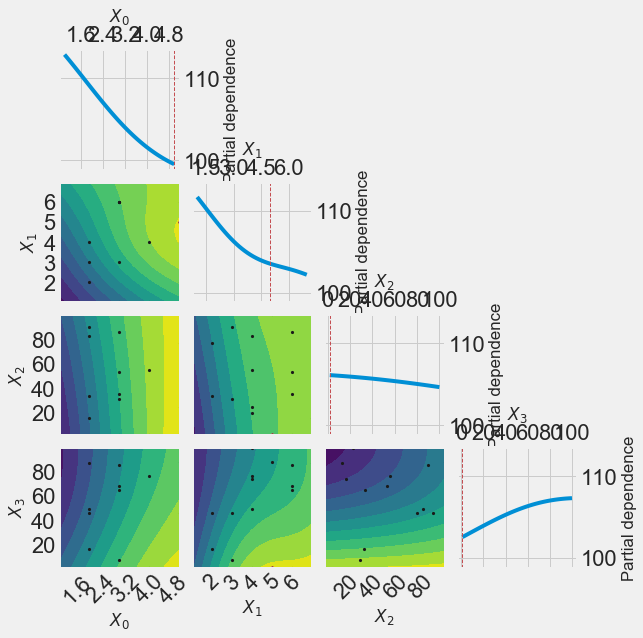

In [55]:
from skopt.plots import plot_convergence,plot_evaluations,plot_objective


#plot_convergence(res_gp)
#plot_evaluations(res_gp,bins=10)
plot_objective(res_gp)

In [30]:
import xgboost as xgb

    
xgboost = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree=1.000000, colsample_bylevel=0.851049,
                           colsample_bynode=0.600000,learning_rate = 0.186384,max_depth = 30, reg_alpha = 1,
                           n_estimators = 100,subsample=0.917004,min_child_weight=1.0,random_state=0,
                           reg_lamba=6)


"""""
Best parameters:
- max_depth=30
- learning_rate=0.186384
- min_child_weight=1
- subsample=0.917004
- colsample_bytree=1.000000
- colsample_bylevel=0.851049
- colsample_bynode=0.600000
- reg_alpha=1
- reg_lambda=6
- n_estimators = 100
"""""

#xgboost = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree=1, colsample_bylevel=1,
#                           colsample_bynode=1,learning_rate = 0.03628846981866311,max_depth = 6, reg_alpha = 0,
#                           n_estimators = 1000,subsample=0.9304479931732184,min_child_weight=1.0,random_state=0,
#                           min_split_loss=2, tree_method='exact',refresh_leaf=0,eval_metric='logloss')

#{'colsample_bylevel': 0.8374375346320496, 'colsample_bynode': 0.6885569408836403, 'colsample_bytree': 0.8776675458422817,
#'learning_rate': 0.036467976493070084, 'max_depth': 8, 'min_child_weight': 2.0, 'num_leaves': 3, 'reg_alpha': 9,
#'reg_lambda': 0, 'subsample': 0.8585000679058314}

#BEST BY BAYES HYPEROPT {'colsample_bylevel': 0.9728171458731129, 'colsample_bynode': 0.7716202725231394, 'colsample_bytree': 0.9886535798569486, 'learning_rate': 0.04228487162757744, 'max_depth': 20, 'min_child_weight': 2.0, 'num_leaves': 0, 'reg_alpha': 17, 'reg_lambda': 2, 'subsample': 0.941286166818659}

#BEST BY ME : objective ='reg:squarederror', colsample_bytree=1, colsample_bylevel=1,
#colsample_bynode=1,learning_rate = 0.03628846981866311,max_depth = 6, alpha = 0, n_estimators = 1000,
#subsample=0.9304479931732184, min_split_loss=2, tree_method='exact',refresh_leaf=0,
#val_metric='logloss',min_child_weight=1.0

#Best parameters by skopt (n_estimators=50, random_state=0):
#- max_depth=30
#- learning_rate=0.124211
#- min_child_weight=1
#- subsample=1.000000
#- colsample_bytree=1.000000
#- colsample_bylevel=0.600000
#- colsample_bynode=0.600000
#- reg_alpha=29
#- reg_lambda=1

#Best parameters by skopt (n_estimators=1000, random_state=0):
#- max_depth=18
#- learning_rate=0.029486
#- min_child_weight=1
#- subsample=1.000000
#- colsample_bytree=1.000000
#- colsample_bylevel=0.600000
#- colsample_bynode=0.600000
#- reg_alpha=1
#- reg_lambda=1

#Best parameters by skopt (n_estimators=500, random_state=0):
#- max_depth=22
#- learning_rate=0.126876
#- min_child_weight=1
#- subsample=0.800000
#- colsample_bytree=0.956419
#- colsample_bylevel=0.812789
#- colsample_bynode=0.796583
#- reg_alpha=4
#- reg_lambda=9

xg_mae, xg_mse, xg_rmse, xg_r2 = fit_and_evaluate(xgboost,ridgelasso=False)
      
print('xgboost Regression Performance on the test set: Mean Absolute Error: %0.4f' % xg_mae)
print('xgboost Regression Performance on the test set: Mean Squared Error: %.4f' % xg_mse)
print('xgboost Regression Performance on the test set: Root Mean Squared Error: %.4f'% xg_rmse)
print('xgboost Regression Performance on the test set: R^2: %.4f' % xg_r2)

xgboost Regression Performance on the test set: Mean Absolute Error: 56.3822
xgboost Regression Performance on the test set: Mean Squared Error: 90736.4755
xgboost Regression Performance on the test set: Root Mean Squared Error: 301.2250
xgboost Regression Performance on the test set: R^2: 0.6436


In [64]:
from hyperparameter_hunter import Environment, CVExperiment
from sklearn.metrics import explained_variance_score,r2_score
env = Environment(
    train_dataset=scaled_features_df,
    results_path="HyperparameterHunterAssets",
    target_column="target",
    metrics=["mean_absolute_error"],
    #metrics=dict(r2=r2_score),
    cv_type="KFold",
    cv_params=dict(n_splits=10, shuffle=True, random_state=32),
    runs=2,
)


import xgboost as xgb

experiment = CVExperiment(
    model_initializer=xgb.XGBRegressor,
    model_init_params=dict(
        objective ="reg:squarederror",
        n_estimators=100,
        learning_rate=0.03,
        max_depth=5,
        subsample=1,
        colsample_bytree=1,
        colsample_bylevel=1,
        colsample_bynode=1,
        reg_alpha=1,
        reg_lamba=1,
        save_snapshot=False,
        allow_writing_files=False,
    ),
    model_extra_params=dict(fit=dict(eval_metric="mae"))
)

from hyperparameter_hunter import BayesianOptPro,DummyOptPro, Real, Integer, Categorical

optimizer = BayesianOptPro(iterations=10, random_state=777)

optimizer.forge_experiment(
    model_initializer=xgb.XGBRegressor,
    model_init_params=dict(
        objective ="reg:squarederror",
        n_estimators=100,
        learning_rate=Real(0.001, 1.0),
        max_depth=Integer(1, 30),
        subsample=Real(0.8, 1.0),
        colsample_bytree=Real(0.6, 1.0),
        colsample_bylevel=Real(0.6,1.0),
        colsample_bynode=Real(0.6,1.0),
        reg_alpha=Integer(1,30),
        reg_lambda=Integer(1,30),
        save_snapshot=False,
        allow_writing_files=False,
        booster=Categorical(["gbtree", "gblinear"]),
    ),
    model_extra_params=dict(
        fit=dict(
            verbose=False,
            eval_metric=Categorical(["rmse", "mae"]),
        ),
    ),
)

optimizer.go()

<08:22:25> Validated Environment:  'MtWPVLlrIrlWL9gzZ_LY3usn-HeyPzJ-Ym5ZIJOHz1g='
<08:22:25> Initialized Experiment: '1104b4bf-24e1-4be2-a335-a95e1f952b08'
<08:22:25> Hyperparameter Key:     '-N-5q2gI7vDPmB71R_Hu6U9u0CvEey3tGQqw8P8449E='
<08:22:25> 
<08:22:26> R0-f0-r0  |  OOF(mean_absolute_error=90.06834)  |  Time: 1.403 s
<08:22:27> R0-f0-r1  |  OOF(mean_absolute_error=90.06834)  |  Time: 0.895 s
<08:22:27> R0-f0-r-  |  OOF(mean_absolute_error=90.06834)  |  Time: 2.33 s
<08:22:28> R0-f1-r0  |  OOF(mean_absolute_error=66.70874)  |  Time: 0.737 s
<08:22:28> R0-f1-r1  |  OOF(mean_absolute_error=66.70874)  |  Time: 0.775 s
<08:22:29> R0-f1-r-  |  OOF(mean_absolute_error=66.70874)  |  Time: 1.54 s
<08:22:29> R0-f2-r0  |  OOF(mean_absolute_error=77.65202)  |  Time: 0.784 s
<08:22:30> R0-f2-r1  |  OOF(mean_absolute_error=77.65202)  |  Time: 0.764 s
<08:22:30> R0-f2-r-  |  OOF(mean_absolute_error=77.65202)  |  Time: 1.577 s
<08:22:31> R0-f3-r0  |  OOF(mean_absolute_error=88.24233)  |  Time: 

In [65]:
from sklearn.model_selection import cross_val_score
import xgboost as xgb

n_features = X_train.shape[1]

# gradient boosted trees tend to do well on problems like this
reg = xgb.XGBRegressor(n_estimators=100, random_state=0)


from skopt.space import Real, Integer
from skopt.utils import use_named_args


# The list of hyper-parameters we want to optimize. For each one we define the bounds,
# the corresponding scikit-learn parameter name, as well as how to sample values
# from that dimension (`'log-uniform'` for the learning rate)
space =[
        Integer(1, 30, name='max_depth'),
        Real(10**-5, 10**0, "log-uniform", name='learning_rate'),
        Integer(1, 10, name='min_child_weight'),
        Real(0.8, 1.0, "log-uniform", name='subsample'),
        Real(0.6, 1.0, "log-uniform", name='colsample_bytree'),
        Real(0.6, 1.0, "log-uniform", name='colsample_bylevel'),
        Real(0.6, 1.0, "log-uniform", name='colsample_bynode'),
        Integer(1, 30, name='reg_alpha'),
        Integer(1, 30, name='reg_lambda')
       ]



# this decorator allows your objective function to receive a the parameters as
# keyword arguments. This is particularly convenient when you want to set scikit-learn
# estimator parameters
@use_named_args(space)
def objective(**params):
    reg.set_params(**params)

    return -np.mean(cross_val_score(reg, X_train, y_train, cv=5, n_jobs=-1,
                                    scoring="neg_mean_absolute_error"))

from skopt import gp_minimize,gbrt_minimize,forest_minimize
res_gpxgb = gp_minimize(objective, space, n_calls=50, random_state=0)

"Best score=%.4f" % res_gpxgb.fun

print("""Best parameters:
- max_depth=%d
- learning_rate=%.6f
- min_child_weight=%d
- subsample=%.6f
- colsample_bytree=%.6f
- colsample_bylevel=%.6f
- colsample_bynode=%.6f
- reg_alpha=%d
- reg_lambda=%d
     """ % (res_gpxgb.x[0], res_gpxgb.x[1], 
                            res_gpxgb.x[2], res_gpxgb.x[3], 
                            res_gpxgb.x[4],res_gpxgb.x[5],res_gpxgb.x[6],res_gpxgb.x[7],res_gpxgb.x[8]))

Best parameters:
- max_depth=30
- learning_rate=0.186384
- min_child_weight=1
- subsample=0.917004
- colsample_bytree=1.000000
- colsample_bylevel=0.851049
- colsample_bynode=0.600000
- reg_alpha=1
- reg_lambda=6
     


In [29]:
import lightgbm as lgb

LGBM = lgb.LGBMRegressor(learning_rate=0.303343,
                        n_estimators=500,
                        max_depth=20,
                        num_leaves=30,random_state=0)

lgbm_mae, lgbm_mse, lgbm_rmse, lgbm_r2 = fit_and_evaluate(LGBM,ridgelasso=False)
      
print('lightgbm Regression Performance on the test set: Mean Absolute Error: %0.4f' % lgbm_mae)
print('lightgbm Regression Performance on the test set: Mean Squared Error: %.4f' % lgbm_mse)
print('lightgbm Regression Performance on the test set: Root Mean Squared Error: %.4f'% lgbm_rmse)
print('lightgbm Regression Performance on the test set: R^2: %.4f' % lgbm_r2)

lightgbm Regression Performance on the test set: Mean Absolute Error: 79.5909
lightgbm Regression Performance on the test set: Mean Squared Error: 121688.2315
lightgbm Regression Performance on the test set: Root Mean Squared Error: 348.8384
lightgbm Regression Performance on the test set: R^2: 0.5220


In [72]:
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
import lightgbm as lgb
from sklearn.model_selection import cross_val_score

#n_features = X_train.shape[1]

# gradient boosted trees tend to do well on problems like this
#reg = GradientBoostingRegressor(n_estimators=50, random_state=0)
reg = lgb.LGBMRegressor(n_estimators=500, random_state=0)


from skopt.space import Real, Integer
from skopt.utils import use_named_args


# The list of hyper-parameters we want to optimize. For each one we define the bounds,
# the corresponding scikit-learn parameter name, as well as how to sample values
# from that dimension (`'log-uniform'` for the learning rate)
space  = [Integer(1, 20, name='max_depth'),
          Real(10**-5, 10**0, "log-uniform", name='learning_rate'),
          Integer(2, 30, name='num_leaves')]

# this decorator allows your objective function to receive a the parameters as
# keyword arguments. This is particularly convenient when you want to set scikit-learn
# estimator parameters
@use_named_args(space)
def objective(**params):
    reg.set_params(**params)

    return -np.mean(cross_val_score(reg, X_train, y_train, cv=5, n_jobs=-1,
                                    scoring="neg_mean_absolute_error"))

from skopt import gp_minimize
res_gplgbm = gp_minimize(objective, space, n_calls=50, random_state=0)

"Best score=%.4f" % res_gplgbm.fun

print("""Best parameters:
- max_depth=%d
- learning_rate=%.6f
- num_leaves=%d
""" % (res_gplgbm.x[0],res_gplgbm.x[1], res_gplgbm.x[2]))

Best parameters:
- max_depth=20
- learning_rate=0.303343
- num_leaves=30



In [28]:
from catboost import CatBoostRegressor

CatBoost = CatBoostRegressor(iterations=100,learning_rate=0.431157, depth=8, verbose=True,l2_leaf_reg=2,random_state=0,loss_function='RMSE',score_function='Cosine')
"""
Best parameters:
- depth=8
- learning_rate=0.431157
- l2_leaf_reg=2
"""
#Best By SKOPT :
#iterations=100,learning_rate=0.353690, depth=8, verbose=True,l2_leaf_reg=2,loss_function='RMSE',score_function='Cosine'

catb_mae, catb_mse, catb_rmse, catb_r2 = fit_and_evaluate(CatBoost,ridgelasso=False)
      
print('CatBoost Regression Performance on the test set: Mean Absolute Error: %0.4f' % catb_mae)
print('CatBoost Regression Performance on the test set: Mean Squared Error: %.4f' % catb_mse)
print('CatBoost Regression Performance on the test set: Root Mean Squared Error: %.4f'% catb_rmse)
print('CatBoost Regression Performance on the test set: R^2: %.4f' % catb_r2)

0:	learn: 419.2513535	total: 99.7ms	remaining: 9.87s
1:	learn: 375.8039600	total: 183ms	remaining: 8.99s
2:	learn: 340.8781458	total: 272ms	remaining: 8.8s
3:	learn: 310.1504124	total: 352ms	remaining: 8.46s
4:	learn: 295.1741147	total: 423ms	remaining: 8.03s
5:	learn: 270.2196664	total: 502ms	remaining: 7.86s
6:	learn: 250.3570238	total: 580ms	remaining: 7.71s
7:	learn: 244.9020445	total: 664ms	remaining: 7.63s
8:	learn: 218.8729544	total: 745ms	remaining: 7.53s
9:	learn: 210.5274923	total: 818ms	remaining: 7.36s
10:	learn: 200.0591463	total: 889ms	remaining: 7.19s
11:	learn: 194.3822228	total: 962ms	remaining: 7.06s
12:	learn: 184.8750660	total: 1.04s	remaining: 6.94s
13:	learn: 180.7944628	total: 1.1s	remaining: 6.78s
14:	learn: 172.3530724	total: 1.22s	remaining: 6.94s
15:	learn: 165.9731439	total: 1.3s	remaining: 6.83s
16:	learn: 159.5080045	total: 1.39s	remaining: 6.81s
17:	learn: 156.7357054	total: 1.47s	remaining: 6.69s
18:	learn: 151.4327528	total: 1.55s	remaining: 6.6s
19:	le

In [20]:
from hyperparameter_hunter import Environment, CVExperiment
from sklearn.metrics import explained_variance_score,r2_score

env = Environment(
    train_dataset=scaled_features_df,
    results_path="HyperparameterHunterAssets",
    metrics=dict(r2=r2_score),
    cv_type="KFold",
    cv_params=dict(n_splits=10, shuffle=True, random_state=1337),
    runs=2,
)

from catboost import CatBoostRegressor

experiment = CVExperiment(
    model_initializer=CatBoostRegressor,
    model_init_params=dict(
        iterations=100,
        learning_rate=0.353690,
        depth=8,
        bootstrap_type="Bayesian",
        save_snapshot=False,
        allow_writing_files=False,
        l2_leaf_reg=2,
    ),
    model_extra_params=dict(
        fit=dict(
            verbose=50,
            eval_set=[(env.validation_input, env.validation_target)],
        ),
    ),
)


from hyperparameter_hunter import GBRT,BayesianOptPro,DummyOptPro, Real, Integer, Categorical

optimizer = BayesianOptPro(iterations=50, random_state=777)
#optimizer = GBRT(iterations=20, random_state=32)


optimizer.forge_experiment(
    model_initializer=CatBoostRegressor,
    model_init_params=dict(
        iterations=100,
        learning_rate=Real(0.001, 0.4),
        depth=Integer(1, 8),
        l2_leaf_reg=Integer(2,5),
        save_snapshot=False,
        allow_writing_files=False,
    ),
    model_extra_params=dict(
        fit=dict(
            verbose=False,
            eval_set=[(env.validation_input, env.validation_target)],
        ),
    ),
)

optimizer.go()

Cross-Experiment Key:   '71jDmAFet1aYqA8baxAiZJs8M3ENTD-ioBtrQ3iaDAg='
<00:18:31> Validated Environment:  '71jDmAFet1aYqA8baxAiZJs8M3ENTD-ioBtrQ3iaDAg='
<00:18:31> Initialized Experiment: 'cf1d72d4-b457-4a7a-b23d-2173b6b30923'
<00:18:31> Hyperparameter Key:     'WFAa0FjTsP7azLm2eZNUCo5UpOz32KxFBX2axmV0HlI='
<00:18:31> WARNING: Duplicate experiment!
<00:18:31> 
0:	learn: 422.0798008	test: 266.2800407	best: 266.2800407 (0)	total: 119ms	remaining: 11.8s
50:	learn: 90.8348733	test: 177.0581951	best: 172.9294001 (45)	total: 4.12s	remaining: 3.96s
99:	learn: 58.8147963	test: 175.2975040	best: 172.9294001 (45)	total: 8.02s	remaining: 0us

bestTest = 172.9294001
bestIteration = 45

Shrink model to first 46 iterations.
<00:18:39> R0-f0-r0  |  OOF(r2=0.58610)  |  Time: 8.30901 s
0:	learn: 417.5449709	test: 251.4948916	best: 251.4948916 (0)	total: 78.7ms	remaining: 7.79s
50:	learn: 92.7690929	test: 222.6510382	best: 222.6510382 (50)	total: 3.68s	remaining: 3.54s
99:	learn: 57.4734263	test: 217.43

50:	learn: 95.8446063	test: 172.9365397	best: 172.9291018 (48)	total: 3.15s	remaining: 3.03s
99:	learn: 59.5175527	test: 161.5102046	best: 161.5102046 (99)	total: 6.17s	remaining: 0us

bestTest = 161.5102046
bestIteration = 99

<00:20:55> R0-f9-r0  |  OOF(r2=0.49945)  |  Time: 6.311 s
0:	learn: 455.2265882	test: 232.6002815	best: 232.6002815 (0)	total: 68.8ms	remaining: 6.81s
50:	learn: 96.5900630	test: 199.1804329	best: 199.1804329 (50)	total: 3.29s	remaining: 3.16s
99:	learn: 61.4398830	test: 185.3240158	best: 185.3240158 (99)	total: 6.44s	remaining: 0us

bestTest = 185.3240158
bestIteration = 99

<00:21:02> R0-f9-r1  |  OOF(r2=0.34095)  |  Time: 6.57201 s
<00:21:02> R0-f9-r-  |  OOF(r2=0.46342)  |  Time: 12.913 s
<00:21:02> FINAL     |  OOF(r2=0.39247)  |  Time: 2.0 m, 31.077 s
<00:21:02> 
<00:21:02> Saving results for Experiment: 'cf1d72d4-b457-4a7a-b23d-2173b6b30923'
Validated Environment with key: "71jDmAFet1aYqA8baxAiZJs8M3ENTD-ioBtrQ3iaDAg="
Matching Experiments:  20  (Candidat

In [77]:
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import cross_val_score

#n_features = X_train.shape[1]

# gradient boosted trees tend to do well on problems like this
#reg = GradientBoostingRegressor(n_estimators=50, random_state=0)
reg = CatBoostRegressor(iterations=100, random_state=0)


from skopt.space import Real, Integer
from skopt.utils import use_named_args


# The list of hyper-parameters we want to optimize. For each one we define the bounds,
# the corresponding scikit-learn parameter name, as well as how to sample values
# from that dimension (`'log-uniform'` for the learning rate)
space  = [Integer(1, 8, name='depth'),
          Real(10**-5, 10**0, "log-uniform", name='learning_rate'),
          Integer(2, 30, name='l2_leaf_reg')]

# this decorator allows your objective function to receive a the parameters as
# keyword arguments. This is particularly convenient when you want to set scikit-learn
# estimator parameters
@use_named_args(space)
def objective(**params):
    reg.set_params(**params)

    return -np.mean(cross_val_score(reg, X_train, y_train, cv=5, n_jobs=-1,
                                    scoring="neg_mean_absolute_error"))

from skopt import gp_minimize
res_gpcat = gp_minimize(objective, space, n_calls=50, random_state=0)

"Best score=%.4f" % res_gpcat.fun

print("""Best parameters:
- depth=%d
- learning_rate=%.6f
- l2_leaf_reg=%d
""" % (res_gpcat.x[0],res_gpcat.x[1], res_gpcat.x[2]))

Best parameters:
- depth=8
- learning_rate=0.431157
- l2_leaf_reg=2



In [89]:
from hyperparameter_hunter import Environment, CVExperiment
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, QuantileTransformer, Imputer

env = Environment(
    train_dataset=scaled_features_df,
    results_path="HyperparameterHunterAssets",
    holdout_dataset=lambda train, _: train_test_split(scaled_features_df, test_size=0.3, random_state=1),
    target_column="target",
    metrics={"mae": "median_absolute_error"},
    cv_type="KFold",
    cv_params=dict(n_splits=5, random_state=1),
)

exp_0 = CVExperiment(AdaBoostRegressor, model_init_params={})

import numpy as np

def euclidean_norm(all_inputs):
    all_inputs["euclidean_norm"] = all_inputs.agg(
        lambda row: np.sqrt(np.sum([np.square(_) for _ in row])), axis="columns",
    )
    return all_inputs

from sklearn.preprocessing import StandardScaler, QuantileTransformer

def standard_scale(train_inputs, non_train_inputs):
    s = StandardScaler()
    train_inputs[train_inputs.columns] = s.fit_transform(train_inputs.values)
    non_train_inputs[train_inputs.columns] = s.transform(non_train_inputs.values)
    return train_inputs, non_train_inputs

def quantile_transform(train_targets, non_train_targets):
    t = QuantileTransformer(output_distribution="normal", n_quantiles=100)
    train_targets[train_targets.columns] = t.fit_transform(train_targets.values)
    non_train_targets[train_targets.columns] = t.transform(non_train_targets.values)
    return train_targets, non_train_targets, t

from sklearn.preprocessing import MinMaxScaler, Normalizer

def min_max_scale(train_inputs, non_train_inputs):
    s = MinMaxScaler()
    train_inputs[train_inputs.columns] = s.fit_transform(train_inputs.values)
    non_train_inputs[train_inputs.columns] = s.transform(non_train_inputs.values)
    return train_inputs, non_train_inputs

def normalize(train_inputs, non_train_inputs):
    n = Normalizer()
    train_inputs[train_inputs.columns] = n.fit_transform(train_inputs.values)
    non_train_inputs[train_inputs.columns] = n.transform(non_train_inputs.values)
    return train_inputs, non_train_inputs

exp_1 = CVExperiment(AdaBoostRegressor, feature_engineer=[euclidean_norm])

exp_2 = CVExperiment(AdaBoostRegressor, feature_engineer=[euclidean_norm, standard_scale])

exp_3 = CVExperiment(AdaBoostRegressor, feature_engineer=[standard_scale, quantile_transform])

from sklearn.preprocessing import PowerTransformer

def power_transform(train_targets, non_train_targets):
    t = PowerTransformer()
    train_targets[train_targets.columns] = t.fit_transform(train_targets.values)
    non_train_targets[train_targets.columns] = t.transform(non_train_targets.values)
    return train_targets, non_train_targets, t

<11:50:32> Validated Environment:  'SK1HtmuczZStGllw6RW7G8ukQWR2m2TRJo6aFH8ySTI='
<11:50:32> Initialized Experiment: '88dcf100-1bd2-4f17-a44c-0c1981a6f3ff'
<11:50:33> Hyperparameter Key:     'Ih8JD4oxVEKDFjJN0xDvr9yW_W_ONDb7bSH_Oao1RlQ='
<11:50:33> 
<11:50:33> R0-f0-r-  |  OOF(mae=77.66678)  |  Holdout(mae=77.31678)  |  Time: 0.349 s
<11:50:33> R0-f1-r-  |  OOF(mae=49.49995)  |  Holdout(mae=48.00240)  |  Time: 0.19099 s
<11:50:34> R0-f2-r-  |  OOF(mae=132.75781)  |  Holdout(mae=131.79100)  |  Time: 0.514 s
<11:50:34> R0-f3-r-  |  OOF(mae=223.24097)  |  Holdout(mae=202.10597)  |  Time: 0.433 s
<11:50:34> R0-f4-r-  |  OOF(mae=69.95918)  |  Holdout(mae=69.10009)  |  Time: 0.273 s
<11:50:34> FINAL     |  OOF(mae=90.04183)  |  Holdout(mae=112.04528)  |  Time: 1.89401 s
<11:50:34> 
<11:50:35> Saving results for Experiment: '88dcf100-1bd2-4f17-a44c-0c1981a6f3ff'
<11:50:35> Validated Environment:  'SK1HtmuczZStGllw6RW7G8ukQWR2m2TRJo6aFH8ySTI='
<11:50:35> Initialized Experiment: '434c1bae-0e2d-

In [210]:
from hyperparameter_hunter import BayesianOptPro, Categorical, Integer, Real

opt_0 = BayesianOptPro(iterations=12, random_state=32)
opt_0.forge_experiment(
    AdaBoostRegressor,
    feature_engineer=[
        Categorical([euclidean_norm], optional=True),
        Categorical([standard_scale, min_max_scale, normalize], optional=True),
        Categorical([quantile_transform], optional=True)
    ],
)
opt_0.go()

Validated Environment with key: "Zb8fYU-Rs8NheLOSSpES8BB7P5GbuJV0AYAFqMlA4cQ="
Matching Experiments:  4  (Candidates:  4)
Saved Results
____________________________________________________________________________________________
  #|       ID|   Time|      Score|       (steps, 0)|       (steps, 1)|           (steps, 2)| 
  0| 8c2a37f8| 00m00s|  100.27950|   euclidean_norm|           <NONE>|               <NONE>| 
  1| 4c07c499| 00m00s|   98.49716|   euclidean_norm|   standard_scale|               <NONE>| 
  2| fe5135d1| 00m00s|   90.04183|           <NONE>|           <NONE>|               <NONE>| 
  3| 99452f3e| 00m00s|   24.07674|           <NONE>|   standard_scale|   quantile_transform| 
Hyperparameter Optimization
____________________________________________________________________________________________
  #|       ID|   Time|      Score|       (steps, 0)|       (steps, 1)|           (steps, 2)| 
  4| 42efd1fb| 00m01s|   85.62678|           <NONE>|    min_max_scale|               <

In [211]:
opt_1 = BayesianOptPro(iterations=10, random_state=32)
opt_1.forge_experiment(
    AdaBoostRegressor,
    model_init_params=dict(
        n_estimators=Integer(40, 200),
        learning_rate=Real(0.01, 1.0),
        loss=Categorical(["linear", "square", "exponential"]),
    ),
    feature_engineer=[
        euclidean_norm,
        Categorical([standard_scale, min_max_scale, normalize], optional=True),
        Categorical([quantile_transform], optional=True),
    ],
)
opt_1.go()

Validated Environment with key: "Zb8fYU-Rs8NheLOSSpES8BB7P5GbuJV0AYAFqMlA4cQ="
Matching Experiments:  8  (Candidates:  16)
Saved Results
__________________________________________________________________________________________________________________________
  #|       ID|   Time|      Score|       (steps, 1)|           (steps, 2)|   learning_rate|          loss|   n_estimators| 
  0| 1e633c6e| 00m00s|  115.51116|        normalize|               <NONE>|          1.0000|        linear|             50| 
  1| 8c2a37f8| 00m00s|  100.27950|           <NONE>|               <NONE>|          1.0000|        linear|             50| 
  2| be82b30e| 00m00s|  100.27950|    min_max_scale|               <NONE>|          1.0000|        linear|             50| 
  3| 4c07c499| 00m00s|   98.49716|   standard_scale|               <NONE>|          1.0000|        linear|             50| 
  4| fc56f0cb| 00m00s|   23.43174|    min_max_scale|   quantile_transform|          1.0000|        linear|             5

In [212]:
from sklearn.preprocessing import PowerTransformer

def power_transform(train_targets, non_train_targets):
    t = PowerTransformer()
    train_targets[train_targets.columns] = t.fit_transform(train_targets.values)
    non_train_targets[train_targets.columns] = t.transform(non_train_targets.values)
    return train_targets, non_train_targets, t

from hyperparameter_hunter import RandomForestOptPro

opt_2 = RandomForestOptPro(iterations=10, random_state=32)
opt_2.forge_experiment(
    AdaBoostRegressor,
    model_init_params=dict(
        n_estimators=Integer(40, 200),
        learning_rate=Real(0.01, 1.0),
        loss=Categorical(["linear", "square", "exponential"]),
    ),
    feature_engineer=[
        Categorical([euclidean_norm], optional=True),
        Categorical([standard_scale, min_max_scale]),
        Categorical([quantile_transform, power_transform], optional=True),
    ],
)
opt_2.go()

Validated Environment with key: "Zb8fYU-Rs8NheLOSSpES8BB7P5GbuJV0AYAFqMlA4cQ="
Matching Experiments:  9  (Candidates:  26)
Saved Results
____________________________________________________________________________________________________________________________________________
  #|       ID|   Time|      Score|       (steps, 0)|       (steps, 1)|           (steps, 2)|   learning_rate|          loss|   n_estimators| 
  0| be82b30e| 00m00s|  100.27950|   euclidean_norm|    min_max_scale|               <NONE>|          1.0000|        linear|             50| 
  1| 4c07c499| 00m00s|   98.49716|   euclidean_norm|   standard_scale|               <NONE>|          1.0000|        linear|             50| 
  2| 42efd1fb| 00m00s|   85.62678|           <NONE>|    min_max_scale|               <NONE>|          1.0000|        linear|             50| 
  3| 265effa1| 00m00s|   84.90178|           <NONE>|   standard_scale|               <NONE>|          1.0000|        linear|             50| 
  4| af150a4

In [27]:
from sklearn.ensemble import AdaBoostRegressor

ada_reg = AdaBoostRegressor(base_estimator=None, learning_rate=0.0259, loss='exponential',
         n_estimators=193, random_state=None)


adab_mae, adab_mse, adab_rmse, adab_r2 = fit_and_evaluate(ada_reg,ridgelasso=False)
      
print('AdaBoost Regression Performance on the test set: Mean Absolute Error: %0.4f' % adab_mae)
print('AdaBoost Regression Performance on the test set: Mean Squared Error: %.4f' % adab_mse)
print('AdaBoost Regression Performance on the test set: Root Mean Squared Error: %.4f'% adab_rmse)
print('AdaBoost Regression Performance on the test set: R^2: %.4f' % adab_r2)

AdaBoost Regression Performance on the test set: Mean Absolute Error: 112.6293
AdaBoost Regression Performance on the test set: Mean Squared Error: 114772.7738
AdaBoost Regression Performance on the test set: Root Mean Squared Error: 338.7813
AdaBoost Regression Performance on the test set: R^2: 0.5491


Definition of the Coefficient of Determination R2
The coefficient of determination R2 can describe how “good” a model is at making predictions: it represents the proportion of the variance in the dependent variable that is predictable from the independent variable:

where:

    1.is the total sum of squares, with ,
    2.is the residual sum of squares, and is the predicted value.

R2 ranges from 0 to 1:

    1.if R2=0 : the model always fails to predict the target variable,
    2.if R2=1 : the model perfectly predicts the target variable.
Any value between 0 and 1 indicates what percentage of the target variable, using the model, can be explained by the features. If R2< 0, it indicates that the model is no better than one that constantly predicts the mean of the target variable.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               1024      
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
batch_normalization_3 (Batch (None, 256)               1024      
_________________________________________________________________
dense_4 (Dense)              (None, 256)              

3749/3749 [==============================] - ETA: 0s - loss: 114.6712 - coeff_determination: 0.258 - ETA: 0s - loss: 97.2625 - coeff_determination: 0.265 - ETA: 0s - loss: 83.4341 - coeff_determination: 0.29 - ETA: 0s - loss: 85.3824 - coeff_determination: 0.28 - ETA: 0s - loss: 84.3281 - coeff_determination: 0.28 - ETA: 0s - loss: 83.1747 - coeff_determination: 0.28 - 0s 95us/step - loss: 84.7884 - coeff_determination: 0.2870 - val_loss: 53.9296 - val_coeff_determination: 0.3368

Epoch 00024: val_loss improved from 54.64437 to 53.92964, saving model to Weights-024--53.92964.hdf5
Epoch 25/500
3749/3749 [==============================] - ETA: 0s - loss: 100.9488 - coeff_determination: 0.171 - ETA: 0s - loss: 100.3967 - coeff_determination: 0.239 - ETA: 0s - loss: 87.9910 - coeff_determination: 0.281 - ETA: 0s - loss: 88.6321 - coeff_determination: 0.24 - ETA: 0s - loss: 84.5862 - coeff_determination: 0.28 - ETA: 0s - loss: 81.7395 - coeff_determination: 0.28 - ETA: 0s - loss: 85.1843 - 

3749/3749 [==============================] - ETA: 0s - loss: 45.4898 - coeff_determination: 0.69 - ETA: 0s - loss: 47.4525 - coeff_determination: 0.63 - ETA: 0s - loss: 65.0445 - coeff_determination: 0.44 - ETA: 0s - loss: 65.9942 - coeff_determination: 0.37 - ETA: 0s - loss: 70.8300 - coeff_determination: 0.38 - ETA: 0s - loss: 67.2620 - coeff_determination: 0.42 - ETA: 0s - loss: 75.1236 - coeff_determination: 0.39 - ETA: 0s - loss: 77.6123 - coeff_determination: 0.38 - 0s 120us/step - loss: 77.4924 - coeff_determination: 0.3860 - val_loss: 55.7160 - val_coeff_determination: 0.3004

Epoch 00050: val_loss did not improve from 52.11482
Epoch 51/500
3749/3749 [==============================] - ETA: 0s - loss: 51.0563 - coeff_determination: 0.68 - ETA: 0s - loss: 72.1412 - coeff_determination: 0.41 - ETA: 0s - loss: 83.2965 - coeff_determination: 0.36 - ETA: 0s - loss: 79.1496 - coeff_determination: 0.39 - ETA: 0s - loss: 72.0893 - coeff_determination: 0.45 - ETA: 0s - loss: 75.2710 - co

3749/3749 [==============================] - ETA: 0s - loss: 48.6935 - coeff_determination: 0.30 - ETA: 0s - loss: 90.0086 - coeff_determination: 0.32 - ETA: 0s - loss: 77.5869 - coeff_determination: 0.43 - ETA: 0s - loss: 86.4550 - coeff_determination: 0.45 - ETA: 0s - loss: 75.3680 - coeff_determination: 0.45 - ETA: 0s - loss: 73.8426 - coeff_determination: 0.47 - ETA: 0s - loss: 71.0962 - coeff_determination: 0.50 - 0s 113us/step - loss: 70.0417 - coeff_determination: 0.5003 - val_loss: 55.3314 - val_coeff_determination: 0.3089

Epoch 00076: val_loss did not improve from 52.11482
Epoch 77/500
3749/3749 [==============================] - ETA: 0s - loss: 81.1537 - coeff_determination: 0.30 - ETA: 0s - loss: 77.6194 - coeff_determination: 0.43 - ETA: 0s - loss: 77.0166 - coeff_determination: 0.45 - ETA: 0s - loss: 68.8188 - coeff_determination: 0.46 - ETA: 0s - loss: 68.3735 - coeff_determination: 0.46 - ETA: 0s - loss: 65.8190 - coeff_determination: 0.49 - 0s 96us/step - loss: 69.0740

3749/3749 [==============================] - ETA: 0s - loss: 30.2311 - coeff_determination: 0.83 - ETA: 0s - loss: 42.6106 - coeff_determination: 0.57 - ETA: 0s - loss: 54.5871 - coeff_determination: 0.62 - ETA: 0s - loss: 61.7248 - coeff_determination: 0.59 - ETA: 0s - loss: 60.1377 - coeff_determination: 0.58 - ETA: 0s - loss: 60.7137 - coeff_determination: 0.57 - ETA: 0s - loss: 61.0412 - coeff_determination: 0.56 - 0s 122us/step - loss: 65.9435 - coeff_determination: 0.5453 - val_loss: 52.4243 - val_coeff_determination: 0.3728

Epoch 00102: val_loss did not improve from 52.11482
Epoch 103/500
3749/3749 [==============================] - ETA: 0s - loss: 131.1534 - coeff_determination: 0.285 - ETA: 0s - loss: 58.6554 - coeff_determination: 0.598 - ETA: 0s - loss: 52.1837 - coeff_determination: 0.64 - ETA: 0s - loss: 48.2073 - coeff_determination: 0.66 - ETA: 0s - loss: 58.7860 - coeff_determination: 0.61 - ETA: 0s - loss: 61.0029 - coeff_determination: 0.61 - ETA: 0s - loss: 60.9595 


Epoch 00115: val_loss did not improve from 51.81283
Epoch 116/500
3749/3749 [==============================] - ETA: 0s - loss: 26.9413 - coeff_determination: 0.91 - ETA: 0s - loss: 82.1494 - coeff_determination: 0.48 - ETA: 0s - loss: 70.7118 - coeff_determination: 0.55 - ETA: 0s - loss: 63.0319 - coeff_determination: 0.60 - ETA: 0s - loss: 59.2332 - coeff_determination: 0.65 - ETA: 0s - loss: 58.1237 - coeff_determination: 0.66 - ETA: 0s - loss: 61.8540 - coeff_determination: 0.63 - ETA: 0s - loss: 59.9115 - coeff_determination: 0.62 - 0s 133us/step - loss: 61.2315 - coeff_determination: 0.6093 - val_loss: 54.6129 - val_coeff_determination: 0.2162

Epoch 00116: val_loss did not improve from 51.81283
Epoch 117/500
3749/3749 [==============================] - ETA: 0s - loss: 35.2545 - coeff_determination: 0.86 - ETA: 0s - loss: 43.3455 - coeff_determination: 0.78 - ETA: 0s - loss: 43.0117 - coeff_determination: 0.78 - ETA: 0s - loss: 49.6342 - coeff_determination: 0.73 - ETA: 0s - loss

3749/3749 [==============================] - ETA: 0s - loss: 54.5118 - coeff_determination: 0.61 - ETA: 0s - loss: 61.2432 - coeff_determination: 0.67 - ETA: 0s - loss: 63.1286 - coeff_determination: 0.66 - ETA: 0s - loss: 57.7697 - coeff_determination: 0.65 - ETA: 0s - loss: 54.7962 - coeff_determination: 0.66 - ETA: 0s - loss: 54.4329 - coeff_determination: 0.67 - ETA: 0s - loss: 57.4098 - coeff_determination: 0.65 - 0s 112us/step - loss: 59.2635 - coeff_determination: 0.6544 - val_loss: 53.5423 - val_coeff_determination: 0.2685

Epoch 00142: val_loss did not improve from 51.81283
Epoch 143/500
3749/3749 [==============================] - ETA: 0s - loss: 32.6673 - coeff_determination: 0.93 - ETA: 0s - loss: 43.5346 - coeff_determination: 0.82 - ETA: 0s - loss: 44.6822 - coeff_determination: 0.78 - ETA: 0s - loss: 49.9546 - coeff_determination: 0.71 - ETA: 0s - loss: 54.4449 - coeff_determination: 0.59 - ETA: 0s - loss: 56.0864 - coeff_determination: 0.61 - ETA: 0s - loss: 55.7040 - c

3749/3749 [==============================] - ETA: 0s - loss: 55.8091 - coeff_determination: 0.65 - ETA: 0s - loss: 53.2609 - coeff_determination: 0.71 - ETA: 0s - loss: 54.7841 - coeff_determination: 0.74 - ETA: 0s - loss: 48.0803 - coeff_determination: 0.69 - ETA: 0s - loss: 47.1856 - coeff_determination: 0.70 - ETA: 0s - loss: 54.0069 - coeff_determination: 0.67 - ETA: 0s - loss: 56.8670 - coeff_determination: 0.65 - ETA: 0s - loss: 55.8225 - coeff_determination: 0.65 - 0s 125us/step - loss: 55.0601 - coeff_determination: 0.6554 - val_loss: 52.6939 - val_coeff_determination: 0.2866

Epoch 00168: val_loss did not improve from 51.81283
Epoch 169/500
3749/3749 [==============================] - ETA: 0s - loss: 55.0475 - coeff_determination: 0.86 - ETA: 0s - loss: 70.3750 - coeff_determination: 0.62 - ETA: 0s - loss: 54.2400 - coeff_determination: 0.70 - ETA: 0s - loss: 56.2376 - coeff_determination: 0.69 - ETA: 0s - loss: 52.3676 - coeff_determination: 0.72 - ETA: 0s - loss: 56.4166 - c

3749/3749 [==============================] - ETA: 0s - loss: 45.6384 - coeff_determination: 0.84 - ETA: 0s - loss: 47.3885 - coeff_determination: 0.71 - ETA: 0s - loss: 50.5079 - coeff_determination: 0.72 - ETA: 0s - loss: 48.3965 - coeff_determination: 0.74 - ETA: 0s - loss: 49.1864 - coeff_determination: 0.74 - ETA: 0s - loss: 56.0711 - coeff_determination: 0.71 - ETA: 0s - loss: 55.2302 - coeff_determination: 0.72 - 0s 110us/step - loss: 54.0068 - coeff_determination: 0.7112 - val_loss: 54.2530 - val_coeff_determination: 0.2558

Epoch 00194: val_loss did not improve from 50.54354
Epoch 195/500
3749/3749 [==============================] - ETA: 0s - loss: 61.9868 - coeff_determination: 0.65 - ETA: 0s - loss: 72.3770 - coeff_determination: 0.70 - ETA: 0s - loss: 60.6248 - coeff_determination: 0.75 - ETA: 0s - loss: 54.7498 - coeff_determination: 0.73 - ETA: 0s - loss: 55.8815 - coeff_determination: 0.74 - ETA: 0s - loss: 55.8886 - coeff_determination: 0.73 - ETA: 0s - loss: 52.8183 - c

3749/3749 [==============================] - ETA: 0s - loss: 39.5281 - coeff_determination: 0.83 - ETA: 0s - loss: 40.4074 - coeff_determination: 0.76 - ETA: 0s - loss: 43.2703 - coeff_determination: 0.73 - ETA: 0s - loss: 44.3137 - coeff_determination: 0.76 - ETA: 0s - loss: 44.7783 - coeff_determination: 0.75 - ETA: 0s - loss: 46.5589 - coeff_determination: 0.77 - ETA: 0s - loss: 44.2598 - coeff_determination: 0.80 - ETA: 0s - loss: 49.5426 - coeff_determination: 0.74 - 1s 154us/step - loss: 49.2770 - coeff_determination: 0.7478 - val_loss: 53.3579 - val_coeff_determination: 0.3261

Epoch 00220: val_loss did not improve from 50.54354
Epoch 221/500
3749/3749 [==============================] - ETA: 0s - loss: 39.0275 - coeff_determination: 0.36 - ETA: 0s - loss: 40.5637 - coeff_determination: 0.64 - ETA: 0s - loss: 39.2754 - coeff_determination: 0.67 - ETA: 0s - loss: 42.4792 - coeff_determination: 0.57 - ETA: 0s - loss: 46.1177 - coeff_determination: 0.61 - ETA: 0s - loss: 47.4898 - c

3749/3749 [==============================] - ETA: 0s - loss: 30.1368 - coeff_determination: 0.90 - ETA: 0s - loss: 55.7075 - coeff_determination: 0.78 - ETA: 0s - loss: 53.8245 - coeff_determination: 0.72 - ETA: 0s - loss: 46.7428 - coeff_determination: 0.71 - ETA: 0s - loss: 44.3186 - coeff_determination: 0.67 - ETA: 0s - loss: 50.7647 - coeff_determination: 0.66 - ETA: 0s - loss: 48.6614 - coeff_determination: 0.69 - ETA: 0s - loss: 50.9255 - coeff_determination: 0.68 - ETA: 0s - loss: 49.2943 - coeff_determination: 0.70 - 1s 200us/step - loss: 52.5153 - coeff_determination: 0.7097 - val_loss: 52.4394 - val_coeff_determination: 0.2738

Epoch 00245: val_loss did not improve from 50.54354
Epoch 246/500
3749/3749 [==============================] - ETA: 0s - loss: 29.3401 - coeff_determination: 0.77 - ETA: 0s - loss: 36.4421 - coeff_determination: 0.82 - ETA: 0s - loss: 52.7267 - coeff_determination: 0.79 - ETA: 0s - loss: 48.1092 - coeff_determination: 0.80 - ETA: 0s - loss: 45.0167 - c

3749/3749 [==============================] - ETA: 0s - loss: 24.6495 - coeff_determination: 0.95 - ETA: 0s - loss: 47.1065 - coeff_determination: 0.78 - ETA: 0s - loss: 43.8871 - coeff_determination: 0.78 - ETA: 0s - loss: 44.3915 - coeff_determination: 0.81 - ETA: 0s - loss: 43.3838 - coeff_determination: 0.72 - ETA: 0s - loss: 46.1436 - coeff_determination: 0.74 - ETA: 0s - loss: 50.0980 - coeff_determination: 0.72 - 0s 114us/step - loss: 47.3938 - coeff_determination: 0.7539 - val_loss: 55.1511 - val_coeff_determination: -0.2656

Epoch 00271: val_loss did not improve from 50.54354
Epoch 272/500
3749/3749 [==============================] - ETA: 0s - loss: 113.0912 - coeff_determination: 0.510 - ETA: 0s - loss: 63.6211 - coeff_determination: 0.773 - ETA: 0s - loss: 50.0503 - coeff_determination: 0.77 - ETA: 0s - loss: 44.6664 - coeff_determination: 0.79 - ETA: 0s - loss: 42.3405 - coeff_determination: 0.80 - ETA: 0s - loss: 50.9736 - coeff_determination: 0.76 - ETA: 0s - loss: 49.6895


Epoch 00297: val_loss did not improve from 49.07816
Epoch 298/500
3749/3749 [==============================] - ETA: 0s - loss: 94.1326 - coeff_determination: 0.58 - ETA: 0s - loss: 56.0394 - coeff_determination: 0.68 - ETA: 0s - loss: 49.9419 - coeff_determination: 0.66 - ETA: 0s - loss: 46.0697 - coeff_determination: 0.73 - ETA: 0s - loss: 44.7122 - coeff_determination: 0.75 - ETA: 0s - loss: 46.1740 - coeff_determination: 0.76 - 0s 96us/step - loss: 47.9953 - coeff_determination: 0.7639 - val_loss: 52.3010 - val_coeff_determination: 0.3131

Epoch 00298: val_loss did not improve from 49.07816
Epoch 299/500
3749/3749 [==============================] - ETA: 0s - loss: 23.1524 - coeff_determination: 0.95 - ETA: 0s - loss: 44.9876 - coeff_determination: 0.75 - ETA: 0s - loss: 47.9592 - coeff_determination: 0.77 - ETA: 0s - loss: 51.6624 - coeff_determination: 0.78 - ETA: 0s - loss: 50.4373 - coeff_determination: 0.76 - ETA: 0s - loss: 53.0374 - coeff_determination: 0.76 - ETA: 0s - loss:

3749/3749 [==============================] - ETA: 0s - loss: 33.0297 - coeff_determination: 0.72 - ETA: 0s - loss: 44.6345 - coeff_determination: 0.71 - ETA: 0s - loss: 37.5434 - coeff_determination: 0.77 - ETA: 0s - loss: 56.5818 - coeff_determination: 0.73 - ETA: 0s - loss: 53.5560 - coeff_determination: 0.75 - ETA: 0s - loss: 50.7694 - coeff_determination: 0.77 - ETA: 0s - loss: 51.5130 - coeff_determination: 0.77 - ETA: 0s - loss: 48.0878 - coeff_determination: 0.79 - 0s 133us/step - loss: 47.2268 - coeff_determination: 0.7973 - val_loss: 52.5625 - val_coeff_determination: 0.3084

Epoch 00325: val_loss did not improve from 49.07816
Epoch 326/500
3749/3749 [==============================] - ETA: 0s - loss: 31.1603 - coeff_determination: 0.93 - ETA: 0s - loss: 55.1091 - coeff_determination: 0.77 - ETA: 0s - loss: 50.0570 - coeff_determination: 0.78 - ETA: 0s - loss: 46.1085 - coeff_determination: 0.79 - ETA: 0s - loss: 47.1566 - coeff_determination: 0.79 - ETA: 0s - loss: 49.1892 - c

3749/3749 [==============================] - ETA: 0s - loss: 32.8874 - coeff_determination: 0.81 - ETA: 0s - loss: 28.8105 - coeff_determination: 0.91 - ETA: 0s - loss: 38.3123 - coeff_determination: 0.88 - ETA: 0s - loss: 39.4091 - coeff_determination: 0.84 - ETA: 0s - loss: 38.6032 - coeff_determination: 0.85 - ETA: 0s - loss: 41.5068 - coeff_determination: 0.85 - 0s 94us/step - loss: 46.1351 - coeff_determination: 0.8285 - val_loss: 52.0726 - val_coeff_determination: 0.2576

Epoch 00353: val_loss did not improve from 49.07816
Epoch 354/500
3749/3749 [==============================] - ETA: 0s - loss: 24.9766 - coeff_determination: 0.94 - ETA: 0s - loss: 27.8980 - coeff_determination: 0.89 - ETA: 0s - loss: 37.7143 - coeff_determination: 0.81 - ETA: 0s - loss: 39.7353 - coeff_determination: 0.80 - ETA: 0s - loss: 42.2242 - coeff_determination: 0.81 - ETA: 0s - loss: 45.5579 - coeff_determination: 0.81 - 0s 102us/step - loss: 44.5290 - coeff_determination: 0.8245 - val_loss: 52.0255 - 

3749/3749 [==============================] - ETA: 0s - loss: 27.6102 - coeff_determination: 0.98 - ETA: 0s - loss: 54.6323 - coeff_determination: 0.85 - ETA: 0s - loss: 43.9858 - coeff_determination: 0.84 - ETA: 0s - loss: 44.5931 - coeff_determination: 0.79 - ETA: 0s - loss: 56.0036 - coeff_determination: 0.75 - ETA: 0s - loss: 50.7720 - coeff_determination: 0.76 - 0s 91us/step - loss: 51.6304 - coeff_determination: 0.7689 - val_loss: 50.2928 - val_coeff_determination: 0.4155

Epoch 00381: val_loss did not improve from 49.07816
Epoch 382/500
3749/3749 [==============================] - ETA: 0s - loss: 22.9907 - coeff_determination: 0.94 - ETA: 0s - loss: 32.0554 - coeff_determination: 0.74 - ETA: 0s - loss: 45.2294 - coeff_determination: 0.74 - ETA: 0s - loss: 42.9700 - coeff_determination: 0.77 - ETA: 0s - loss: 42.2159 - coeff_determination: 0.76 - ETA: 0s - loss: 48.4859 - coeff_determination: 0.75 - ETA: 0s - loss: 48.2059 - coeff_determination: 0.76 - 0s 101us/step - loss: 48.073

3749/3749 [==============================] - ETA: 0s - loss: 41.9190 - coeff_determination: 0.93 - ETA: 0s - loss: 33.7358 - coeff_determination: 0.85 - ETA: 0s - loss: 44.6403 - coeff_determination: 0.83 - ETA: 0s - loss: 45.3582 - coeff_determination: 0.83 - ETA: 0s - loss: 46.7277 - coeff_determination: 0.82 - ETA: 0s - loss: 45.2631 - coeff_determination: 0.82 - 0s 98us/step - loss: 47.6653 - coeff_determination: 0.8178 - val_loss: 51.8022 - val_coeff_determination: 0.2972

Epoch 00409: val_loss did not improve from 49.07816
Epoch 410/500
3749/3749 [==============================] - ETA: 0s - loss: 36.4891 - coeff_determination: 0.93 - ETA: 0s - loss: 44.3163 - coeff_determination: 0.81 - ETA: 0s - loss: 55.7943 - coeff_determination: 0.80 - ETA: 0s - loss: 51.0405 - coeff_determination: 0.82 - ETA: 0s - loss: 48.3710 - coeff_determination: 0.80 - ETA: 0s - loss: 47.8397 - coeff_determination: 0.81 - 0s 98us/step - loss: 46.5290 - coeff_determination: 0.8072 - val_loss: 50.4345 - v

3749/3749 [==============================] - ETA: 1s - loss: 23.9339 - coeff_determination: 0.94 - ETA: 0s - loss: 50.8898 - coeff_determination: 0.84 - ETA: 0s - loss: 43.0230 - coeff_determination: 0.86 - ETA: 0s - loss: 39.9241 - coeff_determination: 0.87 - ETA: 0s - loss: 42.7359 - coeff_determination: 0.86 - ETA: 0s - loss: 43.4355 - coeff_determination: 0.85 - 0s 101us/step - loss: 42.8525 - coeff_determination: 0.8465 - val_loss: 50.8227 - val_coeff_determination: 0.3680

Epoch 00437: val_loss did not improve from 49.07816
Epoch 438/500
3749/3749 [==============================] - ETA: 0s - loss: 43.9908 - coeff_determination: 0.80 - ETA: 0s - loss: 58.0906 - coeff_determination: 0.80 - ETA: 0s - loss: 44.2194 - coeff_determination: 0.86 - ETA: 0s - loss: 41.9236 - coeff_determination: 0.87 - ETA: 0s - loss: 46.3269 - coeff_determination: 0.73 - ETA: 0s - loss: 47.3980 - coeff_determination: 0.75 - 0s 103us/step - loss: 44.7814 - coeff_determination: 0.7621 - val_loss: 50.2685 -

3749/3749 [==============================] - ETA: 0s - loss: 31.3547 - coeff_determination: 0.95 - ETA: 0s - loss: 58.5428 - coeff_determination: 0.82 - ETA: 0s - loss: 59.4340 - coeff_determination: 0.78 - ETA: 0s - loss: 50.3500 - coeff_determination: 0.80 - ETA: 0s - loss: 49.4884 - coeff_determination: 0.80 - ETA: 0s - loss: 46.2444 - coeff_determination: 0.82 - 0s 103us/step - loss: 44.0867 - coeff_determination: 0.8305 - val_loss: 49.8155 - val_coeff_determination: 0.3741

Epoch 00464: val_loss did not improve from 49.07816
Epoch 465/500
3749/3749 [==============================] - ETA: 0s - loss: 43.0976 - coeff_determination: 0.84 - ETA: 0s - loss: 48.6795 - coeff_determination: 0.79 - ETA: 0s - loss: 43.7847 - coeff_determination: 0.83 - ETA: 0s - loss: 40.0185 - coeff_determination: 0.85 - ETA: 0s - loss: 42.7073 - coeff_determination: 0.84 - ETA: 0s - loss: 41.8379 - coeff_determination: 0.85 - 0s 93us/step - loss: 42.0278 - coeff_determination: 0.8480 - val_loss: 51.5506 - 

3749/3749 [==============================] - ETA: 0s - loss: 19.7869 - coeff_determination: 0.96 - ETA: 0s - loss: 27.5970 - coeff_determination: 0.96 - ETA: 0s - loss: 37.7348 - coeff_determination: 0.86 - ETA: 0s - loss: 39.1992 - coeff_determination: 0.86 - ETA: 0s - loss: 43.0905 - coeff_determination: 0.86 - ETA: 0s - loss: 41.6348 - coeff_determination: 0.85 - ETA: 0s - loss: 40.7475 - coeff_determination: 0.85 - ETA: 0s - loss: 43.5106 - coeff_determination: 0.84 - 0s 121us/step - loss: 43.4944 - coeff_determination: 0.8482 - val_loss: 49.2091 - val_coeff_determination: 0.3864

Epoch 00491: val_loss did not improve from 48.94168
Epoch 492/500
3749/3749 [==============================] - ETA: 0s - loss: 20.8793 - coeff_determination: 0.95 - ETA: 0s - loss: 26.2077 - coeff_determination: 0.93 - ETA: 0s - loss: 26.9006 - coeff_determination: 0.89 - ETA: 0s - loss: 32.4036 - coeff_determination: 0.84 - ETA: 0s - loss: 42.0399 - coeff_determination: 0.72 - ETA: 0s - loss: 42.5040 - c

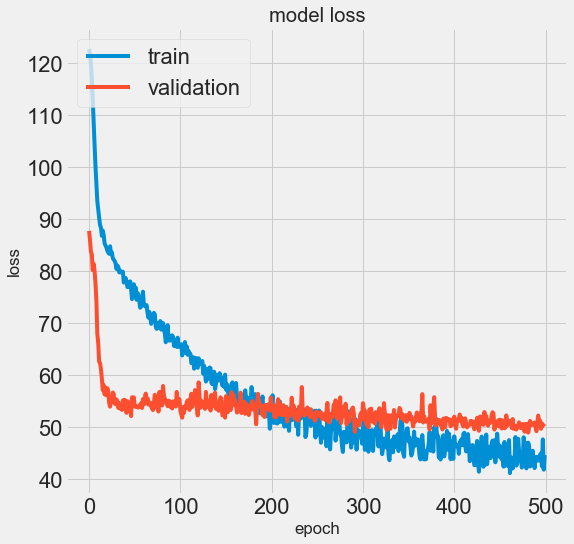

In [84]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import backend as K
from keras.layers import BatchNormalization
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 

def coeff_determination(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
# Add batch normalization for the outputs of the layer above
model.add(BatchNormalization())
model.add(Dense(256,kernel_initializer='normal', activation='relu'))
# Add batch normalization for the outputs of the layer above
model.add(BatchNormalization())
model.add(Dense(256,kernel_initializer='normal', activation='relu'))
# Add batch normalization for the outputs of the layer above
model.add(BatchNormalization())
model.add(Dense(256,kernel_initializer='normal', activation='relu'))
# Add batch normalization for the outputs of the layer above
model.add(BatchNormalization())
model.add(Dense(1, activation='linear'))
model.summary()

checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

#'mse','mae',

model.compile(loss='mae', optimizer='adam', metrics=[coeff_determination])
history = model.fit(X_train, y_train, epochs=500, batch_size=128,  verbose=1, validation_split=0.2,callbacks=callbacks_list)
print(history.history.keys())



# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

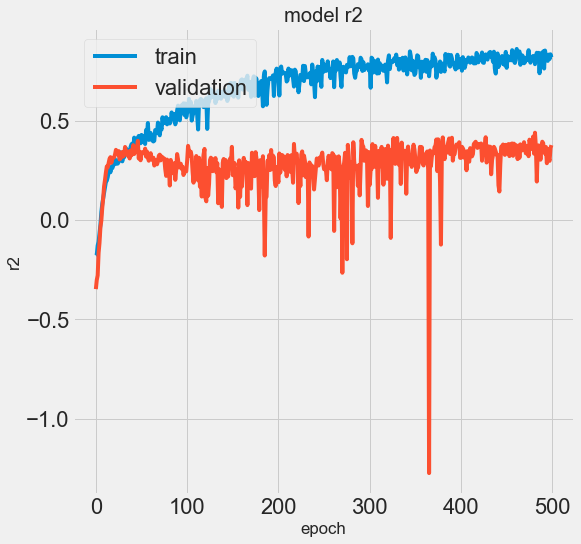

In [85]:
# "R2"
plt.plot(history.history['coeff_determination'])
plt.plot(history.history['val_coeff_determination'])
plt.title('model r2')
plt.ylabel('r2')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

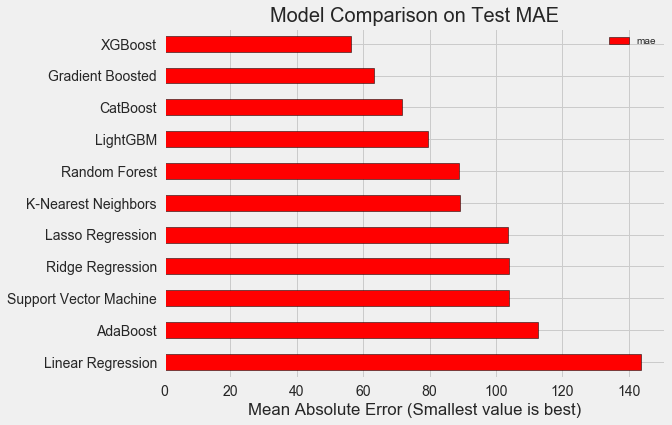

In [48]:
plt.style.use('fivethirtyeight')
figsize(8, 6)

# Dataframe to hold the results
model_comparison = pd.DataFrame({'model': ['Linear Regression','Ridge Regression', 'Lasso Regression','Support Vector Machine',
                                           'Random Forest', 'Gradient Boosted',
                                            'K-Nearest Neighbors','XGBoost','CatBoost','AdaBoost','LightGBM'],
                                 'mae': [lr_mae,ridge_mae, lasso_mae, svm_mae, rf_mae, 
                                         gb_mae, knn_mae,xg_mae,catb_mae,adab_mae,lgbm_mae]})

# Horizontal bar chart of test mae
model_comparison.sort_values('mae', ascending = False).plot(x = 'model', y = 'mae', kind = 'barh',
                                                           color = 'red', edgecolor = 'black')

# Plot formatting
plt.ylabel(''); plt.yticks(size = 14); plt.xlabel('Mean Absolute Error (Smallest value is best)'); plt.xticks(size = 14)
plt.title('Model Comparison on Test MAE', size = 20);

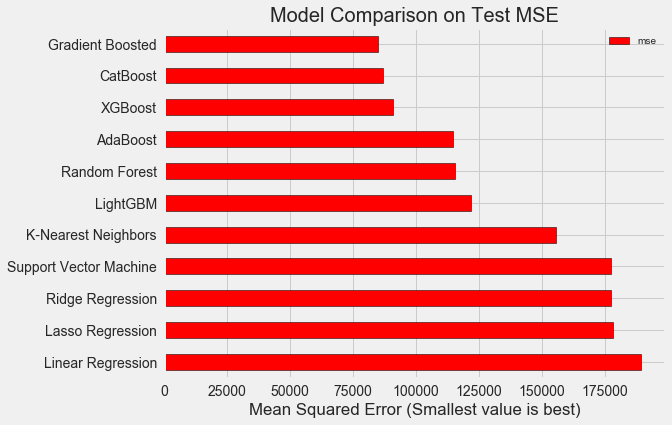

In [32]:
plt.style.use('fivethirtyeight')
figsize(8, 6)

# Dataframe to hold the results
model_comparison = pd.DataFrame({'model': ['Linear Regression','Ridge Regression', 'Lasso Regression','Support Vector Machine',
                                           'Random Forest', 'Gradient Boosted',
                                            'K-Nearest Neighbors','XGBoost','CatBoost','AdaBoost','LightGBM'],
                                 'mse': [lr_mse, ridge_mse, lasso_mse, svm_mse, rf_mse, 
                                         gb_mse, knn_mse, xg_mse,catb_mse,adab_mse,lgbm_mse]})

# Horizontal bar chart of test mae
model_comparison.sort_values('mse', ascending = False).plot(x = 'model', y = 'mse', kind = 'barh',
                                                           color = 'red', edgecolor = 'black')

# Plot formatting
plt.ylabel(''); plt.yticks(size = 14); plt.xlabel('Mean Squared Error (Smallest value is best)'); plt.xticks(size = 14)
plt.title('Model Comparison on Test MSE', size = 20);

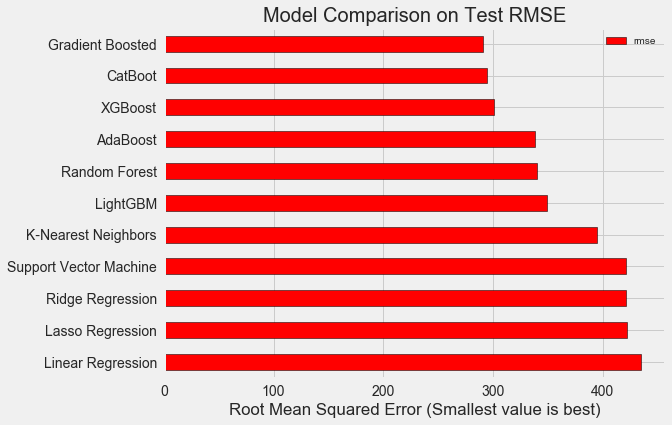

In [33]:
plt.style.use('fivethirtyeight')
figsize(8, 6)

# Dataframe to hold the results
model_comparison = pd.DataFrame({'model': ['Linear Regression','Ridge Regression', 'Lasso Regression','Support Vector Machine',
                                           'Random Forest', 'Gradient Boosted',
                                            'K-Nearest Neighbors','XGBoost','CatBoot','AdaBoost','LightGBM'],
                                 'rmse': [lr_rmse,ridge_rmse, lasso_rmse, svm_rmse, rf_rmse, 
                                         gb_rmse, knn_rmse, xg_rmse,catb_rmse,adab_rmse,lgbm_rmse]})

# Horizontal bar chart of test mae
model_comparison.sort_values('rmse', ascending = False).plot(x = 'model', y = 'rmse', kind = 'barh',
                                                           color = 'red', edgecolor = 'black')

# Plot formatting
plt.ylabel(''); plt.yticks(size = 14); plt.xlabel('Root Mean Squared Error (Smallest value is best)'); plt.xticks(size = 14)
plt.title('Model Comparison on Test RMSE', size = 20);

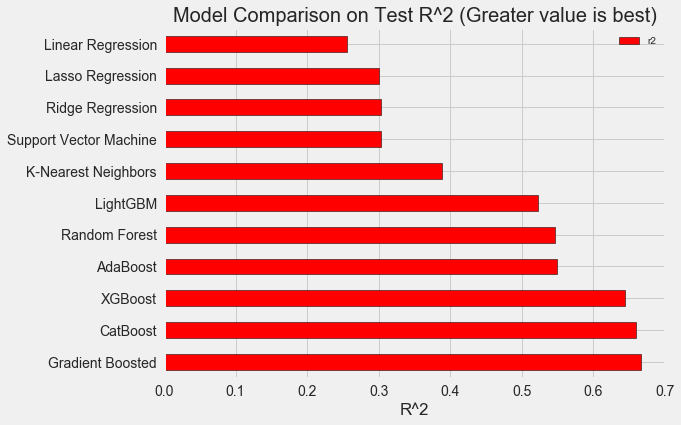

In [34]:
plt.style.use('fivethirtyeight')
figsize(8, 6)

# Dataframe to hold the results
model_comparison = pd.DataFrame({'model': ['Linear Regression','Ridge Regression', 'Lasso Regression','Support Vector Machine',
                                           'Random Forest', 'Gradient Boosted',
                                            'K-Nearest Neighbors','XGBoost','CatBoost','AdaBoost','LightGBM'],
                                 'r2': [lr_r2, ridge_r2, lasso_r2, svm_r2, rf_r2, 
                                         gb_r2, knn_r2,xg_r2,catb_r2,adab_r2,lgbm_r2]})

# Horizontal bar chart of test mae
model_comparison.sort_values('r2', ascending = False).plot(x = 'model', y = 'r2', kind = 'barh',
                                                           color = 'red', edgecolor = 'black')

# Plot formatting
plt.ylabel(''); plt.yticks(size = 14); plt.xlabel('R^2'); plt.xticks(size = 14)
plt.title('Model Comparison on Test R^2 (Greater value is best)', size = 20);

In [49]:
# Loss function to be optimized
loss = ['ls', 'lad', 'huber']

# Number of trees used in the boosting process
n_estimators = [100, 500, 900, 1100, 1500]

# Maximum depth of each tree
max_depth = [2, 3, 5, 10, 15]

# Minimum number of samples per leaf
min_samples_leaf = [1, 2, 4, 6, 8]

# Minimum number of samples to split a node
min_samples_split = [2, 4, 6, 10]

# Maximum number of features to consider for making splits
max_features = ['auto', 'sqrt', 'log2', None]

# Define the grid of hyperparameters to search
hyperparameter_grid = {'loss': loss,
                       'n_estimators': n_estimators,
                       'max_depth': max_depth,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features}

In [50]:
# Create the model to use for hyperparameter tuning
model = GradientBoostingRegressor(random_state = 42)

# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=model,
                               param_distributions=hyperparameter_grid,
                               cv=4, n_iter=25, 
                               scoring = 'neg_mean_absolute_error',
                               n_jobs = -1, verbose = 1, 
                               return_train_score = True,
                               random_state=42)

In [51]:
# Fit on the training data
random_cv.fit(X_train, y_train)

Fitting 4 folds for each of 25 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 14.0min finished


RandomizedSearchCV(cv=4, error_score='raise-deprecating',
                   estimator=GradientBoostingRegressor(alpha=0.9,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                            

In [52]:
# Get all of the cv results and sort by the test performance
random_results = pd.DataFrame(random_cv.cv_results_).sort_values('mean_test_score', ascending = False)

random_results.head(10)

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_n_estimators param_min_samples_split param_min_samples_leaf param_max_features param_max_depth param_loss                                             params  split0_test_score  split1_test_score  split2_test_score  split3_test_score  mean_test_score  std_test_score  rank_test_score  split0_train_score  split1_train_score  split2_train_score  split3_train_score  mean_train_score  std_train_score
6      234.604565     16.388609         0.396271        0.052418               1500                       6                      2               sqrt              15      huber  {'n_estimators': 1500, 'min_samples_split': 6,...         -56.133662         -76.172841         -64.454940         -47.372096       -61.036300       10.624092                1           -7.390569           -2.871069           -5.134948           -6.569369         -5.491489         1.714792
2       38.749252      3.440905         0.088997        0.022660                500                       4                      2               auto              10      huber  {'n_estimators': 500, 'min_samples_split': 4, ...         -60.298889         -72.368561         -63.615683         -50.770767       -61.765820        7.727079                2          -12.514872           -4.956771          -10.208832           -8.438197         -9.029668         2.760227
20      41.680886      1.400491         0.096247        0.014893                500                       6                      1               sqrt              10      huber  {'n_estimators': 500, 'min_samples_split': 6, ...         -60.694209         -76.251052         -60.448490         -51.038737       -62.110484        9.045337                3           -3.455479           -2.671633           -3.038467           -3.149251         -3.078707         0.280296
8       83.513604      6.553626         0.242882        0.011680               1500                       6                      2               sqrt              10      huber  {'n_estimators': 1500, 'min_samples_split': 6,...         -60.462514         -74.662367         -69.379523         -47.983359       -63.125170       10.105438                4           -9.726204           -4.186612           -6.239018           -8.418652         -7.142622         2.112916
4      106.482287      5.295355         0.348383        0.096323                900                       6                      6               sqrt              15        lad  {'n_estimators': 900, 'min_samples_split': 6, ...         -61.136974         -75.097989         -66.933253         -49.721950       -63.225422        9.237538                5          -25.781351          -18.940509          -25.569569          -25.352346        -23.910944         2.873688
18      94.449645      3.277000         0.151500        0.027728                500                       6                      1               auto              15      huber  {'n_estimators': 500, 'min_samples_split': 6, ...         -60.184787         -75.989521         -62.768239         -54.040237       -63.247660        8.011322                6           -0.529348           -0.186154           -0.456029           -0.185160         -0.339173         0.155689
11      60.877472      3.472172         0.210538        0.002037               1500                       2                      4               log2              10        lad  {'n_estimators': 1500, 'min_samples_split': 2,...         -62.873167         -74.593532         -67.374923         -49.238008       -63.522955        9.243593                7          -24.289390          -19.245149          -26.905933          -23.405441        -23.461478         2.753647
10      44.504217      0.826552         0.162998        0.020347               1100                      10                      6               None              10      huber  {'n_estimators': 1100, 'min_samples_split': 10...         -63.269172      

In [53]:
random_cv.best_estimator_

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='huber', max_depth=15,
                          max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=2, min_samples_split=6,
                          min_weight_fraction_leaf=0.0, n_estimators=1500,
                          n_iter_no_change=None, presort='auto',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [54]:
# Create a range of trees to evaluate
trees_grid = {'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800]}

model = GradientBoostingRegressor(loss = 'huber', max_depth = 15,
                                  min_samples_leaf = 2,
                                  min_samples_split = 6,
                                  max_features = 'sqrt',
                                  random_state = 42)

# Grid Search Object using the trees range and the random forest model
grid_search = GridSearchCV(estimator = model, param_grid=trees_grid, cv = 4, 
                           scoring = 'neg_mean_absolute_error', verbose = 1,
                           n_jobs = -1, return_train_score = True)

In [55]:
# Fit the grid search
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 15 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 16.0min finished


GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='huber', max_depth=15,
                                                 max_features='sqrt',
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=2,
                                                 min_samples_split=6,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
          

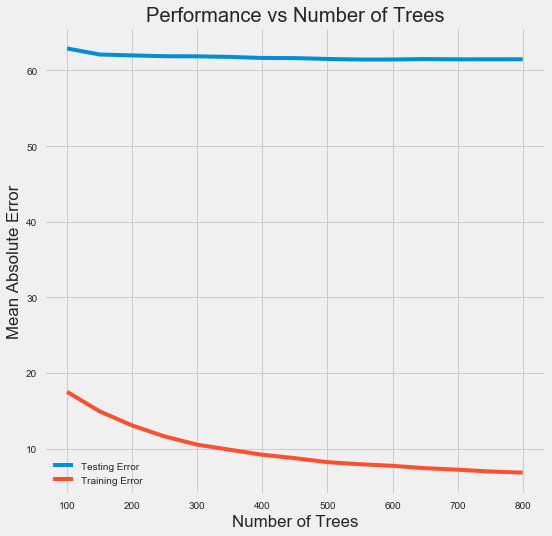

In [56]:
# Get the results into a dataframe
results = pd.DataFrame(grid_search.cv_results_)

# Plot the training and testing error vs number of trees
figsize(8, 8)
plt.style.use('fivethirtyeight')
plt.plot(results['param_n_estimators'], -1 * results['mean_test_score'], label = 'Testing Error')
plt.plot(results['param_n_estimators'], -1 * results['mean_train_score'], label = 'Training Error')
plt.xlabel('Number of Trees'); plt.ylabel('Mean Absolute Error'); plt.legend();
plt.title('Performance vs Number of Trees');

In [57]:
results.sort_values('mean_test_score', ascending = False).head(5)

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_n_estimators                 params  split0_test_score  split1_test_score  split2_test_score  split3_test_score  mean_test_score  std_test_score  rank_test_score  split0_train_score  split1_train_score  split2_train_score  split3_train_score  mean_train_score  std_train_score
9       73.446557      7.812742         0.186252        0.058262                550  {'n_estimators': 550}         -57.695254         -75.516763         -64.957632         -47.620953       -61.450601       10.191214                1          -11.055186           -4.784696           -6.955007           -8.993164         -7.947013         2.331282
10      93.634059      6.115849         0.179499        0.017870                600  {'n_estimators': 600}         -57.721658         -75.551340         -64.901448         -47.630316       -61.454139       10.192768                2          -10.827042           -4.578767           -6.722355           -8.796068         -7.731058         2.327756
12      86.136375      2.789817         0.166248        0.023731                700  {'n_estimators': 700}         -58.141491         -75.385161         -64.894470         -47.471685       -61.476189       10.152722                3          -10.204222           -4.197347           -6.343335           -8.148747         -7.223413         2.217717
13     102.375999     16.352297         0.220248        0.011521                750  {'n_estimators': 750}         -58.154118         -75.450834         -64.851568         -47.454408       -61.480724       10.176578                4          -10.004456           -3.954267           -6.129717           -7.832451         -6.980223         2.222164
14      97.421855      2.978964         0.155750        0.028643                800  {'n_estimators': 800}         -58.165434         -75.429500         -64.851856         -47.484423       -61.485790       10.158017                5           -9.839242           -3.842568           -6.008098           -7.656042         -6.836488         2.198749

In [58]:
# Default model
default_model = GradientBoostingRegressor(random_state = 42)

# Select the best model
final_model = grid_search.best_estimator_

final_model

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='huber', max_depth=15,
                          max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=2, min_samples_split=6,
                          min_weight_fraction_leaf=0.0, n_estimators=550,
                          n_iter_no_change=None, presort='auto',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [59]:
%%timeit -n 1 -r 5
default_model.fit(X_train, y_train)

528 ms ± 27.9 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [60]:
%%timeit -n 1 -r 5
final_model.fit(X_train, y_train)

56.4 s ± 2.2 s per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [61]:
default_pred = default_model.predict(X_test)
final_pred = final_model.predict(X_test)

print('Default model performance on the test set: MAE = %0.4f.' % mae(y_test, default_pred))
print('Final model performance on the test set:   MAE = %0.4f.' % mae(y_test, final_pred))

Default model performance on the test set: MAE = 88.9043.
Final model performance on the test set:   MAE = 59.6349.


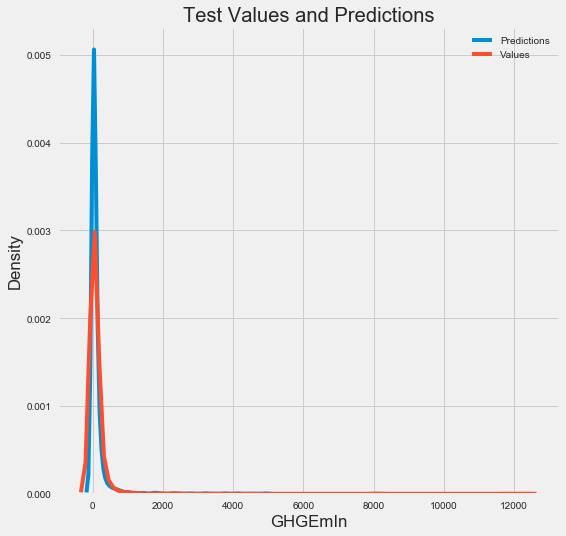

In [62]:
figsize(8, 8)

# Density plot of the final predictions and the test values
sns.kdeplot(final_pred, label = 'Predictions')
sns.kdeplot(y_test, label = 'Values')

# Label the plot
plt.xlabel('GHGEmIn'); plt.ylabel('Density');
plt.title('Test Values and Predictions');

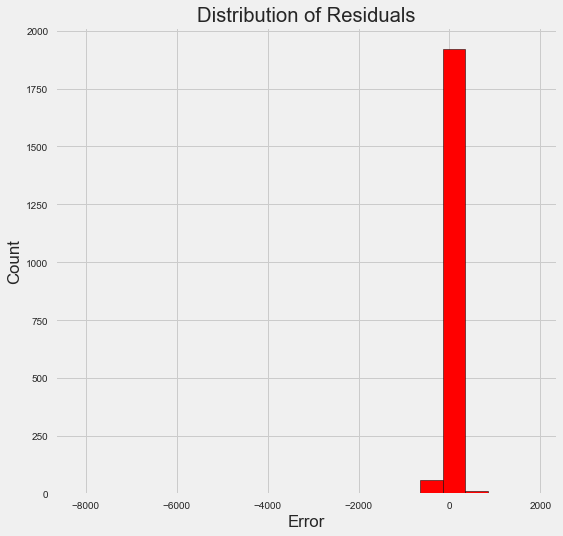

In [63]:
figsize = (6, 6)

# Calculate the residuals 
residuals = final_pred - y_test

# Plot the residuals in a histogram
plt.hist(residuals, color = 'red', bins = 20,
         edgecolor = 'black')
plt.xlabel('Error'); plt.ylabel('Count')
plt.title('Distribution of Residuals');